<h1><center>Churn Prediction (Statistical Testing, Stacking Ensemble) </center></h1>

<center><img src="https://uploads-ssl.webflow.com/60d45d63543dd9baaad4cb28/60d85fd90743e2299c711be5_1%20dqSLRSEC2GDV9bw_PplCYQ.png" align="center"/></center>

# Table of Contents

* [1. Introduction ](#1)
  * [1.1 Insights & Summary](#1.1)
* [2. Libraries & Configurations ](#2)
  * [2.1 Import Libraries](#2.1)
  * [2.2 Configurations](#2.2)
* [3 Descriptive Analysis](#3)
  * [3.1 Summary of Categorical Features](#3.1)
  * [3.2 Checking Duplicates](#3.2)
  * [3.3 Unique Values](#3.3)
* [4 Data Wrangling ](#4)
  * [4.1 Missing Values](#4.1)
    * [4.1.1 Change Data Type](#4.1.2)
    * [4.1.2 Imputation](#4.1.2)
  * [4.2 Binning](#4.2)
    * [4.2.1 Tenure](#4.2.1)
    * [4.2.2 MonthlyCharges](#4.2.2)
    * [4.2.3 TotalCharges](#4.2.3)
* [5 Univariate Analysis](#5)
  * [5.1 Statistical Normality Tests](#5.1)
    * [5.1.1 D’Agostino’s K^2 Test](#5.1.1)
    * [5.1.2 Anderson-Darling Test](#5.1.2)
  * [5.2 Visualization](#5.2)
* [6 Bivariate Analysis](#6)
  * [6.1 List Feature Based on Types](#6.1)
  * [6.2 Numerical & Numerical](#6.2)
      * [6.2.1 Spearman rank-order correlation](#6.2.1)
  * [6.3 Numerical & Categorical](#6.3)
    * [6.3.1 Kendall rank correlation coefficient](#6.3.1)
    * [6.3.2 Mann-Whitney U Test](#6.3.2)
    * [6.3.3 Polytomous(Nominal) with numeric](#6.3.3)
  * [6.4 Dichotomous & Dichotomous](#6.4)
    * [6.4.1 Phi’s correlation](#6.4.1)
  * [6.5 Categorical & categorical](#6.5)
    * [6.5.1 Chi-Square](#6.5.1)
    * [6.5.2 Cramér’s V](#6.5.2)
    * [6.5.3 Uncertainty Coefficient](#6.5.3)
  * [6.6 Collinearity](#6.6)
    * [6.6.1 Chi-Square](#6.6.1)
  * [6.8 Visualization](#6.8)
* [7 Multivariate Analysis](#7)
  * [7.1 Multicollinearity (Kruskal–Wallis)](#7.1)
  * [7.2 Frequency Distribution](#7.2)
  * [7.3 Churn Count Distribution](#7.3)
    * [7.3.1 Features With Cardinality = 2](#7.3.1)
    * [7.3.2 Features With Cardinality = 3](#7.3.2)
* [8 Feature Engineering](#8)
  * [8.1 Encode Target variable](#8.1)
* [9 Data Preparation](#9)
  * [9.1 Prepare Train/Test dataset](#9.1)
  * [9.2 Encoding & Scaling](#9.2)
* [10 Modeling](#10)
  * [10.1 Utility Function](#10.1)
    * [10.1.1 Training](#10.1.1)
    * [10.1.2 Model Interpretation](#10.1.2)
  * [10.2 Catboost](#10.2)
    * [10.2.1 Training](#10.2.1)
    * [10.2.2 Optuna Tuning](#10.2.2)
  * [10.3 XGBoost](#10.3)
    * [10.3.1 Training](#10.3.1)
    * [10.3.2 Optuna Tuning](#10.3.2)
  * [10.4 LGBM](#10.4)
    * [10.4.1 Training](#10.4.1)
    * [10.4.2 Optuna Tuning](#10.4.2)
  * [10.5 Stacking Ensemble](#10.5)
    * [10.5.1 Level 0 : Base Models](#10.5.1)
    * [10.5.2 Stacking Datasets](#10.5.2)
    * [10.5.3 Level 1 : Meta Model](#10.5.3)
    * [10.5.4 Stacking Model Evaluation](#10.5.4)
* [11 Conclusions](#11)
* [12 References](#12)

<a id='1'></a>
# 1 Introduction

The objective of this notebook is to present an extensive analysis of the **IBM Customer Churn Dataset** and to predict the customer churn rate.

Dataset Source :

* [Kaggle Dataset URL](https://www.kaggle.com/blastchar/telco-customer-churn)
* [GitHub Dataset URL](https://github.com/IBM/telco-customer-churn-on-icp4d/tree/master/data)

NB: This project also serves as assignments for the courses below - 
1. [IBM Exploratory Data Analysis for Machine Learning](https://www.coursera.org/learn/ibm-exploratory-data-analysis-for-machine-learning?specialization=ibm-machine-learning)
2. [IBM Supervised Machine Learning: Classification](https://www.coursera.org/learn/supervised-machine-learning-classification?specialization=ibm-machine-learning)


<a id='1.1'></a>

## 1.1 Insights & Summary

* Dataset mostly has categorical variables
* Data is not normally distributed, performed Nonparametric Statistical tests
* Performed statistical hypothesis test to check correlation , multicollinearity
* Imbalanced dataset, did experiment with different sampling techniques(e.g stratifying, imblearn - SMOTE etc)
* Tuned Hyperparameters using Optuna
* Performed single level Stacking Ensemble with Triple Gradient boosting algorithms



<a id='2'></a>
# 2 Libraries & Configurations

<a id='2.1'></a>
## 2.1 Import Libraries 

In [ ]:
!pip install --upgrade scipy # to calculate Cramer's V latest version of scipy needed

In [ ]:
"""Import basic modules."""
import math
import os
import gc
import random
import pprint
import numpy as np               # For linear algebra
import pandas as pd              # For data manipulation
import matplotlib.pyplot as plt  # For 2D visualization
import seaborn as sns

# Warning Libraries 
import warnings
warnings.filterwarnings("ignore")
# warnings.simplefilter(action='ignore', category=FutureWarning)

from collections import Counter
from scipy import stats                         # For statistics
from scipy.stats.contingency import association # upgrade scipy to use this to calculate Cramer's V

"""Plotly visualization"""
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots


from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.preprocessing import PowerTransformer # convert to Gaussian-like data
from sklearn.feature_selection import SelectKBest, f_classif, chi2

from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, RepeatedStratifiedKFold, train_test_split, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Algorithms
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Boosting Algorithms 
!pip install catboost
from xgboost                          import XGBClassifier
from catboost                         import CatBoostClassifier, Pool
from lightgbm                         import LGBMClassifier

!pip install optuna
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances

import multiprocessing
import pickle
from sklearn.metrics import matthews_corrcoef, roc_auc_score, precision_recall_curve, confusion_matrix, classification_report, roc_curve, auc

# !pip install shap
# import shap


from sklearn.utils import resample
from IPython.display import Markdown, display


def printmd(string):
    display(Markdown(string))

# shap.initjs()

plt_params = {
    'figure.facecolor': 'white',

    ## to set size 
    # 'legend.fontsize': 'x-large',
    # 'figure.figsize': (15, 10),
    # 'axes.labelsize': 'x-large',
    # 'axes.titlesize': 'x-large',
    # 'xtick.labelsize': 'x-large',
    # 'ytick.labelsize': 'x-large'
}

plt.rcParams.update(plt_params)

sns.set_style('whitegrid')
%matplotlib inline

<a id='2.2'></a>
## 2.2 Configurations

In [ ]:
# padding value
left_padding = 21

# seed value
SEED = 42

def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(SEED)

<a id='3'></a>
# 3 Descriptive Analysis

<table>
<thead><tr>
<th><strong>Feature Name</strong></th>
<th><strong>Description</strong></th>
<th><strong>Data Type</strong></th>
</tr>
</thead>
<tbody>
<tr>
<td>customerID</td>
<td>Contains customer ID</td>
<td>categorical</td>
</tr>
<tr>
<td>gender</td>
<td>whether the customer female or male</td>
<td>categorical</td>
</tr>
<tr>
<td>SeniorCitizen</td>
<td>Whether the customer is a senior citizen or not (1, 0)</td>
<td>numeric, int</td>
</tr>
<tr>
<td>Partner</td>
<td>Whether the customer has a partner or not (Yes, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>Dependents</td>
<td>Whether the customer has dependents or not (Yes, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>tenure</td>
<td>Number of months the customer has stayed with the company</td>
<td>numeric, int</td>
</tr>
<tr>
<td>PhoneService</td>
<td>Whether the customer has a phone service or not (Yes, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>MultipleLines</td>
<td>Whether the customer has multiple lines r not (Yes, No, No phone service)</td>
<td>categorical</td>
</tr>
<tr>
<td>InternetService</td>
<td>Customer’s internet service provider (DSL, Fiber optic, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineSecurity</td>
<td>Whether the customer has online security or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineBackup</td>
<td>Whether the customer has online backup or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>DeviceProtection</td>
<td>Whether the customer has device protection or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>TechSupport</td>
<td>Whether the customer has tech support or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingTV</td>
<td>Whether the customer has streaming TV or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingMovies</td>
<td>Whether the customer has streaming movies or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>Contract</td>
<td>The contract term of the customer (Month-to-month, One year, Two year)</td>
<td>categorical</td>
</tr>
<tr>
<td>PaperlessBilling</td>
<td>Whether the customer has paperless billing or not (Yes, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>PaymentMethod</td>
<td>The customer’s payment method (Electronic check, Mailed check, Bank transfer, Credit card)</td>
<td>categorical</td>
</tr>
<tr>
<td>MonthlyCharges</td>
<td>The amount charged to the customer monthly </td>
<td> numeric , int</td>
</tr>
<tr>
<td>TotalCharges</td>
<td>The total amount charged to the customer </td>
<td>object</td>
</tr>
<tr>
<td>Churn</td>
<td>Whether the customer churned or not (Yes or No)</td>
<td>categorical</td>
</tr>
</tbody>
</table>

In [ ]:
df_churn = pd.read_csv("https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv")
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print(f"Dataset Dimension: {df_churn.shape[0]} rows,  {df_churn.shape[1]} columns")

Dataset Dimension: 7043 rows,  21 columns


In [ ]:
df_churn.info()

printmd("<br>**SeniorCitizen** is already converted to ineteger<br><br>**TotalCharges** should be converted to float")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<br>**SeniorCitizen** is already converted to ineteger<br><br>**TotalCharges** should be converted to float

<a id='3.1'></a>
## 3.1 Summary of Categorical Features

In [ ]:
df_churn.describe(include=['object']).T

,count,unique,top,freq
customerID,7043,7043,0617-AQNWT,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


<a id='3.2'></a>
## 3.2 Checking Duplicates

In [ ]:
print('Known observations: {}\nUnique observations: {}'.format(len(df_churn.index),len(df_churn.drop_duplicates().index)))

printmd("**No duplicates Found!**")

Known observations: 7043
Unique observations: 7043


**No duplicates Found!**

<a id='3.3'></a>
## 3.3 Unique Values

In [ ]:
printmd("**Unique Values By Features**")
for feature in df_churn.columns:
    uniq = np.unique(df_churn[feature])
    print(feature.ljust(left_padding),len(uniq))

**Unique Values By Features**

customerID            7043
gender                2
SeniorCitizen         2
Partner               2
Dependents            2
tenure                73
PhoneService          2
MultipleLines         3
InternetService       3
OnlineSecurity        3
OnlineBackup          3
DeviceProtection      3
TechSupport           3
StreamingTV           3
StreamingMovies       3
Contract              3
PaperlessBilling      2
PaymentMethod         4
MonthlyCharges        1585
TotalCharges          6531
Churn                 2


<a id='4'></a>
# 4 Data Wrangling

<a id='4.1'></a>
## 4.1 Missing Values

In [ ]:
df_churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
cat_cols = set(df_churn.columns) - set(df_churn._get_numeric_data().columns)

printmd("'**isna**' is only applicable for numerical data type<br>")
printmd("Checking missing values for object data type<br><br>")

for cat in cat_cols:
  print(cat.ljust(left_padding), df_churn[cat].apply(lambda x:len(x.strip()) == 0 or x.strip().lower() == 'nan').sum())

printmd("<br>TotalCharges is an object datatype, it has **11** 'nan' value")

'**isna**' is only applicable for numerical data type<br>

Checking missing values for object data type<br><br>

PhoneService          0
Contract              0
PaymentMethod         0
customerID            0
StreamingTV           0
TechSupport           0
InternetService       0
TotalCharges          11
OnlineBackup          0
Churn                 0
MultipleLines         0
Dependents            0
gender                0
DeviceProtection      0
OnlineSecurity        0
PaperlessBilling      0
StreamingMovies       0
Partner               0


<br>TotalCharges is an object datatype, it has **11** 'nan' value

<a id='4.1.1'></a>
### 4.1.1 Change Data Type

Convert **TotalCharges** to numeric

In [ ]:
df_churn["TotalCharges"] = pd.to_numeric(df_churn["TotalCharges"], errors = 'coerce')

Drop **customerID** column

In [ ]:
del df_churn["customerID"]

<a id='4.1.2'></a>

### 4.1.2 Imputation

In [ ]:
indices_null_tc = df_churn[df_churn["TotalCharges"].isna()].index

In [ ]:
display(df_churn.iloc[indices_null_tc])

printmd("<br>**'Tenure' (months stayed at the company) is correlated with 'TotalCharges' column**")
printmd("**when 'Tenure' is 0 , 'TotalCharges' is 0 too**")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


<br>**'Tenure' (months stayed at the company) is correlated with 'TotalCharges' column**

**when 'Tenure' is 0 , 'TotalCharges' is 0 too**

In [ ]:
display(df_churn[df_churn.tenure == 1].head(2))

printmd("<br>**'TotalCharges' is the same as 'MonthlyCharges' when 'Tenure' is not 0**")
printmd("**Therefore, impute missing values on 'TotalCharges' column with 0**")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes


<br>**'TotalCharges' is the same as 'MonthlyCharges' when 'Tenure' is not 0**

**therefore, impute missing values on 'TotalCharges' column with 0**

In [ ]:
display(df_churn[df_churn.tenure == 3].head(2))

printmd("<br>**'TotalCharges' increases with respect to 'MonthlyCharges' and 'Tenure'**")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
65,Female,0,No,No,3,Yes,No,DSL,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,75.3,244.1,No
74,Female,0,No,Yes,3,Yes,No,DSL,Yes,No,No,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),64.5,177.4,No


<br>**'TotalCharges' increases with respect to 'MonthlyCharges' and 'Tenure'**

In [ ]:
df_churn['TotalCharges'].fillna(0, inplace=True)

In [ ]:
df_churn[['tenure', 'MonthlyCharges', 'TotalCharges']].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


<a id='4.2'></a>
## 4.2 Binning

There are three numerical data types which can be ranked based on their values :

* Tenure, MonthlyCharges and TotalCharges

We can bin them into three levels : **high, medium and low**

In [ ]:
def binning_feature(feature):
  plt.hist(df_churn[feature])

  # set x/y labels and plot title
  plt.xlabel(f"{feature.title()}")
  plt.ylabel("Count")
  plt.title(f"{feature.title()} Bins")
  plt.show()

  bins = np.linspace(min(df_churn[feature]), max(df_churn[feature]), 4)
  display(bins)
  group_names = ['Low', 'Medium', 'High']
  
  df_churn.insert(df_churn.shape[1]-1,f'{feature}-binned', pd.cut(df_churn[feature], bins, labels=group_names, include_lowest=True))
  display(df_churn[[feature, f'{feature}-binned']].head(10))


  # count values
  printmd("<br>**Binning Distribution**<br>")
  display(df_churn[f'{feature}-binned'].value_counts())


  # plot the distribution of each bin
  plt.bar(group_names, df_churn[f'{feature}-binned'].value_counts())
  # px.bar(data_canada, x='year', y='pop')

  # set x/y labels and plot title
  plt.xlabel(f"{feature.title()}")
  plt.ylabel("Count")
  plt.title(f"{feature.title()} Bins")
  plt.show()

<a id='4.2.1'></a>
### 4.2.1 Tenure

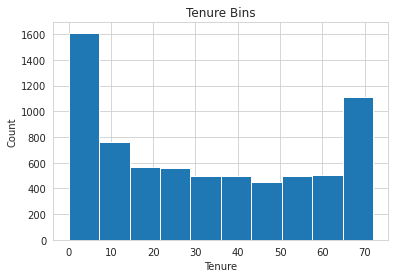

array([ 0., 24., 48., 72.])

,tenure,tenure-binned
0,1,Low
1,34,Medium
2,2,Low
3,45,Medium
4,2,Low
5,8,Low
6,22,Low
7,10,Low
8,28,Medium
9,62,High


<br>**Binning Distribution**<br>

Low       3210
High      2239
Medium    1594
Name: tenure-binned, dtype: int64

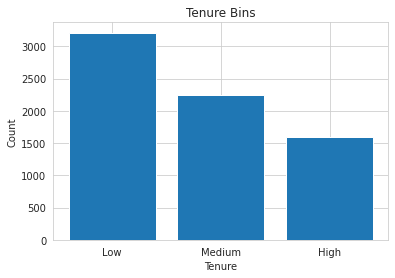

In [ ]:
binning_feature('tenure')

<a id='4.2.2'></a>
### 4.2.2 MonthlyCharges

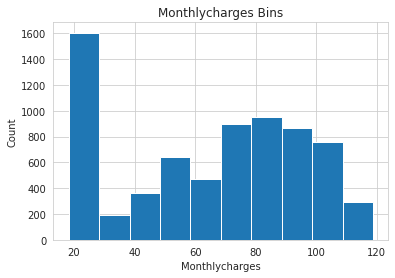

array([ 18.25,  51.75,  85.25, 118.75])

,MonthlyCharges,MonthlyCharges-binned
0,29.85,Low
1,56.95,Medium
2,53.85,Medium
3,42.30,Low
4,70.70,Medium
5,99.65,High
6,89.10,High
7,29.75,Low
8,104.80,High
9,56.15,Medium


<br>**Binning Distribution**<br>

Low       2451
Medium    2439
High      2153
Name: MonthlyCharges-binned, dtype: int64

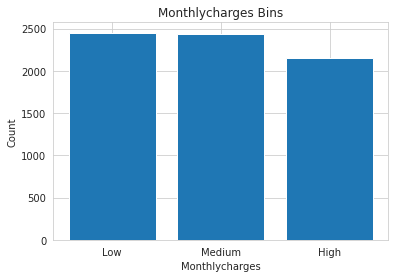

In [ ]:
binning_feature('MonthlyCharges')

<a id='4.2.3'></a>
### 4.2.3 TotalCharges

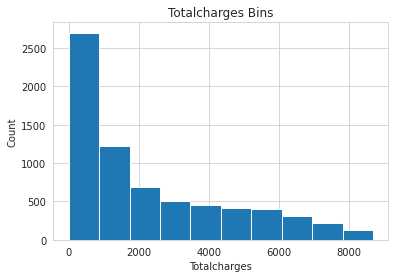

array([   0.        , 2894.93333333, 5789.86666667, 8684.8       ])

,TotalCharges,TotalCharges-binned
0,29.85,Low
1,1889.50,Low
2,108.15,Low
3,1840.75,Low
4,151.65,Low
5,820.50,Low
6,1949.40,Low
7,301.90,Low
8,3046.05,Medium
9,3487.95,Medium


<br>**Binning Distribution**<br>

Low       4782
Medium    1474
High       787
Name: TotalCharges-binned, dtype: int64

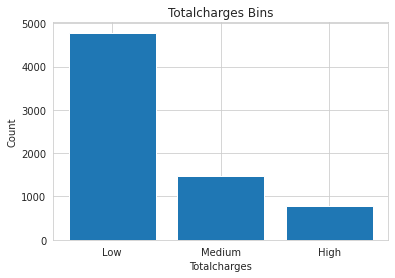

In [ ]:
binning_feature('TotalCharges')

**Data Types Distribution after cleaning**

In [ ]:
printmd("**Data Types**<br>")
df_churn.dtypes.value_counts()

**Data Types**<br>

object      16
category     3
int64        2
float64      2
dtype: int64

<a id='5'></a>
# 5 Univariate Analysis

<a id='5.1'></a>
## 5.1 Statistical Normality Tests

Hypotheses -

* H0: the sample has a Gaussian distribution.
* H1: the sample does not have a Gaussian distribution.

NB : we can not perform **Shapiro-Wilk Test** because sample size > 5000 and for this test p-value may not be accurate for N > 5000

<a id='5.1.1'></a>
### 5.1.1 D’Agostino’s K^2 Test

#### MonthlyCharges

In [ ]:
stat, p = stats.normaltest(df_churn['MonthlyCharges'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=11419.52879, p=0.000
Sample does not look Gaussian (reject H0)


#### Tenure

In [ ]:
stat, p = stats.normaltest(df_churn['tenure'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=76258.50517, p=0.000
Sample does not look Gaussian (reject H0)


<a id='5.1.2'></a>
### 5.1.2 Anderson-Darling Test

Hypotheses -

* H0: the sample has a Gaussian distribution
* H1: the sample does not have a Gaussian distribution

<br>


Critical values in a statistical test are a range of pre-defined significance boundaries at which the H0 can be failed to be rejected if the calculated statistic is less than the critical value. \
Rather than just a single p-value, the test returns a critical value for a **range of different commonly used significance levels**. \
In this case  - **normal/exponential** (15%, 10%, 5%, 2.5%, 1%)

#### TotalCharges

In [ ]:
result = stats.anderson(df_churn['TotalCharges'])

print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data looks normal (fail to reject H0)')
	else:
		print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data does not look normal (reject H0)')

Statistic: 346.638
Significance level 15.00 % : critical value 0.576, data does not look normal (reject H0)
Significance level 10.00 % : critical value 0.656, data does not look normal (reject H0)
Significance level 5.00 % : critical value 0.787, data does not look normal (reject H0)
Significance level 2.50 % : critical value 0.917, data does not look normal (reject H0)
Significance level 1.00 % : critical value 1.091, data does not look normal (reject H0)


In [ ]:
df_churn.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure-binned,MonthlyCharges-binned,TotalCharges-binned,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Low,Low,Low,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,Medium,Medium,Low,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Low,Medium,Low,Yes


<a id='5.2'></a>
## 5.2 Visualization

### Churn (Target) Distribution

In [ ]:
fig = px.pie(df_churn['Churn'].value_counts().reset_index().rename(columns={'index':'Type'}), values='Churn', names='Type', title='Churn (Target) Distribution')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

printmd("### Target distribution is Imbalanced")

### Target distribution is Imbalanced

### OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport

In [ ]:
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=df_churn['OnlineSecurity'].value_counts().index, values=df_churn['OnlineSecurity'].value_counts().values, name="Online Security"),
              1, 1)
fig.add_trace(go.Pie(labels=df_churn['OnlineBackup'].value_counts().index, values=df_churn['OnlineBackup'].value_counts().values, name="Online Backup"),
              1, 2)
fig.add_trace(go.Pie(labels=df_churn['DeviceProtection'].value_counts().index, values=df_churn['DeviceProtection'].value_counts().values, name="Device Protection"),
              2, 1)
fig.add_trace(go.Pie(labels=df_churn['TechSupport'].value_counts().index, values=df_churn['TechSupport'].value_counts().values, name="Tech Support"),
              2, 2)

# donut-like pie chart
fig.update_traces(hole=.5, hoverinfo="label+percent")

fig.update_layout(

    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Online<br>Security', x=0.195, y=0.85, font_size=20, showarrow=False),
                 dict(text='Online<br>Backup', x=0.805, y=0.84, font_size=20, showarrow=False),
                 dict(text='Device<br>Protection', x=0.185, y=0.18, font_size=20, showarrow=False),
                 dict(text='Tech<br>Support', x=0.805, y=0.18, font_size=20, showarrow=False)])
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))
fig.show()



printmd("### 'Online Backup', 'Device Protection' and 'Online Security', 'Tech Support' has similar distribution")

### 'Online Backup', 'Device Protection' and 'Online Security', 'Tech Support' has similar distribution

### PaymentMethod

In [ ]:
display(px.pie(df_churn['PaymentMethod'].value_counts().reset_index().rename(columns={'index':'Type'}), values='PaymentMethod', names='Type'))

printmd("#### Most of the customers use E-check")

#### Most of the customers use E-check

### Gender

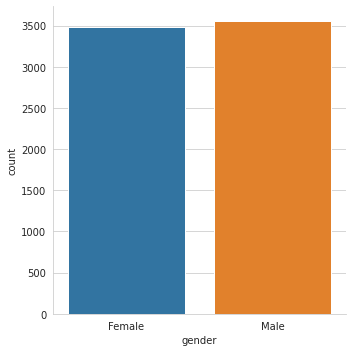

#### Approximately 50/50 gender ratio

In [ ]:
sns.catplot(x="gender", kind="count", data=df_churn)
plt.show()

printmd("#### Approximately 50/50 gender ratio")

### Dependents

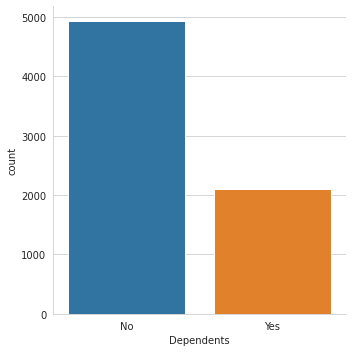

#### Users who have non-dependents are approximately two times more than users having dependents

In [ ]:
sns.catplot(x="Dependents", kind="count", data=df_churn)
plt.show()

printmd("#### Users who have non-dependents are approximately two times more than users having dependents")

### Senior Citizen

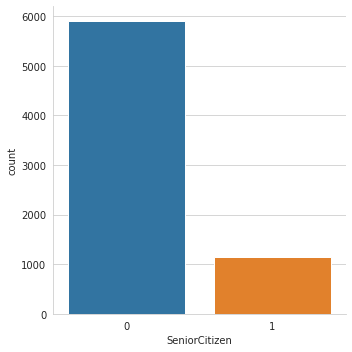

#### The majority of the users are not Senior Citizen

In [ ]:
sns.catplot(x="SeniorCitizen", kind="count", data=df_churn)
plt.show()

printmd("#### The majority of the users are not Senior Citizen")

### Contract

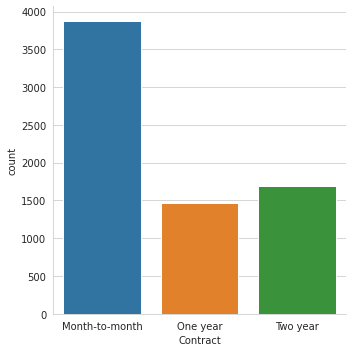

#### Most of the users prefer Month-to-month contract

In [ ]:
sns.catplot(x="Contract", kind="count", data=df_churn)
plt.show()

printmd("#### Most of the users prefer Month-to-month contract")

### PaperlessBilling

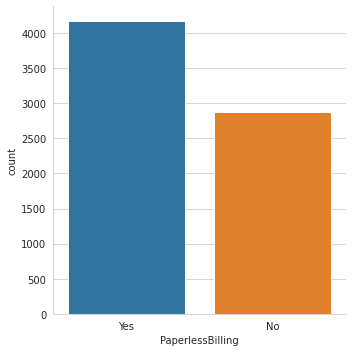

#### Most of the users prefer paperless billing

In [ ]:
sns.catplot(x="PaperlessBilling", kind="count", data=df_churn)
plt.show()

printmd("#### Most of the users prefer paperless billing")

### Total Charges

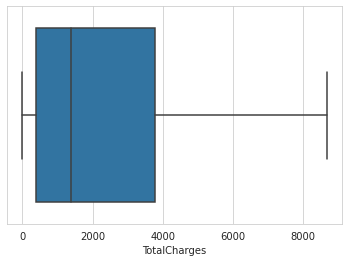

#### The total charges fall under 4000 for majority of the users

In [ ]:
sns.boxplot(x=df_churn["TotalCharges"])
plt.show()

printmd("#### The total charges fall under 4000 for majority of the users")

### Numerical Features

In [ ]:
"""#1.Create a function to plot histogram and density plot."""
def plot_histogram(feature):
    """Plots histogram and density plot of a variable."""
    
    # Create subplot object
    fig = make_subplots(
        rows=2,
        cols=1,
        print_grid=False,
    subplot_titles=(f"Distribution of {feature.name} with Histogram", f"Distribution of {feature.name} with Density Plot"))
    
    # This is a count histogram
    fig.add_trace(
        go.Histogram(
            x = feature,
            hoverinfo="x+y"
        ),
    row=1,col=1)

    # This is a density histogram
    fig.add_trace(
        go.Histogram(
            x = feature,
            hoverinfo="x+y",
            histnorm = "density"
        ),
    row=2,col=1)
    
    # Update layout
    fig.layout.update(
        height=800, 
        width=870,
        hovermode="closest"
        )
    
    # Update axes
    fig.layout.yaxis1.update(title="<b>Abs Frequency</b>")
    fig.layout.yaxis2.update(title="<b>Density(%)</b>")
    fig.layout.xaxis2.update(title=f"<b>{feature.name}</b>")
    return fig.show()

In [ ]:
plot_histogram(df_churn['tenure'])

printmd("**Tenure is U-shaped distributed**")

**Tenure is U-shaped distributed**

In [ ]:
plot_histogram(df_churn['MonthlyCharges'])

printmd("**MonthlyCharges is heavily skewed**")

**MonthlyCharges is heavily skewed**

In [ ]:
plot_histogram(df_churn['TotalCharges'])

printmd("**TotalCharges is reversed J-shaped distributed**")

**TotalCharges is reversed J-shaped distributed**

<a id='6'></a>
# 6 Bivariate Analysis

In this section, I did an extensive statistical analysis with various hypotheses testing based on paired data types like - 

* numerical and numerical data
* numerical and ordinal data
* ordinal and ordinal data
* categorical and categorical data


General Hypotheses - 

* H0: the two samples are independent
* H1: there is a dependency between the samples

<a id='6.1'></a>
## 6.1 List Feature Based on Types

In [ ]:
# Check cardinality of categorical variables 
target_col_filter = df_churn.loc[:, df_churn.columns != 'Churn']


cat_cols = list(set(target_col_filter.columns) - set(target_col_filter._get_numeric_data().columns))
num_cols = list(set(target_col_filter._get_numeric_data().columns) - set({'SeniorCitizen'})) # already converted to integer


# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: target_col_filter[col].nunique(), cat_cols))
dict_features_by_col = dict(zip(cat_cols, object_nunique))


# Print number of unique entries by column, in ascending order
print(sorted(dict_features_by_col.items(), key=lambda x: x[1]))


ordinal_cols = ['tenure-binned', 'MonthlyCharges-binned', 'TotalCharges-binned']
dichotomous_cols = [cat for cat in cat_cols if df_churn[cat].value_counts().count() == 2]
polytomous_cols = list(set(cat_cols) - set(dichotomous_cols) - set(ordinal_cols))


print("Categorical Columns".ljust(left_padding), cat_cols)
print("Numerical Columns".ljust(left_padding), num_cols)
print("Ordinal Columns".ljust(left_padding), ordinal_cols)
print("Dichotomous Columns".ljust(left_padding), dichotomous_cols)
print("Polytomous Columns".ljust(left_padding), polytomous_cols)

[('PhoneService', 2), ('Partner', 2), ('Dependents', 2), ('gender', 2), ('PaperlessBilling', 2), ('Contract', 3), ('StreamingTV', 3), ('OnlineSecurity', 3), ('TechSupport', 3), ('InternetService', 3), ('OnlineBackup', 3), ('MultipleLines', 3), ('TotalCharges-binned', 3), ('DeviceProtection', 3), ('tenure-binned', 3), ('MonthlyCharges-binned', 3), ('StreamingMovies', 3), ('PaymentMethod', 4)]
Categorical Columns   ['PhoneService', 'Contract', 'PaymentMethod', 'StreamingTV', 'OnlineSecurity', 'TechSupport', 'InternetService', 'OnlineBackup', 'MultipleLines', 'Partner', 'Dependents', 'gender', 'TotalCharges-binned', 'DeviceProtection', 'tenure-binned', 'MonthlyCharges-binned', 'PaperlessBilling', 'StreamingMovies']
Numerical Columns     ['TotalCharges', 'MonthlyCharges', 'tenure']
Ordinal Columns       ['tenure-binned', 'MonthlyCharges-binned', 'TotalCharges-binned']
Dichotomous Columns   ['PhoneService', 'Partner', 'Dependents', 'gender', 'PaperlessBilling']
Polytomous Columns    ['Onlin

**Categorical Columns**
> 'TechSupport', 'DeviceProtection', 'Contract', 'PaperlessBilling', 'TotalCharges-binned', <br>'gender', 'OnlineBackup', 'InternetService', 'StreamingTV', 'tenure-binned', <br>'Dependents', 'PhoneService', 'StreamingMovies', 'MultipleLines', 'Partner', <br>'MonthlyCharges-binned', 'OnlineSecurity', 'PaymentMethod'

**Numerical Columns**
> 'MonthlyCharges', 'tenure', 'TotalCharges'

**Ordinal Columns**
> tenure-binned', 'MonthlyCharges-binned', 'TotalCharges-binned'

**Dichotomous Columns**
> 'PaperlessBilling', 'gender', 'Dependents', 'PhoneService', 'Partner'

**Polytomous Columns**
> 'TechSupport', 'StreamingMovies', 'DeviceProtection', 'MultipleLines', 'Contract',<br> 'InternetService', 'OnlineSecurity', 'StreamingTV', 'PaymentMethod', 'OnlineBackup'

<a id='6.2'></a>
## 6.2 Numerical & Numerical

<a id='6.2.1'></a>
### 6.2.1 Spearman rank-order correlation
---
AKA Spearman's rho or Spearman correlation coefficient\
Applied to **Continuous or ordinal**

<br>

**Unlike the Pearson correlation**, the Spearman correlation does not assume that both datasets are **normally distributed**

Pearson correlation assumes normality, linearity and homoscedasticity.Pearson's correlation is also not able to tell the difference between dependent and independent variables

Hypotheses -

* H0: the two samples do not have monotonic relationship
* H1: there is a monotonic relationship between the samples

For Pearson r correlation, both variables should be normally distributed

According to the normality test, MonthlyCharges and TotalCharges columns are **not normally distributed** 

In [ ]:
def cal_spearmanr(c1, c2):

  alpha = 0.05

  correlation, p_value = stats.spearmanr(df_churn[c1], df_churn[c2])

  print(f'{c1}, {c2} correlation : {correlation}, p : {p_value}')

  if p_value > alpha:
    print('Probably do not have monotonic relationship (fail to reject H0)')
  else:
    print('Probably have monotonic relationship (reject H0)')

In [ ]:
cal_spearmanr('tenure','MonthlyCharges')

tenure, MonthlyCharges correlation : 0.27641678933130215, p : 1.0271266876409408e-123
Probably have monotonic relationship (reject H0)


In [ ]:
cal_spearmanr('tenure','TotalCharges')

tenure, TotalCharges correlation : 0.1335958253944717, p : 2.062335511455103e-29
Probably have monotonic relationship (reject H0)


In [ ]:
cal_spearmanr('MonthlyCharges','TotalCharges')

MonthlyCharges, TotalCharges correlation : 0.2851093518219916, p : 7.880164569887811e-132
Probably have monotonic relationship (reject H0)


<a id='6.3'></a>
## 6.3 Numerical & Categorical

<a id='6.3.1'></a>
### 6.3.1 Kendall rank correlation coefficient 
---
AKA **Kendall's τ** or **Kendall's Tau**

Kendall’s Tau is often used for correlation on continuous data if there are outliers in the data

A τ test is a non-parametric hypothesis test for statistical dependence based on the τ coefficient

Variable would be **continuous or ordinal**

Ordinal variable examples - 
* age, weight, height, test scores, survey scores, yearly salary, etc
* education level (GDE/Bachelors/Masters/PhD), income level (if grouped into high/medium/low) etc

In this dataset there are three ordinal features : 
* tenure-binned  
* MonthlyCharges-binned 
* TotalCharges-binned

In [ ]:
def kendall_rank_correlation(feature1, feature2):

  coef, p_value = stats.kendalltau(df_churn[feature1], df_churn[feature2])
  print(f"Correlation between {feature1} and {feature2} ")
  print('Kendall correlation coefficient = %.5f, p = %.5f' % (coef, p_value))

  # interpret the significance
  alpha = 0.05
  if p_value > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p_value)
  else:
    print('Samples are correlated (reject H0) p=%.3f' % p_value)
  print('----\n')

In [ ]:
ordinal_features = ['tenure-binned','MonthlyCharges-binned', 'TotalCharges-binned']

for ord in ordinal_features:
  printmd(f"Correlation with **{ord}**")
  kendall_rank_correlation('tenure',ord)
  kendall_rank_correlation('MonthlyCharges',ord)
  kendall_rank_correlation('TotalCharges',ord)

Correlation with **tenure-binned**

Correlation between tenure and tenure-binned 
Kendall correlation coefficient = -0.28746, p = 0.00000
Samples are correlated (reject H0) p=0.000
----

Correlation between MonthlyCharges and tenure-binned 
Kendall correlation coefficient = -0.10710, p = 0.00000
Samples are correlated (reject H0) p=0.000
----

Correlation between TotalCharges and tenure-binned 
Kendall correlation coefficient = -0.23680, p = 0.00000
Samples are correlated (reject H0) p=0.000
----



Correlation with **MonthlyCharges-binned**

Correlation between tenure and MonthlyCharges-binned 
Kendall correlation coefficient = -0.16485, p = 0.00000
Samples are correlated (reject H0) p=0.000
----

Correlation between MonthlyCharges and MonthlyCharges-binned 
Kendall correlation coefficient = -0.22506, p = 0.00000
Samples are correlated (reject H0) p=0.000
----

Correlation between TotalCharges and MonthlyCharges-binned 
Kendall correlation coefficient = -0.20858, p = 0.00000
Samples are correlated (reject H0) p=0.000
----



Correlation with **TotalCharges-binned**

Correlation between tenure and TotalCharges-binned 
Kendall correlation coefficient = 0.07424, p = 0.00000
Samples are correlated (reject H0) p=0.000
----

Correlation between MonthlyCharges and TotalCharges-binned 
Kendall correlation coefficient = 0.00298, p = 0.75152
Samples are uncorrelated (fail to reject H0) p=0.752
----

Correlation between TotalCharges and TotalCharges-binned 
Kendall correlation coefficient = 0.12334, p = 0.00000
Samples are correlated (reject H0) p=0.000
----



<a id='6.3.2'></a>
### 6.3.2 Mann-Whitney U Test

The Mann-Whitney U test is a **nonparametric** statistical significance test for determining whether two independent samples were drawn from a population with the same distribution.

The test determines whether the medians of two or more groups are different.

**NB** : For the test to be effective, it requires **at least 20 observations** in each data sample.

* Fail to Reject H0: Sample distributions are equal. (or sample distributions are likely drawn from the same population)
* Reject H0: Sample distributions are not equal.

or

* H0: population medians are equal.
* H1: population medians are not equal.

### Correlation with Target (Dichotomous)

In [ ]:
def mannwhitneyu_correlation(feature1):
  stat, p_value = stats.mannwhitneyu(df_churn[feature1], (df_churn['Churn'] == 'Yes').astype(int))
  print(f"Correlation between {feature1} and Churn")
  print('Statistics = %.5f, p = %.5f' % (stat, p_value))
  
  # interpret the significance
  alpha = 0.05
  if p_value > alpha:
      print('Same distribution (fail to reject H0)')
  else:
      print('Different distribution (reject H0)')
  print('----\n') 

In [ ]:
numerical_features = ['tenure','MonthlyCharges', 'TotalCharges']

for num in numerical_features:
  printmd(f"Correlation with **{num}**")
  mannwhitneyu_correlation(num)

Correlation with **tenure**

Correlation between tenure and Churn
Statistics = 48981984.50000, p = 0.00000
Different distribution (reject H0)
----



Correlation with **MonthlyCharges**

Correlation between MonthlyCharges and Churn
Statistics = 49603849.00000, p = 0.00000
Different distribution (reject H0)
----



Correlation with **TotalCharges**

Correlation between TotalCharges and Churn
Statistics = 49554833.00000, p = 0.00000
Different distribution (reject H0)
----



**Biserial correlation**

The point biserial correlation is used to measure the relationship between a **binary variable, x, and a continuous variable, y**. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply a determinative relationship.

NB: point-biserial correlation is conducted with the Pearson correlation formula except that one of the variables is dichotomous

The assumptions for Point-Biserial correlation include:

* Continuous and Binary
* **Normally Distributed** (In our case not normal)
* No Outliers
* Equal Variances

Options to normalize a non-normal distribution - 
 
* Log transform
* Square root transform
* Box cox
* Yeo Johnson

In [ ]:
# https://stackoverflow.com/questions/53624804/how-to-normalize-a-non-normal-distribution

data = df_churn['MonthlyCharges'].to_numpy()
pt = PowerTransformer(method='yeo-johnson') # ‘box-cox’, 'yeo-johnson'
data = data.reshape(-1, 1)
pt.fit(data)
transformed_data = pt.transform(data)

transformed_k2, transformed_p = stats.normaltest(transformed_data)

# other methods to transform into gaussian distribution

# stats.normaltest(np.log(df_churn['MonthlyCharges']))
# stats.normaltest(np.sqrt(df_churn['MonthlyCharges'])
# stats.normaltest(stats.boxcox(df_churn['MonthlyCharges'])[0])

# all other methods failed to convert into gaussian


alpha = 0.05
if transformed_p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


**Since the numerical columns can not be converted to gaussian distribution, point biseral correlation test can not be performed**

<a id='6.3.3'></a>
### 6.3.3 Polytomous(Nominal) with numeric

For a dichotomous categorical variable and a continuous variable we can calculate a Pearson correlation if the categorical variable has a 0/1-coding for the categories. This correlation is then also known as a point-biserial correlation coefficient. (parametric test)

But when we have **more than two categories** for the categorical variable the Pearson correlation is not appropriate anymore. \
We should then use **eta-squared, or eta**, as an effect-size measure for the relationship of a **categorical variable and a continuous variable**.


In [ ]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [ ]:
correlation_ratio(df_churn['PaymentMethod'], df_churn['MonthlyCharges'])

0.40127388087245935

In [ ]:
correlation_ratio(df_churn['PaymentMethod'], df_churn['TotalCharges'])

0.35074070554475645

In [ ]:
correlation_ratio(df_churn['PaymentMethod'], df_churn['tenure'])

0.3998293691962001

<a id='6.4'></a>
## 6.4 Dichotomous & Dichotomous

In classification, when both of them are categorical, then the strength of the relationship between them can be measured using a **Chi-square test**

<a id='6.4.1'></a>
### 6.4.1 Phi’s correlation 
---
AKA **Matthews correlation coefficient (MCC)**


In [ ]:
printmd("**Correlation Between Dichotomous Features with Target : Churn**")

for col in dichotomous_cols:
  print(col.ljust(left_padding), matthews_corrcoef(df_churn[col], df_churn['Churn']))

**Correlation Between Dichotomous Features with Target : Churn**

PaperlessBilling      0.1918253316664679
gender                0.0
Dependents            -0.16422140157972528
PhoneService          0.01194198002900308
Partner               -0.15044754495917656


<a id='6.5'></a>
## 6.5 Categorical & categorical 

<a id='6.5.1'></a>
### 6.5.1 Chi-Square

detect independence between 2 categorical variables, 2x2 or 2xMany

Test statistic in the context of the chi-squared distribution with the requisite number of degrees of freedom

* If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
* If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.

In terms of a p-value and a chosen significance level (alpha):

* If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.
* If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent

![image](https://user-images.githubusercontent.com/40615350/114787798-2a027900-9da2-11eb-972e-c5e52a9a628f.png)

In [ ]:
# alpha/significance = 0.05
# If p-value <= alpha: significant result, reject null hypothesis (H0), dependent
# If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent

def calculate_chi_square(feature1, feature2='Churn'):
  printmd(f"Correlation between **{feature1}** and **{feature2} : **")
  crosstab = pd.crosstab(df_churn[feature1], df_churn[feature2])
  # display(crosstab)
  stat, p, dof, expected = stats.chi2_contingency(crosstab,correction=True)


  print(f'p-value : {p}, degree of freedom: {dof}')
  # print("expected frequencies :\n", expected)

  # interpret test-statistic
  prob = 0.95
  critical = stats.chi2.ppf(prob, dof)
  print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

  if abs(stat) >= critical:
    print('Dependent (reject H0)')
  else:
    print('Independent (fail to reject H0)')
  
  # interpret p-value
  alpha = 1.0 - prob
  
  print('significance=%.3f, p=%.3f' % (alpha, p))
  if p <= alpha:
    print('Dependent (reject H0)')
  else:
    print('Independent (fail to reject H0)')
  print('-----------------------------------\n')

In [ ]:
printmd("**Chi-Squre Correlation Between Dichotomous Features with Target : Churn**")

for col in dichotomous_cols:
  calculate_chi_square(col)


**Chi-Squre Correlation Between Dichotomous Features with Target : Churn**

Correlation between **PhoneService** and **Churn**

p-value : 0.3387825358066928, degree of freedom: 1
probability=0.950, critical=3.841, stat=0.915
Independent (fail to reject H0)
significance=0.050, p=0.339
Independent (fail to reject H0)
-----------------------------------



Correlation between **Partner** and **Churn**

p-value : 2.1399113440759935e-36, degree of freedom: 1
probability=0.950, critical=3.841, stat=158.733
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **Dependents** and **Churn**

p-value : 4.9249216612154196e-43, degree of freedom: 1
probability=0.950, critical=3.841, stat=189.129
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **gender** and **Churn**

p-value : 0.48657873605618596, degree of freedom: 1
probability=0.950, critical=3.841, stat=0.484
Independent (fail to reject H0)
significance=0.050, p=0.487
Independent (fail to reject H0)
-----------------------------------



Correlation between **PaperlessBilling** and **Churn**

p-value : 4.073354668665985e-58, degree of freedom: 1
probability=0.950, critical=3.841, stat=258.278
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



**'PhoneService' and 'gender' features are not dependent with the target : Churn**

In [ ]:
printmd("**Chi-Squre Correlation Between Polytomous Features with Target : Churn**")

for col in polytomous_cols:
  calculate_chi_square(col)

**Chi-Squre Correlation Between Polytomous Features with Target : Churn**

Correlation between TechSupport and Churn


p-value : 1.4430840279998987e-180, degree of freedom: 2
probability=0.950, critical=5.991, stat=828.197
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-------------------

Correlation between StreamingMovies and Churn


p-value : 2.667756755723681e-82, degree of freedom: 2
probability=0.950, critical=5.991, stat=375.661
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-------------------

Correlation between DeviceProtection and Churn


p-value : 5.505219496457244e-122, degree of freedom: 2
probability=0.950, critical=5.991, stat=558.419
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-------------------

Correlation between MultipleLines and Churn


p-value : 0.0034643829548773, degree of freedom: 2
probability=0.950, critical=5.991, stat=11.330
Dependent (reject H0)
significance=0.050, p=0.003
Dependent (reject H0)
-------------------

Correlation between Contract and C

<a id='6.5.2'></a>
###  6.5.2 Cramér’s V
---
It is based on a nominal variation of **Pearson’s Chi-Square** Test\
Like correlation, Cramer’s V is symmetrical — it is insensitive to swapping x and y

Cramer's V is used to examine the association between **two categorical variables when there is more than a 2 X 2 contingency** (e.g., 2 X 3).\
In these more complicated designs, **phi correlation test** is not appropriate, but Cramer's statistic is. Cramer's V represents the association or correlation between two variables. This statistic is also referred to as **"Cramers Phi"**

To know more about this, visit this article : [the-search-for-categorical-correlation](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9)

In [ ]:
def cramers_v(x, y):
  """ calculate Cramers V statistic for categorial-categorial association.
      uses correction from Bergsma and Wicher,
      Journal of the Korean Statistical Society 42 (2013): 323-328
  """
  confusion_matrix = pd.crosstab(x,y)
  chi2 = stats.chi2_contingency(confusion_matrix)[0]
  n = confusion_matrix.sum().sum()
  phi2 = chi2/n
  r,k = confusion_matrix.shape
  phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
  rcorr = r-((r-1)**2)/(n-1)
  kcorr = k-((k-1)**2)/(n-1)
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# credit : https://stackoverflow.com/a/46498792/11105356

In [ ]:
printmd("**Correlation Between Polytomous Features with Target : Churn**")

for col in polytomous_cols:
  print(col.ljust(left_padding), cramers_v(df_churn[col], df_churn['Churn']))

printmd("<br>**Contract, OnlineSecurity, TechSupport are moderately correlated with Churn**<br>")            

**Correlation Between Polytomous Features with Target : Churn**

OnlineBackup          0.291850036724674
Contract              0.40979839182553446
PaymentMethod         0.3026771381187204
MultipleLines         0.03639958908232507
StreamingTV           0.22990176915403474
TechSupport           0.3425261587493695
DeviceProtection      0.28109492388964397
OnlineSecurity        0.34701606688272874
InternetService       0.3220367323307425
StreamingMovies       0.23035147282444215


<br>**Contract, OnlineSecurity, TechSupport are moderately correlated with Churn**<br>

**Cramers V Heatmap on Polytomous Features and Target: Churn**

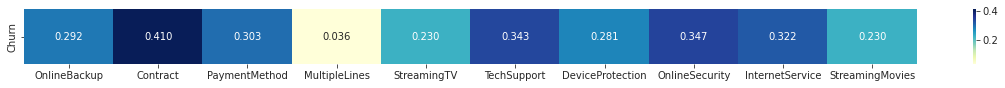

In [ ]:
printmd("**Cramers V Heatmap on Polytomous Features and Target: Churn**")
cramers_v_val = pd.DataFrame(index=['Churn'], columns=polytomous_cols)

for j in range(0,len(polytomous_cols)):
  u = cramers_v(df_churn['Churn'], df_churn[polytomous_cols[j]])
  cramers_v_val.loc[:,polytomous_cols[j]] = u

cramers_v_val.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(cramers_v_val,annot=True,fmt='.3f', cmap="YlGnBu")
plt.show()

#### Using Scipy Module

In [ ]:
crosstab = pd.crosstab(df_churn['OnlineSecurity'], df_churn['Churn'])
display(crosstab)
printmd(f"Association between OnlineSecurity and Target:Churn **{stats.contingency.association(crosstab, method='cramer')}**")

Churn,No,Yes
OnlineSecurity,,
No,2037,1461
No internet service,1413,113
Yes,1724,295


Association between OnlineSecurity and Target:Churn **0.3474004326740552**

<a id='6.5.3'></a>
### 6.5.3 Uncertainty Coefficient
---


AKA **Theil’s U** - an **asymmetric** measure of association between categorical features

It is is based on the conditional entropy between x and y — or in human language, given the value of x, how many possible states does y have, and how often do they occur. 

Formaly marked as U(x|y); Just like Cramer’s V, the output value is on the range of [0,1], where 0 means that feature y provides no information about feature x, and 1 means that feature y provides full information about features x's value 

**Unlike Cramer’s V, it is asymmetric**

So we will not lose any valuable information unlike symmetric tests 

In [ ]:
def conditional_entropy(x,y):
  # entropy of x given y
  y_counter = Counter(y)
  xy_counter = Counter(list(zip(x,y)))
  total_occurrences = sum(y_counter.values())
  entropy = 0
  for xy in xy_counter.keys():
      p_xy = xy_counter[xy] / total_occurrences
      p_y = y_counter[xy[1]] / total_occurrences
      entropy += p_xy * math.log(p_y/p_xy)
  return entropy

def theil_u(x,y):
  s_xy = conditional_entropy(x,y)
  x_counter = Counter(x)
  total_occurrences = sum(x_counter.values())
  p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
  s_x = stats.entropy(p_x)
  if s_x == 0:
      return 1
  else:
      return (s_x - s_xy) / s_x

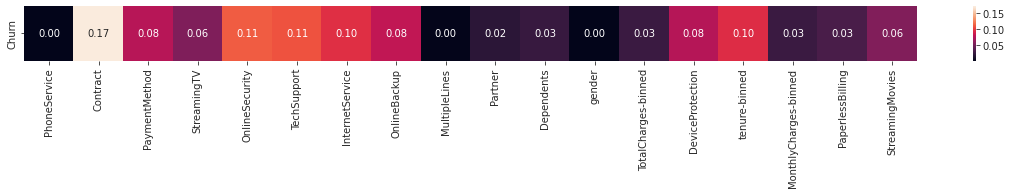

**Contract, OnlineSecurity, TechSupport, tenure-binned are moderately correlated with Churn**

In [ ]:
theilu = pd.DataFrame(index=['Churn'], columns=cat_cols)

for j in range(0,len(cat_cols)):
  u = theil_u(df_churn['Churn'].tolist(),df_churn[cat_cols[j]].tolist())
  theilu.loc[:,cat_cols[j]] = u

theilu.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(theilu,annot=True,fmt='.2f')
plt.show()

printmd("**Contract, OnlineSecurity, TechSupport, tenure-binned are moderately correlated with Churn**")            

<a id='6.6'></a>
## 6.6 Collinearity

For categorical variables, multicollinearity can be detected with **Spearman rank correlation coefficient** (ordinal variables) and **chi-square** test (nominal variables)

For categorical and a continuous variable, multicollinearity can be measured by t-test (if the categorical variable has 2 categories, parametric) or ANOVA (more than 2 categories, parametric)

Spearman's ρ was already performed, proceeding with chi-square 


<a id='6.6.1'></a>
### 6.6.1 Chi-Square

In [ ]:
calculate_chi_square('PaymentMethod','MultipleLines')

Correlation between **PaymentMethod** and **MultipleLines**



p-value : 1.1367151062832025e-81, degree of freedom: 6
probability=0.950, critical=12.592, stat=392.514
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



In [ ]:
calculate_chi_square('PaymentMethod','PhoneService')

Correlation between **PaymentMethod** and **PhoneService**



p-value : 0.8621473788722153, degree of freedom: 3
probability=0.950, critical=7.815, stat=0.747
Independent (fail to reject H0)
significance=0.050, p=0.862
Independent (fail to reject H0)
-----------------------------------



In [ ]:
calculate_chi_square('PaymentMethod','Contract')

Correlation between **PaymentMethod** and **Contract**



p-value : 4.067638353787387e-213, degree of freedom: 6
probability=0.950, critical=12.592, stat=1001.582
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



<a id='6.7'></a>
## 6.7 Visualization

### Tenure and MonthlyCharges Distribution

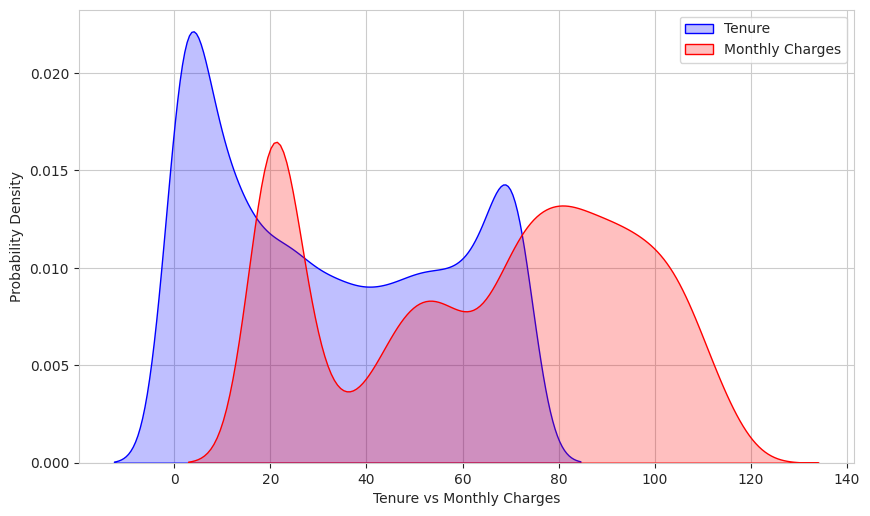

**Both are are not normally distributed, skewed,Tenure has a 
Bi-modal distribution <br>Most users stayed for less than 20 months, 
Monthly Charges for most people is nearly 20 unit**

In [ ]:
plt.figure(figsize=(10,6),dpi=100)
sns.kdeplot(df_churn.tenure, color='b', shade=True, Label='Tenure')
sns.kdeplot(df_churn.MonthlyCharges, color='r', shade=True, Label='Monthly Charges')
  
plt.xlabel('Tenure vs Monthly Charges')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

printmd("""**Both are are not normally distributed, skewed,Tenure has a 
Bi-modal distribution <br>Most users stayed for less than 20 months, 
Monthly Charges for most people is nearly 20 unit**""")

In [ ]:
# https://stackoverflow.com/a/65242391/11105356

df_g = df_churn.groupby(['StreamingTV', 'Churn']).size().reset_index()
df_g['percentage'] = df_churn.groupby(['StreamingTV', 'Churn']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['StreamingTV', 'Churn', 'Counts', 'Percentage']

px.bar(df_g, x='StreamingTV', y='Counts', 
       color='Churn',
       color_discrete_map={
        'Yes': '#99D594',
        'No': '#FC8D59',
    }, 
    text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

printmd("**Most churned users didn't use internet service**")

**Most churned users didn't use internet service**

### Contract and Churn

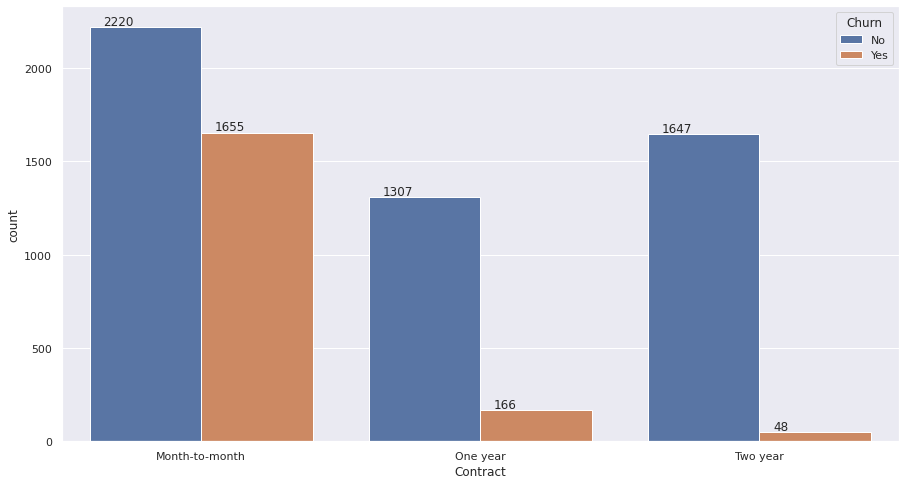

**Most churned users has Month-to-month contract**

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='Contract',hue='Churn',data=df_churn)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

printmd("**Most churned users has Month-to-month contract**")

### OnlineSecurity and Churn

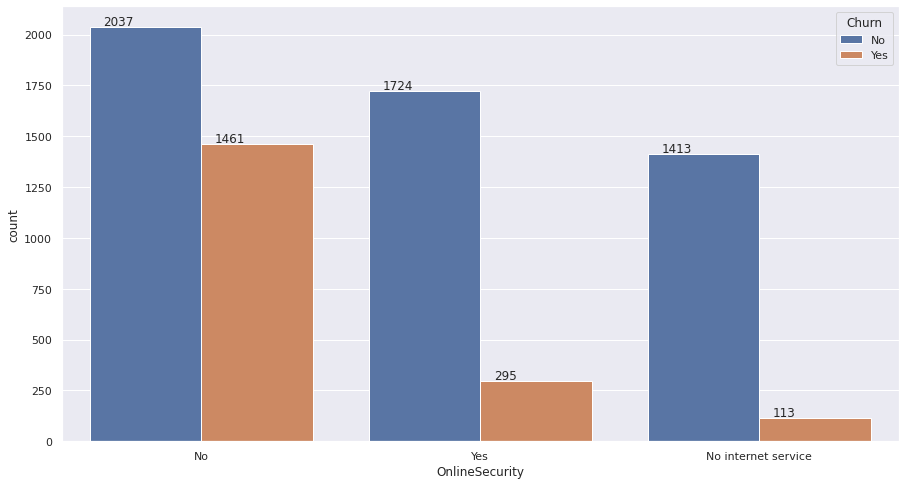

**Most churned users didn't have online security**

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='OnlineSecurity',hue='Churn',data=df_churn)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

printmd("**Most churned users didn't have online security**")

### Partner and Churn

**Most users who churned does not have a partner in contrast to the users who does**

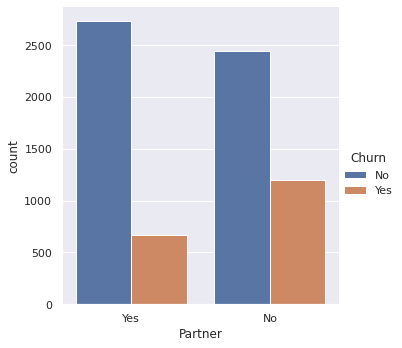

In [ ]:
sns.catplot(x='Partner',hue='Churn',data=df_churn, kind="count");

printmd("**Most users who churned does not have a partner in contrast to the users who does**")

### Gender, TotalCharges and Churn

**Gender is uncorrelated with churn rate**

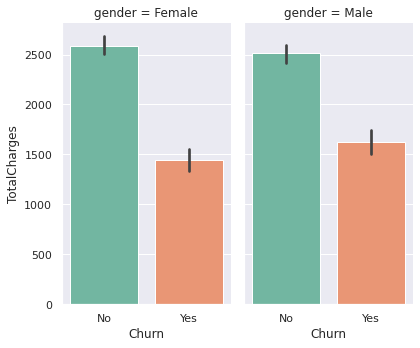

In [ ]:
sns.catplot(x='Churn',y='TotalCharges', col = 'gender', data=df_churn,
                kind='bar', aspect=.6, palette='Set2')

printmd("**Gender is uncorrelated with churn rate**")

### Checking Outliers

In [ ]:
px.box(df_churn, x="Churn", y="MonthlyCharges")

In [ ]:
px.box(df_churn, x="Churn", y="TotalCharges")

<Figure size 576x360 with 0 Axes>

In [ ]:
px.box(df_churn, x="Churn", y="tenure")

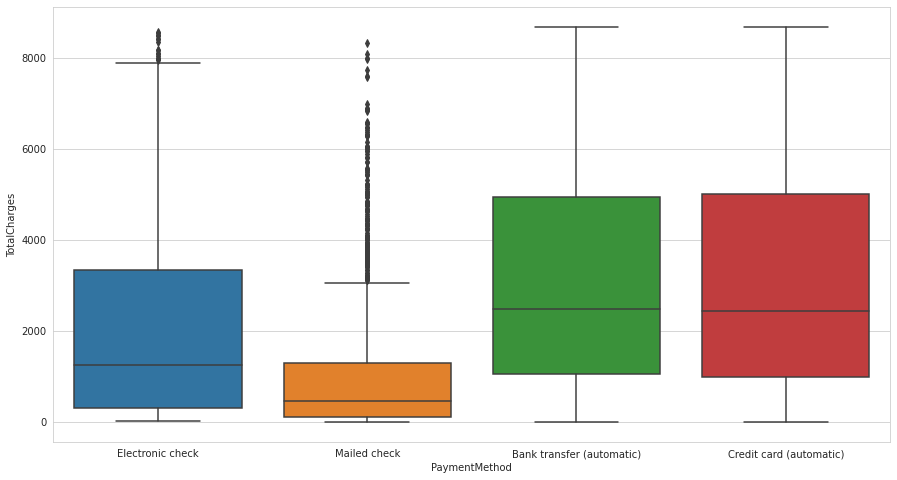

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="PaymentMethod", y="TotalCharges", data=df_churn)
plt.show()

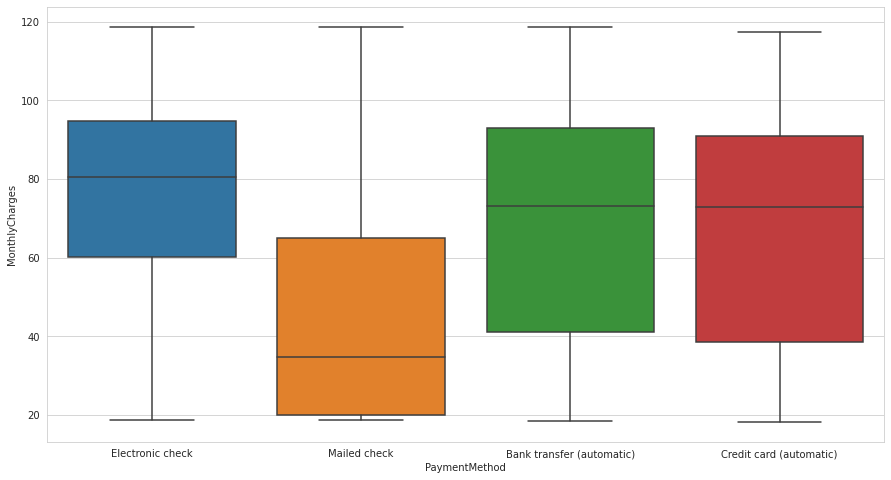

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="PaymentMethod", y="MonthlyCharges", data=df_churn)
plt.show()

<a id='7'></a>
# 7 Multivariate Analysis

<a id='7.1'></a>
### 7.1 Multicollinearity (Kruskal–Wallis)


The test is more commonly used when we have **three or more levels**. For two levels, the **Mann Whitney U Test** is appropriate 

The **parametric equivalent of the Kruskal–Wallis test** is the one-way analysis of variance (ANOVA)

Hypothses - 

* Fail to Reject H0: All sample distributions are equal.
* Reject H0: One or more sample distributions are not equal.


In [ ]:
# compare samples
stat, p = stats.kruskal(df_churn['TotalCharges'], df_churn['tenure'], df_churn['MonthlyCharges'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=13184.759, p=0.000
Different distributions (reject H0)


In [ ]:
# compare samples
stat, p = stats.kruskal(df_churn['DeviceProtection'], df_churn['StreamingMovies'], df_churn['PhoneService'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=4696.340, p=0.000
Different distributions (reject H0)


In [ ]:
# compare samples
stat, p = stats.kruskal(df_churn['Contract'], df_churn['PaymentMethod'], df_churn['PhoneService'], df_churn['InternetService'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=22407.812, p=0.000
Different distributions (reject H0)


<a id='7.2'></a>
## 7.2 Frequency Distribution

In [ ]:
def multivariate_analysis(cat_var_1, cat_var_2, cat_var_3, target_variable=df_churn.Churn):
    
    fig,ax = plt.subplots(1,1,figsize = (18,5))
    font_size = 15
    cat_grouped_by_cat_target = pd.crosstab(index = [cat_var_1, cat_var_2, cat_var_3],
                                        columns = target_variable, normalize = "index")*100                            
    cat_grouped_by_cat_target.rename({"Yes":"% Churn", "No":"% Not Churn"}, axis = 1, inplace = True)
    cat_grouped_by_cat_target.plot.bar(color = ["green", "red"],ax=ax)
    ax.set_xlabel(f"{cat_var_1.name}, {cat_var_2.name}, {cat_var_3.name}", fontsize = font_size)
    ax.set_ylabel("Relative Frequency(%)", fontsize = font_size)
    ax.tick_params(axis="x", labelsize=font_size)
    ax.tick_params(axis="y", labelsize=font_size)
    plt.legend(loc = "best")
    return plt.show()

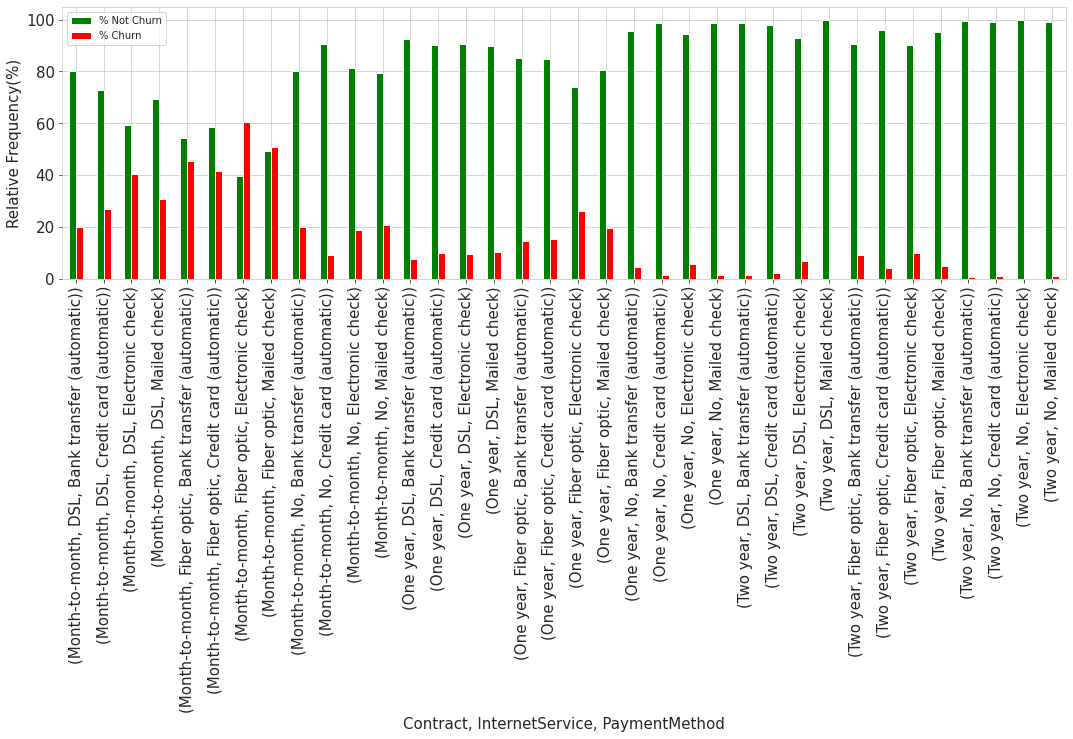

### Findings: Most of the users who churned had a Month-to-month contract and had internet service

In [ ]:
multivariate_analysis(df_churn.Contract, df_churn.InternetService, df_churn.PaymentMethod)
printmd("### Findings: Most of the users who churned had a Month-to-month contract and had internet service")

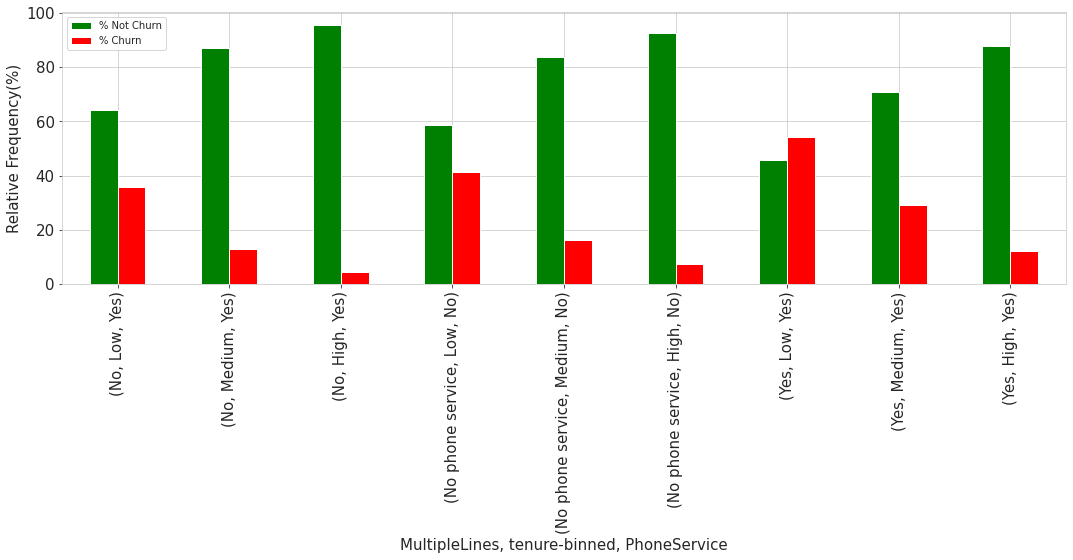

## Findings: Most of the users who churned had phone service

In [ ]:
multivariate_analysis(df_churn.MultipleLines, df_churn['tenure-binned'], df_churn.PhoneService)
printmd("## Findings: Most of the users who churned had phone service")

<a id='7.3'></a>
## 7.3 Churn Count Distribution

In [ ]:
def plot_counting_distribution(cardinality_value):

  #label encoding binary columns
  le = LabelEncoder()

  tmp_churn = df_churn[df_churn['Churn'] == 'Yes']
  tmp_no_churn = df_churn[df_churn['Churn'] == 'No']

  selected_columns = df_churn.nunique()[df_churn.nunique() == cardinality_value].keys()

  for col in selected_columns :
      tmp_churn[col] = le.fit_transform(tmp_churn[col])
      

  data_frame_x = tmp_churn[selected_columns].sum().reset_index()
  data_frame_x.columns = ["feature","Yes"]
  data_frame_x["No"] = tmp_churn.shape[0]  - data_frame_x["Yes"]
  data_frame_x = data_frame_x[data_frame_x["feature"] != "Churn"]

  #count of 1's(yes)
  trace1 = go.Scatterpolar(r=data_frame_x["Yes"].values.tolist(), 
                          theta=data_frame_x["feature"].tolist(),
                          fill="toself", name="Churn 1's",
                          mode="markers+lines", visible=True,
                          marker=dict(size=5)
                          )

  #count of 0's(No)
  trace2 = go.Scatterpolar(r=data_frame_x["No"].values.tolist(),
                          theta=data_frame_x["feature"].tolist(),
                          fill="toself",name="Churn 0's",
                          mode="markers+lines", visible=True,
                          marker=dict(size = 5)
                          ) 
  for col in selected_columns :
      tmp_no_churn[col] = le.fit_transform(tmp_no_churn[col])
      
  data_frame_x = tmp_no_churn[selected_columns].sum().reset_index()
  data_frame_x.columns  = ["feature","Yes"]
  data_frame_x["No"]    = tmp_no_churn.shape[0]  - data_frame_x["Yes"]
  data_frame_x  = data_frame_x[data_frame_x["feature"] != "Churn"]

  #count of 1's(yes)
  trace3 = go.Scatterpolar(r = data_frame_x["Yes"].values.tolist(),
                          theta = data_frame_x["feature"].tolist(),
                          fill  = "toself",name = "NoChurn 1's",
                          mode = "markers+lines", visible=False,
                          marker = dict(size = 5)
                          )

  #count of 0's(No)
  trace4 = go.Scatterpolar(r = data_frame_x["No"].values.tolist(),
                          theta = data_frame_x["feature"].tolist(),
                          fill  = "toself",name = "NoChurn 0's",
                          mode = "markers+lines", visible=False,
                          marker = dict(size = 5)
                          ) 

  data = [trace1, trace2, trace3, trace4]

  updatemenus = list([
      dict(active=0,
          x=-0.15,
          buttons=list([  
              dict(
                  label = 'Churn Dist',
                  method = 'update',
                  args = [{'visible': [True, True, False, False]}, 
                      {'title': f'Customer Churn Binary Counting Distribution' }]),
              
              dict(
                    label = 'No-Churn Dist',
                  method = 'update',
                  args = [{'visible': [False, False, True, True]},
                      {'title': f'No Customer Churn Binary Counting Distribution'}]),

          ]),
      )
  ])

  layout = dict(title='ScatterPolar Distribution of Churn and Non-Churn Customers (Select from Dropdown)', 
                showlegend=False,
                updatemenus=updatemenus)

  fig = dict(data=data, layout=layout)

  pio.show(fig)

# Thanks to : https://www.kaggle.com/kabure/insightful-eda-churn-customers-models-pipeline#Feature-Engineering

<a id='7.3.1'></a>
###  7.3.1 Features With Cardinality = 2

In [ ]:
plot_counting_distribution(2)

<a id='7.3.2'></a>
###  7.3.2 Features With Cardinality = 3

In [ ]:
plot_counting_distribution(3)

<a id='8'></a>
# 8 Feature Engineering

<a id='8.1'></a>
## 8.1 Encode Target variable

In [ ]:
df_churn_cleaned = df_churn.copy()
df_churn_cleaned.Churn[df_churn_cleaned.Churn.str.lower() == 'yes'] = 1
df_churn_cleaned.Churn[df_churn_cleaned.Churn.str.lower() == 'no'] = 0

df_churn_cleaned['Churn'] = df_churn_cleaned['Churn'].astype('float')

In [ ]:
# remove features based on feature importance
# df_churn_cleaned.drop(['gender','Partner','PhoneService','MultipleLines','StreamingMovies'], axis=1, inplace=True)

**One Hot Encoding**


N.B : No improvement, keeping the feature set as it is

In [ ]:
df_churn_ohe = pd.get_dummies(df_churn_cleaned)

In [ ]:
# remove duplicated columns
df_churn_ohe.drop(['MultipleLines_No phone service', 
               'OnlineSecurity_No internet service',
               'OnlineBackup_No internet service',
               'DeviceProtection_No internet service',
               'TechSupport_No internet service',
               'StreamingTV_No internet service',
               'StreamingMovies_No internet service'],axis=1, inplace=True)

<a id='9'></a>
# 9 Data Preparation

<a id='9.1'></a>
## 9.1 Prepare Train/Test dataset

In [ ]:
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=SEED)
for train_index, test_index in strat_split.split(df_churn_cleaned, df_churn_cleaned["Churn"]):
    strat_train_set = df_churn_cleaned.loc[train_index]
    strat_test_set = df_churn_cleaned.loc[test_index]

print('Target Labels Ratio in Original Dataset\n')
print(df_churn_cleaned["Churn"].value_counts(normalize=True).sort_index())
# df_churn_cleaned["Churn"].value_counts() / len(strat_test_set)

print('\nTarget Labels Ratio in Test Dataset\n')
print(strat_test_set["Churn"].value_counts(normalize=True).sort_index())
# strat_test_set["Churn"].value_counts() / len(strat_test_set)

Target Labels Ratio in Original Dataset

0.0    0.73463
1.0    0.26537
Name: Churn, dtype: float64

Target Labels Ratio in Test Dataset

0.0    0.734564
1.0    0.265436
Name: Churn, dtype: float64


In [ ]:
# train Dataset
X = strat_train_set.drop("Churn", axis=1)
y = strat_train_set["Churn"].copy()

# test dataset
y_test = strat_test_set['Churn'].values
X_test = strat_test_set.drop('Churn',axis=1)

X.shape, y.shape, X_test.shape, y_test.shape

((5634, 22), (5634,), (1409, 22), (1409,))

In [ ]:
# Check cardinality of categorical variables : 

# reinitiate cat_cols because 'customerID' is still included in cat_cols variable
cat_cols = list(set(X.columns) - set(X._get_numeric_data().columns))
num_cols = list(set(X._get_numeric_data().columns) - set({'SeniorCitizen'})) # already converted
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: X[col].nunique(), cat_cols))
d = dict(zip(cat_cols, object_nunique))

print("Number of unique entries by column, in ascending order:\n")
pprint.pprint(sorted(d.items(), key=lambda x: x[1]))

print("Total Categorical Columns",len(cat_cols))
print("Total Numerical Columns",len(num_cols))

printmd("**<br>Dataset has maximum cardinality value of 4 which is comparatively low<br>**")

Number of unique entries by column, in ascending order:

[('Dependents', 2),
 ('PhoneService', 2),
 ('PaperlessBilling', 2),
 ('Partner', 2),
 ('gender', 2),
 ('TechSupport', 3),
 ('OnlineSecurity', 3),
 ('StreamingMovies', 3),
 ('MultipleLines', 3),
 ('OnlineBackup', 3),
 ('StreamingTV', 3),
 ('tenure-binned', 3),
 ('InternetService', 3),
 ('TotalCharges-binned', 3),
 ('MonthlyCharges-binned', 3),
 ('DeviceProtection', 3),
 ('Contract', 3),
 ('PaymentMethod', 4)]
Total Categorical Columns 18
Total Numerical Columns 3


**<br>Dataset has maximum cardinality value of 4 which is comparatively low<br>**

<a id='9.2'></a>
## 9.2 Encoding & Scaling

In [ ]:
ordinal_encoder = OrdinalEncoder()
X[cat_cols] = ordinal_encoder.fit_transform(X[cat_cols])
X_test[cat_cols] = ordinal_encoder.transform(X_test[cat_cols])

le = LabelEncoder()
y = le.fit_transform(y)

y_test = le.fit_transform(y_test)


num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

transformer = RobustScaler()
X[num_cols] = transformer.fit_transform(X[num_cols])
X_test[num_cols] = transformer.transform(X_test[num_cols])

**Correlation Heatmap**

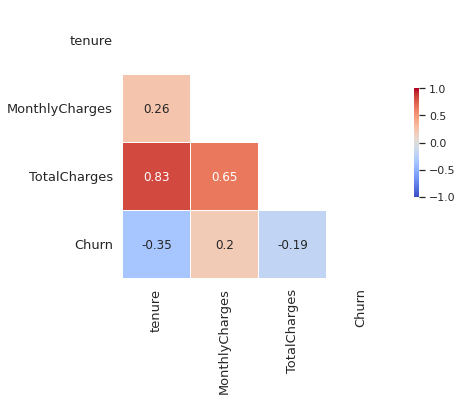

**Tenure is moderately correlated Numerical Feature with Target**

In [ ]:
# pearson’s R isn’t defined when the data is categorical - parametric
# Kendall’s Tau is a non-parametric measure of relationships between columns of ranked data - non-parametric
# while Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not) - non -parametric

# corr_matrix = pd.concat([X,strat_train_set[["Churn"]]],axis=1).corr(method='kendall') # or 'spearman' / 'pearson'
# most of the variables are categorical and nominal, so for non-numerical attributes it's ineffective
# moreover three are only three numerical features which are non-normal 
# therefore, pandas.corr() is not feasible to use for this case

# Correlation Matrix
# only numerical output
corr_matrix = pd.concat([X[num_cols],strat_train_set[["Churn"]]],axis=1).corr()

# Set Up Mask To Hide Upper Triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0, fontsize=13)
ax.set_xticklabels(corr_matrix.columns, fontsize=13)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.show()

printmd("**Tenure is moderately correlated Numerical Feature with Target**")

<a id='10'></a>
# 10 Modeling

<a id='10.1'></a>
## 10.1 Utility Function

<a id='10.1.1'></a>
### 10.1.1 Training

In [ ]:
def train_model(model, model_name, X, y, X_test, fold):
  printmd(f'**{model_name} Init**')
  auc_scores = []

  test_preds=None

  strat_kf = StratifiedKFold(n_splits=fold, random_state=SEED, shuffle=True)

  for fold, (train_index, valid_index) in enumerate(strat_kf.split(X, y)):
    X_train, X_valid = X.iloc[train_index] , X.iloc[valid_index]
    y_train, y_valid = y[train_index] , y[valid_index]


    #### to SMOTE sampling
    # sm = SMOTE(sampling_strategy='all', random_state=SEED)
    # X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
    # X_val_oversampled, y_val_oversampled = sm.fit_resample(X_valid, y_valid)
 
    eval_set = [(X_valid, y_valid)]

    print("-" * 50)
    print(f"Fold {fold + 1}")

    if model_name == 'cat':
      model.fit(X_train, y_train, eval_set= eval_set, verbose=False)
    elif model_name == 'xgb':
      model.fit(X_train, y_train, eval_set= eval_set, eval_metric = 'auc', verbose = False, early_stopping_rounds = 200)
    else:
      model.fit(X_train, y_train, eval_set= eval_set, eval_metric = 'auc', verbose = False, early_stopping_rounds = 200)
    

    val_pred = model.predict_proba(X_valid)[:,1]
    auc = roc_auc_score(y_valid, val_pred) # AUROC requires probabilities of the predictions
    print("AUC Score : ",auc)

    auc_scores.append(auc)

    if test_preds is None:
      test_preds = model.predict_proba(X_test)[:,1] 
    else:
      test_preds += model.predict_proba(X_test)[:,1] 


    del X_train, y_train, X_valid, y_valid
    gc.collect()
      
  print("-" * 50)
  test_preds /= fold

  print(f'Train : Base Model - {model_name} - AUC score : mean ---> {np.mean(auc_scores)}, std ---> {np.std(auc_scores)}')
  
  # evaluation on test set
  print(f'Test  : Base Model - {model_name} - AUC score : {roc_auc_score(y_test, test_preds)}')

  del test_preds
  gc.collect()
  
  print('Done!')

  if model_name == 'cat':
    plot_feature_importance(model.get_feature_importance(), X.columns, model_name)
    model.save_model("model_catboost")

  elif model_name == 'xgb':
    plot_feature_importance(model.feature_importances_, X.columns, model_name)

    # https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html
    # save the model
    model.save_model('model_xgb.json')

  else:
    plot_feature_importance(model.feature_importances_, X.columns, model_name)
    model.booster_.save_model('model_lgbm.txt') 
    # shap_values = shap.TreeExplainer(model.booster_).shap_values(X_train)



<a id='10.1.2'></a>
### 10.1.2 Model Interpretation

In [ ]:
# https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html

def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8),dpi=100)
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

<a id='10.2'></a>
## 10.2 Catboost

<a id='10.2'></a>
### 10.2.1 Training

**cat Init**

--------------------------------------------------
Fold 1
AUC Score :  0.8276489533011271
--------------------------------------------------
Fold 2
AUC Score :  0.862157809983897
--------------------------------------------------
Fold 3
AUC Score :  0.8367069243156201
--------------------------------------------------
Fold 4
AUC Score :  0.8323752012882448
--------------------------------------------------
Fold 5
AUC Score :  0.842330512596051
--------------------------------------------------
Fold 6
AUC Score :  0.8562558765360049
--------------------------------------------------
Fold 7
AUC Score :  0.8706351522225464
--------------------------------------------------
Fold 8
AUC Score :  0.857812145381448
--------------------------------------------------
Fold 9
AUC Score :  0.8553156307752164
--------------------------------------------------
Fold 10
AUC Score :  0.8699354317998387
--------------------------------------------------
Train : Base Model - cat - AUC score : mean ---> 0.

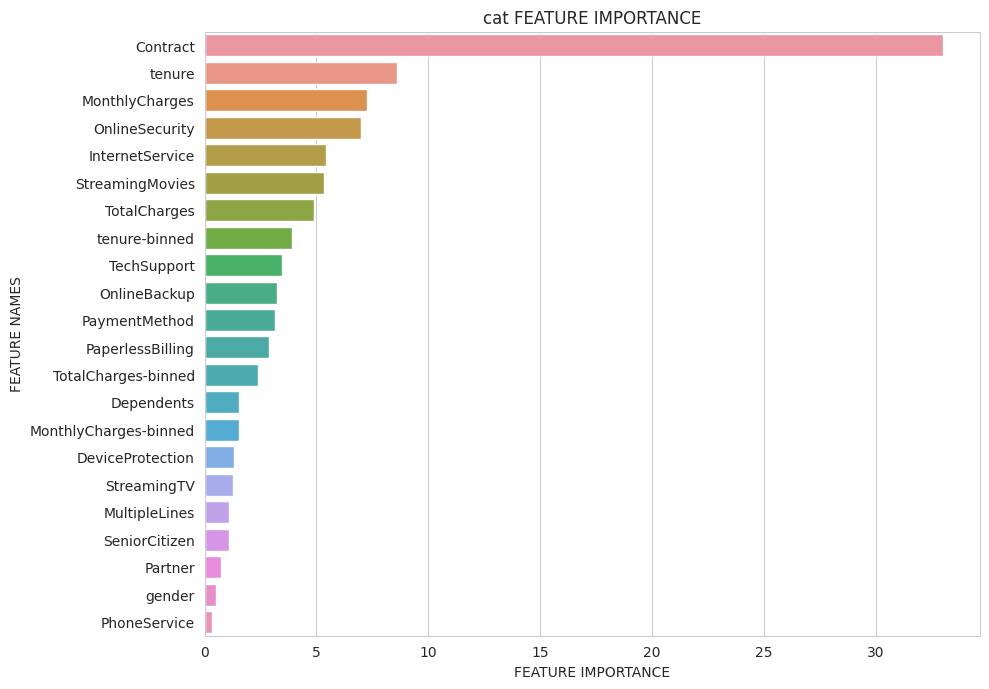

In [ ]:
fold_num = 10

# convert datatype to integer to use 'cat_features' parameter
# does not improve score
# for c in cat_cols:
#     X[c] = X[c].astype(np.int)
#     X_test[c] = X_test[c].astype(np.int)

cat_params  = {
    'eval_metric':"AUC",
    #  'task_type':"GPU",
    'loss_function': 'logloss',
    'boosting_type': 'Plain',
    'bootstrap_type': 'Bayesian', # 0.846998114133664
    'colsample_bylevel': 0.013457968759952536,
    'depth': 6,
    'iterations': 6888,
    'learning_rate': 0.05683590866750785,
    'objective': 'Logloss',
    'random_strength': 18, 
    'l2_leaf_reg': 50,
    'random_state': SEED,
    # 'cat_features':cat_cols
    }

cat = CatBoostClassifier(**cat_params)

train_model(cat, 'cat', X, y, X_test, fold_num)


# After tune with catboost 200 trial+all featuer + standard scaler Best tuning Score:  0.8414050995892428

# Train : Base Model - cat - AUC score : mean ---> 0.8511173638199994, std ---> 0.01460379925370074
# Test  : Base Model - cat - AUC score : 0.8472435350951975

<a id='10.2.2'></a>
### 10.2.2 Optuna Tuning

In [ ]:
%%time
def objective(trial):
    train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=int(SEED), shuffle=True, stratify=y)
    # train_pool = Pool(train_x, train_y)
    # test_pool = Pool(test_x, test_y)
    
    # parameters
    params = {
        'iterations' : trial.suggest_int('iterations', 6000, 8000), 
        'depth' : trial.suggest_int('depth', 3, 12),
        'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        'random_strength' :trial.suggest_int('random_strength', 0, 100),   
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]  # https://catboost.ai/en/docs/concepts/algorithm-main-stages_bootstrap-options
        ),
        'random_state': trial.suggest_categorical('random_state',[SEED])
        # "used_ram_limit": "3gb",
    }

    # learning
    model = CatBoostClassifier(
        loss_function="Logloss",
        eval_metric="AUC",
        # task_type="GPU",
        l2_leaf_reg=50,
        border_count=64,
        **params
    )        
    model.fit(train_x, train_y, verbose=1000)
    val_preds = model.predict_proba(test_x)[:,1]
    auc = roc_auc_score(test_y, val_preds) # AUROC requires probabilities of the predictions
    print("AUC Score : ",auc)
    
    return auc

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 10.7 µs


In [ ]:
%%time
n_trials = int(200)
study = optuna.create_study(direction = "maximize", sampler = optuna.samplers.TPESampler(seed=int(SEED)))
study.optimize(objective, n_trials = n_trials, n_jobs = multiprocessing.cpu_count())

printmd('**BEST TRIAL**')
print("Best Score: ", study.best_value)
printmd('**CatBoost Tuned Hyperparameters**')
pprint.pprint(study.best_trial.params)

[I 2021-10-24 15:28:36,821] A new study created in memory with name: no-name-6e78c633-9175-4a91-b53d-88b69dd562b9
Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	total: 47.5ms	remaining: 5m 50s
0:	total: 41.1ms	remaining: 4m 44s
1000:	total: 1.55s	remaining: 9.9s
1000:	total: 1.89s	remaining: 11.2s
2000:	total: 3s	remaining: 8.09s
2000:	total: 3.74s	remaining: 9.21s
3000:	total: 4.53s	remaining: 6.63s
3000:	total: 5.6s	remaining: 7.33s
4000:	total: 5.93s	remaining: 5.02s
5000:	total: 7.25s	remaining: 3.46s
4000:	total: 7.49s	remaining: 5.47s
6000:	total: 8.57s	remaining: 1.98s
5000:	total: 9.32s	remaining: 3.59s
7000:	total: 9.95s	remaining: 551ms


[I 2021-10-24 15:28:47,998] Trial 0 finished with value: 0.8366038905680849 and parameters: {'iterations': 7389, 'depth': 11, 'learning_rate': 0.0024398407968198063, 'objective': 'Logloss', 'colsample_bylevel': 0.03332632433646412, 'random_strength': 12, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 0 with value: 0.8366038905680849.


7388:	total: 10.5s	remaining: 0us
AUC Score :  0.8366038905680849
0:	total: 9.36ms	remaining: 1m 9s
6000:	total: 11s	remaining: 1.69s


[I 2021-10-24 15:28:50,008] Trial 1 finished with value: 0.8295771009325997 and parameters: {'iterations': 6926, 'depth': 7, 'learning_rate': 0.0012325283690762738, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.029470227652000185, 'random_strength': 24, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 0 with value: 0.8366038905680849.


6925:	total: 12.4s	remaining: 0us
AUC Score :  0.8295771009325997
0:	total: 864us	remaining: 6.42s
1000:	total: 2.03s	remaining: 13.1s
2000:	total: 4.03s	remaining: 10.9s
3000:	total: 5.96s	remaining: 8.8s
1000:	total: 8.17s	remaining: 52.7s
4000:	total: 7.88s	remaining: 6.75s
5000:	total: 10.1s	remaining: 4.89s
6000:	total: 12s	remaining: 2.87s
2000:	total: 15.9s	remaining: 43.5s
7000:	total: 14.1s	remaining: 863ms


[I 2021-10-24 15:29:05,922] Trial 3 finished with value: 0.836327469064042 and parameters: {'iterations': 7430, 'depth': 8, 'learning_rate': 0.001200000108781301, 'objective': 'Logloss', 'colsample_bylevel': 0.05172188392418695, 'random_strength': 3, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 0 with value: 0.8366038905680849.


7429:	total: 15s	remaining: 0us
AUC Score :  0.836327469064042
0:	total: 9.5ms	remaining: 1m 3s
3000:	total: 23.4s	remaining: 34.8s
1000:	total: 6.16s	remaining: 35.2s
2000:	total: 12.1s	remaining: 28.5s
4000:	total: 31.2s	remaining: 27s
3000:	total: 18.1s	remaining: 22.5s
5000:	total: 38.7s	remaining: 19.1s
4000:	total: 24.3s	remaining: 16.5s
6000:	total: 46.2s	remaining: 11.2s
5000:	total: 30s	remaining: 10.4s
6000:	total: 36s	remaining: 4.35s
7000:	total: 53.8s	remaining: 3.54s


[I 2021-10-24 15:29:46,412] Trial 2 finished with value: 0.8363662197421787 and parameters: {'iterations': 7462, 'depth': 10, 'learning_rate': 0.006080668307960206, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.060366987476368886, 'random_strength': 46, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'random_state': 42}. Best is trial 0 with value: 0.8366038905680849.


7461:	total: 57.1s	remaining: 0us
AUC Score :  0.8363662197421787
0:	total: 1.11ms	remaining: 7.22s


[I 2021-10-24 15:29:47,498] Trial 4 finished with value: 0.8383153788524632 and parameters: {'iterations': 6726, 'depth': 3, 'learning_rate': 0.07940170190278116, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.018671753901098223, 'random_strength': 42, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 4 with value: 0.8383153788524632.


6725:	total: 40.5s	remaining: 0us
AUC Score :  0.8383153788524632
0:	total: 5.63ms	remaining: 43s
1000:	total: 1.54s	remaining: 8.46s
2000:	total: 3.35s	remaining: 7.55s
3000:	total: 5.25s	remaining: 6.14s
4000:	total: 6.9s	remaining: 4.33s
1000:	total: 6.59s	remaining: 43.7s
5000:	total: 8.65s	remaining: 2.61s
6000:	total: 10.3s	remaining: 877ms


[I 2021-10-24 15:29:58,282] Trial 5 finished with value: 0.8180371489834406 and parameters: {'iterations': 6511, 'depth': 4, 'learning_rate': 0.07752781528570134, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.06409012417933953, 'random_strength': 97, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 4 with value: 0.8383153788524632.


6510:	total: 11.2s	remaining: 0us
AUC Score :  0.8180371489834406
0:	total: 1.04ms	remaining: 8.35s
1000:	total: 2.03s	remaining: 14.2s
2000:	total: 13s	remaining: 36.7s
2000:	total: 4.11s	remaining: 12.3s
3000:	total: 6.01s	remaining: 10s
4000:	total: 7.95s	remaining: 7.93s
3000:	total: 19.7s	remaining: 30.4s
5000:	total: 9.84s	remaining: 5.89s
6000:	total: 11.9s	remaining: 3.95s
7000:	total: 13.8s	remaining: 1.96s
4000:	total: 26.3s	remaining: 23.9s


[I 2021-10-24 15:30:14,977] Trial 7 finished with value: 0.8344726032705573 and parameters: {'iterations': 7996, 'depth': 12, 'learning_rate': 0.0010123139976750883, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.05358293510131859, 'random_strength': 11, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 4 with value: 0.8383153788524632.


7995:	total: 15.6s	remaining: 0us
AUC Score :  0.8344726032705573
0:	total: 1.04ms	remaining: 6.64s
1000:	total: 1.65s	remaining: 8.86s
2000:	total: 3.33s	remaining: 7.3s
3000:	total: 5.04s	remaining: 5.68s
5000:	total: 32.3s	remaining: 17.1s
4000:	total: 6.74s	remaining: 4.01s
5000:	total: 8.31s	remaining: 2.3s
6000:	total: 9.85s	remaining: 627ms


[I 2021-10-24 15:30:26,121] Trial 8 finished with value: 0.8327688651218064 and parameters: {'iterations': 6383, 'depth': 3, 'learning_rate': 0.09302515832370428, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.029613213276661436, 'random_strength': 65, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 4 with value: 0.8383153788524632.


6382:	total: 10.5s	remaining: 0us
AUC Score :  0.8327688651218064
0:	total: 5.26ms	remaining: 41.7s
6000:	total: 38.5s	remaining: 10.5s
7000:	total: 44.8s	remaining: 4.09s
1000:	total: 7.75s	remaining: 53.5s


[I 2021-10-24 15:30:37,299] Trial 6 finished with value: 0.8384729649435532 and parameters: {'iterations': 7640, 'depth': 8, 'learning_rate': 0.057574299069724104, 'objective': 'Logloss', 'colsample_bylevel': 0.015122550353998907, 'random_strength': 74, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 6 with value: 0.8384729649435532.


7639:	total: 48.7s	remaining: 0us
AUC Score :  0.8384729649435532
0:	total: 5.29ms	remaining: 36.4s
2000:	total: 15.2s	remaining: 44.9s
1000:	total: 7.26s	remaining: 42.8s
3000:	total: 22.5s	remaining: 36.8s
2000:	total: 14.4s	remaining: 35.3s
4000:	total: 29.8s	remaining: 29.1s
3000:	total: 21.4s	remaining: 27.8s
5000:	total: 36.9s	remaining: 21.5s
4000:	total: 28.4s	remaining: 20.5s
6000:	total: 44.7s	remaining: 14.3s
5000:	total: 35.3s	remaining: 13.4s
7000:	total: 51.9s	remaining: 6.79s
6000:	total: 42.1s	remaining: 6.26s


[I 2021-10-24 15:31:26,104] Trial 9 finished with value: 0.824715182515694 and parameters: {'iterations': 7917, 'depth': 9, 'learning_rate': 0.03847068277255463, 'objective': 'Logloss', 'colsample_bylevel': 0.04797687625686765, 'random_strength': 19, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 6 with value: 0.8384729649435532.


7916:	total: 58.5s	remaining: 0us
AUC Score :  0.824715182515694
0:	total: 9.5ms	remaining: 1m 8s
6892:	total: 48.1s	remaining: 0us


[I 2021-10-24 15:31:26,514] Trial 10 finished with value: 0.8383838383838382 and parameters: {'iterations': 6893, 'depth': 3, 'learning_rate': 0.013315256453891316, 'objective': 'Logloss', 'colsample_bylevel': 0.04358875708482692, 'random_strength': 97, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 6 with value: 0.8384729649435532.


AUC Score :  0.8383838383838382
0:	total: 6.99ms	remaining: 49.9s
1000:	total: 7.84s	remaining: 48.3s
1000:	total: 7.88s	remaining: 48.4s
2000:	total: 15.5s	remaining: 39.8s
2000:	total: 15.8s	remaining: 40.8s
3000:	total: 23s	remaining: 31.7s
3000:	total: 23.9s	remaining: 33.2s
4000:	total: 30.6s	remaining: 24s
4000:	total: 31.6s	remaining: 25s
5000:	total: 38.2s	remaining: 16.4s
5000:	total: 39.6s	remaining: 17.1s
6000:	total: 45.7s	remaining: 8.73s
6000:	total: 47.1s	remaining: 9.15s
7000:	total: 53.3s	remaining: 1.11s


[I 2021-10-24 15:32:22,143] Trial 12 finished with value: 0.8224521429125009 and parameters: {'iterations': 7147, 'depth': 6, 'learning_rate': 0.01962174764480808, 'objective': 'Logloss', 'colsample_bylevel': 0.08902409826127855, 'random_strength': 91, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'random_state': 42}. Best is trial 6 with value: 0.8384729649435532.


7146:	total: 54.4s	remaining: 0us
AUC Score :  0.8224521429125009
0:	total: 7.86ms	remaining: 48.2s
7000:	total: 55.3s	remaining: 1.31s


[I 2021-10-24 15:32:24,235] Trial 11 finished with value: 0.81776331085794 and parameters: {'iterations': 7167, 'depth': 7, 'learning_rate': 0.02290322983513801, 'objective': 'Logloss', 'colsample_bylevel': 0.09737857805534107, 'random_strength': 80, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'random_state': 42}. Best is trial 6 with value: 0.8384729649435532.


7166:	total: 56.8s	remaining: 0us
AUC Score :  0.81776331085794
0:	total: 3.27ms	remaining: 20s
1000:	total: 6.66s	remaining: 34.1s
1000:	total: 6.82s	remaining: 34.9s
2000:	total: 13.1s	remaining: 27s
2000:	total: 13.7s	remaining: 28.1s
3000:	total: 19.2s	remaining: 20s
3000:	total: 20.4s	remaining: 21.2s
4000:	total: 25.2s	remaining: 13.4s
4000:	total: 27.3s	remaining: 14.4s
5000:	total: 31.5s	remaining: 7.13s
5000:	total: 33.7s	remaining: 7.5s
6000:	total: 37.9s	remaining: 839ms


[I 2021-10-24 15:33:01,938] Trial 13 finished with value: 0.8355175798909814 and parameters: {'iterations': 6134, 'depth': 5, 'learning_rate': 0.009980334577766635, 'objective': 'Logloss', 'colsample_bylevel': 0.013450387803076773, 'random_strength': 75, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 6 with value: 0.8384729649435532.


6133:	total: 38.7s	remaining: 0us
AUC Score :  0.8355175798909814
0:	total: 5.68ms	remaining: 43.6s
6000:	total: 39.7s	remaining: 755ms


[I 2021-10-24 15:33:05,800] Trial 14 finished with value: 0.833704048154176 and parameters: {'iterations': 6115, 'depth': 5, 'learning_rate': 0.007659914063823363, 'objective': 'Logloss', 'colsample_bylevel': 0.011291580174901436, 'random_strength': 74, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 6 with value: 0.8384729649435532.


6114:	total: 40.5s	remaining: 0us
AUC Score :  0.833704048154176
0:	total: 5.14ms	remaining: 39.6s
1000:	total: 9.02s	remaining: 1m
1000:	total: 6.67s	remaining: 44.7s
2000:	total: 12.8s	remaining: 36.4s
2000:	total: 18.2s	remaining: 51.5s
3000:	total: 19.2s	remaining: 30.2s
3000:	total: 26.8s	remaining: 41.7s
4000:	total: 25.5s	remaining: 23.6s
4000:	total: 35.7s	remaining: 32.7s
5000:	total: 31.7s	remaining: 17.2s
6000:	total: 37.9s	remaining: 10.8s
5000:	total: 44.4s	remaining: 23.7s
7000:	total: 44.2s	remaining: 4.48s


[I 2021-10-24 15:33:56,012] Trial 16 finished with value: 0.8340295538505257 and parameters: {'iterations': 7712, 'depth': 8, 'learning_rate': 0.031156591916382998, 'objective': 'Logloss', 'colsample_bylevel': 0.03778305054173364, 'random_strength': 59, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 6 with value: 0.8384729649435532.


7711:	total: 48.8s	remaining: 0us
6000:	total: 53s	remaining: 14.7s
AUC Score :  0.8340295538505257
0:	total: 9.18ms	remaining: 1m 2s
7000:	total: 1m	remaining: 5.84s
1000:	total: 8.79s	remaining: 51.2s
7671:	total: 1m 6s	remaining: 0us


[I 2021-10-24 15:34:10,318] Trial 15 finished with value: 0.8339197602624713 and parameters: {'iterations': 7672, 'depth': 9, 'learning_rate': 0.005001726978076528, 'objective': 'Logloss', 'colsample_bylevel': 0.07788196841467257, 'random_strength': 60, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 6 with value: 0.8384729649435532.


AUC Score :  0.8339197602624713
0:	total: 4.83ms	remaining: 33.2s
2000:	total: 16.9s	remaining: 40.7s
1000:	total: 7.71s	remaining: 45.3s
3000:	total: 25.6s	remaining: 32.7s
2000:	total: 15.6s	remaining: 38s
4000:	total: 33.9s	remaining: 24s
3000:	total: 23.2s	remaining: 30s
5000:	total: 42.3s	remaining: 15.5s
4000:	total: 30.4s	remaining: 21.9s
6000:	total: 50.5s	remaining: 6.98s
5000:	total: 37.9s	remaining: 14.2s


[I 2021-10-24 15:34:54,684] Trial 17 finished with value: 0.836417887313028 and parameters: {'iterations': 6831, 'depth': 9, 'learning_rate': 0.003748553107421276, 'objective': 'Logloss', 'colsample_bylevel': 0.07498446383528162, 'random_strength': 87, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 6 with value: 0.8384729649435532.


6830:	total: 57.3s	remaining: 0us
AUC Score :  0.836417887313028
0:	total: 3.5ms	remaining: 23.3s
6000:	total: 45.4s	remaining: 6.67s
1000:	total: 7.23s	remaining: 40.8s


[I 2021-10-24 15:35:04,053] Trial 18 finished with value: 0.8272494768658452 and parameters: {'iterations': 6882, 'depth': 6, 'learning_rate': 0.015819264012589776, 'objective': 'Logloss', 'colsample_bylevel': 0.07282942293674488, 'random_strength': 87, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 6 with value: 0.8384729649435532.


6881:	total: 52.4s	remaining: 0us
AUC Score :  0.8272494768658452
0:	total: 6.81ms	remaining: 45s
2000:	total: 16s	remaining: 37.1s
1000:	total: 8.51s	remaining: 47.6s
3000:	total: 22.8s	remaining: 27.8s
2000:	total: 15.3s	remaining: 35.1s
4000:	total: 30.1s	remaining: 19.9s
3000:	total: 21.8s	remaining: 26.2s
5000:	total: 37.2s	remaining: 12.3s
4000:	total: 28.2s	remaining: 18.4s
5000:	total: 34.6s	remaining: 11.1s
6000:	total: 44.6s	remaining: 4.83s


[I 2021-10-24 15:35:45,435] Trial 19 finished with value: 0.8373608204810251 and parameters: {'iterations': 6652, 'depth': 6, 'learning_rate': 0.013012065940456464, 'objective': 'Logloss', 'colsample_bylevel': 0.04124878838023475, 'random_strength': 100, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 6 with value: 0.8384729649435532.


6651:	total: 49.4s	remaining: 0us
AUC Score :  0.8373608204810251
0:	total: 4ms	remaining: 28.9s
6000:	total: 40.6s	remaining: 4.09s


[I 2021-10-24 15:35:50,180] Trial 20 finished with value: 0.8314913844325609 and parameters: {'iterations': 6605, 'depth': 5, 'learning_rate': 0.04014614673783778, 'objective': 'Logloss', 'colsample_bylevel': 0.04048477690892655, 'random_strength': 100, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'random_state': 42}. Best is trial 6 with value: 0.8384729649435532.


6604:	total: 44.8s	remaining: 0us
AUC Score :  0.8314913844325609
0:	total: 5.39ms	remaining: 38.6s
1000:	total: 6.23s	remaining: 38.7s
1000:	total: 6.45s	remaining: 39.7s
2000:	total: 12.6s	remaining: 32.8s
2000:	total: 12.9s	remaining: 33.3s
3000:	total: 18.7s	remaining: 26.3s
3000:	total: 19.6s	remaining: 27.1s
4000:	total: 24.7s	remaining: 19.9s
4000:	total: 25.8s	remaining: 20.4s
5000:	total: 31.1s	remaining: 13.8s
5000:	total: 32.1s	remaining: 13.9s
6000:	total: 37.4s	remaining: 7.61s
6000:	total: 38.4s	remaining: 7.44s
7000:	total: 43.4s	remaining: 1.37s


[I 2021-10-24 15:36:31,520] Trial 21 finished with value: 0.8376372419850682 and parameters: {'iterations': 7222, 'depth': 4, 'learning_rate': 0.0480111167570085, 'objective': 'Logloss', 'colsample_bylevel': 0.019913973509725114, 'random_strength': 37, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'random_state': 42}. Best is trial 6 with value: 0.8384729649435532.


7221:	total: 44.9s	remaining: 0us
AUC Score :  0.8376372419850682
0:	total: 4.74ms	remaining: 31.9s
7000:	total: 44.8s	remaining: 1.04s


[I 2021-10-24 15:36:37,030] Trial 22 finished with value: 0.8395851094060812 and parameters: {'iterations': 7163, 'depth': 3, 'learning_rate': 0.05771608315407794, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.019892080897163253, 'random_strength': 42, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 22 with value: 0.8395851094060812.


7162:	total: 45.7s	remaining: 0us
AUC Score :  0.8395851094060812
0:	total: 5.24ms	remaining: 36.9s
1000:	total: 6.59s	remaining: 37.6s
1000:	total: 6.46s	remaining: 39s
2000:	total: 13.4s	remaining: 31.6s
2000:	total: 12.8s	remaining: 32.3s
3000:	total: 20s	remaining: 24.8s
3000:	total: 19.2s	remaining: 25.8s
4000:	total: 26.6s	remaining: 18s
4000:	total: 25.8s	remaining: 19.6s
5000:	total: 32.6s	remaining: 11.2s
5000:	total: 32.1s	remaining: 13.1s
6000:	total: 38.9s	remaining: 4.65s


[I 2021-10-24 15:37:15,978] Trial 23 finished with value: 0.8385892169779637 and parameters: {'iterations': 6718, 'depth': 3, 'learning_rate': 0.06662933281611806, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.022282899176038564, 'random_strength': 42, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 22 with value: 0.8395851094060812.


6717:	total: 43.3s	remaining: 0us
AUC Score :  0.8385892169779637
0:	total: 6.71ms	remaining: 42.9s
6000:	total: 38.6s	remaining: 6.66s
1000:	total: 6.63s	remaining: 35.7s
7000:	total: 44.8s	remaining: 237ms


[I 2021-10-24 15:37:23,187] Trial 24 finished with value: 0.8386731767805936 and parameters: {'iterations': 7038, 'depth': 3, 'learning_rate': 0.055479375615410664, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.02378432648609202, 'random_strength': 31, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 22 with value: 0.8395851094060812.


7037:	total: 45s	remaining: 0us
AUC Score :  0.8386731767805936
0:	total: 3.18ms	remaining: 22.5s
2000:	total: 12.8s	remaining: 28.1s
1000:	total: 6.84s	remaining: 41.5s
3000:	total: 19.5s	remaining: 22s
2000:	total: 13.3s	remaining: 33.7s
4000:	total: 25.9s	remaining: 15.5s
3000:	total: 20.2s	remaining: 27.3s
5000:	total: 32.4s	remaining: 8.98s
4000:	total: 26.7s	remaining: 20.5s
6000:	total: 38.8s	remaining: 2.5s
5000:	total: 33.3s	remaining: 13.8s


[I 2021-10-24 15:37:58,304] Trial 25 finished with value: 0.8378607042289907 and parameters: {'iterations': 6387, 'depth': 4, 'learning_rate': 0.053446444624937105, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.021705074768571194, 'random_strength': 32, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 22 with value: 0.8395851094060812.


6386:	total: 41.2s	remaining: 0us
AUC Score :  0.8378607042289907
0:	total: 3.43ms	remaining: 24.3s
6000:	total: 39.6s	remaining: 7.07s
1000:	total: 6.68s	remaining: 40.6s
7000:	total: 46.2s	remaining: 462ms


[I 2021-10-24 15:38:10,968] Trial 26 finished with value: 0.8385995504921335 and parameters: {'iterations': 7071, 'depth': 4, 'learning_rate': 0.027910542532433493, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.025030977417170367, 'random_strength': 29, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 22 with value: 0.8395851094060812.


7070:	total: 46.6s	remaining: 0us
AUC Score :  0.8385995504921335
0:	total: 5.28ms	remaining: 37.6s
2000:	total: 13s	remaining: 32.9s
1000:	total: 6.67s	remaining: 40.8s
3000:	total: 19.4s	remaining: 26.4s
2000:	total: 13.1s	remaining: 33.5s
4000:	total: 26.1s	remaining: 20.1s
3000:	total: 19.6s	remaining: 26.9s
5000:	total: 32.6s	remaining: 13.6s
4000:	total: 26.2s	remaining: 20.4s
6000:	total: 38.9s	remaining: 7.02s
7000:	total: 45.2s	remaining: 536ms
5000:	total: 32.9s	remaining: 13.9s


[I 2021-10-24 15:38:45,273] Trial 27 finished with value: 0.8355640807047456 and parameters: {'iterations': 7084, 'depth': 3, 'learning_rate': 0.0989741546110491, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.026551327643558525, 'random_strength': 32, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 22 with value: 0.8395851094060812.


7083:	total: 45.7s	remaining: 0us
AUC Score :  0.8355640807047456
0:	total: 3.17ms	remaining: 23.2s
6000:	total: 39.5s	remaining: 7.37s
1000:	total: 6.66s	remaining: 41.9s
7000:	total: 46.1s	remaining: 796ms


[I 2021-10-24 15:38:59,024] Trial 28 finished with value: 0.8385349660285721 and parameters: {'iterations': 7122, 'depth': 4, 'learning_rate': 0.02501148617361249, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.026663820271675295, 'random_strength': 27, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 22 with value: 0.8395851094060812.


7121:	total: 46.8s	remaining: 0us
AUC Score :  0.8385349660285721
0:	total: 1.06ms	remaining: 7.82s
2000:	total: 13.5s	remaining: 35.8s
1000:	total: 1.5s	remaining: 9.53s
2000:	total: 2.97s	remaining: 7.95s
3000:	total: 4.55s	remaining: 6.61s
4000:	total: 6.25s	remaining: 5.25s
3000:	total: 20.3s	remaining: 29.1s
5000:	total: 7.74s	remaining: 3.65s
6000:	total: 9.43s	remaining: 2.14s
7000:	total: 10.8s	remaining: 556ms


[I 2021-10-24 15:39:11,130] Trial 30 finished with value: 0.8352540752796509 and parameters: {'iterations': 7362, 'depth': 5, 'learning_rate': 0.031481512493828544, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.034679479087856124, 'random_strength': 54, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 22 with value: 0.8395851094060812.


7361:	total: 11.3s	remaining: 0us
AUC Score :  0.8352540752796509
0:	total: 5.79ms	remaining: 42.5s
4000:	total: 27.1s	remaining: 22.4s
1000:	total: 6.66s	remaining: 42.2s
5000:	total: 34s	remaining: 15.7s
2000:	total: 13.3s	remaining: 35.5s
6000:	total: 40.9s	remaining: 8.89s
3000:	total: 20.1s	remaining: 29.1s
7000:	total: 47.4s	remaining: 2.06s


[I 2021-10-24 15:39:35,851] Trial 29 finished with value: 0.8364966803585728 and parameters: {'iterations': 7306, 'depth': 4, 'learning_rate': 0.02770523715564229, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.03489161626954048, 'random_strength': 53, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 22 with value: 0.8395851094060812.


7305:	total: 49.3s	remaining: 0us
AUC Score :  0.8364966803585728
0:	total: 5.14ms	remaining: 36.1s
4000:	total: 26.8s	remaining: 22.4s
1000:	total: 6.35s	remaining: 38.1s
5000:	total: 33.5s	remaining: 15.6s
2000:	total: 12.6s	remaining: 31.5s
6000:	total: 40s	remaining: 8.92s
3000:	total: 18.9s	remaining: 25.2s
7000:	total: 46.8s	remaining: 2.27s


[I 2021-10-24 15:40:01,482] Trial 31 finished with value: 0.8372445684466145 and parameters: {'iterations': 7340, 'depth': 4, 'learning_rate': 0.031828650330140554, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.03242063241934718, 'random_strength': 15, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 22 with value: 0.8395851094060812.


7339:	total: 49.1s	remaining: 0us
AUC Score :  0.8372445684466145
0:	total: 5.29ms	remaining: 37.1s
4000:	total: 25.2s	remaining: 19s
5000:	total: 31.5s	remaining: 12.7s
1000:	total: 6.66s	remaining: 39.9s
6000:	total: 37.8s	remaining: 6.36s
2000:	total: 13.3s	remaining: 33.3s


[I 2021-10-24 15:40:21,364] Trial 32 finished with value: 0.8389495982846367 and parameters: {'iterations': 7011, 'depth': 3, 'learning_rate': 0.06731222049251612, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.023847995426631893, 'random_strength': 41, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 22 with value: 0.8395851094060812.


7000:	total: 44.3s	remaining: 63.2ms
7010:	total: 44.4s	remaining: 0us
AUC Score :  0.8389495982846367
0:	total: 4.57ms	remaining: 32s
4000:	total: 26s	remaining: 19.5s
1000:	total: 6.67s	remaining: 40s
5000:	total: 32.1s	remaining: 12.9s
2000:	total: 13.3s	remaining: 33.3s
6000:	total: 38.4s	remaining: 6.41s
3000:	total: 19.9s	remaining: 26.6s


[I 2021-10-24 15:40:47,091] Trial 33 finished with value: 0.8369203544395359 and parameters: {'iterations': 7002, 'depth': 3, 'learning_rate': 0.06033947508820014, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.023582042660023263, 'random_strength': 41, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 22 with value: 0.8395851094060812.


7000:	total: 44.5s	remaining: 6.36ms
7001:	total: 44.5s	remaining: 0us
AUC Score :  0.8369203544395359
0:	total: 851us	remaining: 5.96s
4000:	total: 26.6s	remaining: 19.9s
1000:	total: 1.48s	remaining: 8.84s
2000:	total: 2.76s	remaining: 6.89s
3000:	total: 4.12s	remaining: 5.48s
4000:	total: 5.51s	remaining: 4.13s
5000:	total: 6.79s	remaining: 2.71s
5000:	total: 33.1s	remaining: 13.3s
6000:	total: 8.15s	remaining: 1.35s


[I 2021-10-24 15:40:57,139] Trial 35 finished with value: 0.8395889844738949 and parameters: {'iterations': 6996, 'depth': 3, 'learning_rate': 0.04311440294455212, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.010291042315442221, 'random_strength': 25, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 35 with value: 0.8395889844738949.


6995:	total: 9.36s	remaining: 0us
AUC Score :  0.8395889844738949
0:	total: 1.09ms	remaining: 7.4s
1000:	total: 1.33s	remaining: 7.74s
2000:	total: 2.71s	remaining: 6.51s
3000:	total: 4.03s	remaining: 5.11s
6000:	total: 39.6s	remaining: 6.63s
4000:	total: 5.35s	remaining: 3.75s
5000:	total: 6.76s	remaining: 2.44s
6000:	total: 8.1s	remaining: 1.09s


[I 2021-10-24 15:41:06,973] Trial 36 finished with value: 0.8415471854090779 and parameters: {'iterations': 6808, 'depth': 3, 'learning_rate': 0.038764117792097166, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.016144365932535563, 'random_strength': 23, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6807:	total: 9.19s	remaining: 0us
AUC Score :  0.8415471854090779
0:	total: 839us	remaining: 6.32s


[I 2021-10-24 15:41:08,306] Trial 34 finished with value: 0.8390671420083184 and parameters: {'iterations': 7006, 'depth': 3, 'learning_rate': 0.044506781575838227, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.02490047380234387, 'random_strength': 26, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7000:	total: 45.9s	remaining: 32.8ms
7005:	total: 45.9s	remaining: 0us
AUC Score :  0.8390671420083184
0:	total: 1.01ms	remaining: 7.59s
1000:	total: 1.28s	remaining: 8.35s
2000:	total: 2.39s	remaining: 6.59s
1000:	total: 1.37s	remaining: 8.87s
3000:	total: 3.77s	remaining: 5.68s
2000:	total: 2.76s	remaining: 7.56s
4000:	total: 4.97s	remaining: 4.38s
3000:	total: 4.13s	remaining: 6.17s
5000:	total: 6.28s	remaining: 3.17s
4000:	total: 5.33s	remaining: 4.65s
6000:	total: 7.53s	remaining: 1.91s
5000:	total: 6.84s	remaining: 3.4s
7000:	total: 8.7s	remaining: 648ms


[I 2021-10-24 15:41:16,991] Trial 37 finished with value: 0.8401069518716577 and parameters: {'iterations': 7523, 'depth': 5, 'learning_rate': 0.0406327789982348, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.010908658538724053, 'random_strength': 4, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7522:	total: 9.32s	remaining: 0us
AUC Score :  0.8401069518716577
0:	total: 1.02ms	remaining: 7.65s
6000:	total: 8.26s	remaining: 2.04s
7000:	total: 9.37s	remaining: 649ms
1000:	total: 1.44s	remaining: 9.37s


[I 2021-10-24 15:41:19,025] Trial 38 finished with value: 0.832174688057041 and parameters: {'iterations': 7486, 'depth': 11, 'learning_rate': 0.0024916818160778233, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.016393363265023372, 'random_strength': 1, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7485:	total: 9.99s	remaining: 0us
AUC Score :  0.832174688057041
0:	total: 994us	remaining: 7.48s
2000:	total: 2.6s	remaining: 7.15s
1000:	total: 1.5s	remaining: 9.8s
3000:	total: 3.64s	remaining: 5.48s
2000:	total: 2.85s	remaining: 7.85s
4000:	total: 4.93s	remaining: 4.33s
3000:	total: 4.14s	remaining: 6.24s
5000:	total: 6.36s	remaining: 3.19s
4000:	total: 5.56s	remaining: 4.89s
6000:	total: 7.77s	remaining: 1.96s
5000:	total: 6.97s	remaining: 3.51s
7000:	total: 9.06s	remaining: 664ms


[I 2021-10-24 15:41:27,438] Trial 39 finished with value: 0.8288718385905085 and parameters: {'iterations': 7514, 'depth': 5, 'learning_rate': 0.0022982349864673103, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.010488002516689254, 'random_strength': 1, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7513:	total: 9.77s	remaining: 0us
AUC Score :  0.8288718385905085
0:	total: 976us	remaining: 7.39s
6000:	total: 8.22s	remaining: 2.08s
1000:	total: 1.4s	remaining: 9.22s
7000:	total: 9.4s	remaining: 697ms


[I 2021-10-24 15:41:29,911] Trial 40 finished with value: 0.8383980469658218 and parameters: {'iterations': 7520, 'depth': 5, 'learning_rate': 0.019413493701901256, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.011441099335985506, 'random_strength': 6, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7519:	total: 10.2s	remaining: 0us
AUC Score :  0.8383980469658218
0:	total: 802us	remaining: 5.47s
2000:	total: 2.61s	remaining: 7.27s
1000:	total: 1.41s	remaining: 8.16s
3000:	total: 3.92s	remaining: 5.97s
4000:	total: 5.07s	remaining: 4.52s
2000:	total: 2.81s	remaining: 6.76s
5000:	total: 6.28s	remaining: 3.23s
3000:	total: 4.23s	remaining: 5.38s
6000:	total: 7.6s	remaining: 1.99s
4000:	total: 5.71s	remaining: 4.01s
7000:	total: 8.89s	remaining: 725ms
5000:	total: 7.14s	remaining: 2.59s


[I 2021-10-24 15:41:37,840] Trial 41 finished with value: 0.8394649823038569 and parameters: {'iterations': 7572, 'depth': 7, 'learning_rate': 0.019367836854391206, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.018188491395764794, 'random_strength': 9, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7571:	total: 9.65s	remaining: 0us
AUC Score :  0.8394649823038569
0:	total: 1.04ms	remaining: 8.02s
6000:	total: 8.58s	remaining: 1.16s
1000:	total: 1.24s	remaining: 8.32s


[I 2021-10-24 15:41:40,249] Trial 42 finished with value: 0.8390955591722856 and parameters: {'iterations': 6814, 'depth': 3, 'learning_rate': 0.04056965650642426, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.017929932611285716, 'random_strength': 17, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6813:	total: 9.66s	remaining: 0us
AUC Score :  0.8390955591722856
0:	total: 729us	remaining: 5.66s
2000:	total: 2.52s	remaining: 7.2s
1000:	total: 1.45s	remaining: 9.82s
3000:	total: 3.77s	remaining: 5.93s
2000:	total: 2.74s	remaining: 7.9s
4000:	total: 5.18s	remaining: 4.83s
5000:	total: 6.39s	remaining: 3.48s
3000:	total: 4.21s	remaining: 6.68s
6000:	total: 7.52s	remaining: 2.16s
4000:	total: 5.75s	remaining: 5.41s
7000:	total: 8.71s	remaining: 900ms
5000:	total: 7.13s	remaining: 3.94s


[I 2021-10-24 15:41:48,181] Trial 43 finished with value: 0.8401469942390659 and parameters: {'iterations': 7725, 'depth': 7, 'learning_rate': 0.03586225409022715, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.017093978385736206, 'random_strength': 20, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7724:	total: 9.68s	remaining: 0us
AUC Score :  0.8401469942390659
0:	total: 787us	remaining: 6.12s
6000:	total: 8.53s	remaining: 2.51s
1000:	total: 1.36s	remaining: 9.2s
7000:	total: 9.74s	remaining: 1.06s
2000:	total: 2.91s	remaining: 8.39s


[I 2021-10-24 15:41:51,775] Trial 44 finished with value: 0.8396070681236922 and parameters: {'iterations': 7767, 'depth': 7, 'learning_rate': 0.034695007718949955, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.015384943784585922, 'random_strength': 9, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7766:	total: 10.8s	remaining: 0us
AUC Score :  0.8396070681236922
0:	total: 866us	remaining: 6.76s
3000:	total: 4.11s	remaining: 6.53s
1000:	total: 1.31s	remaining: 8.91s
4000:	total: 5.34s	remaining: 5.03s
2000:	total: 2.48s	remaining: 7.19s
5000:	total: 6.62s	remaining: 3.67s
3000:	total: 3.63s	remaining: 5.8s
6000:	total: 7.79s	remaining: 2.3s
4000:	total: 4.83s	remaining: 4.58s
7000:	total: 9.05s	remaining: 998ms
5000:	total: 6s	remaining: 3.36s


[I 2021-10-24 15:41:58,835] Trial 45 finished with value: 0.8387958872613603 and parameters: {'iterations': 7773, 'depth': 6, 'learning_rate': 0.07994591169856018, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.015095873373502376, 'random_strength': 21, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7772:	total: 9.93s	remaining: 0us
AUC Score :  0.8387958872613603
0:	total: 1.4ms	remaining: 11s
6000:	total: 7.07s	remaining: 2.12s
1000:	total: 1.4s	remaining: 9.56s
7000:	total: 8.11s	remaining: 924ms


[I 2021-10-24 15:42:01,516] Trial 46 finished with value: 0.8394908160892814 and parameters: {'iterations': 7798, 'depth': 6, 'learning_rate': 0.03516888978975659, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.014953695306463418, 'random_strength': 21, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7797:	total: 8.97s	remaining: 0us
AUC Score :  0.8394908160892814
0:	total: 1.05ms	remaining: 8.28s
2000:	total: 2.6s	remaining: 7.6s
3000:	total: 3.65s	remaining: 5.9s
1000:	total: 2.09s	remaining: 14.4s
4000:	total: 4.77s	remaining: 4.58s
5000:	total: 5.94s	remaining: 3.38s
2000:	total: 3.97s	remaining: 11.7s
6000:	total: 7.11s	remaining: 2.19s
3000:	total: 5.73s	remaining: 9.38s
7000:	total: 8.36s	remaining: 1.01s


[I 2021-10-24 15:42:09,073] Trial 47 finished with value: 0.833958510940608 and parameters: {'iterations': 7848, 'depth': 7, 'learning_rate': 0.035491965541886134, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.030647350447690777, 'random_strength': 12, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7847:	total: 9.41s	remaining: 0us
AUC Score :  0.833958510940608
0:	total: 794us	remaining: 6.33s
4000:	total: 7.37s	remaining: 7.2s
1000:	total: 1.3s	remaining: 9.08s
5000:	total: 9.35s	remaining: 5.43s
2000:	total: 2.59s	remaining: 7.74s
6000:	total: 11.1s	remaining: 3.53s
3000:	total: 3.93s	remaining: 6.51s
4000:	total: 5.38s	remaining: 5.34s
7000:	total: 12.8s	remaining: 1.66s
5000:	total: 6.73s	remaining: 4s
7908:	total: 14.6s	remaining: 0us
AUC Score :  0.8194063396109431


[I 2021-10-24 15:42:17,173] Trial 48 finished with value: 0.8194063396109431 and parameters: {'iterations': 7909, 'depth': 8, 'learning_rate': 0.02376326817299022, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.05910574931452411, 'random_strength': 11, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


0:	total: 1.07ms	remaining: 8.58s
6000:	total: 7.92s	remaining: 2.6s
7000:	total: 9.12s	remaining: 1.26s
1000:	total: 1.54s	remaining: 10.8s


[I 2021-10-24 15:42:20,202] Trial 49 finished with value: 0.8386357177917279 and parameters: {'iterations': 7971, 'depth': 8, 'learning_rate': 0.02394305767220285, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.010186886459102136, 'random_strength': 5, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7970:	total: 10.4s	remaining: 0us
AUC Score :  0.8386357177917279
0:	total: 786us	remaining: 5.99s
3000:	total: 3.78s	remaining: 6.29s
1000:	total: 1.76s	remaining: 11.6s
4000:	total: 5.06s	remaining: 5.05s
2000:	total: 3.31s	remaining: 9.27s
5000:	total: 6.33s	remaining: 3.79s
6000:	total: 7.61s	remaining: 2.53s
3000:	total: 4.92s	remaining: 7.55s
7000:	total: 8.89s	remaining: 1.26s
4000:	total: 6.55s	remaining: 5.91s


[I 2021-10-24 15:42:27,991] Trial 50 finished with value: 0.8398757394921078 and parameters: {'iterations': 7996, 'depth': 7, 'learning_rate': 0.01580772225207501, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.013432789037226093, 'random_strength': 6, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7995:	total: 10s	remaining: 0us
AUC Score :  0.8398757394921078
0:	total: 743us	remaining: 5.73s
5000:	total: 8.1s	remaining: 4.23s
1000:	total: 1.34s	remaining: 9.01s
6000:	total: 9.98s	remaining: 2.67s
2000:	total: 2.69s	remaining: 7.67s
3000:	total: 4.05s	remaining: 6.34s
7000:	total: 11.5s	remaining: 1s


[I 2021-10-24 15:42:33,618] Trial 51 finished with value: 0.8330594952078327 and parameters: {'iterations': 7610, 'depth': 7, 'learning_rate': 0.0152075929819008, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.0468116421509749, 'random_strength': 15, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7609:	total: 12.5s	remaining: 0us
AUC Score :  0.8330594952078327
4000:	total: 5.3s	remaining: 4.9s
0:	total: 775us	remaining: 5.99s
5000:	total: 6.56s	remaining: 3.54s
1000:	total: 1.37s	remaining: 9.2s
6000:	total: 7.91s	remaining: 2.25s
2000:	total: 2.65s	remaining: 7.57s
7000:	total: 9.19s	remaining: 924ms
3000:	total: 4.03s	remaining: 6.35s


[I 2021-10-24 15:42:38,815] Trial 52 finished with value: 0.8396096515022347 and parameters: {'iterations': 7705, 'depth': 7, 'learning_rate': 0.04740568190638975, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.014208882971438502, 'random_strength': 8, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7704:	total: 10.1s	remaining: 0us
AUC Score :  0.8396096515022347
0:	total: 768us	remaining: 5.92s
4000:	total: 5.24s	remaining: 4.88s
5000:	total: 6.39s	remaining: 3.48s
1000:	total: 1.52s	remaining: 10.2s
6000:	total: 7.53s	remaining: 2.17s
2000:	total: 2.98s	remaining: 8.49s
7000:	total: 8.78s	remaining: 910ms
3000:	total: 4.29s	remaining: 6.73s


[I 2021-10-24 15:42:44,040] Trial 53 finished with value: 0.8383967552765507 and parameters: {'iterations': 7726, 'depth': 7, 'learning_rate': 0.011125286495363203, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.014170148389560232, 'random_strength': 8, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7725:	total: 9.7s	remaining: 0us
AUC Score :  0.8383967552765507
0:	total: 920us	remaining: 7.22s
4000:	total: 5.45s	remaining: 5.05s
1000:	total: 1.49s	remaining: 10.2s
5000:	total: 6.8s	remaining: 3.68s
2000:	total: 2.9s	remaining: 8.47s
6000:	total: 7.97s	remaining: 2.27s
7000:	total: 9.2s	remaining: 929ms
3000:	total: 4.34s	remaining: 7.02s


[I 2021-10-24 15:42:49,577] Trial 54 finished with value: 0.8372316515539022 and parameters: {'iterations': 7708, 'depth': 7, 'learning_rate': 0.009196915824900006, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.014432304976065196, 'random_strength': 7, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7707:	total: 10.1s	remaining: 0us
AUC Score :  0.8372316515539022
0:	total: 1.03ms	remaining: 8.11s
4000:	total: 5.63s	remaining: 5.41s
1000:	total: 1.74s	remaining: 11.9s
5000:	total: 7.13s	remaining: 4.06s
6000:	total: 8.41s	remaining: 2.59s
2000:	total: 3.53s	remaining: 10.4s
7000:	total: 9.64s	remaining: 1.17s


[I 2021-10-24 15:42:55,472] Trial 55 finished with value: 0.8379059133534836 and parameters: {'iterations': 7849, 'depth': 8, 'learning_rate': 0.007981177170605454, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.0173806926356404, 'random_strength': 4, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


3000:	total: 5.32s	remaining: 8.64s
7848:	total: 10.6s	remaining: 0us
AUC Score :  0.8379059133534836
0:	total: 1.03ms	remaining: 8.28s
4000:	total: 6.87s	remaining: 6.65s
1000:	total: 1.86s	remaining: 13s
5000:	total: 8.36s	remaining: 4.8s
2000:	total: 3.69s	remaining: 11.1s
6000:	total: 9.81s	remaining: 3.06s
3000:	total: 5.46s	remaining: 9.09s
7000:	total: 11.5s	remaining: 1.44s
4000:	total: 7.03s	remaining: 7.03s


[I 2021-10-24 15:43:03,501] Trial 56 finished with value: 0.8316412203880236 and parameters: {'iterations': 7874, 'depth': 9, 'learning_rate': 0.04840803675360738, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.028865213964003843, 'random_strength': 12, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7873:	total: 12.9s	remaining: 0us
AUC Score :  0.8316412203880236
0:	total: 1.04ms	remaining: 8.32s
5000:	total: 8.61s	remaining: 5.16s
1000:	total: 1.88s	remaining: 13.1s
6000:	total: 9.99s	remaining: 3.33s
2000:	total: 3.81s	remaining: 11.4s
7000:	total: 11.6s	remaining: 1.65s


[I 2021-10-24 15:43:09,546] Trial 57 finished with value: 0.8373336950063294 and parameters: {'iterations': 7999, 'depth': 9, 'learning_rate': 0.01699964244912392, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.029361841155557074, 'random_strength': 0, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


3000:	total: 5.49s	remaining: 9.14s
7998:	total: 13.2s	remaining: 0us
AUC Score :  0.8373336950063294
0:	total: 1.03ms	remaining: 7.85s
1000:	total: 1.3s	remaining: 8.61s
4000:	total: 7.4s	remaining: 7.39s
2000:	total: 2.75s	remaining: 7.76s
5000:	total: 9.12s	remaining: 5.47s
3000:	total: 4.17s	remaining: 6.45s
6000:	total: 10.8s	remaining: 3.6s
4000:	total: 5.68s	remaining: 5.16s
7000:	total: 12.6s	remaining: 1.79s
5000:	total: 7.06s	remaining: 3.73s
7996:	total: 14.2s	remaining: 0us
AUC Score :  0.8012658554858043


[I 2021-10-24 15:43:18,693] Trial 58 finished with value: 0.8012658554858043 and parameters: {'iterations': 7997, 'depth': 6, 'learning_rate': 0.08030034619511203, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.06653861224542634, 'random_strength': 18, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


0:	total: 1.04ms	remaining: 7.72s
7000:	total: 9.62s	remaining: 877ms
1000:	total: 1.41s	remaining: 9.03s


[I 2021-10-24 15:43:20,689] Trial 59 finished with value: 0.8358870030225528 and parameters: {'iterations': 7639, 'depth': 6, 'learning_rate': 0.08293461252863923, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.020384274057392595, 'random_strength': 21, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7638:	total: 10.4s	remaining: 0us
AUC Score :  0.8358870030225528
0:	total: 750us	remaining: 5.58s
2000:	total: 2.53s	remaining: 6.86s
3000:	total: 3.79s	remaining: 5.58s
1000:	total: 2.17s	remaining: 13.9s
4000:	total: 4.85s	remaining: 4.14s
5000:	total: 6.02s	remaining: 2.91s
2000:	total: 4.37s	remaining: 11.9s
6000:	total: 7.25s	remaining: 1.71s
3000:	total: 6.58s	remaining: 9.73s
7000:	total: 8.36s	remaining: 500ms


[I 2021-10-24 15:43:28,334] Trial 60 finished with value: 0.8372329432431734 and parameters: {'iterations': 7420, 'depth': 10, 'learning_rate': 0.06875898658223807, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.020530946170550846, 'random_strength': 21, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7419:	total: 8.84s	remaining: 0us
AUC Score :  0.8372329432431734
0:	total: 1.01ms	remaining: 7.83s
4000:	total: 8.56s	remaining: 7.35s
1000:	total: 1.35s	remaining: 9.15s
2000:	total: 2.64s	remaining: 7.63s
5000:	total: 10.7s	remaining: 5.2s
3000:	total: 4.1s	remaining: 6.54s
6000:	total: 12.5s	remaining: 2.99s
4000:	total: 5.57s	remaining: 5.27s
5000:	total: 6.92s	remaining: 3.85s
7000:	total: 14.6s	remaining: 903ms
7433:	total: 15.5s	remaining: 0us
6000:	total: 8.18s	remaining: 2.43s


[I 2021-10-24 15:43:37,306] Trial 61 finished with value: 0.8029889689736236 and parameters: {'iterations': 7434, 'depth': 8, 'learning_rate': 0.03507272892176489, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.08690421115466912, 'random_strength': 14, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


AUC Score :  0.8029889689736236
0:	total: 3.04ms	remaining: 22.1s
7000:	total: 9.39s	remaining: 1.05s
1000:	total: 1.42s	remaining: 8.89s


[I 2021-10-24 15:43:39,426] Trial 62 finished with value: 0.8396174016378618 and parameters: {'iterations': 7785, 'depth': 7, 'learning_rate': 0.043430978293053396, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.012703425561256872, 'random_strength': 14, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7784:	total: 10.3s	remaining: 0us
AUC Score :  0.8396174016378618
0:	total: 995us	remaining: 7.77s
2000:	total: 2.79s	remaining: 7.35s
1000:	total: 1.29s	remaining: 8.79s
3000:	total: 4.04s	remaining: 5.75s
2000:	total: 2.69s	remaining: 7.82s
4000:	total: 5.23s	remaining: 4.27s
3000:	total: 4.11s	remaining: 6.57s
5000:	total: 6.37s	remaining: 2.89s
6000:	total: 7.52s	remaining: 1.59s
4000:	total: 5.66s	remaining: 5.38s
7000:	total: 8.69s	remaining: 330ms


[I 2021-10-24 15:43:46,945] Trial 63 finished with value: 0.8405861685912837 and parameters: {'iterations': 7267, 'depth': 7, 'learning_rate': 0.04402307764745497, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.012063497164037549, 'random_strength': 36, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7266:	total: 9.01s	remaining: 0us
AUC Score :  0.8405861685912837
0:	total: 1.06ms	remaining: 7.7s
6000:	total: 8.29s	remaining: 2.49s
1000:	total: 1.44s	remaining: 9.02s
7000:	total: 9.5s	remaining: 1.09s
2000:	total: 2.81s	remaining: 7.4s


[I 2021-10-24 15:43:50,652] Trial 64 finished with value: 0.8397259035366452 and parameters: {'iterations': 7806, 'depth': 7, 'learning_rate': 0.046721857097829285, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.0128868106630822, 'random_strength': 9, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7805:	total: 10.5s	remaining: 0us
AUC Score :  0.8397259035366452
0:	total: 1.04ms	remaining: 7.52s
3000:	total: 4.14s	remaining: 5.89s
1000:	total: 1.42s	remaining: 8.85s
4000:	total: 5.28s	remaining: 4.32s
5000:	total: 6.42s	remaining: 2.92s
2000:	total: 2.94s	remaining: 7.69s
6000:	total: 7.74s	remaining: 1.64s
3000:	total: 4.4s	remaining: 6.22s
7000:	total: 8.97s	remaining: 350ms


[I 2021-10-24 15:43:56,974] Trial 65 finished with value: 0.8402813299232736 and parameters: {'iterations': 7274, 'depth': 7, 'learning_rate': 0.05190821358303896, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.012857602003127007, 'random_strength': 3, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


4000:	total: 5.76s	remaining: 4.66s
7273:	total: 9.34s	remaining: 0us
AUC Score :  0.8402813299232736
0:	total: 1.12ms	remaining: 8.18s
5000:	total: 6.95s	remaining: 3.11s
1000:	total: 1.45s	remaining: 9.12s
6000:	total: 8.24s	remaining: 1.7s
2000:	total: 2.88s	remaining: 7.66s
7000:	total: 9.64s	remaining: 328ms


[I 2021-10-24 15:44:01,280] Trial 66 finished with value: 0.8392583120204603 and parameters: {'iterations': 7239, 'depth': 6, 'learning_rate': 0.02804565104634424, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.01794599651008811, 'random_strength': 23, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7238:	total: 9.91s	remaining: 0us
AUC Score :  0.8392583120204603
0:	total: 1.02ms	remaining: 7.42s
3000:	total: 4.33s	remaining: 6.22s
1000:	total: 1.31s	remaining: 8.21s
4000:	total: 5.78s	remaining: 4.79s
2000:	total: 2.59s	remaining: 6.83s
5000:	total: 7.17s	remaining: 3.32s
3000:	total: 4.08s	remaining: 5.8s
6000:	total: 8.47s	remaining: 1.85s
4000:	total: 5.45s	remaining: 4.46s
7000:	total: 9.85s	remaining: 442ms


[I 2021-10-24 15:44:08,055] Trial 67 finished with value: 0.8402813299232738 and parameters: {'iterations': 7315, 'depth': 6, 'learning_rate': 0.028523067054809417, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.018058662395700746, 'random_strength': 47, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7314:	total: 10.3s	remaining: 0us
AUC Score :  0.8402813299232738
0:	total: 791us	remaining: 5.79s
5000:	total: 6.69s	remaining: 3.04s
1000:	total: 1.42s	remaining: 8.97s
6000:	total: 7.94s	remaining: 1.68s
2000:	total: 2.74s	remaining: 7.27s
7000:	total: 9.31s	remaining: 362ms


[I 2021-10-24 15:44:11,593] Trial 68 finished with value: 0.8399635743625513 and parameters: {'iterations': 7273, 'depth': 8, 'learning_rate': 0.06000527834141259, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.012063439314502454, 'random_strength': 36, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7272:	total: 9.58s	remaining: 0us
AUC Score :  0.8399635743625513
0:	total: 775us	remaining: 5.61s
3000:	total: 4.13s	remaining: 5.94s
1000:	total: 1.41s	remaining: 8.8s
4000:	total: 5.42s	remaining: 4.49s
2000:	total: 2.92s	remaining: 7.64s
5000:	total: 6.76s	remaining: 3.13s
3000:	total: 4.5s	remaining: 6.35s
6000:	total: 7.94s	remaining: 1.74s
4000:	total: 5.91s	remaining: 4.78s
7000:	total: 9.32s	remaining: 422ms


[I 2021-10-24 15:44:18,421] Trial 69 finished with value: 0.839369397297786 and parameters: {'iterations': 7318, 'depth': 6, 'learning_rate': 0.021192324596233436, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.019808868528872623, 'random_strength': 37, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7317:	total: 9.66s	remaining: 0us
AUC Score :  0.839369397297786
0:	total: 842us	remaining: 6.09s
5000:	total: 7.32s	remaining: 3.27s
1000:	total: 1.66s	remaining: 10.4s
6000:	total: 8.65s	remaining: 1.78s
2000:	total: 3.42s	remaining: 8.96s
7000:	total: 9.99s	remaining: 338ms


[I 2021-10-24 15:44:22,641] Trial 70 finished with value: 0.837484822651063 and parameters: {'iterations': 7238, 'depth': 8, 'learning_rate': 0.06125692008481282, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.02148722808134947, 'random_strength': 36, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7237:	total: 10.3s	remaining: 0us
AUC Score :  0.837484822651063
0:	total: 1.82ms	remaining: 13.3s
3000:	total: 5.09s	remaining: 7.18s
1000:	total: 1.39s	remaining: 8.76s
4000:	total: 6.61s	remaining: 5.34s
2000:	total: 2.81s	remaining: 7.44s
5000:	total: 8.11s	remaining: 3.62s
3000:	total: 4.16s	remaining: 5.94s
4000:	total: 5.52s	remaining: 4.54s
6000:	total: 9.82s	remaining: 2.02s
5000:	total: 6.9s	remaining: 3.16s
7000:	total: 11.4s	remaining: 380ms


[I 2021-10-24 15:44:31,041] Trial 71 finished with value: 0.8329380764163373 and parameters: {'iterations': 7235, 'depth': 8, 'learning_rate': 0.058815998762747464, 'objective': 'Logloss', 'colsample_bylevel': 0.027309640427923342, 'random_strength': 36, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7234:	total: 11.8s	remaining: 0us
AUC Score :  0.8329380764163373
0:	total: 836us	remaining: 6.09s
6000:	total: 8.16s	remaining: 1.75s
1000:	total: 1.36s	remaining: 8.52s
7000:	total: 9.4s	remaining: 387ms


[I 2021-10-24 15:44:33,140] Trial 72 finished with value: 0.8392402283706631 and parameters: {'iterations': 7289, 'depth': 8, 'learning_rate': 0.052296392240987186, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.01011882727890483, 'random_strength': 50, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7288:	total: 9.79s	remaining: 0us
AUC Score :  0.8392402283706631
0:	total: 1.06ms	remaining: 8.01s
2000:	total: 2.65s	remaining: 7s
1000:	total: 1.39s	remaining: 9.1s
3000:	total: 3.94s	remaining: 5.62s
2000:	total: 2.74s	remaining: 7.63s
4000:	total: 5.32s	remaining: 4.36s
3000:	total: 4.12s	remaining: 6.29s
5000:	total: 6.62s	remaining: 3.02s
4000:	total: 5.49s	remaining: 4.91s
6000:	total: 7.98s	remaining: 1.7s
5000:	total: 6.9s	remaining: 3.56s
7000:	total: 9.32s	remaining: 370ms


[I 2021-10-24 15:44:41,513] Trial 73 finished with value: 0.8397259035366452 and parameters: {'iterations': 7279, 'depth': 6, 'learning_rate': 0.05040314762139132, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.012940280041307222, 'random_strength': 46, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7278:	total: 9.68s	remaining: 0us
AUC Score :  0.8397259035366452
0:	total: 1ms	remaining: 7.43s
6000:	total: 8.19s	remaining: 2.15s
1000:	total: 1.42s	remaining: 9.06s
7000:	total: 9.41s	remaining: 778ms


[I 2021-10-24 15:44:44,024] Trial 74 finished with value: 0.8397517373220696 and parameters: {'iterations': 7580, 'depth': 6, 'learning_rate': 0.039919315505876525, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.01245546460208701, 'random_strength': 65, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7579:	total: 10.1s	remaining: 0us
AUC Score :  0.8397517373220696
0:	total: 1.01ms	remaining: 7.47s
2000:	total: 2.63s	remaining: 7.08s
3000:	total: 3.91s	remaining: 5.72s
1000:	total: 1.53s	remaining: 9.77s
4000:	total: 5.15s	remaining: 4.37s
2000:	total: 2.96s	remaining: 8s
5000:	total: 6.44s	remaining: 3.08s
3000:	total: 4.48s	remaining: 6.56s
6000:	total: 7.67s	remaining: 1.78s
4000:	total: 6.06s	remaining: 5.15s
7000:	total: 9.1s	remaining: 507ms


[I 2021-10-24 15:44:51,969] Trial 75 finished with value: 0.8398189051641737 and parameters: {'iterations': 7391, 'depth': 5, 'learning_rate': 0.026969585789388142, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.015938397655918195, 'random_strength': 45, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7390:	total: 9.72s	remaining: 0us
AUC Score :  0.8398189051641737
0:	total: 5.3ms	remaining: 38s
6000:	total: 8.73s	remaining: 2.04s
1000:	total: 1.38s	remaining: 8.48s
7000:	total: 10.1s	remaining: 574ms
2000:	total: 2.83s	remaining: 7.32s
7399:	total: 10.5s	remaining: 0us


[I 2021-10-24 15:44:55,326] Trial 76 finished with value: 0.839758195768426 and parameters: {'iterations': 7400, 'depth': 5, 'learning_rate': 0.02747739426261137, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.018068324260482285, 'random_strength': 47, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


AUC Score :  0.839758195768426
0:	total: 786us	remaining: 5.44s
3000:	total: 4.26s	remaining: 5.92s
1000:	total: 1.37s	remaining: 8.07s
4000:	total: 5.53s	remaining: 4.37s
2000:	total: 2.89s	remaining: 7.1s
5000:	total: 6.93s	remaining: 3s
3000:	total: 4.32s	remaining: 5.62s
6000:	total: 8.13s	remaining: 1.58s
4000:	total: 5.86s	remaining: 4.26s
7000:	total: 9.49s	remaining: 226ms


[I 2021-10-24 15:45:02,456] Trial 77 finished with value: 0.8406068356196233 and parameters: {'iterations': 7168, 'depth': 7, 'learning_rate': 0.029983201176895565, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.017801006361924148, 'random_strength': 29, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7167:	total: 9.73s	remaining: 0us
AUC Score :  0.8406068356196233
0:	total: 864us	remaining: 6.18s
5000:	total: 7.04s	remaining: 2.69s
1000:	total: 1.2s	remaining: 7.36s
6000:	total: 8.57s	remaining: 1.3s
2000:	total: 2.35s	remaining: 6.06s


[I 2021-10-24 15:45:05,848] Trial 78 finished with value: 0.8377470355731226 and parameters: {'iterations': 6913, 'depth': 7, 'learning_rate': 0.03086915207287829, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.023166805947023694, 'random_strength': 60, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6912:	total: 9.77s	remaining: 0us
AUC Score :  0.8377470355731226
0:	total: 878us	remaining: 6.31s
3000:	total: 3.31s	remaining: 4.58s
1000:	total: 1.26s	remaining: 7.79s
4000:	total: 4.46s	remaining: 3.51s
5000:	total: 5.65s	remaining: 2.43s
2000:	total: 2.52s	remaining: 6.53s
6000:	total: 6.57s	remaining: 1.26s
3000:	total: 4s	remaining: 5.56s
7000:	total: 7.55s	remaining: 161ms
7149:	total: 7.66s	remaining: 0us


[I 2021-10-24 15:45:10,882] Trial 79 finished with value: 0.8350835722958485 and parameters: {'iterations': 7150, 'depth': 7, 'learning_rate': 0.0722686079759149, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.022836045205752185, 'random_strength': 28, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


AUC Score :  0.8350835722958485
0:	total: 1.02ms	remaining: 7.26s
4000:	total: 5.13s	remaining: 4.08s
1000:	total: 1.48s	remaining: 9s
5000:	total: 6.3s	remaining: 2.75s
6000:	total: 7.34s	remaining: 1.44s
2000:	total: 3s	remaining: 7.64s
7000:	total: 8.67s	remaining: 223ms


[I 2021-10-24 15:45:15,496] Trial 80 finished with value: 0.8321088119042084 and parameters: {'iterations': 7181, 'depth': 8, 'learning_rate': 0.09155129414377629, 'objective': 'Logloss', 'colsample_bylevel': 0.026205111216712526, 'random_strength': 29, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7180:	total: 8.88s	remaining: 0us
AUC Score :  0.8321088119042084
0:	total: 774us	remaining: 5.5s
3000:	total: 4.39s	remaining: 6s
4000:	total: 5.57s	remaining: 4.31s
1000:	total: 1.43s	remaining: 8.75s
5000:	total: 6.82s	remaining: 2.86s
2000:	total: 2.82s	remaining: 7.21s
6000:	total: 8.08s	remaining: 1.48s
3000:	total: 4.3s	remaining: 5.88s
7000:	total: 9.35s	remaining: 131ms
7098:	total: 9.48s	remaining: 0us


[I 2021-10-24 15:45:21,122] Trial 81 finished with value: 0.8371399416156449 and parameters: {'iterations': 7099, 'depth': 8, 'learning_rate': 0.09318368585479656, 'objective': 'Logloss', 'colsample_bylevel': 0.016344467128058007, 'random_strength': 33, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


AUC Score :  0.8371399416156449
0:	total: 1.87ms	remaining: 12.7s
4000:	total: 5.51s	remaining: 4.28s
1000:	total: 1.39s	remaining: 8.06s
5000:	total: 6.81s	remaining: 2.87s
6000:	total: 8.03s	remaining: 1.48s
2000:	total: 2.89s	remaining: 6.91s
7000:	total: 9.53s	remaining: 144ms
3000:	total: 4.21s	remaining: 5.31s
7106:	total: 9.68s	remaining: 0us


[I 2021-10-24 15:45:25,844] Trial 82 finished with value: 0.8397517373220698 and parameters: {'iterations': 7107, 'depth': 7, 'learning_rate': 0.03680551704506084, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.016859817888628812, 'random_strength': 34, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


AUC Score :  0.8397517373220698
0:	total: 997us	remaining: 7.45s
4000:	total: 5.44s	remaining: 3.79s
1000:	total: 1.57s	remaining: 10.1s
5000:	total: 6.7s	remaining: 2.39s
2000:	total: 2.93s	remaining: 8s
6000:	total: 8.04s	remaining: 1.05s
3000:	total: 4.28s	remaining: 6.38s


[I 2021-10-24 15:45:30,912] Trial 83 finished with value: 0.8389379730811956 and parameters: {'iterations': 6787, 'depth': 7, 'learning_rate': 0.03757322280093844, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.01961673791070114, 'random_strength': 3, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6786:	total: 9.06s	remaining: 0us
AUC Score :  0.8389379730811956
0:	total: 1.04ms	remaining: 7.79s
4000:	total: 5.49s	remaining: 4.76s
1000:	total: 1.32s	remaining: 8.56s
5000:	total: 6.73s	remaining: 3.32s
2000:	total: 2.74s	remaining: 7.5s
6000:	total: 8.06s	remaining: 1.97s
3000:	total: 4.19s	remaining: 6.25s
7000:	total: 9.31s	remaining: 618ms


[I 2021-10-24 15:45:36,564] Trial 84 finished with value: 0.8390916841044719 and parameters: {'iterations': 7466, 'depth': 7, 'learning_rate': 0.02103094036670889, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.01190827070802478, 'random_strength': 39, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7465:	total: 9.99s	remaining: 0us
AUC Score :  0.8390916841044719
0:	total: 993us	remaining: 7.3s
4000:	total: 5.52s	remaining: 4.79s
1000:	total: 1.34s	remaining: 8.53s
5000:	total: 6.88s	remaining: 3.41s
2000:	total: 2.66s	remaining: 7.12s
6000:	total: 8.11s	remaining: 1.99s
3000:	total: 3.97s	remaining: 5.76s
7000:	total: 9.38s	remaining: 637ms


[I 2021-10-24 15:45:41,502] Trial 85 finished with value: 0.840079826396962 and parameters: {'iterations': 7476, 'depth': 6, 'learning_rate': 0.03168432610949774, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.0128024691195481, 'random_strength': 24, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7475:	total: 9.88s	remaining: 0us
AUC Score :  0.840079826396962
0:	total: 843us	remaining: 6.2s
4000:	total: 5.25s	remaining: 4.41s
1000:	total: 1.51s	remaining: 9.59s
5000:	total: 6.45s	remaining: 3.04s
6000:	total: 7.6s	remaining: 1.72s
2000:	total: 2.95s	remaining: 7.89s
7000:	total: 8.76s	remaining: 445ms


[I 2021-10-24 15:45:46,361] Trial 86 finished with value: 0.8365948487431863 and parameters: {'iterations': 7357, 'depth': 9, 'learning_rate': 0.013301515662724927, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.010029310504346143, 'random_strength': 24, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


3000:	total: 4.41s	remaining: 6.4s
7356:	total: 9.12s	remaining: 0us
AUC Score :  0.8365948487431863
0:	total: 1.05ms	remaining: 6.29s
4000:	total: 5.59s	remaining: 4.69s
1000:	total: 1.64s	remaining: 8.19s
5000:	total: 7.02s	remaining: 3.31s
2000:	total: 3.31s	remaining: 6.64s
6000:	total: 8.32s	remaining: 1.88s
7000:	total: 9.47s	remaining: 479ms
3000:	total: 5.17s	remaining: 5.18s


[I 2021-10-24 15:45:52,250] Trial 87 finished with value: 0.8398834896277352 and parameters: {'iterations': 7355, 'depth': 5, 'learning_rate': 0.031087806584789997, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.021494225521245563, 'random_strength': 24, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7354:	total: 9.99s	remaining: 0us
AUC Score :  0.8398834896277352
0:	total: 1.04ms	remaining: 7.48s
4000:	total: 6.7s	remaining: 3.37s
1000:	total: 1.72s	remaining: 10.7s
5000:	total: 8.41s	remaining: 1.7s
2000:	total: 3.32s	remaining: 8.61s


[I 2021-10-24 15:45:57,344] Trial 88 finished with value: 0.8259345371877341 and parameters: {'iterations': 6012, 'depth': 6, 'learning_rate': 0.0316575124582469, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.052574214434785105, 'random_strength': 28, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6000:	total: 10.2s	remaining: 18.8ms
6011:	total: 10.3s	remaining: 0us
AUC Score :  0.8259345371877341
0:	total: 756us	remaining: 5.72s
3000:	total: 4.86s	remaining: 6.79s
1000:	total: 1.32s	remaining: 8.63s
4000:	total: 6.59s	remaining: 5.25s
2000:	total: 2.66s	remaining: 7.39s
5000:	total: 8.51s	remaining: 3.73s
3000:	total: 4.06s	remaining: 6.17s
6000:	total: 10.2s	remaining: 2.03s
4000:	total: 5.43s	remaining: 4.83s
5000:	total: 6.86s	remaining: 3.5s
7000:	total: 11.8s	remaining: 323ms


[I 2021-10-24 15:46:05,141] Trial 89 finished with value: 0.8173861375907412 and parameters: {'iterations': 7193, 'depth': 6, 'learning_rate': 0.04226266152871404, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.05284336801336916, 'random_strength': 30, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7192:	total: 12.1s	remaining: 0us
AUC Score :  0.8173861375907412
0:	total: 901us	remaining: 6.79s
6000:	total: 8.03s	remaining: 2.08s
1000:	total: 1.33s	remaining: 8.7s
7000:	total: 9.44s	remaining: 750ms


[I 2021-10-24 15:46:08,236] Trial 90 finished with value: 0.8393383967552766 and parameters: {'iterations': 7557, 'depth': 6, 'learning_rate': 0.04174047312300518, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.016016566433492384, 'random_strength': 39, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


2000:	total: 2.71s	remaining: 7.5s
7556:	total: 10.2s	remaining: 0us
AUC Score :  0.8393383967552766
0:	total: 1.03ms	remaining: 6.75s
3000:	total: 3.83s	remaining: 5.78s
1000:	total: 1.46s	remaining: 8.08s
4000:	total: 5s	remaining: 4.42s
2000:	total: 2.89s	remaining: 6.54s
5000:	total: 6.3s	remaining: 3.19s
3000:	total: 4.43s	remaining: 5.21s
6000:	total: 7.56s	remaining: 1.93s
7000:	total: 8.76s	remaining: 666ms
4000:	total: 5.87s	remaining: 3.72s


[I 2021-10-24 15:46:15,300] Trial 91 finished with value: 0.8393939393939392 and parameters: {'iterations': 7533, 'depth': 12, 'learning_rate': 0.06320636677328555, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.015424627881051478, 'random_strength': 39, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7532:	total: 9.46s	remaining: 0us
AUC Score :  0.8393939393939392
0:	total: 1.04ms	remaining: 7.21s
5000:	total: 7.13s	remaining: 2.18s
1000:	total: 1.33s	remaining: 7.94s
6000:	total: 8.43s	remaining: 747ms


[I 2021-10-24 15:46:18,170] Trial 92 finished with value: 0.8391678937714744 and parameters: {'iterations': 6533, 'depth': 5, 'learning_rate': 0.05406140845926009, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.021504880589207225, 'random_strength': 26, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6532:	total: 9.19s	remaining: 0us
AUC Score :  0.8391678937714744
2000:	total: 2.64s	remaining: 6.55s
0:	total: 1.01ms	remaining: 7.41s
3000:	total: 3.93s	remaining: 5.19s
1000:	total: 1.37s	remaining: 8.69s
4000:	total: 5.05s	remaining: 3.73s
2000:	total: 2.88s	remaining: 7.7s
5000:	total: 6.41s	remaining: 2.51s
3000:	total: 4.35s	remaining: 6.3s
6000:	total: 7.66s	remaining: 1.22s
4000:	total: 5.84s	remaining: 4.89s


[I 2021-10-24 15:46:24,959] Trial 93 finished with value: 0.8399816580123487 and parameters: {'iterations': 6959, 'depth': 5, 'learning_rate': 0.03154972529078902, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.018719526485967582, 'random_strength': 25, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6958:	total: 8.93s	remaining: 0us
AUC Score :  0.8399816580123487
0:	total: 996us	remaining: 7.01s
5000:	total: 6.94s	remaining: 3.26s
6000:	total: 8.08s	remaining: 1.82s
1000:	total: 1.58s	remaining: 9.56s
7000:	total: 9.39s	remaining: 468ms
2000:	total: 2.96s	remaining: 7.45s


[I 2021-10-24 15:46:28,663] Trial 94 finished with value: 0.8394158981115504 and parameters: {'iterations': 7350, 'depth': 4, 'learning_rate': 0.030621704406753544, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.018058553385180327, 'random_strength': 17, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7349:	total: 9.82s	remaining: 0us
AUC Score :  0.8394158981115504
0:	total: 1.02ms	remaining: 7.09s
3000:	total: 4.15s	remaining: 5.58s
1000:	total: 1.42s	remaining: 8.46s
4000:	total: 5.41s	remaining: 4.11s
2000:	total: 2.69s	remaining: 6.66s
5000:	total: 6.83s	remaining: 2.79s
3000:	total: 4.09s	remaining: 5.38s
6000:	total: 8.1s	remaining: 1.41s
4000:	total: 5.56s	remaining: 4.09s


[I 2021-10-24 15:46:34,978] Trial 95 finished with value: 0.8399041566560747 and parameters: {'iterations': 7042, 'depth': 4, 'learning_rate': 0.0246865232074382, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.018736065556864166, 'random_strength': 18, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7000:	total: 9.28s	remaining: 54.4ms
7041:	total: 9.34s	remaining: 0us
AUC Score :  0.8399041566560747
0:	total: 1.02ms	remaining: 6.98s
5000:	total: 6.85s	remaining: 2.66s
1000:	total: 1.74s	remaining: 10.1s
6000:	total: 8.14s	remaining: 1.28s


[I 2021-10-24 15:46:38,740] Trial 96 finished with value: 0.8395450670386733 and parameters: {'iterations': 6946, 'depth': 5, 'learning_rate': 0.024936852978799096, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.011832094036818055, 'random_strength': 34, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


2000:	total: 3.37s	remaining: 8.15s
6945:	total: 9.44s	remaining: 0us
AUC Score :  0.8395450670386733
0:	total: 1.02ms	remaining: 6.9s
3000:	total: 4.8s	remaining: 6.14s
1000:	total: 1.82s	remaining: 10.5s
4000:	total: 6.17s	remaining: 4.39s
2000:	total: 3.68s	remaining: 8.71s
5000:	total: 7.67s	remaining: 2.83s
6000:	total: 8.9s	remaining: 1.25s
3000:	total: 5.58s	remaining: 6.94s


[I 2021-10-24 15:46:45,811] Trial 97 finished with value: 0.8402077036348137 and parameters: {'iterations': 6845, 'depth': 5, 'learning_rate': 0.038369631944252275, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.011939748764583482, 'random_strength': 34, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6844:	total: 10.1s	remaining: 0us
AUC Score :  0.8402077036348137
0:	total: 944us	remaining: 6.3s
4000:	total: 7.16s	remaining: 4.89s
1000:	total: 1.79s	remaining: 10.1s
5000:	total: 8.81s	remaining: 3.06s
2000:	total: 3.44s	remaining: 8.03s
6000:	total: 10.5s	remaining: 1.29s


[I 2021-10-24 15:46:51,299] Trial 98 finished with value: 0.8375920328605749 and parameters: {'iterations': 6735, 'depth': 6, 'learning_rate': 0.00568014224737026, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.025040570722166606, 'random_strength': 31, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6734:	total: 11.8s	remaining: 0us
3000:	total: 5.05s	remaining: 6.18s
AUC Score :  0.8375920328605749
0:	total: 1.05ms	remaining: 7.16s
4000:	total: 6.44s	remaining: 4.3s
1000:	total: 1.7s	remaining: 9.81s
5000:	total: 7.86s	remaining: 2.62s
2000:	total: 3.39s	remaining: 8.09s
6000:	total: 9.32s	remaining: 1.04s


[I 2021-10-24 15:46:56,870] Trial 99 finished with value: 0.8389573484202641 and parameters: {'iterations': 6671, 'depth': 5, 'learning_rate': 0.0341117415619088, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.02492219445040977, 'random_strength': 55, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


3000:	total: 5s	remaining: 6.3s
6670:	total: 10.3s	remaining: 0us
AUC Score :  0.8389573484202641
0:	total: 1.04ms	remaining: 7.18s
4000:	total: 6.5s	remaining: 4.51s
1000:	total: 2.32s	remaining: 13.6s
5000:	total: 7.81s	remaining: 2.78s
6000:	total: 9.03s	remaining: 1.17s


[I 2021-10-24 15:47:02,105] Trial 100 finished with value: 0.840407915471854 and parameters: {'iterations': 6779, 'depth': 5, 'learning_rate': 0.033669463751270196, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.014194422878146174, 'random_strength': 20, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


2000:	total: 4.81s	remaining: 11.7s
6778:	total: 10s	remaining: 0us
AUC Score :  0.840407915471854
0:	total: 805us	remaining: 5.61s
1000:	total: 1.63s	remaining: 9.69s
3000:	total: 7.02s	remaining: 9.04s
2000:	total: 3.3s	remaining: 8.17s
4000:	total: 9.19s	remaining: 6.59s
3000:	total: 4.91s	remaining: 6.47s
5000:	total: 11.5s	remaining: 4.3s
4000:	total: 6.45s	remaining: 4.76s
5000:	total: 8.03s	remaining: 3.14s
6000:	total: 13.7s	remaining: 1.98s
6000:	total: 9.64s	remaining: 1.54s


[I 2021-10-24 15:47:13,263] Trial 101 finished with value: 0.8168668785037072 and parameters: {'iterations': 6869, 'depth': 4, 'learning_rate': 0.0391421157758604, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.09931623671488683, 'random_strength': 43, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6868:	total: 15.5s	remaining: 0us
AUC Score :  0.8168668785037072
0:	total: 1.07ms	remaining: 7.42s


[I 2021-10-24 15:47:13,876] Trial 102 finished with value: 0.8407282544111189 and parameters: {'iterations': 6957, 'depth': 4, 'learning_rate': 0.03893684812639059, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.014760735211043405, 'random_strength': 22, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6956:	total: 11s	remaining: 0us
AUC Score :  0.8407282544111189
0:	total: 999us	remaining: 6.85s
1000:	total: 1.61s	remaining: 9.58s
1000:	total: 1.59s	remaining: 9.27s
2000:	total: 3.14s	remaining: 7.75s
2000:	total: 3.24s	remaining: 7.86s
3000:	total: 4.5s	remaining: 5.92s
3000:	total: 4.82s	remaining: 6.18s
4000:	total: 5.97s	remaining: 4.39s
4000:	total: 6.37s	remaining: 4.53s
5000:	total: 7.4s	remaining: 2.88s
5000:	total: 7.94s	remaining: 2.93s
6000:	total: 8.77s	remaining: 1.38s


[I 2021-10-24 15:47:24,117] Trial 103 finished with value: 0.8397271952259164 and parameters: {'iterations': 6944, 'depth': 5, 'learning_rate': 0.04484430369421578, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.013503070806173158, 'random_strength': 20, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6000:	total: 9.59s	remaining: 1.35s
6943:	total: 10.2s	remaining: 0us
AUC Score :  0.8397271952259164
0:	total: 933us	remaining: 6.31s


[I 2021-10-24 15:47:25,239] Trial 104 finished with value: 0.839848614017412 and parameters: {'iterations': 6849, 'depth': 4, 'learning_rate': 0.02212842873010638, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.013991556402544967, 'random_strength': 20, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6848:	total: 10.7s	remaining: 0us
AUC Score :  0.839848614017412
0:	total: 1.03ms	remaining: 6.98s
1000:	total: 1.61s	remaining: 9.24s
1000:	total: 1.64s	remaining: 9.42s
2000:	total: 3.17s	remaining: 7.53s
2000:	total: 3.35s	remaining: 7.95s
3000:	total: 4.5s	remaining: 5.63s
4000:	total: 5.92s	remaining: 4.08s
3000:	total: 4.93s	remaining: 6.16s
5000:	total: 7.26s	remaining: 2.55s
4000:	total: 6.59s	remaining: 4.53s
6000:	total: 8.7s	remaining: 1.09s
5000:	total: 8.24s	remaining: 2.88s


[I 2021-10-24 15:47:34,615] Trial 105 finished with value: 0.8403226639799529 and parameters: {'iterations': 6756, 'depth': 4, 'learning_rate': 0.0285488220868162, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.01443164086997906, 'random_strength': 22, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6755:	total: 9.78s	remaining: 0us
AUC Score :  0.8403226639799529
0:	total: 1.02ms	remaining: 6.84s
6000:	total: 9.62s	remaining: 1.2s
1000:	total: 1.61s	remaining: 9.16s


[I 2021-10-24 15:47:36,802] Trial 106 finished with value: 0.8404117905396679 and parameters: {'iterations': 6750, 'depth': 4, 'learning_rate': 0.05207924144901144, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.014504165590097998, 'random_strength': 15, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6749:	total: 10.8s	remaining: 0us
AUC Score :  0.8404117905396679
0:	total: 789us	remaining: 5.33s
2000:	total: 2.95s	remaining: 6.91s
1000:	total: 1.7s	remaining: 9.76s
3000:	total: 4.57s	remaining: 5.63s
2000:	total: 3.37s	remaining: 8.02s
4000:	total: 5.82s	remaining: 3.91s
3000:	total: 4.97s	remaining: 6.22s
5000:	total: 7.3s	remaining: 2.47s
4000:	total: 6.56s	remaining: 4.52s
6000:	total: 8.74s	remaining: 1.01s


[I 2021-10-24 15:47:45,061] Trial 107 finished with value: 0.8402981218837996 and parameters: {'iterations': 6692, 'depth': 4, 'learning_rate': 0.05084492502661328, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.0162996014899507, 'random_strength': 23, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6691:	total: 9.76s	remaining: 0us
AUC Score :  0.8402981218837996
0:	total: 1.04ms	remaining: 6.9s
5000:	total: 8.02s	remaining: 2.82s
6000:	total: 9.45s	remaining: 1.19s
1000:	total: 1.98s	remaining: 11.2s


[I 2021-10-24 15:47:48,117] Trial 108 finished with value: 0.8393784391226846 and parameters: {'iterations': 6758, 'depth': 4, 'learning_rate': 0.05017574625308448, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.01663994325988482, 'random_strength': 16, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6757:	total: 10.7s	remaining: 0us
AUC Score :  0.8393784391226846
0:	total: 1.04ms	remaining: 6.84s
2000:	total: 3.77s	remaining: 8.74s
1000:	total: 1.68s	remaining: 9.38s
3000:	total: 5.64s	remaining: 6.85s
2000:	total: 3.31s	remaining: 7.61s
4000:	total: 7.44s	remaining: 4.92s
3000:	total: 4.93s	remaining: 5.91s
5000:	total: 9.26s	remaining: 3.04s
4000:	total: 6.56s	remaining: 4.26s
6000:	total: 11s	remaining: 1.18s
5000:	total: 8.17s	remaining: 2.61s


[I 2021-10-24 15:47:57,914] Trial 109 finished with value: 0.8235604123072153 and parameters: {'iterations': 6644, 'depth': 4, 'learning_rate': 0.05130735634308424, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.056401416847278694, 'random_strength': 16, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6643:	total: 12.1s	remaining: 0us
AUC Score :  0.8235604123072153
0:	total: 1.02ms	remaining: 6.72s
6000:	total: 9.7s	remaining: 964ms


[I 2021-10-24 15:47:59,406] Trial 110 finished with value: 0.8378038699010566 and parameters: {'iterations': 6597, 'depth': 3, 'learning_rate': 0.07233220122127192, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.020393136210817987, 'random_strength': 23, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6596:	total: 10.5s	remaining: 0us
AUC Score :  0.8378038699010566
0:	total: 812us	remaining: 5.53s
1000:	total: 1.53s	remaining: 8.5s
2000:	total: 2.94s	remaining: 6.71s
1000:	total: 1.75s	remaining: 10.2s
3000:	total: 4.2s	remaining: 5s
2000:	total: 3.48s	remaining: 8.36s
4000:	total: 5.53s	remaining: 3.56s
3000:	total: 5.18s	remaining: 6.57s
5000:	total: 6.95s	remaining: 2.19s
4000:	total: 6.75s	remaining: 4.74s
6000:	total: 8.43s	remaining: 805ms


[I 2021-10-24 15:48:07,814] Trial 111 finished with value: 0.8400888682218607 and parameters: {'iterations': 6574, 'depth': 3, 'learning_rate': 0.04760787724302937, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.015306278980466936, 'random_strength': 23, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6573:	total: 9.28s	remaining: 0us
AUC Score :  0.8400888682218607
0:	total: 3.09ms	remaining: 21.1s
5000:	total: 8.3s	remaining: 3s
1000:	total: 1.67s	remaining: 9.67s
6000:	total: 9.78s	remaining: 1.32s


[I 2021-10-24 15:48:10,996] Trial 112 finished with value: 0.840118577075099 and parameters: {'iterations': 6810, 'depth': 4, 'learning_rate': 0.0458855472287998, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.014965644558514143, 'random_strength': 19, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6809:	total: 10.8s	remaining: 0us
AUC Score :  0.840118577075099
0:	total: 922us	remaining: 6.24s
2000:	total: 3.25s	remaining: 7.8s
3000:	total: 4.66s	remaining: 5.92s
1000:	total: 1.72s	remaining: 9.89s
4000:	total: 6.06s	remaining: 4.26s
2000:	total: 3.29s	remaining: 7.82s
5000:	total: 7.52s	remaining: 2.72s
3000:	total: 5s	remaining: 6.25s
6000:	total: 8.85s	remaining: 1.2s
4000:	total: 6.57s	remaining: 4.53s


[I 2021-10-24 15:48:18,468] Trial 113 finished with value: 0.8399183652380582 and parameters: {'iterations': 6812, 'depth': 4, 'learning_rate': 0.03805166361428413, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.01422617678366109, 'random_strength': 19, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6811:	total: 10s	remaining: 0us
AUC Score :  0.8399183652380582
0:	total: 1.03ms	remaining: 6.86s
5000:	total: 7.93s	remaining: 2.79s
1000:	total: 1.66s	remaining: 9.42s
6000:	total: 9.44s	remaining: 1.19s


[I 2021-10-24 15:48:22,271] Trial 114 finished with value: 0.8401896199850165 and parameters: {'iterations': 6758, 'depth': 4, 'learning_rate': 0.055822172113031074, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.017073841358840186, 'random_strength': 27, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


2000:	total: 3.3s	remaining: 7.74s
6757:	total: 10.6s	remaining: 0us
AUC Score :  0.8401896199850165
0:	total: 1.22ms	remaining: 7.92s
3000:	total: 4.63s	remaining: 5.69s
1000:	total: 1.69s	remaining: 9.26s
4000:	total: 6.03s	remaining: 4.05s
2000:	total: 3.29s	remaining: 7.34s
5000:	total: 7.59s	remaining: 2.56s
3000:	total: 4.81s	remaining: 5.57s
6000:	total: 9.06s	remaining: 1.04s


[I 2021-10-24 15:48:29,222] Trial 115 finished with value: 0.8394339817613475 and parameters: {'iterations': 6689, 'depth': 3, 'learning_rate': 0.056195921822214646, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.01715334547634746, 'random_strength': 13, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6688:	total: 10s	remaining: 0us
4000:	total: 6.42s	remaining: 3.96s
AUC Score :  0.8394339817613475
0:	total: 1.02ms	remaining: 6.91s
5000:	total: 7.73s	remaining: 2.27s
1000:	total: 1.74s	remaining: 10s
6000:	total: 9.06s	remaining: 710ms


[I 2021-10-24 15:48:32,687] Trial 116 finished with value: 0.8404259991216514 and parameters: {'iterations': 6471, 'depth': 3, 'learning_rate': 0.0555679627804241, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.011712371318012416, 'random_strength': 26, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6470:	total: 9.68s	remaining: 0us
AUC Score :  0.8404259991216514
0:	total: 1.01ms	remaining: 6.47s
2000:	total: 3.34s	remaining: 7.93s
3000:	total: 4.89s	remaining: 6.12s
1000:	total: 1.74s	remaining: 9.44s
4000:	total: 6.47s	remaining: 4.46s
2000:	total: 3.39s	remaining: 7.49s
5000:	total: 7.96s	remaining: 2.8s
3000:	total: 4.99s	remaining: 5.7s
6000:	total: 9.6s	remaining: 1.21s
4000:	total: 6.53s	remaining: 3.96s


[I 2021-10-24 15:48:40,745] Trial 117 finished with value: 0.8382843783099538 and parameters: {'iterations': 6760, 'depth': 4, 'learning_rate': 0.017819182881170778, 'objective': 'Logloss', 'colsample_bylevel': 0.011656961893775224, 'random_strength': 27, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6759:	total: 10.8s	remaining: 0us
AUC Score :  0.8382843783099538
0:	total: 932us	remaining: 6s
5000:	total: 7.92s	remaining: 2.26s
6000:	total: 9.4s	remaining: 669ms
1000:	total: 1.91s	remaining: 10.4s


[I 2021-10-24 15:48:43,389] Trial 118 finished with value: 0.839860239220853 and parameters: {'iterations': 6428, 'depth': 3, 'learning_rate': 0.02865912289349452, 'objective': 'Logloss', 'colsample_bylevel': 0.011236089195855996, 'random_strength': 32, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6427:	total: 9.99s	remaining: 0us
AUC Score :  0.839860239220853
0:	total: 844us	remaining: 5.3s
2000:	total: 3.66s	remaining: 8.12s
1000:	total: 1.62s	remaining: 8.54s
3000:	total: 5.52s	remaining: 6.31s
2000:	total: 3.25s	remaining: 6.96s
4000:	total: 7.32s	remaining: 4.45s
3000:	total: 4.84s	remaining: 5.29s
4000:	total: 6.44s	remaining: 3.67s
5000:	total: 9.11s	remaining: 2.61s
5000:	total: 8.03s	remaining: 2.06s
6000:	total: 10.9s	remaining: 785ms


[I 2021-10-24 15:48:53,017] Trial 119 finished with value: 0.8332855408302978 and parameters: {'iterations': 6433, 'depth': 3, 'learning_rate': 0.028928846401383386, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.06706142047409, 'random_strength': 31, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6432:	total: 11.6s	remaining: 0us
AUC Score :  0.8332855408302978
0:	total: 998us	remaining: 6.32s
6000:	total: 9.67s	remaining: 453ms


[I 2021-10-24 15:48:54,257] Trial 120 finished with value: 0.8392596037097316 and parameters: {'iterations': 6282, 'depth': 3, 'learning_rate': 0.06555638679586609, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.01970206081046166, 'random_strength': 22, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6281:	total: 10.2s	remaining: 0us
AUC Score :  0.8392596037097316
0:	total: 1.16ms	remaining: 7.95s
1000:	total: 1.47s	remaining: 7.85s
1000:	total: 1.71s	remaining: 10s
2000:	total: 2.99s	remaining: 6.48s
2000:	total: 3.29s	remaining: 7.97s
3000:	total: 4.7s	remaining: 5.21s
3000:	total: 4.88s	remaining: 6.26s
4000:	total: 6.17s	remaining: 3.6s
5000:	total: 7.68s	remaining: 2.04s
4000:	total: 6.56s	remaining: 4.67s
6000:	total: 9.05s	remaining: 499ms
5000:	total: 8.19s	remaining: 3.03s
6331:	total: 9.58s	remaining: 0us


[I 2021-10-24 15:49:03,220] Trial 121 finished with value: 0.8266888837221317 and parameters: {'iterations': 6332, 'depth': 3, 'learning_rate': 0.0013971126596121898, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.019392912455731885, 'random_strength': 22, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


AUC Score :  0.8266888837221317
0:	total: 821us	remaining: 5.67s
6000:	total: 9.5s	remaining: 1.34s
1000:	total: 1.73s	remaining: 10.2s


[I 2021-10-24 15:49:05,707] Trial 122 finished with value: 0.8394830659536543 and parameters: {'iterations': 6850, 'depth': 4, 'learning_rate': 0.05458066486534953, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.013407136744334221, 'random_strength': 26, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6849:	total: 10.7s	remaining: 0us
AUC Score :  0.8394830659536543
0:	total: 1.07ms	remaining: 7.19s
2000:	total: 3.2s	remaining: 7.83s
1000:	total: 1.86s	remaining: 10.6s
3000:	total: 4.48s	remaining: 5.83s
4000:	total: 5.97s	remaining: 4.33s
2000:	total: 3.68s	remaining: 8.64s
5000:	total: 7.39s	remaining: 2.81s
3000:	total: 5.57s	remaining: 6.88s
6000:	total: 8.75s	remaining: 1.32s
4000:	total: 7.45s	remaining: 5.03s
6903:	total: 9.96s	remaining: 0us


[I 2021-10-24 15:49:13,882] Trial 123 finished with value: 0.8401379524141673 and parameters: {'iterations': 6904, 'depth': 4, 'learning_rate': 0.05748699666419264, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.01384133521375333, 'random_strength': 28, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


AUC Score :  0.8401379524141673
0:	total: 818us	remaining: 5.47s
5000:	total: 9.28s	remaining: 3.16s
1000:	total: 1.55s	remaining: 8.79s
2000:	total: 3.16s	remaining: 7.4s
6000:	total: 11s	remaining: 1.29s


[I 2021-10-24 15:49:18,689] Trial 124 finished with value: 0.8306169107959389 and parameters: {'iterations': 6705, 'depth': 4, 'learning_rate': 0.03439283643427679, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.048572261456325705, 'random_strength': 29, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6704:	total: 12.2s	remaining: 0us
AUC Score :  0.8306169107959389
3000:	total: 4.64s	remaining: 5.71s
0:	total: 1.06ms	remaining: 7.02s
4000:	total: 6.06s	remaining: 4.07s
1000:	total: 1.68s	remaining: 9.45s
5000:	total: 7.49s	remaining: 2.53s
2000:	total: 3.26s	remaining: 7.54s
6000:	total: 9.08s	remaining: 1.04s
3000:	total: 4.76s	remaining: 5.75s


[I 2021-10-24 15:49:24,695] Trial 125 finished with value: 0.8395773592704537 and parameters: {'iterations': 6689, 'depth': 4, 'learning_rate': 0.041626522003416114, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.010051007875163923, 'random_strength': 30, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6688:	total: 10.2s	remaining: 0us
AUC Score :  0.8395773592704537
0:	total: 991us	remaining: 6.58s
4000:	total: 6.14s	remaining: 4.04s
1000:	total: 1.68s	remaining: 9.46s
5000:	total: 7.61s	remaining: 2.48s
2000:	total: 3.27s	remaining: 7.58s
6000:	total: 9.19s	remaining: 965ms


[I 2021-10-24 15:49:29,549] Trial 126 finished with value: 0.8390012658554857 and parameters: {'iterations': 6631, 'depth': 4, 'learning_rate': 0.04110563941733254, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.010279149795993394, 'random_strength': 34, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6630:	total: 10.1s	remaining: 0us
AUC Score :  0.8390012658554857
0:	total: 990us	remaining: 6.67s
3000:	total: 4.7s	remaining: 5.71s
4000:	total: 5.99s	remaining: 3.96s
1000:	total: 1.76s	remaining: 10.1s
5000:	total: 7.4s	remaining: 2.43s
2000:	total: 3.36s	remaining: 7.94s
6000:	total: 8.98s	remaining: 964ms
3000:	total: 4.92s	remaining: 6.12s


[I 2021-10-24 15:49:35,390] Trial 127 finished with value: 0.8396923196155932 and parameters: {'iterations': 6645, 'depth': 3, 'learning_rate': 0.045002766174007794, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.016605095841622515, 'random_strength': 34, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6644:	total: 9.99s	remaining: 0us
AUC Score :  0.8396923196155932
0:	total: 1.05ms	remaining: 7.11s
4000:	total: 6.25s	remaining: 4.26s
1000:	total: 1.67s	remaining: 9.63s
5000:	total: 7.72s	remaining: 2.67s
2000:	total: 3.31s	remaining: 7.88s
6000:	total: 9.27s	remaining: 1.13s


[I 2021-10-24 15:49:40,684] Trial 128 finished with value: 0.835977421271539 and parameters: {'iterations': 6730, 'depth': 3, 'learning_rate': 0.07029427137734215, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.02230349200990788, 'random_strength': 26, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6729:	total: 10.4s	remaining: 0us
AUC Score :  0.835977421271539
0:	total: 1.1ms	remaining: 7.56s
4000:	total: 6.43s	remaining: 4.45s
1000:	total: 1.58s	remaining: 9.33s
5000:	total: 7.9s	remaining: 2.79s
2000:	total: 3.22s	remaining: 7.86s
6000:	total: 9.34s	remaining: 1.19s
3000:	total: 4.87s	remaining: 6.31s


[I 2021-10-24 15:49:46,573] Trial 129 finished with value: 0.8361737580407658 and parameters: {'iterations': 6765, 'depth': 5, 'learning_rate': 0.07614083766220205, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.021637859119369593, 'random_strength': 26, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6764:	total: 10.4s	remaining: 0us
AUC Score :  0.8361737580407658
0:	total: 793us	remaining: 5.6s
4000:	total: 6.23s	remaining: 4.5s
1000:	total: 1.67s	remaining: 10.1s
5000:	total: 7.9s	remaining: 2.99s
2000:	total: 3.23s	remaining: 8.16s
6000:	total: 9.23s	remaining: 1.37s
3000:	total: 4.83s	remaining: 6.52s


[I 2021-10-24 15:49:52,186] Trial 130 finished with value: 0.8405125423028237 and parameters: {'iterations': 6892, 'depth': 5, 'learning_rate': 0.03739566452985461, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.015475119554112423, 'random_strength': 49, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6891:	total: 10.7s	remaining: 0us
AUC Score :  0.8405125423028237
0:	total: 1.02ms	remaining: 7.15s
4000:	total: 6.21s	remaining: 4.73s
1000:	total: 1.75s	remaining: 10.5s
5000:	total: 7.65s	remaining: 3.14s
2000:	total: 3.41s	remaining: 8.5s
6000:	total: 9.17s	remaining: 1.61s
3000:	total: 5.08s	remaining: 6.74s
7000:	total: 10.6s	remaining: 76.9ms
7051:	total: 10.7s	remaining: 0us


[I 2021-10-24 15:49:57,940] Trial 131 finished with value: 0.8395424836601307 and parameters: {'iterations': 7052, 'depth': 4, 'learning_rate': 0.06312935731328083, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.015679228612644456, 'random_strength': 11, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


AUC Score :  0.8395424836601307
0:	total: 1.98ms	remaining: 13.8s
4000:	total: 6.55s	remaining: 4.88s
1000:	total: 1.73s	remaining: 10.3s
5000:	total: 7.91s	remaining: 3.14s
2000:	total: 3.47s	remaining: 8.63s
6000:	total: 9.41s	remaining: 1.54s
3000:	total: 5.06s	remaining: 6.71s


[I 2021-10-24 15:50:03,875] Trial 132 finished with value: 0.8401108269394714 and parameters: {'iterations': 6985, 'depth': 5, 'learning_rate': 0.03683919248635549, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.015196283278037702, 'random_strength': 49, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6984:	total: 10.9s	remaining: 0us
AUC Score :  0.8401108269394714
0:	total: 1.06ms	remaining: 7.29s
4000:	total: 6.52s	remaining: 4.85s
1000:	total: 1.9s	remaining: 11.1s
5000:	total: 8.07s	remaining: 3.19s
2000:	total: 3.71s	remaining: 9.05s
6000:	total: 9.44s	remaining: 1.54s


[I 2021-10-24 15:50:09,614] Trial 133 finished with value: 0.8396031930558785 and parameters: {'iterations': 6979, 'depth': 5, 'learning_rate': 0.03559676060778537, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.017814731647913987, 'random_strength': 22, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6978:	total: 10.9s	remaining: 0us
AUC Score :  0.8396031930558785
0:	total: 1.04ms	remaining: 7.16s
3000:	total: 5.49s	remaining: 7.11s
4000:	total: 6.86s	remaining: 4.95s
1000:	total: 1.74s	remaining: 10.2s
5000:	total: 8.5s	remaining: 3.2s
2000:	total: 3.38s	remaining: 8.24s
6000:	total: 10.3s	remaining: 1.51s
3000:	total: 4.96s	remaining: 6.42s


[I 2021-10-24 15:50:16,499] Trial 134 finished with value: 0.8295822676896846 and parameters: {'iterations': 6884, 'depth': 5, 'learning_rate': 0.04999854655111454, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.0378004839269449, 'random_strength': 51, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6883:	total: 11.8s	remaining: 0us
AUC Score :  0.8295822676896846
0:	total: 1ms	remaining: 6.82s
5000:	total: 7.84s	remaining: 2.95s
1000:	total: 1.71s	remaining: 9.89s
6000:	total: 9.13s	remaining: 1.34s
2000:	total: 3.38s	remaining: 8.09s


[I 2021-10-24 15:50:20,717] Trial 135 finished with value: 0.8391149345113539 and parameters: {'iterations': 6881, 'depth': 5, 'learning_rate': 0.026190114074585973, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.012779448388283998, 'random_strength': 56, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6880:	total: 10.4s	remaining: 0us
AUC Score :  0.8391149345113539
0:	total: 5.72ms	remaining: 38.9s
3000:	total: 4.78s	remaining: 6.03s
1000:	total: 1.74s	remaining: 10.1s
4000:	total: 6.23s	remaining: 4.34s
2000:	total: 3.33s	remaining: 7.99s
5000:	total: 7.77s	remaining: 2.77s
3000:	total: 4.94s	remaining: 6.27s
6000:	total: 9.1s	remaining: 1.19s


[I 2021-10-24 15:50:27,467] Trial 136 finished with value: 0.8398834896277352 and parameters: {'iterations': 6787, 'depth': 4, 'learning_rate': 0.026702730743233757, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.012237325809482662, 'random_strength': 52, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6786:	total: 10.2s	remaining: 0us
AUC Score :  0.8398834896277352
0:	total: 1ms	remaining: 6.83s
4000:	total: 6.47s	remaining: 4.53s
5000:	total: 8.02s	remaining: 2.9s
1000:	total: 1.67s	remaining: 9.68s
6000:	total: 9.45s	remaining: 1.27s
2000:	total: 3.31s	remaining: 7.96s


[I 2021-10-24 15:50:31,898] Trial 137 finished with value: 0.8400023250406882 and parameters: {'iterations': 6806, 'depth': 4, 'learning_rate': 0.04397596659386993, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.012379065411520253, 'random_strength': 78, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6805:	total: 10.5s	remaining: 0us
AUC Score :  0.8400023250406882
0:	total: 1.32ms	remaining: 9.11s
3000:	total: 4.75s	remaining: 6.03s
1000:	total: 1.72s	remaining: 10.2s
4000:	total: 6.19s	remaining: 4.35s
5000:	total: 7.59s	remaining: 2.75s
2000:	total: 3.41s	remaining: 8.39s
6000:	total: 8.9s	remaining: 1.2s
3000:	total: 5.07s	remaining: 6.62s


[I 2021-10-24 15:50:38,328] Trial 138 finished with value: 0.8400824097755044 and parameters: {'iterations': 6813, 'depth': 4, 'learning_rate': 0.03365171954114754, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.01665596007235945, 'random_strength': 17, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6812:	total: 10.2s	remaining: 0us
AUC Score :  0.8400824097755044
0:	total: 6.16ms	remaining: 40.2s
4000:	total: 6.62s	remaining: 4.83s
5000:	total: 8.02s	remaining: 3.07s
6000:	total: 9.42s	remaining: 1.44s


[I 2021-10-24 15:50:43,484] Trial 139 finished with value: 0.8331344131855642 and parameters: {'iterations': 6918, 'depth': 4, 'learning_rate': 0.0036316225239811386, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.018243887625213777, 'random_strength': 64, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6917:	total: 10.9s	remaining: 0us
AUC Score :  0.8331344131855642
0:	total: 5.1ms	remaining: 33.3s
1000:	total: 6.89s	remaining: 38.1s
1000:	total: 6.02s	remaining: 33.2s
2000:	total: 13.8s	remaining: 31.2s
2000:	total: 11.9s	remaining: 27s
3000:	total: 20.1s	remaining: 23.7s
3000:	total: 18s	remaining: 21.2s
4000:	total: 26.5s	remaining: 16.8s
4000:	total: 23.9s	remaining: 15.1s
5000:	total: 32.7s	remaining: 10s
5000:	total: 29.9s	remaining: 9.11s
6000:	total: 38.8s	remaining: 3.44s
6000:	total: 35.8s	remaining: 3.13s


[I 2021-10-24 15:51:21,539] Trial 140 finished with value: 0.8340980133819008 and parameters: {'iterations': 6533, 'depth': 3, 'learning_rate': 0.0042292030396006205, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.018785784322047156, 'random_strength': 45, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6532:	total: 42.1s	remaining: 0us
AUC Score :  0.8340980133819008
0:	total: 1.03ms	remaining: 6.93s


[I 2021-10-24 15:51:23,449] Trial 141 finished with value: 0.8390206411945541 and parameters: {'iterations': 6525, 'depth': 5, 'learning_rate': 0.03872781133013513, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.014441897557907559, 'random_strength': 42, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6524:	total: 38.8s	remaining: 0us
AUC Score :  0.8390206411945541
0:	total: 972us	remaining: 6.65s
2000:	total: 3.19s	remaining: 7.56s
1000:	total: 1.73s	remaining: 10.1s
3000:	total: 4.57s	remaining: 5.69s
2000:	total: 3.44s	remaining: 8.31s
4000:	total: 5.85s	remaining: 4s
3000:	total: 5.17s	remaining: 6.61s
5000:	total: 7.25s	remaining: 2.51s
4000:	total: 6.65s	remaining: 4.72s
6000:	total: 8.75s	remaining: 1.07s


[I 2021-10-24 15:51:32,184] Trial 142 finished with value: 0.8406287943372343 and parameters: {'iterations': 6735, 'depth': 7, 'learning_rate': 0.03912999723073093, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.014663807993683022, 'random_strength': 19, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6734:	total: 9.89s	remaining: 0us
AUC Score :  0.8406287943372343
0:	total: 909us	remaining: 6.12s
6000:	total: 9.54s	remaining: 1.34s
1000:	total: 1.74s	remaining: 9.95s


[I 2021-10-24 15:51:35,037] Trial 143 finished with value: 0.838839804696582 and parameters: {'iterations': 6841, 'depth': 7, 'learning_rate': 0.04967125784684379, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.01648469006878336, 'random_strength': 20, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6840:	total: 10.8s	remaining: 0us
AUC Score :  0.838839804696582
0:	total: 1.1ms	remaining: 7.41s
2000:	total: 3.18s	remaining: 7.51s
3000:	total: 4.63s	remaining: 5.75s
1000:	total: 2.41s	remaining: 13.9s
4000:	total: 6.25s	remaining: 4.25s
2000:	total: 4.84s	remaining: 11.5s
5000:	total: 7.59s	remaining: 2.62s
6000:	total: 9.05s	remaining: 1.09s
3000:	total: 7.21s	remaining: 9.03s


[I 2021-10-24 15:51:43,211] Trial 144 finished with value: 0.8394546487896871 and parameters: {'iterations': 6724, 'depth': 7, 'learning_rate': 0.0542157446936729, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.014877700233690045, 'random_strength': 15, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6723:	total: 10.3s	remaining: 0us
AUC Score :  0.8394546487896871
0:	total: 794us	remaining: 5.37s
1000:	total: 1.58s	remaining: 9.08s
4000:	total: 9.55s	remaining: 6.58s
2000:	total: 3.22s	remaining: 7.66s
5000:	total: 11.8s	remaining: 4.14s
3000:	total: 4.75s	remaining: 5.95s
4000:	total: 6.26s	remaining: 4.31s
6000:	total: 14.4s	remaining: 1.82s
5000:	total: 7.87s	remaining: 2.76s
6757:	total: 16s	remaining: 0us


[I 2021-10-24 15:51:51,955] Trial 145 finished with value: 0.8052778423622413 and parameters: {'iterations': 6758, 'depth': 7, 'learning_rate': 0.05626347370878444, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.07969108119932851, 'random_strength': 48, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


AUC Score :  0.8052778423622413
0:	total: 1.03ms	remaining: 7.5s
6000:	total: 9.24s	remaining: 1.16s
1000:	total: 1.72s	remaining: 10.8s


[I 2021-10-24 15:51:54,334] Trial 146 finished with value: 0.8387571365832235 and parameters: {'iterations': 6755, 'depth': 7, 'learning_rate': 0.040358569467713955, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.011973544651673922, 'random_strength': 23, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6754:	total: 10.4s	remaining: 0us
AUC Score :  0.8387571365832235
0:	total: 940us	remaining: 6.43s
2000:	total: 3.05s	remaining: 8.08s
1000:	total: 1.79s	remaining: 10.4s
3000:	total: 4.54s	remaining: 6.51s
2000:	total: 3.47s	remaining: 8.38s
4000:	total: 5.95s	remaining: 4.92s
5000:	total: 7.27s	remaining: 3.35s
3000:	total: 5.11s	remaining: 6.54s
6000:	total: 8.59s	remaining: 1.87s
4000:	total: 6.8s	remaining: 4.82s
7000:	total: 10.1s	remaining: 439ms


[I 2021-10-24 15:52:03,196] Trial 147 finished with value: 0.8404427910821773 and parameters: {'iterations': 7306, 'depth': 6, 'learning_rate': 0.03921999835456933, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.011657451535529228, 'random_strength': 24, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7305:	total: 10.5s	remaining: 0us
AUC Score :  0.8404427910821773
0:	total: 813us	remaining: 5.91s
5000:	total: 8.43s	remaining: 3.1s
6000:	total: 9.97s	remaining: 1.39s
1000:	total: 1.69s	remaining: 10.6s


[I 2021-10-24 15:52:06,423] Trial 148 finished with value: 0.8377082848949856 and parameters: {'iterations': 6838, 'depth': 6, 'learning_rate': 0.04756734520333458, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.020330280280030692, 'random_strength': 25, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6837:	total: 11.3s	remaining: 0us
AUC Score :  0.8377082848949856
0:	total: 2.84ms	remaining: 20.7s
2000:	total: 3.21s	remaining: 8.45s
3000:	total: 4.6s	remaining: 6.54s
1000:	total: 1.67s	remaining: 10.5s
4000:	total: 6.19s	remaining: 5.06s
2000:	total: 3.23s	remaining: 8.57s
5000:	total: 7.62s	remaining: 3.46s
3000:	total: 4.79s	remaining: 6.88s
6000:	total: 9.06s	remaining: 1.92s
4000:	total: 6.46s	remaining: 5.34s
7000:	total: 10.4s	remaining: 402ms


[I 2021-10-24 15:52:14,735] Trial 149 finished with value: 0.8400049084192307 and parameters: {'iterations': 7271, 'depth': 6, 'learning_rate': 0.0334801499148896, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.01009382005079954, 'random_strength': 18, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7270:	total: 10.8s	remaining: 0us
AUC Score :  0.8400049084192307
0:	total: 987us	remaining: 7.1s
5000:	total: 7.95s	remaining: 3.66s
6000:	total: 9.45s	remaining: 2.05s
1000:	total: 1.6s	remaining: 9.89s
7000:	total: 10.7s	remaining: 464ms


[I 2021-10-24 15:52:18,273] Trial 150 finished with value: 0.8396987780619494 and parameters: {'iterations': 7305, 'depth': 6, 'learning_rate': 0.029910583427765303, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.013926730226844361, 'random_strength': 19, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7304:	total: 11.1s	remaining: 0us
AUC Score :  0.8396987780619494
0:	total: 1.01ms	remaining: 7.29s
3000:	total: 4.61s	remaining: 6.44s
1000:	total: 1.82s	remaining: 11.3s
4000:	total: 5.88s	remaining: 4.69s
2000:	total: 3.4s	remaining: 8.86s
5000:	total: 7.38s	remaining: 3.23s
3000:	total: 4.94s	remaining: 6.92s
6000:	total: 8.77s	remaining: 1.74s
4000:	total: 6.59s	remaining: 5.28s
7000:	total: 10.1s	remaining: 276ms


[I 2021-10-24 15:52:25,838] Trial 151 finished with value: 0.8397517373220699 and parameters: {'iterations': 7192, 'depth': 6, 'learning_rate': 0.03776105180929001, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.013613194955546875, 'random_strength': 20, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7191:	total: 10.4s	remaining: 0us
AUC Score :  0.8397517373220699
0:	total: 1.01ms	remaining: 7.3s
5000:	total: 8.03s	remaining: 3.54s
1000:	total: 1.69s	remaining: 10.5s
6000:	total: 9.5s	remaining: 1.91s
2000:	total: 3.29s	remaining: 8.63s
7000:	total: 11.1s	remaining: 323ms


[I 2021-10-24 15:52:30,364] Trial 152 finished with value: 0.8400979100467592 and parameters: {'iterations': 7205, 'depth': 7, 'learning_rate': 0.037749219981700666, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.015622858759654206, 'random_strength': 28, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7204:	total: 11.3s	remaining: 0us
AUC Score :  0.8400979100467592
0:	total: 989us	remaining: 7.16s
3000:	total: 4.83s	remaining: 6.83s
1000:	total: 1.62s	remaining: 10.1s
4000:	total: 6.41s	remaining: 5.2s
2000:	total: 3.14s	remaining: 8.21s
5000:	total: 8.03s	remaining: 3.6s
3000:	total: 4.74s	remaining: 6.69s
6000:	total: 9.57s	remaining: 1.99s
4000:	total: 6.32s	remaining: 5.11s
7000:	total: 10.9s	remaining: 382ms


[I 2021-10-24 15:52:37,878] Trial 153 finished with value: 0.838985765584231 and parameters: {'iterations': 7246, 'depth': 5, 'learning_rate': 0.04469566884072245, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.01698946595957427, 'random_strength': 27, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7245:	total: 11.3s	remaining: 0us
AUC Score :  0.838985765584231
0:	total: 1.01ms	remaining: 6.77s
5000:	total: 7.75s	remaining: 3.46s
1000:	total: 1.62s	remaining: 9.22s
6000:	total: 9.19s	remaining: 1.89s
2000:	total: 3.26s	remaining: 7.64s
7000:	total: 10.6s	remaining: 357ms


[I 2021-10-24 15:52:42,174] Trial 154 finished with value: 0.8403355808726651 and parameters: {'iterations': 7237, 'depth': 5, 'learning_rate': 0.04342902209058073, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.011662487204144995, 'random_strength': 24, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7236:	total: 11s	remaining: 0us
AUC Score :  0.8403355808726651
0:	total: 781us	remaining: 5.59s
3000:	total: 4.75s	remaining: 5.84s
1000:	total: 1.68s	remaining: 10.3s
4000:	total: 6.17s	remaining: 4.14s
2000:	total: 3.29s	remaining: 8.49s
5000:	total: 7.6s	remaining: 2.56s
6000:	total: 8.92s	remaining: 1.02s
3000:	total: 4.96s	remaining: 6.88s


[I 2021-10-24 15:52:48,587] Trial 155 finished with value: 0.8411105944354027 and parameters: {'iterations': 6685, 'depth': 7, 'learning_rate': 0.04244157821053547, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.011717074638688917, 'random_strength': 24, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6684:	total: 9.99s	remaining: 0us
AUC Score :  0.8411105944354027
0:	total: 1.01ms	remaining: 7.26s
4000:	total: 6.41s	remaining: 5.06s
5000:	total: 7.76s	remaining: 3.35s
1000:	total: 1.76s	remaining: 10.8s
6000:	total: 9.19s	remaining: 1.77s
2000:	total: 3.39s	remaining: 8.74s
7000:	total: 10.6s	remaining: 242ms


[I 2021-10-24 15:52:53,749] Trial 156 finished with value: 0.8390077243018419 and parameters: {'iterations': 7161, 'depth': 5, 'learning_rate': 0.03306678444809978, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.011780944326752023, 'random_strength': 24, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7160:	total: 10.8s	remaining: 0us
AUC Score :  0.8390077243018419
3000:	total: 4.87s	remaining: 6.76s
0:	total: 1.06ms	remaining: 6.95s
4000:	total: 6.44s	remaining: 5.09s
1000:	total: 1.65s	remaining: 9.22s
5000:	total: 7.85s	remaining: 3.4s
2000:	total: 3.23s	remaining: 7.4s
6000:	total: 9.4s	remaining: 1.82s
3000:	total: 4.8s	remaining: 5.72s
7000:	total: 10.6s	remaining: 248ms


[I 2021-10-24 15:53:00,260] Trial 157 finished with value: 0.8404802500710431 and parameters: {'iterations': 7165, 'depth': 7, 'learning_rate': 0.04264467743289687, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.011519668520911146, 'random_strength': 24, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7164:	total: 10.8s	remaining: 0us
AUC Score :  0.8404802500710431
0:	total: 1.02ms	remaining: 6.73s
4000:	total: 6.48s	remaining: 4.17s
1000:	total: 1.67s	remaining: 9.3s
5000:	total: 7.88s	remaining: 2.48s
6000:	total: 9.18s	remaining: 883ms
2000:	total: 3.39s	remaining: 7.75s


[I 2021-10-24 15:53:04,423] Trial 158 finished with value: 0.8390748921439458 and parameters: {'iterations': 6578, 'depth': 7, 'learning_rate': 0.04594626263109599, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.013832920734959933, 'random_strength': 22, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6577:	total: 9.9s	remaining: 0us
AUC Score :  0.8390748921439458
0:	total: 1.03ms	remaining: 7.36s
3000:	total: 4.79s	remaining: 5.71s
1000:	total: 1.72s	remaining: 10.5s
4000:	total: 6.28s	remaining: 4.04s
2000:	total: 3.37s	remaining: 8.62s
5000:	total: 7.82s	remaining: 2.46s
3000:	total: 4.97s	remaining: 6.82s
6000:	total: 9.3s	remaining: 891ms


[I 2021-10-24 15:53:11,097] Trial 159 finished with value: 0.8398860730062776 and parameters: {'iterations': 6576, 'depth': 7, 'learning_rate': 0.04120859733694094, 'objective': 'Logloss', 'colsample_bylevel': 0.010154065656355283, 'random_strength': 21, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6575:	total: 10.1s	remaining: 0us
AUC Score :  0.8398860730062776
0:	total: 1.02ms	remaining: 7.3s
4000:	total: 6.52s	remaining: 5.08s
1000:	total: 1.69s	remaining: 10.4s
5000:	total: 8.11s	remaining: 3.44s
6000:	total: 9.46s	remaining: 1.76s
2000:	total: 3.31s	remaining: 8.5s
3000:	total: 4.75s	remaining: 6.54s
7000:	total: 11.1s	remaining: 189ms


[I 2021-10-24 15:53:16,536] Trial 160 finished with value: 0.8391691854607456 and parameters: {'iterations': 7120, 'depth': 7, 'learning_rate': 0.023367279117234137, 'objective': 'Logloss', 'colsample_bylevel': 0.011231670590118354, 'random_strength': 21, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7119:	total: 11.3s	remaining: 0us
AUC Score :  0.8391691854607456
0:	total: 992us	remaining: 7.27s
4000:	total: 6.05s	remaining: 4.74s
1000:	total: 1.67s	remaining: 10.6s
5000:	total: 7.55s	remaining: 3.22s
2000:	total: 3.27s	remaining: 8.71s
6000:	total: 8.92s	remaining: 1.68s
3000:	total: 4.86s	remaining: 7.01s
7000:	total: 10.5s	remaining: 198ms


[I 2021-10-24 15:53:22,560] Trial 161 finished with value: 0.8403394559404789 and parameters: {'iterations': 7133, 'depth': 7, 'learning_rate': 0.04209867603428231, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.014952008767973087, 'random_strength': 24, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7132:	total: 10.7s	remaining: 0us
AUC Score :  0.8403394559404789
0:	total: 999us	remaining: 7.08s
4000:	total: 6.22s	remaining: 5.18s
1000:	total: 1.69s	remaining: 10.2s
5000:	total: 7.54s	remaining: 3.51s
2000:	total: 3.24s	remaining: 8.23s
6000:	total: 9.14s	remaining: 2.02s
3000:	total: 4.81s	remaining: 6.54s
7000:	total: 10.6s	remaining: 497ms


[I 2021-10-24 15:53:28,478] Trial 162 finished with value: 0.8398318220568861 and parameters: {'iterations': 7329, 'depth': 7, 'learning_rate': 0.05088169927834303, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.013173543708823768, 'random_strength': 24, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7328:	total: 11.1s	remaining: 0us
AUC Score :  0.8398318220568861
0:	total: 799us	remaining: 5.66s
4000:	total: 6.23s	remaining: 4.8s
1000:	total: 1.67s	remaining: 10.1s
5000:	total: 7.86s	remaining: 3.27s
2000:	total: 3.31s	remaining: 8.4s
6000:	total: 9.32s	remaining: 1.68s
3000:	total: 4.92s	remaining: 6.69s
7000:	total: 10.8s	remaining: 129ms
7083:	total: 11s	remaining: 0us


[I 2021-10-24 15:53:34,386] Trial 163 finished with value: 0.8401947867421012 and parameters: {'iterations': 7084, 'depth': 7, 'learning_rate': 0.04361676177210115, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.015138465987637243, 'random_strength': 25, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


AUC Score :  0.8401947867421012
0:	total: 1.02ms	remaining: 7.32s
4000:	total: 6.17s	remaining: 4.75s
1000:	total: 1.77s	remaining: 10.9s
5000:	total: 7.59s	remaining: 3.16s
2000:	total: 3.34s	remaining: 8.62s
6000:	total: 9.09s	remaining: 1.64s
3000:	total: 4.97s	remaining: 6.88s
7000:	total: 10.6s	remaining: 120ms
7079:	total: 10.7s	remaining: 0us


[I 2021-10-24 15:53:40,015] Trial 164 finished with value: 0.8389612234880777 and parameters: {'iterations': 7080, 'depth': 7, 'learning_rate': 0.04241192981917164, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.015024285508690982, 'random_strength': 17, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


AUC Score :  0.8389612234880777
0:	total: 1.38ms	remaining: 9.66s
4000:	total: 6.42s	remaining: 5.07s
1000:	total: 1.61s	remaining: 9.72s
5000:	total: 7.83s	remaining: 3.38s
2000:	total: 3.32s	remaining: 8.34s
6000:	total: 9.09s	remaining: 1.75s
3000:	total: 5s	remaining: 6.69s
7000:	total: 10.5s	remaining: 233ms


[I 2021-10-24 15:53:46,018] Trial 165 finished with value: 0.8399261153736858 and parameters: {'iterations': 7156, 'depth': 7, 'learning_rate': 0.03479058178273413, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.015253647487380423, 'random_strength': 17, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7155:	total: 10.8s	remaining: 0us
AUC Score :  0.8399261153736858
0:	total: 807us	remaining: 5.83s
4000:	total: 6.5s	remaining: 4.91s
1000:	total: 1.74s	remaining: 10.8s
5000:	total: 8s	remaining: 3.23s
2000:	total: 3.32s	remaining: 8.66s
6000:	total: 9.48s	remaining: 1.61s
3000:	total: 4.98s	remaining: 7.01s


[I 2021-10-24 15:53:51,754] Trial 166 finished with value: 0.8391278514040661 and parameters: {'iterations': 7021, 'depth': 6, 'learning_rate': 0.033365038321742695, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.01929588259447634, 'random_strength': 15, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7000:	total: 10.9s	remaining: 31.1ms
7020:	total: 10.9s	remaining: 0us
AUC Score :  0.8391278514040661
0:	total: 812us	remaining: 5.43s
4000:	total: 6.55s	remaining: 5.28s
1000:	total: 1.7s	remaining: 9.67s
5000:	total: 8.01s	remaining: 3.56s
2000:	total: 3.32s	remaining: 7.78s
6000:	total: 9.49s	remaining: 1.93s
3000:	total: 5.01s	remaining: 6.15s
7000:	total: 10.7s	remaining: 344ms


[I 2021-10-24 15:53:57,848] Trial 167 finished with value: 0.8401250355214548 and parameters: {'iterations': 7225, 'depth': 6, 'learning_rate': 0.029721821302031895, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.018000072252356544, 'random_strength': 30, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7224:	total: 11.1s	remaining: 0us
AUC Score :  0.8401250355214548
0:	total: 1.17ms	remaining: 7.77s
4000:	total: 6.46s	remaining: 4.33s
1000:	total: 1.63s	remaining: 9.26s
5000:	total: 7.92s	remaining: 2.67s
2000:	total: 3.33s	remaining: 7.77s
6000:	total: 9.32s	remaining: 1.06s


[I 2021-10-24 15:54:02,675] Trial 168 finished with value: 0.8402025368777286 and parameters: {'iterations': 6685, 'depth': 8, 'learning_rate': 0.03043974868411363, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.011792394014525311, 'random_strength': 30, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6684:	total: 10.2s	remaining: 0us
AUC Score :  0.8402025368777286
0:	total: 812us	remaining: 5.8s
3000:	total: 4.82s	remaining: 5.89s
4000:	total: 6.17s	remaining: 4.12s
1000:	total: 1.69s	remaining: 10.4s
5000:	total: 7.57s	remaining: 2.52s
2000:	total: 3.25s	remaining: 8.35s
6000:	total: 8.93s	remaining: 996ms
3000:	total: 4.86s	remaining: 6.71s


[I 2021-10-24 15:54:08,363] Trial 169 finished with value: 0.8399131984809735 and parameters: {'iterations': 6670, 'depth': 8, 'learning_rate': 0.04753490774056921, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.011501349620335288, 'random_strength': 23, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6669:	total: 9.86s	remaining: 0us
AUC Score :  0.8399131984809735
0:	total: 1.01ms	remaining: 7.19s
4000:	total: 6.18s	remaining: 4.86s
1000:	total: 1.72s	remaining: 10.5s
5000:	total: 7.68s	remaining: 3.29s
2000:	total: 3.38s	remaining: 8.65s
6000:	total: 9.07s	remaining: 1.73s
3000:	total: 4.94s	remaining: 6.78s
7000:	total: 10.7s	remaining: 216ms


[I 2021-10-24 15:54:14,335] Trial 170 finished with value: 0.8406597948797437 and parameters: {'iterations': 7143, 'depth': 10, 'learning_rate': 0.047127024403748885, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.013137878151452894, 'random_strength': 23, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7142:	total: 10.9s	remaining: 0us
AUC Score :  0.8406597948797437
0:	total: 1.03ms	remaining: 7.47s
4000:	total: 6.2s	remaining: 4.84s
1000:	total: 1.67s	remaining: 10.4s
5000:	total: 7.76s	remaining: 3.29s
2000:	total: 3.29s	remaining: 8.57s
6000:	total: 9.22s	remaining: 1.73s
3000:	total: 4.88s	remaining: 6.85s
7000:	total: 10.6s	remaining: 187ms


[I 2021-10-24 15:54:20,006] Trial 171 finished with value: 0.8395231083210623 and parameters: {'iterations': 7124, 'depth': 7, 'learning_rate': 0.037824483988092725, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.013340272073527419, 'random_strength': 25, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7123:	total: 10.8s	remaining: 0us
AUC Score :  0.8395231083210623
0:	total: 1.01ms	remaining: 7.28s
4000:	total: 6.33s	remaining: 5.08s
5000:	total: 7.91s	remaining: 3.49s
1000:	total: 4.23s	remaining: 26.2s
6000:	total: 9.52s	remaining: 1.92s
7000:	total: 10.8s	remaining: 325ms


[I 2021-10-24 15:54:26,321] Trial 172 finished with value: 0.8399493657805678 and parameters: {'iterations': 7211, 'depth': 7, 'learning_rate': 0.038953577515492055, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.013727616416217125, 'random_strength': 25, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7210:	total: 11.1s	remaining: 0us
AUC Score :  0.8399493657805678
0:	total: 836us	remaining: 6.18s
1000:	total: 1.46s	remaining: 9.28s
2000:	total: 9.04s	remaining: 23.5s
2000:	total: 2.92s	remaining: 7.85s
3000:	total: 4.27s	remaining: 6.23s
4000:	total: 5.73s	remaining: 4.84s
5000:	total: 7.08s	remaining: 3.37s
3000:	total: 14.1s	remaining: 19.7s
6000:	total: 8.43s	remaining: 1.94s
7000:	total: 9.76s	remaining: 531ms


[I 2021-10-24 15:54:37,491] Trial 174 finished with value: 0.8406016688625384 and parameters: {'iterations': 7382, 'depth': 11, 'learning_rate': 0.043749911575555155, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.016864480523835868, 'random_strength': 19, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7381:	total: 10.4s	remaining: 0us
AUC Score :  0.8406016688625384
0:	total: 1ms	remaining: 7.44s
1000:	total: 1.5s	remaining: 9.64s
4000:	total: 18.5s	remaining: 14.8s
2000:	total: 2.96s	remaining: 8.03s
3000:	total: 4.43s	remaining: 6.53s
4000:	total: 5.79s	remaining: 4.96s
5000:	total: 23s	remaining: 10.1s
5000:	total: 7.11s	remaining: 3.44s
6000:	total: 8.48s	remaining: 2.01s
7000:	total: 9.84s	remaining: 594ms


[I 2021-10-24 15:54:48,697] Trial 175 finished with value: 0.8393874809475832 and parameters: {'iterations': 7424, 'depth': 11, 'learning_rate': 0.04392740290864353, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.0167934392766222, 'random_strength': 13, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7423:	total: 10.4s	remaining: 0us
6000:	total: 27.8s	remaining: 5.55s
AUC Score :  0.8393874809475832
0:	total: 818us	remaining: 6.03s
1000:	total: 1.56s	remaining: 9.9s
2000:	total: 2.86s	remaining: 7.68s
7000:	total: 32.3s	remaining: 908ms
3000:	total: 4.39s	remaining: 6.4s
7197:	total: 33s	remaining: 0us
4000:	total: 5.72s	remaining: 4.82s


[I 2021-10-24 15:54:56,053] Trial 173 finished with value: 0.8017334470019891 and parameters: {'iterations': 7198, 'depth': 12, 'learning_rate': 0.0410429176585341, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.09360258379506198, 'random_strength': 22, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


AUC Score :  0.8017334470019891
0:	total: 1.03ms	remaining: 6.85s
5000:	total: 7.33s	remaining: 3.47s
1000:	total: 1.6s	remaining: 9s
6000:	total: 8.72s	remaining: 1.99s
7000:	total: 10.1s	remaining: 532ms
2000:	total: 3.26s	remaining: 7.52s


[I 2021-10-24 15:55:00,117] Trial 176 finished with value: 0.8397646542147821 and parameters: {'iterations': 7370, 'depth': 3, 'learning_rate': 0.05984772608372077, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.010229962672202383, 'random_strength': 19, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7369:	total: 10.7s	remaining: 0us
AUC Score :  0.8397646542147821
0:	total: 1.03ms	remaining: 7.45s
3000:	total: 4.64s	remaining: 5.59s
1000:	total: 1.67s	remaining: 10.4s
4000:	total: 6.13s	remaining: 4.01s
2000:	total: 3.3s	remaining: 8.66s
5000:	total: 7.62s	remaining: 2.46s
3000:	total: 4.89s	remaining: 6.94s
6000:	total: 9.07s	remaining: 930ms


[I 2021-10-24 15:55:06,587] Trial 177 finished with value: 0.8393629388514299 and parameters: {'iterations': 6616, 'depth': 10, 'learning_rate': 0.06000656142829515, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.015358635451944679, 'random_strength': 20, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6615:	total: 9.83s	remaining: 0us
AUC Score :  0.8393629388514299
0:	total: 807us	remaining: 5.69s
4000:	total: 6.38s	remaining: 5.19s
5000:	total: 7.74s	remaining: 3.49s
1000:	total: 1.68s	remaining: 10.2s
6000:	total: 9.13s	remaining: 1.91s
2000:	total: 3.32s	remaining: 8.37s
7000:	total: 10.6s	remaining: 389ms


[I 2021-10-24 15:55:11,854] Trial 178 finished with value: 0.8390335580872665 and parameters: {'iterations': 7258, 'depth': 10, 'learning_rate': 0.04935007524338853, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.015434125920360812, 'random_strength': 21, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7257:	total: 11s	remaining: 0us
3000:	total: 4.84s	remaining: 6.53s
AUC Score :  0.8390335580872665
0:	total: 1.15ms	remaining: 8.21s
4000:	total: 6.36s	remaining: 4.84s
1000:	total: 1.62s	remaining: 9.97s
5000:	total: 7.72s	remaining: 3.16s
2000:	total: 3.25s	remaining: 8.36s
6000:	total: 9.12s	remaining: 1.59s
3000:	total: 4.88s	remaining: 6.76s


[I 2021-10-24 15:55:17,908] Trial 179 finished with value: 0.8394288150042627 and parameters: {'iterations': 7049, 'depth': 10, 'learning_rate': 0.05057522891288255, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.013404055735510114, 'random_strength': 27, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7000:	total: 10.5s	remaining: 72.1ms
7048:	total: 10.6s	remaining: 0us
AUC Score :  0.8394288150042627
0:	total: 1.02ms	remaining: 7.33s
4000:	total: 6.23s	remaining: 4.91s
1000:	total: 1.7s	remaining: 10.4s
5000:	total: 7.61s	remaining: 3.27s
2000:	total: 3.2s	remaining: 8.26s
6000:	total: 9.13s	remaining: 1.75s
7000:	total: 10.5s	remaining: 228ms
3000:	total: 4.81s	remaining: 6.67s


[I 2021-10-24 15:55:23,342] Trial 180 finished with value: 0.8400397840295538 and parameters: {'iterations': 7153, 'depth': 3, 'learning_rate': 0.05203968957384661, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.012655771775234198, 'random_strength': 27, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7152:	total: 10.8s	remaining: 0us
AUC Score :  0.8400397840295538
0:	total: 997us	remaining: 7.26s
4000:	total: 6s	remaining: 4.74s
1000:	total: 1.74s	remaining: 10.9s
5000:	total: 7.47s	remaining: 3.23s
2000:	total: 3.39s	remaining: 8.94s
6000:	total: 8.9s	remaining: 1.72s
3000:	total: 5.04s	remaining: 7.18s
7000:	total: 10.3s	remaining: 237ms


[I 2021-10-24 15:55:29,334] Trial 181 finished with value: 0.8400204086904854 and parameters: {'iterations': 7161, 'depth': 11, 'learning_rate': 0.04591547521658134, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.01219230387704252, 'random_strength': 23, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7160:	total: 10.6s	remaining: 0us
AUC Score :  0.8400204086904854
0:	total: 994us	remaining: 7.26s
4000:	total: 6.41s	remaining: 5.24s
1000:	total: 1.72s	remaining: 10.9s
5000:	total: 7.69s	remaining: 3.5s
2000:	total: 3.36s	remaining: 8.92s
6000:	total: 9.21s	remaining: 1.96s
7000:	total: 10.6s	remaining: 413ms
3000:	total: 5.01s	remaining: 7.19s


[I 2021-10-24 15:55:35,139] Trial 182 finished with value: 0.8383102120953783 and parameters: {'iterations': 7275, 'depth': 11, 'learning_rate': 0.045123608859788895, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.01804587068710442, 'random_strength': 23, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7274:	total: 11s	remaining: 0us
AUC Score :  0.8383102120953783
0:	total: 1.03ms	remaining: 7.57s
4000:	total: 6.6s	remaining: 5.45s
1000:	total: 1.49s	remaining: 9.37s
5000:	total: 8.13s	remaining: 3.75s
2000:	total: 3.18s	remaining: 8.44s
6000:	total: 9.46s	remaining: 2.06s
3000:	total: 4.88s	remaining: 7.01s
7000:	total: 10.9s	remaining: 475ms


[I 2021-10-24 15:55:41,437] Trial 183 finished with value: 0.8398499057066832 and parameters: {'iterations': 7306, 'depth': 12, 'learning_rate': 0.037171732147958034, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.018048813009267705, 'random_strength': 18, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7305:	total: 11.3s	remaining: 0us
AUC Score :  0.8398499057066832
0:	total: 1.01ms	remaining: 6.56s
4000:	total: 6.44s	remaining: 5.33s
1000:	total: 1.69s	remaining: 9.24s
5000:	total: 7.97s	remaining: 3.69s
2000:	total: 3.34s	remaining: 7.47s
6000:	total: 9.51s	remaining: 2.08s
3000:	total: 4.97s	remaining: 5.75s
7000:	total: 11s	remaining: 491ms


[I 2021-10-24 15:55:47,515] Trial 184 finished with value: 0.8391420599860497 and parameters: {'iterations': 7313, 'depth': 7, 'learning_rate': 0.03484817600440222, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.020026925058939674, 'random_strength': 18, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7312:	total: 11.5s	remaining: 0us
AUC Score :  0.8391420599860497
0:	total: 827us	remaining: 6.11s
4000:	total: 6.38s	remaining: 3.94s
1000:	total: 1.75s	remaining: 11.2s
5000:	total: 7.81s	remaining: 2.29s
2000:	total: 3.34s	remaining: 9.01s
6000:	total: 9.31s	remaining: 729ms


[I 2021-10-24 15:55:52,086] Trial 185 finished with value: 0.8396354852876592 and parameters: {'iterations': 6471, 'depth': 7, 'learning_rate': 0.03558745458716678, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.020536247216312607, 'random_strength': 19, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6470:	total: 9.9s	remaining: 0us
AUC Score :  0.8396354852876592
0:	total: 752us	remaining: 5.05s
3000:	total: 4.88s	remaining: 7.14s
1000:	total: 1.19s	remaining: 6.8s
4000:	total: 6.3s	remaining: 5.34s
2000:	total: 2.4s	remaining: 5.65s
5000:	total: 7.78s	remaining: 3.72s
3000:	total: 3.59s	remaining: 4.44s
6000:	total: 9.1s	remaining: 2.11s
4000:	total: 4.8s	remaining: 3.26s
5000:	total: 6.01s	remaining: 2.06s
7000:	total: 10.6s	remaining: 589ms


[I 2021-10-24 15:55:59,516] Trial 186 finished with value: 0.8397775711074944 and parameters: {'iterations': 7391, 'depth': 7, 'learning_rate': 0.04101799264090772, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.017098101206255635, 'random_strength': 25, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7390:	total: 11.2s	remaining: 0us
AUC Score :  0.8397775711074944
0:	total: 851us	remaining: 5.26s
6000:	total: 7.05s	remaining: 839ms


[I 2021-10-24 15:56:00,626] Trial 187 finished with value: 0.8396044847451496 and parameters: {'iterations': 6715, 'depth': 5, 'learning_rate': 0.041254026008890894, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.016998032138329774, 'random_strength': 25, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6714:	total: 7.78s	remaining: 0us
AUC Score :  0.8396044847451496
0:	total: 800us	remaining: 5.43s
1000:	total: 1.14s	remaining: 5.9s
2000:	total: 2.33s	remaining: 4.87s
1000:	total: 1.66s	remaining: 9.59s
3000:	total: 3.63s	remaining: 3.84s
2000:	total: 3.33s	remaining: 7.97s
4000:	total: 4.61s	remaining: 2.5s
5000:	total: 5.66s	remaining: 1.32s
3000:	total: 4.98s	remaining: 6.28s
6000:	total: 6.79s	remaining: 193ms
6171:	total: 6.94s	remaining: 0us


[I 2021-10-24 15:56:07,118] Trial 188 finished with value: 0.839645818801829 and parameters: {'iterations': 6172, 'depth': 4, 'learning_rate': 0.027949538589219967, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.014195169373776345, 'random_strength': 29, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


AUC Score :  0.839645818801829
0:	total: 5.3ms	remaining: 36s
4000:	total: 6.37s	remaining: 4.43s
5000:	total: 7.8s	remaining: 2.78s
6000:	total: 9.28s	remaining: 1.21s


[I 2021-10-24 15:56:11,734] Trial 189 finished with value: 0.8399119067917021 and parameters: {'iterations': 6783, 'depth': 11, 'learning_rate': 0.0315090893956086, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.014312763808886263, 'random_strength': 14, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6782:	total: 10.3s	remaining: 0us
AUC Score :  0.8399119067917021
0:	total: 1.02ms	remaining: 7.25s
1000:	total: 1.56s	remaining: 9.57s
1000:	total: 6.58s	remaining: 38.1s
2000:	total: 3.11s	remaining: 7.97s
3000:	total: 4.67s	remaining: 6.42s
4000:	total: 6.21s	remaining: 4.85s
5000:	total: 7.86s	remaining: 3.33s
2000:	total: 13s	remaining: 31.1s
6000:	total: 9.36s	remaining: 1.75s
7000:	total: 10.9s	remaining: 191ms
7123:	total: 11.1s	remaining: 0us


[I 2021-10-24 15:56:23,628] Trial 191 finished with value: 0.8400036167299594 and parameters: {'iterations': 7124, 'depth': 6, 'learning_rate': 0.0552979428963355, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.011380279725807378, 'random_strength': 21, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


AUC Score :  0.8400036167299594
0:	total: 3.11ms	remaining: 22.6s
1000:	total: 1.58s	remaining: 9.87s
2000:	total: 2.87s	remaining: 7.54s
3000:	total: 19.5s	remaining: 24.6s
3000:	total: 4.14s	remaining: 5.88s
4000:	total: 5.53s	remaining: 4.51s
5000:	total: 6.85s	remaining: 3.1s
6000:	total: 8.11s	remaining: 1.71s
7000:	total: 9.46s	remaining: 358ms


[I 2021-10-24 15:56:34,205] Trial 192 finished with value: 0.839526983388876 and parameters: {'iterations': 7266, 'depth': 7, 'learning_rate': 0.04669477392856212, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.010066225577551286, 'random_strength': 58, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


4000:	total: 26.3s	remaining: 18.3s
7265:	total: 9.81s	remaining: 0us
AUC Score :  0.839526983388876
0:	total: 826us	remaining: 6.07s
1000:	total: 1.62s	remaining: 10.3s
2000:	total: 3.11s	remaining: 8.3s
3000:	total: 4.55s	remaining: 6.57s
5000:	total: 32.8s	remaining: 11.7s
4000:	total: 6.07s	remaining: 5.06s
5000:	total: 7.44s	remaining: 3.47s
6000:	total: 9.02s	remaining: 2.01s
7000:	total: 10.7s	remaining: 512ms


[I 2021-10-24 15:56:46,274] Trial 193 finished with value: 0.8401663695781344 and parameters: {'iterations': 7337, 'depth': 9, 'learning_rate': 0.05330318780882902, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.01272909367194331, 'random_strength': 92, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7336:	total: 11.2s	remaining: 0us
AUC Score :  0.8401663695781344
0:	total: 1.14ms	remaining: 8.19s
6000:	total: 39.2s	remaining: 5.16s
1000:	total: 1.47s	remaining: 9.11s
2000:	total: 2.68s	remaining: 6.99s
3000:	total: 4.06s	remaining: 5.71s
4000:	total: 5.58s	remaining: 4.48s
6789:	total: 44.4s	remaining: 0us


[I 2021-10-24 15:56:52,560] Trial 190 finished with value: 0.839160143635847 and parameters: {'iterations': 6790, 'depth': 6, 'learning_rate': 0.03290464328298668, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.01012837855620287, 'random_strength': 22, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


AUC Score :  0.839160143635847
0:	total: 1.78ms	remaining: 12.4s
5000:	total: 6.81s	remaining: 3.02s
1000:	total: 1.32s	remaining: 7.81s
6000:	total: 8.1s	remaining: 1.64s
2000:	total: 2.61s	remaining: 6.45s
7000:	total: 9.53s	remaining: 294ms


[I 2021-10-24 15:56:56,806] Trial 194 finished with value: 0.8393306466196493 and parameters: {'iterations': 7217, 'depth': 7, 'learning_rate': 0.0645893525357374, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.01543590561364806, 'random_strength': 22, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


7216:	total: 9.74s	remaining: 0us
AUC Score :  0.8393306466196493
0:	total: 966us	remaining: 6.49s
4000:	total: 5.02s	remaining: 3.68s
1000:	total: 1.74s	remaining: 9.94s
5000:	total: 6.36s	remaining: 2.46s
2000:	total: 3.37s	remaining: 7.95s
6000:	total: 7.63s	remaining: 1.19s


[I 2021-10-24 15:57:02,107] Trial 195 finished with value: 0.8406287943372344 and parameters: {'iterations': 6938, 'depth': 7, 'learning_rate': 0.0417594662242253, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.013956873386093645, 'random_strength': 24, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6937:	total: 8.82s	remaining: 0us
3000:	total: 4.91s	remaining: 6.08s
AUC Score :  0.8406287943372344
0:	total: 822us	remaining: 5.67s
4000:	total: 6.27s	remaining: 4.25s
1000:	total: 1.74s	remaining: 10.3s
5000:	total: 7.73s	remaining: 2.65s
2000:	total: 3.41s	remaining: 8.33s
6000:	total: 9.14s	remaining: 1.09s


[I 2021-10-24 15:57:07,659] Trial 196 finished with value: 0.8392415200599344 and parameters: {'iterations': 6715, 'depth': 8, 'learning_rate': 0.0396977969353607, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.013190559692586219, 'random_strength': 28, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


3000:	total: 5.01s	remaining: 6.49s
6714:	total: 10.2s	remaining: 0us
AUC Score :  0.8392415200599344
0:	total: 2.34ms	remaining: 16.3s
4000:	total: 6.41s	remaining: 4.63s
1000:	total: 1.75s	remaining: 10.4s
5000:	total: 7.74s	remaining: 2.93s
2000:	total: 3.4s	remaining: 8.42s
6000:	total: 9.24s	remaining: 1.37s
3000:	total: 4.99s	remaining: 6.57s


[I 2021-10-24 15:57:13,346] Trial 197 finished with value: 0.8409426748301427 and parameters: {'iterations': 6892, 'depth': 8, 'learning_rate': 0.038421325990001774, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.016371320529061463, 'random_strength': 24, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6891:	total: 10.5s	remaining: 0us
AUC Score :  0.8409426748301427
0:	total: 1.04ms	remaining: 7.22s
4000:	total: 6.42s	remaining: 4.73s
1000:	total: 1.61s	remaining: 9.58s
5000:	total: 7.84s	remaining: 3.06s
2000:	total: 3.21s	remaining: 7.93s
6000:	total: 9.44s	remaining: 1.49s
3000:	total: 4.72s	remaining: 6.2s


[I 2021-10-24 15:57:19,275] Trial 198 finished with value: 0.8406120023767083 and parameters: {'iterations': 6950, 'depth': 4, 'learning_rate': 0.043306178703049515, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.016033321135214832, 'random_strength': 24, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


6949:	total: 10.8s	remaining: 0us
AUC Score :  0.8406120023767083


[I 2021-10-24 15:57:22,027] Trial 199 finished with value: 0.8402516210700355 and parameters: {'iterations': 6942, 'depth': 10, 'learning_rate': 0.04562787663081019, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.015590507264536256, 'random_strength': 24, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'random_state': 42}. Best is trial 36 with value: 0.8415471854090779.


AUC Score :  0.8402516210700355


**BEST TRIAL**

Best Score:  0.8415471854090779


**CatBoost Tuned Hyperparameters**

{'boosting_type': 'Plain',
 'bootstrap_type': 'Bayesian',
 'colsample_bylevel': 0.016144365932535563,
 'depth': 3,
 'iterations': 6808,
 'learning_rate': 0.038764117792097166,
 'objective': 'CrossEntropy',
 'random_state': 42,
 'random_strength': 23}
CPU times: user 43min 31s, sys: 12min 10s, total: 55min 42s
Wall time: 28min 45s


In [ ]:
# Save
pickle.dump(study.best_trial.params, open('CatBoost_Hyperparameter.pickle', 'wb'))
print("Best Score: ", study.best_value)

printmd('**CatBoost Tuned Hyperparameters**')
pprint.pprint(study.best_trial.params)

# history
display(optuna.visualization.plot_optimization_history(study))

# Importance
display(plot_param_importances(study))

Best Score:  0.8415471854090779


**CatBoost Tuned Hyperparameters**

{'boosting_type': 'Plain',
 'bootstrap_type': 'Bayesian',
 'colsample_bylevel': 0.016144365932535563,
 'depth': 3,
 'iterations': 6808,
 'learning_rate': 0.038764117792097166,
 'objective': 'CrossEntropy',
 'random_state': 42,
 'random_strength': 23}


<a id='10.3'></a>
## 10.3 XGBoost

<a id='10.3.1'></a>
### 10.3.1 Training

**xgb Init**

--------------------------------------------------
Fold 1
AUC Score :  0.8275684380032206
--------------------------------------------------
Fold 2
AUC Score :  0.8638969404186795
--------------------------------------------------
Fold 3
AUC Score :  0.8290177133655394
--------------------------------------------------
Fold 4
AUC Score :  0.8265700483091788
--------------------------------------------------
Fold 5
AUC Score :  0.8417550173459133
--------------------------------------------------
Fold 6
AUC Score :  0.8553561586097331
--------------------------------------------------
Fold 7
AUC Score :  0.8672956586583666
--------------------------------------------------
Fold 8
AUC Score :  0.8600735985474826
--------------------------------------------------
Fold 9
AUC Score :  0.8424439905326979
--------------------------------------------------
Fold 10
AUC Score :  0.86590799031477
--------------------------------------------------
Train : Base Model - xgb - AUC score : mean ---> 0

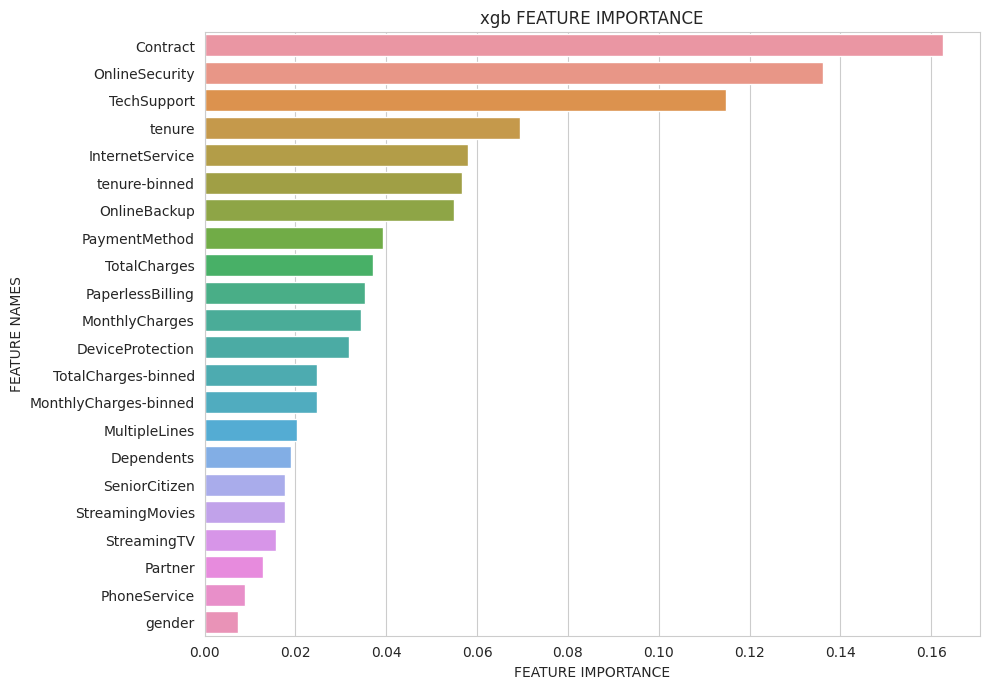

In [ ]:
%%time
fold_num = 10


xgb_params = {'colsample_bytree': 0.2645340949128848,
 'eval_metric': 'auc',
 'gamma': 0,
 'learning_rate': 0.001851851953410451,
 'max_depth': 3,
 'n_estimators': 6000,
 'random_state': SEED,
 'reg_lambda': 0.1,
 'subsample': 0.6905005604726816,
 'use_label_encoder': False }


xgb = XGBClassifier(**xgb_params)

train_model(xgb, 'xgb', X, y, X_test, fold_num)



# optuna tune with xgboost+all featuer + standard scaler 200 trial min-max, 6000 estimators - score 0.8410150094293316

## Min-max scaler
# Train : Base Model - xgb - AUC score : mean ---> 0.8479836989787929, std ---> 0.01566122703346753
# Test  : Base Model - xgb - AUC score : 0.8468379446640315

## Robust scaler --- better score
# Train : Base Model - xgb - AUC score : mean ---> 0.8479885554105582, std ---> 0.015660468150610223
# Test  : Base Model - xgb - AUC score : 0.8468431114211165

<a id='10.3.2'></a>
### 10.3.2 Optuna Tuning

In [ ]:
%%time
def objective(trial):
    train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=int(SEED), shuffle=True, stratify=y)

    params  = {
          'n_estimators': trial.suggest_categorical('n_estimators',[10000]),  
          'learning_rate': trial.suggest_float('learning_rate',1e-3,5e-1,log=True),
          'max_depth': trial.suggest_int('max_depth',3,12),
          'colsample_bytree': trial.suggest_float('colsample_bytree',0.2,0.99,log=True),
          'subsample': trial.suggest_float('subsample',0.2,0.99,log=True),
          'eval_metric': trial.suggest_categorical('eval_metric',['auc']),
          'use_label_encoder':trial.suggest_categorical('use_label_encoder',[False]),
          'gamma': trial.suggest_categorical('gamma',[0, 0.25, 0.5, 1.0]),
          'reg_lambda': trial.suggest_categorical('reg_lambda',[0.1, 1.0, 5.0, 10.0, 50.0, 100.0]),
          # 'tree_method': trial.suggest_categorical('tree_method',['gpu_hist']),
          # 'gpu_id': trial.suggest_categorical('gpu_id',[0]),
          # 'predictor' : trial.suggest_categorical('predictor',['gpu_predictor']),
          'random_state': trial.suggest_categorical('random_state',[SEED])
         }

    # learning
    model = XGBClassifier(**params)        
    model.fit(train_x, train_y, verbose=1000)
    val_preds = model.predict_proba(test_x)[:,1]
    auc = roc_auc_score(test_y, val_preds) # AUROC requires probabilities of the predictions
    print("AUC Score : ",auc)
    
    return auc

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.34 µs


In [ ]:
%%time
n_trials = int(200)
study = optuna.create_study(direction = "maximize", sampler = optuna.samplers.TPESampler(seed=int(SEED)))
study.optimize(objective, n_trials = n_trials, n_jobs = multiprocessing.cpu_count())

printmd('**BEST TRIAL**')
print("Best Score: ", study.best_value)
printmd('**XGBoost Tuned Hyperparameters**')
pprint.pprint(study.best_trial.params)

[I 2021-10-24 13:50:21,596] A new study created in memory with name: no-name-36bd3cd8-1765-4465-a1e0-58d17d64157c
[I 2021-10-24 13:52:27,011] Trial 0 finished with value: 0.8126081789764654 and parameters: {'n_estimators': 10000, 'learning_rate': 0.02470760161241011, 'max_depth': 7, 'colsample_bytree': 0.7790362707325964, 'subsample': 0.5605584353438441, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.25, 'reg_lambda': 50.0, 'random_state': 42}. Best is trial 0 with value: 0.8126081789764654.


AUC Score :  0.8126081789764654


[I 2021-10-24 13:52:48,941] Trial 1 finished with value: 0.8346469813221732 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0017169465137645366, 'max_depth': 10, 'colsample_bytree': 0.6869096108483479, 'subsample': 0.7238478265424186, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 50.0, 'random_state': 42}. Best is trial 1 with value: 0.8346469813221732.


AUC Score :  0.8346469813221732


[I 2021-10-24 13:53:09,243] Trial 2 finished with value: 0.8399015732775323 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0012743152589831893, 'max_depth': 4, 'colsample_bytree': 0.25901975359494767, 'subsample': 0.46368261212551953, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.25, 'reg_lambda': 10.0, 'random_state': 42}. Best is trial 2 with value: 0.8399015732775323.


AUC Score :  0.8399015732775323


[I 2021-10-24 13:53:37,257] Trial 3 finished with value: 0.831712263297941 and parameters: {'n_estimators': 10000, 'learning_rate': 0.13470495296817314, 'max_depth': 7, 'colsample_bytree': 0.29519424678198447, 'subsample': 0.2975180920540111, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 1.0, 'reg_lambda': 100.0, 'random_state': 42}. Best is trial 2 with value: 0.8399015732775323.


AUC Score :  0.831712263297941


[I 2021-10-24 13:54:42,874] Trial 5 finished with value: 0.8051034643106253 and parameters: {'n_estimators': 10000, 'learning_rate': 0.31088424070520304, 'max_depth': 11, 'colsample_bytree': 0.44974051983059693, 'subsample': 0.32481698587876073, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.25, 'reg_lambda': 100.0, 'random_state': 42}. Best is trial 2 with value: 0.8399015732775323.


AUC Score :  0.8051034643106253


[I 2021-10-24 13:55:10,107] Trial 4 finished with value: 0.8195523004985921 and parameters: {'n_estimators': 10000, 'learning_rate': 0.002173832307003593, 'max_depth': 9, 'colsample_bytree': 0.5438150413539975, 'subsample': 0.7098073513874624, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.25, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 2 with value: 0.8399015732775323.


AUC Score :  0.8195523004985921


[I 2021-10-24 13:55:41,281] Trial 6 finished with value: 0.8389224728099408 and parameters: {'n_estimators': 10000, 'learning_rate': 0.003151597571618429, 'max_depth': 10, 'colsample_bytree': 0.3709465775041236, 'subsample': 0.2843011024336496, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.25, 'reg_lambda': 100.0, 'random_state': 42}. Best is trial 2 with value: 0.8399015732775323.


AUC Score :  0.8389224728099408


[I 2021-10-24 13:56:42,781] Trial 8 finished with value: 0.8351791573019195 and parameters: {'n_estimators': 10000, 'learning_rate': 0.009592894884809616, 'max_depth': 5, 'colsample_bytree': 0.4433507473048557, 'subsample': 0.5029471889137838, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.25, 'reg_lambda': 100.0, 'random_state': 42}. Best is trial 2 with value: 0.8399015732775323.


AUC Score :  0.8351791573019195


[I 2021-10-24 13:56:59,516] Trial 7 finished with value: 0.7990273579787646 and parameters: {'n_estimators': 10000, 'learning_rate': 0.11491709284440896, 'max_depth': 8, 'colsample_bytree': 0.8394981813273342, 'subsample': 0.3698152364616438, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.25, 'reg_lambda': 50.0, 'random_state': 42}. Best is trial 2 with value: 0.8399015732775323.


AUC Score :  0.7990273579787646


[I 2021-10-24 13:57:36,614] Trial 9 finished with value: 0.7858857113332817 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1350594686938555, 'max_depth': 6, 'colsample_bytree': 0.3779461011589396, 'subsample': 0.2360496684930856, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 10.0, 'random_state': 42}. Best is trial 2 with value: 0.8399015732775323.


AUC Score :  0.7858857113332817


[I 2021-10-24 13:58:03,834] Trial 10 finished with value: 0.8071339998449975 and parameters: {'n_estimators': 10000, 'learning_rate': 0.14394655606674486, 'max_depth': 11, 'colsample_bytree': 0.4546448590443928, 'subsample': 0.26097500507657145, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 100.0, 'random_state': 42}. Best is trial 2 with value: 0.8399015732775323.


AUC Score :  0.8071339998449975


[I 2021-10-24 13:58:06,450] Trial 11 finished with value: 0.830645327959906 and parameters: {'n_estimators': 10000, 'learning_rate': 0.010749753070661928, 'max_depth': 3, 'colsample_bytree': 0.21918252831996862, 'subsample': 0.9523580675463534, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 10.0, 'random_state': 42}. Best is trial 2 with value: 0.8399015732775323.


AUC Score :  0.830645327959906


[I 2021-10-24 13:58:32,550] Trial 12 finished with value: 0.8387855537471907 and parameters: {'n_estimators': 10000, 'learning_rate': 0.004548056067014306, 'max_depth': 3, 'colsample_bytree': 0.20028068336747912, 'subsample': 0.20004878734781986, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 1.0, 'reg_lambda': 10.0, 'random_state': 42}. Best is trial 2 with value: 0.8399015732775323.


AUC Score :  0.8387855537471907


[I 2021-10-24 13:58:40,440] Trial 13 finished with value: 0.8401134103180139 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0010065541172328846, 'max_depth': 3, 'colsample_bytree': 0.2613170631494059, 'subsample': 0.4068589817197239, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8401134103180139


[I 2021-10-24 13:59:21,541] Trial 15 finished with value: 0.8399377405771267 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0010092385223676198, 'max_depth': 4, 'colsample_bytree': 0.2701478653935061, 'subsample': 0.39968374410214563, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8399377405771267


[I 2021-10-24 13:59:58,497] Trial 14 finished with value: 0.83468573200031 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0011700339766532422, 'max_depth': 12, 'colsample_bytree': 0.287257214277465, 'subsample': 0.39983377932500364, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.83468573200031


[I 2021-10-24 14:00:14,215] Trial 16 finished with value: 0.8239853780774498 and parameters: {'n_estimators': 10000, 'learning_rate': 0.006192842202679678, 'max_depth': 5, 'colsample_bytree': 0.2881365260208714, 'subsample': 0.38808705896560536, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8239853780774498


[I 2021-10-24 14:00:49,564] Trial 17 finished with value: 0.8245253041928233 and parameters: {'n_estimators': 10000, 'learning_rate': 0.00675397857118266, 'max_depth': 5, 'colsample_bytree': 0.25140228811162724, 'subsample': 0.6182415427084479, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8245253041928233


[I 2021-10-24 14:00:56,139] Trial 18 finished with value: 0.8145457128833089 and parameters: {'n_estimators': 10000, 'learning_rate': 0.016924047925228773, 'max_depth': 4, 'colsample_bytree': 0.24263996583188574, 'subsample': 0.5986526652091159, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 1.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8145457128833089


[I 2021-10-24 14:01:25,787] Trial 19 finished with value: 0.8165659149035109 and parameters: {'n_estimators': 10000, 'learning_rate': 0.021099358211085398, 'max_depth': 3, 'colsample_bytree': 0.3295557107739611, 'subsample': 0.3460073202464832, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 1.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8165659149035109


[I 2021-10-24 14:01:32,290] Trial 20 finished with value: 0.8165633315249683 and parameters: {'n_estimators': 10000, 'learning_rate': 0.029417389411017125, 'max_depth': 3, 'colsample_bytree': 0.34695301789388927, 'subsample': 0.3382786494603638, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8165633315249683


[I 2021-10-24 14:02:13,981] Trial 22 finished with value: 0.8400643261257073 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0010751728238617257, 'max_depth': 4, 'colsample_bytree': 0.23731458224347468, 'subsample': 0.4494460434932806, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8400643261257073


[I 2021-10-24 14:02:23,697] Trial 21 finished with value: 0.7994277816528454 and parameters: {'n_estimators': 10000, 'learning_rate': 0.048914073585007926, 'max_depth': 4, 'colsample_bytree': 0.5585804619605853, 'subsample': 0.43872217009035147, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.7994277816528454


[I 2021-10-24 14:02:54,000] Trial 23 finished with value: 0.8370469399881164 and parameters: {'n_estimators': 10000, 'learning_rate': 0.002862072531399843, 'max_depth': 4, 'colsample_bytree': 0.2190993599435766, 'subsample': 0.44893363601472597, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8370469399881164


[I 2021-10-24 14:03:15,296] Trial 24 finished with value: 0.8389483065953655 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0010321743596494281, 'max_depth': 6, 'colsample_bytree': 0.22017618626909238, 'subsample': 0.5077936273354755, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8389483065953655


[I 2021-10-24 14:03:45,463] Trial 25 finished with value: 0.8383102120953785 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0012529727920619074, 'max_depth': 6, 'colsample_bytree': 0.2001126901242007, 'subsample': 0.49726892611786155, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8383102120953785


[I 2021-10-24 14:04:18,157] Trial 26 finished with value: 0.8311516701542276 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0019113865626136568, 'max_depth': 6, 'colsample_bytree': 0.3061289296069677, 'subsample': 0.41099600207748876, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 1.0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8311516701542276


[I 2021-10-24 14:04:37,901] Trial 27 finished with value: 0.835700999767496 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0022198818294553824, 'max_depth': 5, 'colsample_bytree': 0.30772179589526283, 'subsample': 0.4104638838089537, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 1.0, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.835700999767496


[I 2021-10-24 14:05:04,435] Trial 28 finished with value: 0.8328618667493348 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0037547514994588664, 'max_depth': 5, 'colsample_bytree': 0.2603024281617433, 'subsample': 0.30402651946312403, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8328618667493348


[I 2021-10-24 14:05:19,520] Trial 29 finished with value: 0.8343292257614509 and parameters: {'n_estimators': 10000, 'learning_rate': 0.003715901746168607, 'max_depth': 4, 'colsample_bytree': 0.26317724506413415, 'subsample': 0.689935083340748, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8343292257614509


[I 2021-10-24 14:06:09,376] Trial 30 finished with value: 0.8347606499780411 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0016591913266028279, 'max_depth': 7, 'colsample_bytree': 0.23929474608958834, 'subsample': 0.5732213623948875, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8347606499780411


[I 2021-10-24 14:06:26,882] Trial 31 finished with value: 0.8319396006096774 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0015540594754345069, 'max_depth': 7, 'colsample_bytree': 0.23759029714408236, 'subsample': 0.5481544501309256, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8319396006096774


[I 2021-10-24 14:06:53,549] Trial 32 finished with value: 0.8397646542147821 and parameters: {'n_estimators': 10000, 'learning_rate': 0.001100792366325553, 'max_depth': 4, 'colsample_bytree': 0.27894534053458736, 'subsample': 0.4634672182022634, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.25, 'reg_lambda': 10.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8397646542147821


[I 2021-10-24 14:07:08,813] Trial 33 finished with value: 0.8398189051641737 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0010129405831972586, 'max_depth': 4, 'colsample_bytree': 0.27066702658419073, 'subsample': 0.4609002700804631, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.25, 'reg_lambda': 10.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8398189051641737


[I 2021-10-24 14:07:29,914] Trial 34 finished with value: 0.8386951354982044 and parameters: {'n_estimators': 10000, 'learning_rate': 0.001007373152897477, 'max_depth': 3, 'colsample_bytree': 0.33272902349781636, 'subsample': 0.3740141782601384, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 50.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8386951354982044


[I 2021-10-24 14:07:45,348] Trial 35 finished with value: 0.8384600480508407 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0024266314303397836, 'max_depth': 3, 'colsample_bytree': 0.33419147976259567, 'subsample': 0.3651463009871807, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 1.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8384600480508407


[I 2021-10-24 14:08:16,111] Trial 36 finished with value: 0.8387416363119687 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0021882354443010428, 'max_depth': 3, 'colsample_bytree': 0.6416781419352553, 'subsample': 0.8343904414718002, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.25, 'reg_lambda': 1.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8387416363119687


[I 2021-10-24 14:08:57,530] Trial 38 finished with value: 0.8391472267431346 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0016020390032751243, 'max_depth': 4, 'colsample_bytree': 0.2381399742453418, 'subsample': 0.5295464088322015, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.25, 'reg_lambda': 50.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8391472267431346


[I 2021-10-24 14:09:29,835] Trial 37 finished with value: 0.8334922111136944 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0016119840722304223, 'max_depth': 8, 'colsample_bytree': 0.6681554884838805, 'subsample': 0.32160084968947683, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.25, 'reg_lambda': 10.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8334922111136944


[I 2021-10-24 14:10:27,638] Trial 39 finished with value: 0.8269769304296157 and parameters: {'n_estimators': 10000, 'learning_rate': 0.004873110017822768, 'max_depth': 9, 'colsample_bytree': 0.3919895661275172, 'subsample': 0.42249270638967346, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 1.0, 'reg_lambda': 10.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8269769304296157


[I 2021-10-24 14:10:29,016] Trial 40 finished with value: 0.8212702472293265 and parameters: {'n_estimators': 10000, 'learning_rate': 0.005493064233632725, 'max_depth': 5, 'colsample_bytree': 0.4009895963244041, 'subsample': 0.4284159130415997, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 1.0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8212702472293265


[I 2021-10-24 14:11:10,973] Trial 42 finished with value: 0.8397000697512206 and parameters: {'n_estimators': 10000, 'learning_rate': 0.001350743107670501, 'max_depth': 4, 'colsample_bytree': 0.271440342422725, 'subsample': 0.46633879713715554, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.25, 'reg_lambda': 10.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8397000697512206


[I 2021-10-24 14:11:23,283] Trial 41 finished with value: 0.8249024774600222 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0030942163050231937, 'max_depth': 5, 'colsample_bytree': 0.4179960425600036, 'subsample': 0.27171679009629807, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8249024774600222


[I 2021-10-24 14:12:08,218] Trial 44 finished with value: 0.8384729649435532 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0019786864104493294, 'max_depth': 4, 'colsample_bytree': 0.3004277680545054, 'subsample': 0.47717121464299206, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.25, 'reg_lambda': 10.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8384729649435532


[I 2021-10-24 14:12:30,762] Trial 43 finished with value: 0.8350138210752022 and parameters: {'n_estimators': 10000, 'learning_rate': 0.002527805688456557, 'max_depth': 4, 'colsample_bytree': 0.9798023557875543, 'subsample': 0.4795630371046486, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.25, 'reg_lambda': 10.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8350138210752022


[I 2021-10-24 14:12:40,333] Trial 45 finished with value: 0.7834495853677439 and parameters: {'n_estimators': 10000, 'learning_rate': 0.4656789880680826, 'max_depth': 3, 'colsample_bytree': 0.2218213344068618, 'subsample': 0.6552918637273629, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.25, 'reg_lambda': 10.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.7834495853677439


[I 2021-10-24 14:13:02,714] Trial 46 finished with value: 0.837907205042755 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0010022557752311125, 'max_depth': 3, 'colsample_bytree': 0.21977914050655264, 'subsample': 0.6504344809664655, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.25, 'reg_lambda': 100.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.837907205042755


[I 2021-10-24 14:13:20,129] Trial 47 finished with value: 0.8377173267198842 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0010055001962457357, 'max_depth': 5, 'colsample_bytree': 0.27137370077850603, 'subsample': 0.36547176229863104, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.25, 'reg_lambda': 100.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8377173267198842


[I 2021-10-24 14:13:49,110] Trial 48 finished with value: 0.8390748921439458 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0013949047979989794, 'max_depth': 6, 'colsample_bytree': 0.26453102669943, 'subsample': 0.36373134960210063, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 50.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8390748921439458


[I 2021-10-24 14:14:36,517] Trial 49 finished with value: 0.8097845462295589 and parameters: {'n_estimators': 10000, 'learning_rate': 0.008907778441990146, 'max_depth': 6, 'colsample_bytree': 0.48278146223197455, 'subsample': 0.39264157616401896, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8097845462295589


[I 2021-10-24 14:14:36,871] Trial 50 finished with value: 0.8390723087654033 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0013642810508409447, 'max_depth': 4, 'colsample_bytree': 0.35749482772857627, 'subsample': 0.5523785126063282, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8390723087654033


[I 2021-10-24 14:15:21,125] Trial 52 finished with value: 0.8394753158180269 and parameters: {'n_estimators': 10000, 'learning_rate': 0.001290864795285296, 'max_depth': 4, 'colsample_bytree': 0.2842492439951043, 'subsample': 0.45693241312485405, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.25, 'reg_lambda': 10.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8394753158180269


[I 2021-10-24 14:15:23,794] Trial 51 finished with value: 0.8054883877134515 and parameters: {'n_estimators': 10000, 'learning_rate': 0.046092870911470116, 'max_depth': 4, 'colsample_bytree': 0.3607830379937488, 'subsample': 0.5181934255804553, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 10.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8054883877134515


[I 2021-10-24 14:16:01,611] Trial 54 finished with value: 0.8392789790488 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0020891812276237817, 'max_depth': 3, 'colsample_bytree': 0.31997663576408464, 'subsample': 0.4403339288628557, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.25, 'reg_lambda': 10.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8392789790488


[I 2021-10-24 14:16:15,599] Trial 53 finished with value: 0.836891937275569 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0018429644817048118, 'max_depth': 5, 'colsample_bytree': 0.3159076004809811, 'subsample': 0.5310562466833715, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.25, 'reg_lambda': 10.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.836891937275569


[I 2021-10-24 14:16:48,231] Trial 55 finished with value: 0.7878929964607715 and parameters: {'n_estimators': 10000, 'learning_rate': 0.18958488852269506, 'max_depth': 5, 'colsample_bytree': 0.2523275699779437, 'subsample': 0.481261339727407, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.25, 'reg_lambda': 10.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.7878929964607715


[I 2021-10-24 14:16:52,040] Trial 56 finished with value: 0.8397982381358341 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0012295849397187665, 'max_depth': 3, 'colsample_bytree': 0.27728967812355876, 'subsample': 0.48855094647158104, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.25, 'reg_lambda': 10.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.8397982381358341


[I 2021-10-24 14:17:22,922] Trial 57 finished with value: 0.839927407062957 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0012676459406561183, 'max_depth': 3, 'colsample_bytree': 0.2822179563100431, 'subsample': 0.33586319643377505, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.25, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 13 with value: 0.8401134103180139.


AUC Score :  0.839927407062957


[I 2021-10-24 14:17:25,347] Trial 58 finished with value: 0.8401418274819807 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0012804284888387398, 'max_depth': 3, 'colsample_bytree': 0.22644953821007835, 'subsample': 0.5913635699677533, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 58 with value: 0.8401418274819807.


AUC Score :  0.8401418274819807


[I 2021-10-24 14:17:54,214] Trial 59 finished with value: 0.8386408845488129 and parameters: {'n_estimators': 10000, 'learning_rate': 0.003580792564381694, 'max_depth': 3, 'colsample_bytree': 0.20991384510140923, 'subsample': 0.33297758481812345, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 58 with value: 0.8401418274819807.


AUC Score :  0.8386408845488129


[I 2021-10-24 14:17:56,739] Trial 60 finished with value: 0.8390335580872665 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0032620927447934503, 'max_depth': 3, 'colsample_bytree': 0.20514918567354745, 'subsample': 0.3388363586014892, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 58 with value: 0.8401418274819807.


AUC Score :  0.8390335580872665


[I 2021-10-24 14:18:30,232] Trial 62 finished with value: 0.8400074917977731 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0016491094148875895, 'max_depth': 3, 'colsample_bytree': 0.250699122684082, 'subsample': 0.772392660105723, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 58 with value: 0.8401418274819807.


AUC Score :  0.8400074917977731


[I 2021-10-24 14:19:03,554] Trial 61 finished with value: 0.8303714898344055 and parameters: {'n_estimators': 10000, 'learning_rate': 0.002681546282464082, 'max_depth': 12, 'colsample_bytree': 0.23186361482897247, 'subsample': 0.31524547559107563, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 58 with value: 0.8401418274819807.
[I 2021-10-24 14:19:03,681] Trial 63 finished with value: 0.8389250561884831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0026509292790344086, 'max_depth': 3, 'colsample_bytree': 0.22833604396306453, 'subsample': 0.7922862918516415, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 58 with value: 0.8401418274819807.


AUC Score :  0.8303714898344055
AUC Score :  0.8389250561884831


[I 2021-10-24 14:19:35,073] Trial 65 finished with value: 0.8399080317238885 and parameters: {'n_estimators': 10000, 'learning_rate': 0.001727988009974887, 'max_depth': 3, 'colsample_bytree': 0.25586703034071506, 'subsample': 0.9745248042568908, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 58 with value: 0.8401418274819807.


AUC Score :  0.8399080317238885


[I 2021-10-24 14:19:37,592] Trial 64 finished with value: 0.8403097470872407 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0015796735809301453, 'max_depth': 3, 'colsample_bytree': 0.2490813022461203, 'subsample': 0.7047426700982062, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 64 with value: 0.8403097470872407.


AUC Score :  0.8403097470872407


[I 2021-10-24 14:20:06,813] Trial 66 finished with value: 0.8399635743625512 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0019100255122414223, 'max_depth': 3, 'colsample_bytree': 0.24722321877088207, 'subsample': 0.9164865783705771, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 64 with value: 0.8403097470872407.


AUC Score :  0.8399635743625512


[I 2021-10-24 14:20:10,891] Trial 67 finished with value: 0.840289080058901 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0014696912816615831, 'max_depth': 3, 'colsample_bytree': 0.24641970546945072, 'subsample': 0.7681710748298205, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 64 with value: 0.8403097470872407.


AUC Score :  0.840289080058901


[I 2021-10-24 14:20:39,167] Trial 68 finished with value: 0.8401314939678111 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0015520535442192858, 'max_depth': 3, 'colsample_bytree': 0.25055964496658306, 'subsample': 0.8748001537529951, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 64 with value: 0.8403097470872407.


AUC Score :  0.8401314939678111


[I 2021-10-24 14:20:43,106] Trial 69 finished with value: 0.8402580795163914 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0015379824553261113, 'max_depth': 3, 'colsample_bytree': 0.2433410214698944, 'subsample': 0.8792153952161748, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 64 with value: 0.8403097470872407.


AUC Score :  0.8402580795163914


[I 2021-10-24 14:21:12,687] Trial 70 finished with value: 0.8402244955953395 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0015118641365344386, 'max_depth': 3, 'colsample_bytree': 0.24808874380484203, 'subsample': 0.7526936484189243, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 64 with value: 0.8403097470872407.


AUC Score :  0.8402244955953395


[I 2021-10-24 14:21:13,486] Trial 71 finished with value: 0.8371270247229327 and parameters: {'n_estimators': 10000, 'learning_rate': 0.00421749712498738, 'max_depth': 3, 'colsample_bytree': 0.21250818867944324, 'subsample': 0.883943024953143, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 64 with value: 0.8403097470872407.


AUC Score :  0.8371270247229327


[I 2021-10-24 14:21:45,255] Trial 72 finished with value: 0.8404505412178047 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0014919659774568026, 'max_depth': 3, 'colsample_bytree': 0.22898723598100512, 'subsample': 0.8491763398046571, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8404505412178047


[I 2021-10-24 14:21:47,034] Trial 73 finished with value: 0.8402503293807642 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0014629306833434674, 'max_depth': 3, 'colsample_bytree': 0.2275083173564275, 'subsample': 0.7380166974215093, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8402503293807642


[I 2021-10-24 14:22:20,250] Trial 75 finished with value: 0.8393745640548709 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0023194915657184217, 'max_depth': 3, 'colsample_bytree': 0.22899008870277568, 'subsample': 0.7549519524730942, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8393745640548709


[I 2021-10-24 14:22:52,968] Trial 76 finished with value: 0.8402903717481722 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0014557415606682477, 'max_depth': 3, 'colsample_bytree': 0.23069732563427378, 'subsample': 0.836344720026956, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8402903717481722


[I 2021-10-24 14:23:03,523] Trial 74 finished with value: 0.8334767108424398 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0014206193806697803, 'max_depth': 10, 'colsample_bytree': 0.22796485382004447, 'subsample': 0.7634120254453821, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8334767108424398


[I 2021-10-24 14:23:31,272] Trial 77 finished with value: 0.8384032137229069 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0021482475686433957, 'max_depth': 4, 'colsample_bytree': 0.2138063118988809, 'subsample': 0.7103026599504665, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8384032137229069


[I 2021-10-24 14:23:41,643] Trial 78 finished with value: 0.8368945206541114 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0029034932286518167, 'max_depth': 4, 'colsample_bytree': 0.2004861941676366, 'subsample': 0.7117592211370317, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8368945206541114


[I 2021-10-24 14:24:02,350] Trial 79 finished with value: 0.8399351571985842 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0018670057618370298, 'max_depth': 3, 'colsample_bytree': 0.20684689121723765, 'subsample': 0.8059723888959522, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8399351571985842


[I 2021-10-24 14:24:46,329] Trial 80 finished with value: 0.8075370068976208 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0691180689674887, 'max_depth': 9, 'colsample_bytree': 0.24079195626866812, 'subsample': 0.8132813683163118, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8075370068976208


[I 2021-10-24 14:25:18,702] Trial 82 finished with value: 0.8404169572967528 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0015020263899528975, 'max_depth': 3, 'colsample_bytree': 0.24491058039931057, 'subsample': 0.8537940962147562, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8404169572967528


[I 2021-10-24 14:25:20,955] Trial 81 finished with value: 0.8127760985817253 and parameters: {'n_estimators': 10000, 'learning_rate': 0.017094876102064293, 'max_depth': 9, 'colsample_bytree': 0.2928272117282192, 'subsample': 0.8414585972775411, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8127760985817253


[I 2021-10-24 14:25:52,544] Trial 83 finished with value: 0.8403304141155804 and parameters: {'n_estimators': 10000, 'learning_rate': 0.00118280397197222, 'max_depth': 3, 'colsample_bytree': 0.2942564934312027, 'subsample': 0.8642892128130237, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8403304141155804


[I 2021-10-24 14:25:53,344] Trial 84 finished with value: 0.8402735797876463 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0012106288943603953, 'max_depth': 3, 'colsample_bytree': 0.22342017500023073, 'subsample': 0.6721213575879831, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8402735797876463


[I 2021-10-24 14:26:24,147] Trial 85 finished with value: 0.8401909116742876 and parameters: {'n_estimators': 10000, 'learning_rate': 0.001538838045224944, 'max_depth': 3, 'colsample_bytree': 0.2361076068898192, 'subsample': 0.9282261798534539, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 1.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8401909116742876


[I 2021-10-24 14:26:25,108] Trial 86 finished with value: 0.8403769149293445 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0011510829327391109, 'max_depth': 3, 'colsample_bytree': 0.23751971556259793, 'subsample': 0.9320108298516712, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 1.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8403769149293445


[I 2021-10-24 14:27:01,843] Trial 88 finished with value: 0.8399868247694335 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0011561155614181833, 'max_depth': 4, 'colsample_bytree': 0.21757965603243487, 'subsample': 0.8643409812495226, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 1.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8399868247694335


[I 2021-10-24 14:27:30,801] Trial 87 finished with value: 0.8359929215427936 and parameters: {'n_estimators': 10000, 'learning_rate': 0.001151441008118211, 'max_depth': 11, 'colsample_bytree': 0.21712592142069023, 'subsample': 0.6793611406856221, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8359929215427936


[I 2021-10-24 14:27:38,801] Trial 89 finished with value: 0.83813325066522 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0023144434208655883, 'max_depth': 4, 'colsample_bytree': 0.2573373838694383, 'subsample': 0.9837810609998375, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 1.0, 'reg_lambda': 1.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.83813325066522


[I 2021-10-24 14:28:08,543] Trial 90 finished with value: 0.8377780361156322 and parameters: {'n_estimators': 10000, 'learning_rate': 0.002377521299694536, 'max_depth': 4, 'colsample_bytree': 0.26605665057224975, 'subsample': 0.9196818554214794, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 1.0, 'reg_lambda': 1.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8377780361156322


[I 2021-10-24 14:28:16,865] Trial 91 finished with value: 0.8384652148079259 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0018192956370366416, 'max_depth': 4, 'colsample_bytree': 0.2621102731200211, 'subsample': 0.9179909328120649, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 1.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8384652148079259


[I 2021-10-24 14:28:40,759] Trial 92 finished with value: 0.83875326151541 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0019225023282233421, 'max_depth': 3, 'colsample_bytree': 0.24163340551505652, 'subsample': 0.8448132188672723, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 100.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.83875326151541


[I 2021-10-24 14:28:48,285] Trial 93 finished with value: 0.8384522979152135 and parameters: {'n_estimators': 10000, 'learning_rate': 0.001173502115815899, 'max_depth': 3, 'colsample_bytree': 0.22382206958106954, 'subsample': 0.7322684224305801, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 100.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8384522979152135


[I 2021-10-24 14:29:14,387] Trial 94 finished with value: 0.8391188095791676 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0011548065783863065, 'max_depth': 3, 'colsample_bytree': 0.22786230768456137, 'subsample': 0.732842998750744, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 50.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8391188095791676


[I 2021-10-24 14:29:21,369] Trial 95 finished with value: 0.8391058926864553 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0014159355372585416, 'max_depth': 3, 'colsample_bytree': 0.23392588395716868, 'subsample': 0.8013331609351477, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 50.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8391058926864553


[I 2021-10-24 14:29:49,035] Trial 96 finished with value: 0.8403717481722596 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0014103395862476115, 'max_depth': 3, 'colsample_bytree': 0.24325053005867708, 'subsample': 0.6256567072064152, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8403717481722596


[I 2021-10-24 14:29:55,973] Trial 97 finished with value: 0.8403639980366323 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0014702765895086263, 'max_depth': 3, 'colsample_bytree': 0.2439282711465324, 'subsample': 0.6270886983138324, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8403639980366323


[I 2021-10-24 14:30:23,223] Trial 98 finished with value: 0.839927407062957 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0016208240858106408, 'max_depth': 3, 'colsample_bytree': 0.24144204872134842, 'subsample': 0.6821980423455256, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.839927407062957


[I 2021-10-24 14:31:07,874] Trial 100 finished with value: 0.8371244413443902 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0020581596639348194, 'max_depth': 4, 'colsample_bytree': 0.2933524015411828, 'subsample': 0.6374886972931019, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8371244413443902


[I 2021-10-24 14:31:17,793] Trial 99 finished with value: 0.8281833682089437 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0017321952958803564, 'max_depth': 8, 'colsample_bytree': 0.2785903575268043, 'subsample': 0.6022863080113982, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8281833682089437


[I 2021-10-24 14:31:43,641] Trial 101 finished with value: 0.8403898318220568 and parameters: {'n_estimators': 10000, 'learning_rate': 0.001266395593230898, 'max_depth': 3, 'colsample_bytree': 0.27577777478926785, 'subsample': 0.6329862946474644, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8403898318220568


[I 2021-10-24 14:31:50,584] Trial 102 finished with value: 0.8404156656074814 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0012616182909385954, 'max_depth': 3, 'colsample_bytree': 0.24521766202856615, 'subsample': 0.8251165342258074, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8404156656074814


[I 2021-10-24 14:32:20,072] Trial 103 finished with value: 0.8403149138443257 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0013021594168258805, 'max_depth': 3, 'colsample_bytree': 0.27374099350436193, 'subsample': 0.6307121710751542, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8403149138443257


[I 2021-10-24 14:32:25,308] Trial 104 finished with value: 0.8403381642512076 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0013453097409106632, 'max_depth': 3, 'colsample_bytree': 0.2581351886709776, 'subsample': 0.631650318271843, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8403381642512076


[I 2021-10-24 14:32:56,658] Trial 105 finished with value: 0.8403614146580899 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0013193064829155991, 'max_depth': 3, 'colsample_bytree': 0.30469247592265186, 'subsample': 0.6266991719895862, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8403614146580899


[I 2021-10-24 14:33:10,208] Trial 106 finished with value: 0.8398602392208531 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0010837950476990327, 'max_depth': 4, 'colsample_bytree': 0.2731531768477126, 'subsample': 0.5794094834753026, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8398602392208531


[I 2021-10-24 14:33:41,634] Trial 107 finished with value: 0.8398550724637682 and parameters: {'n_estimators': 10000, 'learning_rate': 0.001068001192793717, 'max_depth': 4, 'colsample_bytree': 0.3080132874391469, 'subsample': 0.575929900358834, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8398550724637682


[I 2021-10-24 14:33:46,779] Trial 108 finished with value: 0.8401934950528301 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0012714305947145535, 'max_depth': 3, 'colsample_bytree': 0.3068692275199973, 'subsample': 0.6113386235942729, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8401934950528301


[I 2021-10-24 14:34:17,720] Trial 109 finished with value: 0.8403071637086981 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0012933651288887296, 'max_depth': 3, 'colsample_bytree': 0.28826704019766264, 'subsample': 0.6618033352927222, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8403071637086981


[I 2021-10-24 14:34:21,563] Trial 110 finished with value: 0.840227078973882 and parameters: {'n_estimators': 10000, 'learning_rate': 0.001287931046935088, 'max_depth': 3, 'colsample_bytree': 0.26191015682014773, 'subsample': 0.6239530388995057, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.840227078973882


[I 2021-10-24 14:34:52,181] Trial 111 finished with value: 0.8316760959983468 and parameters: {'n_estimators': 10000, 'learning_rate': 0.00773352433083012, 'max_depth': 3, 'colsample_bytree': 0.26214946130051364, 'subsample': 0.6436728650664915, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8316760959983468


[I 2021-10-24 14:34:56,344] Trial 112 finished with value: 0.8398783228706503 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0018192142068240323, 'max_depth': 3, 'colsample_bytree': 0.25531667866773355, 'subsample': 0.6329571947112445, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8398783228706503


[I 2021-10-24 14:35:24,111] Trial 113 finished with value: 0.8401198687643701 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0010017933065327518, 'max_depth': 3, 'colsample_bytree': 0.25376663228167656, 'subsample': 0.9523450137852993, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8401198687643701


[I 2021-10-24 14:35:35,011] Trial 114 finished with value: 0.8402813299232736 and parameters: {'n_estimators': 10000, 'learning_rate': 0.001000215104712285, 'max_depth': 3, 'colsample_bytree': 0.3417823457624904, 'subsample': 0.5446329767994885, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8402813299232736


[I 2021-10-24 14:36:00,649] Trial 115 finished with value: 0.8398886563848201 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0016892284700701983, 'max_depth': 3, 'colsample_bytree': 0.2985861914736965, 'subsample': 0.5491484727812765, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8398886563848201


[I 2021-10-24 14:36:18,800] Trial 116 finished with value: 0.8382766281743264 and parameters: {'n_estimators': 10000, 'learning_rate': 0.001702860038045859, 'max_depth': 4, 'colsample_bytree': 0.3179339965922958, 'subsample': 0.6965613076402537, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8382766281743264


[I 2021-10-24 14:36:36,298] Trial 117 finished with value: 0.8392479785062905 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0021388330902275747, 'max_depth': 3, 'colsample_bytree': 0.2755374043754407, 'subsample': 0.6906493500610382, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8392479785062905


[I 2021-10-24 14:37:03,252] Trial 118 finished with value: 0.839098142550828 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0021349468045084538, 'max_depth': 3, 'colsample_bytree': 0.7772482714079082, 'subsample': 0.22248722899189094, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.839098142550828


[I 2021-10-24 14:37:21,359] Trial 119 finished with value: 0.838268878038699 and parameters: {'n_estimators': 10000, 'learning_rate': 0.002615460530040765, 'max_depth': 3, 'colsample_bytree': 0.5054104095356085, 'subsample': 0.5937899697772754, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 1.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.838268878038699


[I 2021-10-24 14:37:48,117] Trial 120 finished with value: 0.8391291430933374 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0013692923206342314, 'max_depth': 4, 'colsample_bytree': 0.2837824612389928, 'subsample': 0.5951411743359564, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 1.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8391291430933374


[I 2021-10-24 14:38:05,953] Trial 121 finished with value: 0.8393332299981915 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0013383474764238534, 'max_depth': 4, 'colsample_bytree': 0.2855711536347345, 'subsample': 0.6167236142783837, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8393332299981915


[I 2021-10-24 14:38:24,259] Trial 122 finished with value: 0.8403924152005994 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0012948502515165998, 'max_depth': 3, 'colsample_bytree': 0.28662830565967756, 'subsample': 0.6601911111783682, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 72 with value: 0.8404505412178047.


AUC Score :  0.8403924152005994


[I 2021-10-24 14:38:40,317] Trial 123 finished with value: 0.8405241675062647 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0011802225478834418, 'max_depth': 3, 'colsample_bytree': 0.26798525818472124, 'subsample': 0.6659867161531995, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 123 with value: 0.8405241675062647.


AUC Score :  0.8405241675062647


[I 2021-10-24 14:38:58,700] Trial 124 finished with value: 0.8404699165568731 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0011529841514076524, 'max_depth': 3, 'colsample_bytree': 0.2702223022433815, 'subsample': 0.659161579356725, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 123 with value: 0.8405241675062647.


AUC Score :  0.8404699165568731


[I 2021-10-24 14:39:15,001] Trial 125 finished with value: 0.8405138339920949 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0011874671827213042, 'max_depth': 3, 'colsample_bytree': 0.2698245965937585, 'subsample': 0.6481523243198188, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 123 with value: 0.8405241675062647.


AUC Score :  0.8405138339920949


[I 2021-10-24 14:39:33,184] Trial 126 finished with value: 0.8403536645224625 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0011739740459648206, 'max_depth': 3, 'colsample_bytree': 0.2680404123458134, 'subsample': 0.664476662767867, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 123 with value: 0.8405241675062647.


AUC Score :  0.8403536645224625


[I 2021-10-24 14:39:49,655] Trial 127 finished with value: 0.8404802500710431 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0011198486935416626, 'max_depth': 3, 'colsample_bytree': 0.26575414698276584, 'subsample': 0.6500092161336946, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 123 with value: 0.8405241675062647.


AUC Score :  0.8404802500710431


[I 2021-10-24 14:40:07,670] Trial 128 finished with value: 0.8301415691441266 and parameters: {'n_estimators': 10000, 'learning_rate': 0.011922189059341093, 'max_depth': 3, 'colsample_bytree': 0.2662578614076732, 'subsample': 0.6572479690448625, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 1.0, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 123 with value: 0.8405241675062647.


AUC Score :  0.8301415691441266


[I 2021-10-24 14:40:24,624] Trial 129 finished with value: 0.8402864966803586 and parameters: {'n_estimators': 10000, 'learning_rate': 0.001062691168994502, 'max_depth': 3, 'colsample_bytree': 0.24918525570929825, 'subsample': 0.6493016714099957, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 1.0, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 123 with value: 0.8405241675062647.


AUC Score :  0.8402864966803586


[I 2021-10-24 14:40:41,453] Trial 130 finished with value: 0.8403575395902763 and parameters: {'n_estimators': 10000, 'learning_rate': 0.001115695408433918, 'max_depth': 3, 'colsample_bytree': 0.24450329557177028, 'subsample': 0.7863961465956044, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 123 with value: 0.8405241675062647.


AUC Score :  0.8403575395902763


[I 2021-10-24 14:40:59,531] Trial 131 finished with value: 0.8148247177658943 and parameters: {'n_estimators': 10000, 'learning_rate': 0.030652711628252675, 'max_depth': 3, 'colsample_bytree': 0.2353822128254931, 'subsample': 0.5762178588626596, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 123 with value: 0.8405241675062647.


AUC Score :  0.8148247177658943


[I 2021-10-24 14:41:16,434] Trial 132 finished with value: 0.8401237438321837 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0011346683488882106, 'max_depth': 3, 'colsample_bytree': 0.23513139639976996, 'subsample': 0.5684344208076028, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 123 with value: 0.8405241675062647.


AUC Score :  0.8401237438321837


[I 2021-10-24 14:41:32,971] Trial 133 finished with value: 0.8403472060761062 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0011278794355494934, 'max_depth': 3, 'colsample_bytree': 0.24297517101501664, 'subsample': 0.7790849632346192, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 123 with value: 0.8405241675062647.


AUC Score :  0.8403472060761062


[I 2021-10-24 14:41:49,689] Trial 134 finished with value: 0.8402813299232736 and parameters: {'n_estimators': 10000, 'learning_rate': 0.001456526658604213, 'max_depth': 3, 'colsample_bytree': 0.24479900023118933, 'subsample': 0.7834433018803575, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 123 with value: 0.8405241675062647.


AUC Score :  0.8402813299232736


[I 2021-10-24 14:42:15,039] Trial 135 finished with value: 0.840136660724896 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0014991167485407999, 'max_depth': 3, 'colsample_bytree': 0.5860656366322088, 'subsample': 0.8971194432799292, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 123 with value: 0.8405241675062647.


AUC Score :  0.840136660724896


[I 2021-10-24 14:42:23,612] Trial 136 finished with value: 0.8385918003565062 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0015859322137792365, 'max_depth': 3, 'colsample_bytree': 0.2798373897637616, 'subsample': 0.8926803164968383, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 100.0, 'random_state': 42}. Best is trial 123 with value: 0.8405241675062647.


AUC Score :  0.8385918003565062


[I 2021-10-24 14:42:53,843] Trial 137 finished with value: 0.838968973623705 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0017018946372668168, 'max_depth': 4, 'colsample_bytree': 0.2688397556211716, 'subsample': 0.8190201328606304, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 100.0, 'random_state': 42}. Best is trial 123 with value: 0.8405241675062647.


AUC Score :  0.838968973623705


[I 2021-10-24 14:43:02,821] Trial 138 finished with value: 0.839193727556899 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0019048859447569916, 'max_depth': 4, 'colsample_bytree': 0.25620060858392396, 'subsample': 0.8207570711233727, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 50.0, 'random_state': 42}. Best is trial 123 with value: 0.8405241675062647.


AUC Score :  0.839193727556899


[I 2021-10-24 14:43:27,738] Trial 139 finished with value: 0.8391420599860498 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0010035381292731156, 'max_depth': 3, 'colsample_bytree': 0.2550248311980641, 'subsample': 0.7305307302917187, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0.5, 'reg_lambda': 50.0, 'random_state': 42}. Best is trial 123 with value: 0.8405241675062647.


AUC Score :  0.8391420599860498


[I 2021-10-24 14:43:36,798] Trial 140 finished with value: 0.8405164173706373 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0012312975765435626, 'max_depth': 3, 'colsample_bytree': 0.2504834929085323, 'subsample': 0.7260023524207876, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 123 with value: 0.8405241675062647.


AUC Score :  0.8405164173706373


[I 2021-10-24 14:44:03,384] Trial 141 finished with value: 0.8403304141155804 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0012274405045343026, 'max_depth': 3, 'colsample_bytree': 0.30256936074277785, 'subsample': 0.710283524354417, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 123 with value: 0.8405241675062647.


AUC Score :  0.8403304141155804


[I 2021-10-24 14:44:10,999] Trial 142 finished with value: 0.8404931669637552 and parameters: {'n_estimators': 10000, 'learning_rate': 0.001217427837471627, 'max_depth': 3, 'colsample_bytree': 0.23978024800162484, 'subsample': 0.7045891525732358, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 123 with value: 0.8405241675062647.


AUC Score :  0.8404931669637552


[I 2021-10-24 14:44:37,737] Trial 143 finished with value: 0.8404492495285335 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0013983914870625291, 'max_depth': 3, 'colsample_bytree': 0.23790162224803763, 'subsample': 0.6767861803442323, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 123 with value: 0.8405241675062647.


AUC Score :  0.8404492495285335


[I 2021-10-24 14:44:45,095] Trial 144 finished with value: 0.8404673331783307 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0014213542990039224, 'max_depth': 3, 'colsample_bytree': 0.23648071575187682, 'subsample': 0.688128870335356, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 123 with value: 0.8405241675062647.


AUC Score :  0.8404673331783307


[I 2021-10-24 14:45:10,206] Trial 145 finished with value: 0.8402787465447312 and parameters: {'n_estimators': 10000, 'learning_rate': 0.001425003521268601, 'max_depth': 3, 'colsample_bytree': 0.21965718916748442, 'subsample': 0.6907645969298005, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 123 with value: 0.8405241675062647.


AUC Score :  0.8402787465447312


[I 2021-10-24 14:45:17,660] Trial 146 finished with value: 0.8402451626236792 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0011922772277953148, 'max_depth': 3, 'colsample_bytree': 0.2209863726795426, 'subsample': 0.6753161642938882, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 5.0, 'random_state': 42}. Best is trial 123 with value: 0.8405241675062647.


AUC Score :  0.8402451626236792


[I 2021-10-24 14:45:44,454] Trial 147 finished with value: 0.8406430029192177 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0012447178165621792, 'max_depth': 3, 'colsample_bytree': 0.23528083933152583, 'subsample': 0.6695927891550693, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 147 with value: 0.8406430029192177.


AUC Score :  0.8406430029192177


[I 2021-10-24 14:45:51,087] Trial 148 finished with value: 0.839904156656075 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0017507342324462117, 'max_depth': 3, 'colsample_bytree': 0.23430823057364897, 'subsample': 0.7476357221926172, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 147 with value: 0.8406430029192177.


AUC Score :  0.839904156656075


[I 2021-10-24 14:46:18,212] Trial 149 finished with value: 0.8398679893564803 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0017060311844149972, 'max_depth': 3, 'colsample_bytree': 0.23401181153248563, 'subsample': 0.7454305017004322, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 1.0, 'random_state': 42}. Best is trial 147 with value: 0.8406430029192177.


AUC Score :  0.8398679893564803


[I 2021-10-24 14:46:24,756] Trial 150 finished with value: 0.7872419850680721 and parameters: {'n_estimators': 10000, 'learning_rate': 0.18853990502248044, 'max_depth': 3, 'colsample_bytree': 0.2321023024966602, 'subsample': 0.7029944917035387, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 147 with value: 0.8406430029192177.


AUC Score :  0.7872419850680721


[I 2021-10-24 14:46:57,324] Trial 152 finished with value: 0.8406223358908781 and parameters: {'n_estimators': 10000, 'learning_rate': 0.001251326952775864, 'max_depth': 3, 'colsample_bytree': 0.21171178621623696, 'subsample': 0.66608925840939, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 147 with value: 0.8406430029192177.


AUC Score :  0.8406223358908781


[I 2021-10-24 14:46:59,202] Trial 151 finished with value: 0.8398111550285464 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0012057846191605918, 'max_depth': 4, 'colsample_bytree': 0.2526864862576812, 'subsample': 0.7186832667556906, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 147 with value: 0.8406430029192177.


AUC Score :  0.8398111550285464


[I 2021-10-24 14:47:29,405] Trial 153 finished with value: 0.8405190007491798 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0012490862359308508, 'max_depth': 3, 'colsample_bytree': 0.22396331425700175, 'subsample': 0.7190330517360232, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 147 with value: 0.8406430029192177.


AUC Score :  0.8405190007491798


[I 2021-10-24 14:47:56,679] Trial 154 finished with value: 0.8351171562169005 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0012963703857442254, 'max_depth': 7, 'colsample_bytree': 0.22238578538489892, 'subsample': 0.6767094173107492, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 147 with value: 0.8406430029192177.


AUC Score :  0.8351171562169005


[I 2021-10-24 14:48:01,796] Trial 155 finished with value: 0.840260662894934 and parameters: {'n_estimators': 10000, 'learning_rate': 0.001367826897137771, 'max_depth': 3, 'colsample_bytree': 0.21281507445804276, 'subsample': 0.6778814102266815, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 147 with value: 0.8406430029192177.


AUC Score :  0.840260662894934


[I 2021-10-24 14:48:29,450] Trial 156 finished with value: 0.8404208323645662 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0010223017535607361, 'max_depth': 3, 'colsample_bytree': 0.2252739006472619, 'subsample': 0.6573061323780156, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 147 with value: 0.8406430029192177.


AUC Score :  0.8404208323645662


[I 2021-10-24 14:48:34,520] Trial 157 finished with value: 0.8404234157431087 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0010088962097605072, 'max_depth': 3, 'colsample_bytree': 0.20488826612653624, 'subsample': 0.6616920311600218, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 147 with value: 0.8406430029192177.


AUC Score :  0.8404234157431087


[I 2021-10-24 14:49:02,155] Trial 158 finished with value: 0.840480250071043 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0010378222930341866, 'max_depth': 3, 'colsample_bytree': 0.2051201080310364, 'subsample': 0.6625742081385028, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 147 with value: 0.8406430029192177.


AUC Score :  0.840480250071043


[I 2021-10-24 14:49:13,618] Trial 159 finished with value: 0.8399661577410938 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0010040267774681978, 'max_depth': 4, 'colsample_bytree': 0.20571194248295546, 'subsample': 0.6642371993751391, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 147 with value: 0.8406430029192177.


AUC Score :  0.8399661577410938


[I 2021-10-24 14:49:34,297] Trial 160 finished with value: 0.840475083313958 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0010324808336634047, 'max_depth': 3, 'colsample_bytree': 0.20450550130441156, 'subsample': 0.7175284314412066, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 147 with value: 0.8406430029192177.


AUC Score :  0.840475083313958


[I 2021-10-24 14:49:45,885] Trial 161 finished with value: 0.8402296623524245 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0010528007286616412, 'max_depth': 3, 'colsample_bytree': 0.20077146172529553, 'subsample': 0.7102872274503902, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 147 with value: 0.8406430029192177.


AUC Score :  0.8402296623524245


[I 2021-10-24 14:50:06,563] Trial 162 finished with value: 0.8405319176418921 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0010973605659731435, 'max_depth': 3, 'colsample_bytree': 0.20361536771938651, 'subsample': 0.7149230495548303, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 147 with value: 0.8406430029192177.


AUC Score :  0.8405319176418921


[I 2021-10-24 14:50:17,932] Trial 163 finished with value: 0.840446666149991 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0011279484702209173, 'max_depth': 3, 'colsample_bytree': 0.21011157363004515, 'subsample': 0.7249009748386034, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 147 with value: 0.8406430029192177.


AUC Score :  0.840446666149991


[I 2021-10-24 14:50:38,931] Trial 164 finished with value: 0.8402244955953395 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0010078553342113285, 'max_depth': 3, 'colsample_bytree': 0.20791232025805098, 'subsample': 0.6940374734373483, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 147 with value: 0.8406430029192177.


AUC Score :  0.8402244955953395


[I 2021-10-24 14:50:49,976] Trial 165 finished with value: 0.8404569996641608 and parameters: {'n_estimators': 10000, 'learning_rate': 0.001130288003906605, 'max_depth': 3, 'colsample_bytree': 0.2097050745262171, 'subsample': 0.7304449600187118, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 147 with value: 0.8406430029192177.


AUC Score :  0.8404569996641608


[I 2021-10-24 14:51:10,954] Trial 166 finished with value: 0.8405086672350099 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0011465184957011715, 'max_depth': 3, 'colsample_bytree': 0.21000406090164903, 'subsample': 0.7348365797218627, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 147 with value: 0.8406430029192177.


AUC Score :  0.8405086672350099


[I 2021-10-24 14:51:22,068] Trial 167 finished with value: 0.8405345010204345 and parameters: {'n_estimators': 10000, 'learning_rate': 0.001142042342135899, 'max_depth': 3, 'colsample_bytree': 0.21438334922310426, 'subsample': 0.7198606009934049, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 147 with value: 0.8406430029192177.


AUC Score :  0.8405345010204345


[I 2021-10-24 14:51:42,610] Trial 168 finished with value: 0.8400255754475703 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0015526921066538369, 'max_depth': 3, 'colsample_bytree': 0.21420032594442326, 'subsample': 0.7500014025814351, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 147 with value: 0.8406430029192177.


AUC Score :  0.8400255754475703


[I 2021-10-24 14:51:53,811] Trial 169 finished with value: 0.8404750833139579 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0011466735678590599, 'max_depth': 3, 'colsample_bytree': 0.21339683955540714, 'subsample': 0.7422609343720016, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 147 with value: 0.8406430029192177.


AUC Score :  0.8404750833139579


[I 2021-10-24 14:52:14,194] Trial 170 finished with value: 0.8406662533260999 and parameters: {'n_estimators': 10000, 'learning_rate': 0.001157117700799677, 'max_depth': 3, 'colsample_bytree': 0.2013204490326513, 'subsample': 0.7598158020905204, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 170 with value: 0.8406662533260999.


AUC Score :  0.8406662533260999


[I 2021-10-24 14:52:25,366] Trial 171 finished with value: 0.8406275026479629 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0011495692795139628, 'max_depth': 3, 'colsample_bytree': 0.20059522941330155, 'subsample': 0.7634992999667312, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 170 with value: 0.8406662533260999.


AUC Score :  0.8406275026479629


[I 2021-10-24 14:52:46,287] Trial 172 finished with value: 0.8404285825001938 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0011740742023597511, 'max_depth': 3, 'colsample_bytree': 0.20090554026817747, 'subsample': 0.7209928393658109, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 170 with value: 0.8406662533260999.


AUC Score :  0.8404285825001938


[I 2021-10-24 14:52:57,492] Trial 173 finished with value: 0.8404079154718541 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0011469159861279962, 'max_depth': 3, 'colsample_bytree': 0.20178249016692262, 'subsample': 0.7210367931637058, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 170 with value: 0.8406662533260999.


AUC Score :  0.8404079154718541


[I 2021-10-24 14:53:18,026] Trial 174 finished with value: 0.8407489214394587 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0012006264458104784, 'max_depth': 3, 'colsample_bytree': 0.21553755128411614, 'subsample': 0.7588294625666655, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 174 with value: 0.8407489214394587.


AUC Score :  0.8407489214394587


[I 2021-10-24 14:53:29,091] Trial 175 finished with value: 0.8407075873827792 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0012434199619767905, 'max_depth': 3, 'colsample_bytree': 0.21501186676401926, 'subsample': 0.7760536132704708, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 174 with value: 0.8407489214394587.


AUC Score :  0.8407075873827792


[I 2021-10-24 14:53:49,746] Trial 176 finished with value: 0.8408858405022088 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0012419943268757942, 'max_depth': 3, 'colsample_bytree': 0.2145456525927207, 'subsample': 0.7599825485542507, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 176 with value: 0.8408858405022088.


AUC Score :  0.8408858405022088


[I 2021-10-24 14:54:00,711] Trial 177 finished with value: 0.8406404195406754 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0013025248743052814, 'max_depth': 3, 'colsample_bytree': 0.21466179784223924, 'subsample': 0.7689832242551503, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 176 with value: 0.8408858405022088.


AUC Score :  0.8406404195406754


[I 2021-10-24 14:54:21,315] Trial 178 finished with value: 0.8406946704900669 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0012789837086609839, 'max_depth': 3, 'colsample_bytree': 0.2133083171998246, 'subsample': 0.7725763166928186, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 176 with value: 0.8408858405022088.


AUC Score :  0.8406946704900669


[I 2021-10-24 14:54:32,185] Trial 179 finished with value: 0.8406300860265054 and parameters: {'n_estimators': 10000, 'learning_rate': 0.001314169190058609, 'max_depth': 3, 'colsample_bytree': 0.21541172368203795, 'subsample': 0.768987201328056, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 176 with value: 0.8408858405022088.


AUC Score :  0.8406300860265054


[I 2021-10-24 14:54:52,943] Trial 180 finished with value: 0.840672711772456 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0013065147924542731, 'max_depth': 3, 'colsample_bytree': 0.21670621617654978, 'subsample': 0.7667322318286746, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 176 with value: 0.8408858405022088.


AUC Score :  0.840672711772456


[I 2021-10-24 14:55:10,090] Trial 181 finished with value: 0.8388423880751247 and parameters: {'n_estimators': 10000, 'learning_rate': 0.001592447606014465, 'max_depth': 4, 'colsample_bytree': 0.2160838902681775, 'subsample': 0.7763995085438303, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 176 with value: 0.8408858405022088.


AUC Score :  0.8388423880751247


[I 2021-10-24 14:55:24,592] Trial 182 finished with value: 0.8406895037329821 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0012807753938780257, 'max_depth': 3, 'colsample_bytree': 0.2173610300475788, 'subsample': 0.7735944714159241, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 176 with value: 0.8408858405022088.


AUC Score :  0.8406895037329821


[I 2021-10-24 14:55:41,679] Trial 183 finished with value: 0.840689503732982 and parameters: {'n_estimators': 10000, 'learning_rate': 0.001326512469255759, 'max_depth': 3, 'colsample_bytree': 0.21609911061865417, 'subsample': 0.7707155419485122, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 176 with value: 0.8408858405022088.


AUC Score :  0.840689503732982


[I 2021-10-24 14:55:56,260] Trial 184 finished with value: 0.8406404195406754 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0013254413408888756, 'max_depth': 3, 'colsample_bytree': 0.21488358701495838, 'subsample': 0.7734478721177481, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 176 with value: 0.8408858405022088.


AUC Score :  0.8406404195406754


[I 2021-10-24 14:56:13,061] Trial 185 finished with value: 0.8012723139321605 and parameters: {'n_estimators': 10000, 'learning_rate': 0.08135016289285604, 'max_depth': 3, 'colsample_bytree': 0.21515400887919064, 'subsample': 0.7664353143978242, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 176 with value: 0.8408858405022088.


AUC Score :  0.8012723139321605


[I 2021-10-24 14:56:27,640] Trial 186 finished with value: 0.840593918726911 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0013613257241248803, 'max_depth': 3, 'colsample_bytree': 0.21802626257279506, 'subsample': 0.7924235059667378, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 176 with value: 0.8408858405022088.


AUC Score :  0.840593918726911


[I 2021-10-24 14:56:44,467] Trial 187 finished with value: 0.8405551680487742 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0013474454279467053, 'max_depth': 3, 'colsample_bytree': 0.21862708066798558, 'subsample': 0.8014096639696405, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 176 with value: 0.8408858405022088.


AUC Score :  0.8405551680487742


[I 2021-10-24 14:56:58,905] Trial 188 finished with value: 0.8396251517734894 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0019321332601726108, 'max_depth': 3, 'colsample_bytree': 0.21975988936810975, 'subsample': 0.7994386782173157, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 176 with value: 0.8408858405022088.


AUC Score :  0.8396251517734894


[I 2021-10-24 14:57:15,685] Trial 189 finished with value: 0.8398318220568859 and parameters: {'n_estimators': 10000, 'learning_rate': 0.00187142365950173, 'max_depth': 3, 'colsample_bytree': 0.2174950423466039, 'subsample': 0.7953557065253262, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 176 with value: 0.8408858405022088.


AUC Score :  0.8398318220568859


[I 2021-10-24 14:57:30,032] Trial 190 finished with value: 0.8402193288382548 and parameters: {'n_estimators': 10000, 'learning_rate': 0.001569263587130301, 'max_depth': 3, 'colsample_bytree': 0.21547314361288109, 'subsample': 0.7963508188515931, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 176 with value: 0.8408858405022088.


AUC Score :  0.8402193288382548


[I 2021-10-24 14:58:15,671] Trial 191 finished with value: 0.8322831899558242 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0015327625725016008, 'max_depth': 8, 'colsample_bytree': 0.21132696524370417, 'subsample': 0.7697811679213206, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 176 with value: 0.8408858405022088.


AUC Score :  0.8322831899558242


[I 2021-10-24 14:58:30,011] Trial 192 finished with value: 0.8334017928647085 and parameters: {'n_estimators': 10000, 'learning_rate': 0.001355791121475315, 'max_depth': 8, 'colsample_bytree': 0.2234807210062874, 'subsample': 0.7649205678888739, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 176 with value: 0.8408858405022088.


AUC Score :  0.8334017928647085


[I 2021-10-24 14:58:46,810] Trial 193 finished with value: 0.8406946704900669 and parameters: {'n_estimators': 10000, 'learning_rate': 0.001329013734380695, 'max_depth': 3, 'colsample_bytree': 0.22571383704469136, 'subsample': 0.7714421107030911, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 176 with value: 0.8408858405022088.


AUC Score :  0.8406946704900669


[I 2021-10-24 14:59:01,011] Trial 194 finished with value: 0.8404673331783308 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0013571784839288266, 'max_depth': 3, 'colsample_bytree': 0.20860416162799547, 'subsample': 0.8208379621762689, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 176 with value: 0.8408858405022088.


AUC Score :  0.8404673331783308


[I 2021-10-24 14:59:17,745] Trial 195 finished with value: 0.840379498307887 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0014357913033575436, 'max_depth': 3, 'colsample_bytree': 0.21018482849680445, 'subsample': 0.8230626644474376, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 176 with value: 0.8408858405022088.


AUC Score :  0.840379498307887


[I 2021-10-24 14:59:32,575] Trial 196 finished with value: 0.8404905835852126 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0014026639385868402, 'max_depth': 3, 'colsample_bytree': 0.20003605788574386, 'subsample': 0.76196942481905, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 176 with value: 0.8408858405022088.


AUC Score :  0.8404905835852126


[I 2021-10-24 14:59:49,150] Trial 197 finished with value: 0.8403149138443257 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0015948195101147162, 'max_depth': 3, 'colsample_bytree': 0.2193808779873923, 'subsample': 0.7579061316608457, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 176 with value: 0.8408858405022088.


AUC Score :  0.8403149138443257


[I 2021-10-24 15:00:04,018] Trial 198 finished with value: 0.8401366607248961 and parameters: {'n_estimators': 10000, 'learning_rate': 0.001688581264890551, 'max_depth': 3, 'colsample_bytree': 0.2189344745897719, 'subsample': 0.7875075646554547, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 176 with value: 0.8408858405022088.


AUC Score :  0.8401366607248961


[I 2021-10-24 15:00:14,568] Trial 199 finished with value: 0.840136660724896 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0017089547487131689, 'max_depth': 3, 'colsample_bytree': 0.2257038536808741, 'subsample': 0.7909530177098304, 'eval_metric': 'auc', 'use_label_encoder': False, 'gamma': 0, 'reg_lambda': 0.1, 'random_state': 42}. Best is trial 176 with value: 0.8408858405022088.


AUC Score :  0.840136660724896


**BEST TRIAL**

Best Score:  0.8408858405022088


**XGBoost Tuned Hyperparameters**

{'colsample_bytree': 0.2145456525927207,
 'eval_metric': 'auc',
 'gamma': 0,
 'learning_rate': 0.0012419943268757942,
 'max_depth': 3,
 'n_estimators': 10000,
 'random_state': 42,
 'reg_lambda': 0.1,
 'subsample': 0.7599825485542507,
 'use_label_encoder': False}
CPU times: user 2h 16min 14s, sys: 41.6 s, total: 2h 16min 55s
Wall time: 1h 9min 52s


In [ ]:
# Save
pickle.dump(study.best_trial.params, open('XGB_Hyperparameter.pickle', 'wb'))
print("Best Score: ", study.best_value)

printmd('**XGBoost Tuned Hyperparameters**')
pprint.pprint(study.best_trial.params)


# history
display(optuna.visualization.plot_optimization_history(study))

# Importance
display(plot_param_importances(study))

Best Score:  0.8408858405022088


**XGBoost Tuned Hyperparameters**

{'colsample_bytree': 0.2145456525927207,
 'eval_metric': 'auc',
 'gamma': 0,
 'learning_rate': 0.0012419943268757942,
 'max_depth': 3,
 'n_estimators': 10000,
 'random_state': 42,
 'reg_lambda': 0.1,
 'subsample': 0.7599825485542507,
 'use_label_encoder': False}


<a id='10.4'></a>
## 10.4 LGBM

<a id='10.4.1'></a>
### 10.4.1 Training

**lgbm Init**

--------------------------------------------------
Fold 1
AUC Score :  0.826014492753623
--------------------------------------------------
Fold 2
AUC Score :  0.861940418679549
--------------------------------------------------
Fold 3
AUC Score :  0.8340016103059581
--------------------------------------------------
Fold 4
AUC Score :  0.8272785829307568
--------------------------------------------------
Fold 5
AUC Score :  0.8418603897156567
--------------------------------------------------
Fold 6
AUC Score :  0.8541160068735206
--------------------------------------------------
Fold 7
AUC Score :  0.8632752974743052
--------------------------------------------------
Fold 8
AUC Score :  0.8567746328178193
--------------------------------------------------
Fold 9
AUC Score :  0.8567178938494958
--------------------------------------------------
Fold 10
AUC Score :  0.8676594027441485
--------------------------------------------------
Train : Base Model - lgbm - AUC score : mean ---> 

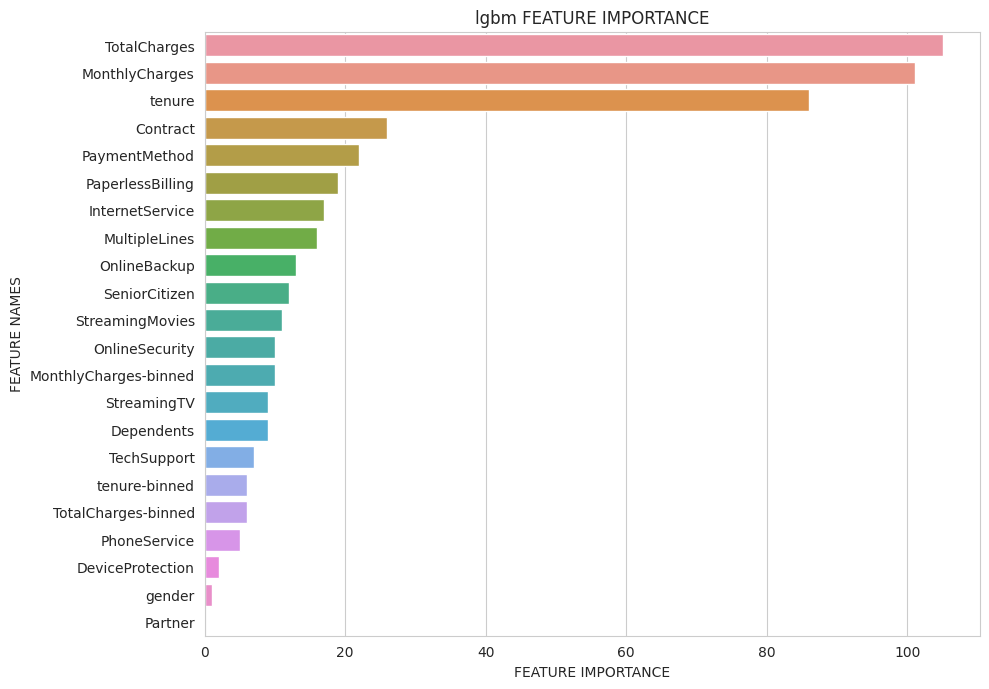

In [ ]:
# highly recommended : https://neptune.ai/blog/lightgbm-parameters-guide

fold_num = 10

# convert datatype to category to use 'categorical_feature' parameter
# does not improve score
# for c in cat_cols:
#     X[c] = X[c].astype('category')
#     X_test[c] = X_test[c].astype('category')

lgbm_params = {'n_estimators': 12749, 
               'learning_rate': 0.1985328656822506, 
               'reg_alpha': 9.77289653841389, 
               'reg_lambda': 4.979048257991328, 
               'num_leaves': 921, 
               'min_child_samples': 85, 
               'max_depth': 56, 
               'colsample_bytree': 0.43848926369957975, 
               'cat_smooth': 92, 
               'cat_l2': 17, 
              #  'l2_leaf_reg':50,
              #  'is_unbalance':True,  # does not improve score
              # 'categorical_feature': cat_cols, # does not improve score
               'min_data_per_group': 59}


lgbm = LGBMClassifier(**lgbm_params)

train_model(lgbm, 'lgbm', X, y, X_test, fold_num)

# high score with robust scaler > min-max scaler > standard scaler 
## min-max
# Train : Base Model - lgbm - AUC score : mean ---> 0.8488136576486445, std ---> 0.014531097746514104
# Test  : Base Model - lgbm - AUC score : 0.8496602857216667
## Robustscaler
# Train : Base Model - lgbm - AUC score : mean ---> 0.8489638728144833, std ---> 0.014634419602993266
# Test  : Base Model - lgbm - AUC score : 0.8498656643157922

<a id='10.4.2'></a>
### 10.4.2 Optuna Tuning

In [ ]:
%%time
def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=int(SEED), shuffle=True, stratify=y)

    params = {
        'objective': 'binary',
        'n_estimators': trial.suggest_int('n_estimators', 4000, 20000),
        'learning_rate' : trial.suggest_float('learning_rate',1e-3,5e-1,log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.001, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.001, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 5, 1000), # num leaves = 2^max_depth
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'max_depth': trial.suggest_int('max_depth', 5, 64),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 0.5),
        'cat_smooth' : trial.suggest_int('cat_smooth', 10, 100),
        'cat_l2': trial.suggest_int('cat_l2', 1, 20),
        'min_data_per_group': trial.suggest_int('min_data_per_group', 50, 200),
        'random_state': int(SEED),
        # 'device': 'gpu',
        #     'subsample': 0.6,
        #     'subsample_freq': 1,
        #     'min_child_weight': trial.suggest_float('min_child_weight', 0.001, 10.0),
    }

    # Learning
    model = LGBMClassifier(
        loss_function="Logloss",
        eval_metric="AUC",
        # task_type="GPU",
        l2_leaf_reg=50,
        random_seed=SEED,
        border_count=254,
        **params
    )        
    model.fit(X_train, y_train, verbose=1000)
    val_pred = model.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, val_pred) # AUROC requires probabilities of the predictions
    print("AUC Score : ",auc)
    
    return auc

CPU times: user 13 µs, sys: 0 ns, total: 13 µs
Wall time: 16.5 µs


In [ ]:
%%time
n_trials = int(200)
study = optuna.create_study(direction = "maximize", sampler = optuna.samplers.TPESampler(seed=int(SEED)))
study.optimize(objective, n_trials = n_trials, n_jobs = multiprocessing.cpu_count())

printmd('**BEST TRIAL**')
print("Best Score: ", study.best_value)
printmd('**LGBM Tuned Hyperparameters**')
pprint.pprint(study.best_trial.params)

[I 2021-10-24 15:00:19,989] A new study created in memory with name: no-name-6ad5fb6c-cd0c-44f9-8b38-c27d452b0d0f
[I 2021-10-24 15:00:22,930] Trial 1 finished with value: 0.8367240176703091 and parameters: {'n_estimators': 5314, 'learning_rate': 0.3517143960542277, 'reg_alpha': 8.816762468431623, 'reg_lambda': 1.2014106723020381, 'num_leaves': 971, 'min_child_samples': 74, 'max_depth': 20, 'colsample_bytree': 0.45256207236263934, 'cat_smooth': 52, 'cat_l2': 18, 'min_data_per_group': 113}. Best is trial 1 with value: 0.8367240176703091.


AUC Score :  0.8367240176703091


[I 2021-10-24 15:00:30,929] Trial 2 finished with value: 0.8382624195923429 and parameters: {'n_estimators': 13026, 'learning_rate': 0.05609920151088444, 'reg_alpha': 5.313840756111287, 'reg_lambda': 0.2336779754787714, 'num_leaves': 339, 'min_child_samples': 66, 'max_depth': 26, 'colsample_bytree': 0.41913363307066875, 'cat_smooth': 61, 'cat_l2': 20, 'min_data_per_group': 133}. Best is trial 2 with value: 0.8382624195923429.


AUC Score :  0.8382624195923429


[I 2021-10-24 15:00:32,392] Trial 0 finished with value: 0.8396380686662016 and parameters: {'n_estimators': 19214, 'learning_rate': 0.009600418533395981, 'reg_alpha': 9.952662390436965, 'reg_lambda': 5.165324168754814, 'num_leaves': 282, 'min_child_samples': 50, 'max_depth': 22, 'colsample_bytree': 0.2862734484129284, 'cat_smooth': 61, 'cat_l2': 7, 'min_data_per_group': 109}. Best is trial 0 with value: 0.8396380686662016.


AUC Score :  0.8396380686662016


[I 2021-10-24 15:00:38,390] Trial 4 finished with value: 0.8385026737967916 and parameters: {'n_estimators': 13242, 'learning_rate': 0.059900313718840546, 'reg_alpha': 6.623679084740837, 'reg_lambda': 7.0685959096531805, 'num_leaves': 742, 'min_child_samples': 29, 'max_depth': 7, 'colsample_bytree': 0.15049356544949638, 'cat_smooth': 100, 'cat_l2': 3, 'min_data_per_group': 191}. Best is trial 0 with value: 0.8396380686662016.


AUC Score :  0.8385026737967916


[I 2021-10-24 15:00:42,938] Trial 5 finished with value: 0.8317083882301273 and parameters: {'n_estimators': 7093, 'learning_rate': 0.0611846357439844, 'reg_alpha': 2.2076592461850972, 'reg_lambda': 5.302887819351186, 'num_leaves': 598, 'min_child_samples': 96, 'max_depth': 17, 'colsample_bytree': 0.3783277975895871, 'cat_smooth': 30, 'cat_l2': 17, 'min_data_per_group': 111}. Best is trial 0 with value: 0.8396380686662016.


AUC Score :  0.8317083882301273


[I 2021-10-24 15:00:45,226] Trial 3 finished with value: 0.8386240925882871 and parameters: {'n_estimators': 16376, 'learning_rate': 0.005590271199150291, 'reg_alpha': 6.037377241013136, 'reg_lambda': 2.5010831326138807, 'num_leaves': 109, 'min_child_samples': 44, 'max_depth': 54, 'colsample_bytree': 0.12494573563958743, 'cat_smooth': 72, 'cat_l2': 7, 'min_data_per_group': 52}. Best is trial 0 with value: 0.8396380686662016.


AUC Score :  0.8386240925882871


[I 2021-10-24 15:00:45,902] Trial 6 finished with value: 0.833742798832313 and parameters: {'n_estimators': 5245, 'learning_rate': 0.28416167693521316, 'reg_alpha': 4.3435538482936895, 'reg_lambda': 2.9766469884873463, 'num_leaves': 122, 'min_child_samples': 51, 'max_depth': 51, 'colsample_bytree': 0.37526295740677984, 'cat_smooth': 70, 'cat_l2': 1, 'min_data_per_group': 155}. Best is trial 0 with value: 0.8396380686662016.


AUC Score :  0.833742798832313


[I 2021-10-24 15:00:51,460] Trial 8 finished with value: 0.8394959828463666 and parameters: {'n_estimators': 11033, 'learning_rate': 0.039145967748166456, 'reg_alpha': 7.018704662677631, 'reg_lambda': 9.430571595977215, 'num_leaves': 257, 'min_child_samples': 66, 'max_depth': 29, 'colsample_bytree': 0.30049486181683177, 'cat_smooth': 47, 'cat_l2': 12, 'min_data_per_group': 141}. Best is trial 0 with value: 0.8396380686662016.


AUC Score :  0.8394959828463666


[I 2021-10-24 15:01:00,050] Trial 7 finished with value: 0.8391162262006253 and parameters: {'n_estimators': 17104, 'learning_rate': 0.0065897821762846585, 'reg_alpha': 6.507028447000703, 'reg_lambda': 7.178284135954995, 'num_leaves': 555, 'min_child_samples': 9, 'max_depth': 11, 'colsample_bytree': 0.27874889548423587, 'cat_smooth': 82, 'cat_l2': 5, 'min_data_per_group': 83}. Best is trial 0 with value: 0.8396380686662016.


AUC Score :  0.8391162262006253


[I 2021-10-24 15:01:01,228] Trial 9 finished with value: 0.8398369888139708 and parameters: {'n_estimators': 12416, 'learning_rate': 0.008359515582172046, 'reg_alpha': 9.879457551418954, 'reg_lambda': 3.429048833375078, 'num_leaves': 989, 'min_child_samples': 82, 'max_depth': 64, 'colsample_bytree': 0.2665220069849495, 'cat_smooth': 38, 'cat_l2': 15, 'min_data_per_group': 129}. Best is trial 9 with value: 0.8398369888139708.


AUC Score :  0.8398369888139708


[I 2021-10-24 15:01:03,970] Trial 10 finished with value: 0.8344532279314889 and parameters: {'n_estimators': 7888, 'learning_rate': 0.45244522402399107, 'reg_alpha': 6.042383947470977, 'reg_lambda': 2.592554743740018, 'num_leaves': 935, 'min_child_samples': 35, 'max_depth': 62, 'colsample_bytree': 0.2382358898455871, 'cat_smooth': 100, 'cat_l2': 18, 'min_data_per_group': 147}. Best is trial 9 with value: 0.8398369888139708.


AUC Score :  0.8344532279314889


[I 2021-10-24 15:01:27,204] Trial 11 finished with value: 0.8390929757937431 and parameters: {'n_estimators': 9560, 'learning_rate': 0.001278767545529387, 'reg_alpha': 1.4847018825333373, 'reg_lambda': 3.3430054640671196, 'num_leaves': 959, 'min_child_samples': 96, 'max_depth': 42, 'colsample_bytree': 0.20969074566453172, 'cat_smooth': 10, 'cat_l2': 13, 'min_data_per_group': 174}. Best is trial 9 with value: 0.8398369888139708.


AUC Score :  0.8390929757937431


[I 2021-10-24 15:01:29,925] Trial 12 finished with value: 0.8397866129323929 and parameters: {'n_estimators': 18917, 'learning_rate': 0.0011202270814473475, 'reg_alpha': 9.979671776027633, 'reg_lambda': 4.8517306587257, 'num_leaves': 399, 'min_child_samples': 100, 'max_depth': 40, 'colsample_bytree': 0.21359773422944173, 'cat_smooth': 11, 'cat_l2': 11, 'min_data_per_group': 89}. Best is trial 9 with value: 0.8398369888139708.


AUC Score :  0.8397866129323929


[I 2021-10-24 15:01:38,435] Trial 13 finished with value: 0.839674235965796 and parameters: {'n_estimators': 18186, 'learning_rate': 0.010518819318190284, 'reg_alpha': 9.83829862588936, 'reg_lambda': 5.169198556561172, 'num_leaves': 318, 'min_child_samples': 82, 'max_depth': 38, 'colsample_bytree': 0.31299095692648415, 'cat_smooth': 38, 'cat_l2': 9, 'min_data_per_group': 88}. Best is trial 9 with value: 0.8398369888139708.


AUC Score :  0.839674235965796


[I 2021-10-24 15:01:51,651] Trial 14 finished with value: 0.8395993179880648 and parameters: {'n_estimators': 14931, 'learning_rate': 0.001268138471933071, 'reg_alpha': 8.548345587086324, 'reg_lambda': 4.495634107522734, 'num_leaves': 744, 'min_child_samples': 83, 'max_depth': 39, 'colsample_bytree': 0.1907015890605901, 'cat_smooth': 10, 'cat_l2': 14, 'min_data_per_group': 80}. Best is trial 9 with value: 0.8398369888139708.


AUC Score :  0.8395993179880648


[I 2021-10-24 15:02:00,115] Trial 15 finished with value: 0.8395786509597251 and parameters: {'n_estimators': 14221, 'learning_rate': 0.0010037290397628613, 'reg_alpha': 8.306181413958047, 'reg_lambda': 6.858146179244725, 'num_leaves': 794, 'min_child_samples': 100, 'max_depth': 63, 'colsample_bytree': 0.17989384242429168, 'cat_smooth': 10, 'cat_l2': 14, 'min_data_per_group': 69}. Best is trial 9 with value: 0.8398369888139708.


AUC Score :  0.8395786509597251


[I 2021-10-24 15:02:08,982] Trial 16 finished with value: 0.8391911441783564 and parameters: {'n_estimators': 14897, 'learning_rate': 0.0025280814950309287, 'reg_alpha': 8.083472535577185, 'reg_lambda': 7.1132116016930595, 'num_leaves': 443, 'min_child_samples': 100, 'max_depth': 61, 'colsample_bytree': 0.17117255544591028, 'cat_smooth': 25, 'cat_l2': 15, 'min_data_per_group': 53}. Best is trial 9 with value: 0.8398369888139708.


AUC Score :  0.8391911441783564


[I 2021-10-24 15:02:24,441] Trial 18 finished with value: 0.8381487509364747 and parameters: {'n_estimators': 11325, 'learning_rate': 0.0034349165169459675, 'reg_alpha': 3.8297614912456286, 'reg_lambda': 4.010211336856304, 'num_leaves': 455, 'min_child_samples': 84, 'max_depth': 47, 'colsample_bytree': 0.10009415035800659, 'cat_smooth': 26, 'cat_l2': 10, 'min_data_per_group': 98}. Best is trial 9 with value: 0.8398369888139708.


AUC Score :  0.8381487509364747


[I 2021-10-24 15:02:38,986] Trial 19 finished with value: 0.8332764990053992 and parameters: {'n_estimators': 19949, 'learning_rate': 0.01858866120176283, 'reg_alpha': 2.845190786970173, 'reg_lambda': 1.6505117261968942, 'num_leaves': 651, 'min_child_samples': 66, 'max_depth': 30, 'colsample_bytree': 0.24494470666603785, 'cat_smooth': 41, 'cat_l2': 11, 'min_data_per_group': 125}. Best is trial 9 with value: 0.8398369888139708.


AUC Score :  0.8332764990053992


[I 2021-10-24 15:02:42,975] Trial 17 finished with value: 0.8359050866723502 and parameters: {'n_estimators': 19865, 'learning_rate': 0.0023723581051129546, 'reg_alpha': 3.2030458672365754, 'reg_lambda': 4.242021385418363, 'num_leaves': 481, 'min_child_samples': 86, 'max_depth': 48, 'colsample_bytree': 0.2402115087876212, 'cat_smooth': 28, 'cat_l2': 10, 'min_data_per_group': 98}. Best is trial 9 with value: 0.8398369888139708.


AUC Score :  0.8359050866723502


[I 2021-10-24 15:02:47,754] Trial 21 finished with value: 0.838200418507324 and parameters: {'n_estimators': 9400, 'learning_rate': 0.12597560140480454, 'reg_alpha': 7.4386658166162825, 'reg_lambda': 6.1907713437937595, 'num_leaves': 843, 'min_child_samples': 73, 'max_depth': 56, 'colsample_bytree': 0.33789678153454955, 'cat_smooth': 19, 'cat_l2': 15, 'min_data_per_group': 163}. Best is trial 9 with value: 0.8398369888139708.


AUC Score :  0.838200418507324


[I 2021-10-24 15:02:58,012] Trial 22 finished with value: 0.8400113668655869 and parameters: {'n_estimators': 17779, 'learning_rate': 0.018151815468247057, 'reg_alpha': 9.766301532733575, 'reg_lambda': 5.678481424944026, 'num_leaves': 370, 'min_child_samples': 89, 'max_depth': 37, 'colsample_bytree': 0.32639624576398446, 'cat_smooth': 38, 'cat_l2': 8, 'min_data_per_group': 87}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8400113668655869


[I 2021-10-24 15:03:06,384] Trial 20 finished with value: 0.8289428815004263 and parameters: {'n_estimators': 9511, 'learning_rate': 0.0029210809966971397, 'reg_alpha': 0.05191542313837072, 'reg_lambda': 5.942758691965621, 'num_leaves': 18, 'min_child_samples': 88, 'max_depth': 54, 'colsample_bytree': 0.3438841437108903, 'cat_smooth': 20, 'cat_l2': 8, 'min_data_per_group': 172}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8289428815004263


[I 2021-10-24 15:03:07,472] Trial 23 finished with value: 0.8398757394921078 and parameters: {'n_estimators': 16584, 'learning_rate': 0.022027193570057276, 'reg_alpha': 9.168225126642792, 'reg_lambda': 8.42871671969436, 'num_leaves': 184, 'min_child_samples': 93, 'max_depth': 35, 'colsample_bytree': 0.3475181038488858, 'cat_smooth': 37, 'cat_l2': 8, 'min_data_per_group': 125}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8398757394921078


[I 2021-10-24 15:03:15,334] Trial 24 finished with value: 0.8394946911570953 and parameters: {'n_estimators': 17154, 'learning_rate': 0.021807657314383083, 'reg_alpha': 9.467334076505626, 'reg_lambda': 8.878392784093245, 'num_leaves': 392, 'min_child_samples': 91, 'max_depth': 34, 'colsample_bytree': 0.24600091091133608, 'cat_smooth': 39, 'cat_l2': 6, 'min_data_per_group': 66}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8394946911570953


[I 2021-10-24 15:03:17,662] Trial 25 finished with value: 0.8380932082978118 and parameters: {'n_estimators': 16413, 'learning_rate': 0.021258210125502393, 'reg_alpha': 9.061864162161068, 'reg_lambda': 9.123296550109373, 'num_leaves': 189, 'min_child_samples': 75, 'max_depth': 34, 'colsample_bytree': 0.48845787198504453, 'cat_smooth': 38, 'cat_l2': 7, 'min_data_per_group': 126}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8380932082978118


[I 2021-10-24 15:03:26,601] Trial 26 finished with value: 0.8387752202330208 and parameters: {'n_estimators': 16403, 'learning_rate': 0.01419561652154194, 'reg_alpha': 9.048341401000556, 'reg_lambda': 8.380130575193562, 'num_leaves': 212, 'min_child_samples': 75, 'max_depth': 33, 'colsample_bytree': 0.4990766290258823, 'cat_smooth': 35, 'cat_l2': 4, 'min_data_per_group': 124}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8387752202330208


[I 2021-10-24 15:03:27,918] Trial 27 finished with value: 0.8387028856338321 and parameters: {'n_estimators': 15671, 'learning_rate': 0.012583288170683283, 'reg_alpha': 7.651509621916526, 'reg_lambda': 8.261440014025517, 'num_leaves': 191, 'min_child_samples': 59, 'max_depth': 45, 'colsample_bytree': 0.39105614075399375, 'cat_smooth': 47, 'cat_l2': 4, 'min_data_per_group': 122}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8387028856338321


[I 2021-10-24 15:03:33,254] Trial 28 finished with value: 0.8384975070397065 and parameters: {'n_estimators': 12586, 'learning_rate': 0.03687849991662526, 'reg_alpha': 7.558591163244234, 'reg_lambda': 7.682190501638682, 'num_leaves': 27, 'min_child_samples': 63, 'max_depth': 43, 'colsample_bytree': 0.3892311216348712, 'cat_smooth': 50, 'cat_l2': 9, 'min_data_per_group': 141}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8384975070397065


[I 2021-10-24 15:03:37,035] Trial 29 finished with value: 0.8392156862745098 and parameters: {'n_estimators': 18101, 'learning_rate': 0.043180360354213784, 'reg_alpha': 7.917325033762575, 'reg_lambda': 7.891593337491743, 'num_leaves': 99, 'min_child_samples': 91, 'max_depth': 14, 'colsample_bytree': 0.33759915571348126, 'cat_smooth': 46, 'cat_l2': 9, 'min_data_per_group': 101}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8392156862745098


[I 2021-10-24 15:03:43,728] Trial 30 finished with value: 0.8394714407502131 and parameters: {'n_estimators': 13971, 'learning_rate': 0.006698498882616029, 'reg_alpha': 9.450660820240557, 'reg_lambda': 5.820299514831365, 'num_leaves': 281, 'min_child_samples': 91, 'max_depth': 22, 'colsample_bytree': 0.2771956506230007, 'cat_smooth': 61, 'cat_l2': 8, 'min_data_per_group': 102}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8394714407502131


[I 2021-10-24 15:03:46,687] Trial 31 finished with value: 0.8395993179880648 and parameters: {'n_estimators': 14132, 'learning_rate': 0.008188246431768752, 'reg_alpha': 9.411930722222236, 'reg_lambda': 3.540567312243601, 'num_leaves': 273, 'min_child_samples': 80, 'max_depth': 23, 'colsample_bytree': 0.28161180989925044, 'cat_smooth': 58, 'cat_l2': 1, 'min_data_per_group': 113}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8395993179880648


[I 2021-10-24 15:03:52,609] Trial 32 finished with value: 0.8381100002583379 and parameters: {'n_estimators': 18706, 'learning_rate': 0.10113856842743889, 'reg_alpha': 9.725167380519343, 'reg_lambda': 3.678885321947683, 'num_leaves': 378, 'min_child_samples': 81, 'max_depth': 39, 'colsample_bytree': 0.31549302990230366, 'cat_smooth': 19, 'cat_l2': 11, 'min_data_per_group': 70}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8381100002583379


[I 2021-10-24 15:03:55,907] Trial 33 finished with value: 0.8383489627735152 and parameters: {'n_estimators': 18816, 'learning_rate': 0.11299257496393857, 'reg_alpha': 9.826396215920795, 'reg_lambda': 4.635672436214398, 'num_leaves': 401, 'min_child_samples': 95, 'max_depth': 38, 'colsample_bytree': 0.3183700146665173, 'cat_smooth': 19, 'cat_l2': 12, 'min_data_per_group': 90}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8383489627735152


[I 2021-10-24 15:04:06,635] Trial 34 finished with value: 0.8393035211449534 and parameters: {'n_estimators': 17652, 'learning_rate': 0.004105880240053548, 'reg_alpha': 9.983359588270465, 'reg_lambda': 9.937560239811388, 'num_leaves': 539, 'min_child_samples': 94, 'max_depth': 30, 'colsample_bytree': 0.21254028741387465, 'cat_smooth': 31, 'cat_l2': 12, 'min_data_per_group': 88}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8393035211449534


[I 2021-10-24 15:04:13,279] Trial 35 finished with value: 0.8391472267431347 and parameters: {'n_estimators': 17515, 'learning_rate': 0.004565760131496666, 'reg_alpha': 8.647691944557755, 'reg_lambda': 1.7365317982225381, 'num_leaves': 551, 'min_child_samples': 100, 'max_depth': 27, 'colsample_bytree': 0.4331803512357461, 'cat_smooth': 33, 'cat_l2': 20, 'min_data_per_group': 134}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8391472267431347


[I 2021-10-24 15:04:17,179] Trial 36 finished with value: 0.8395618589991992 and parameters: {'n_estimators': 19197, 'learning_rate': 0.0310229598663799, 'reg_alpha': 8.772683695989977, 'reg_lambda': 1.6581793225427495, 'num_leaves': 649, 'min_child_samples': 100, 'max_depth': 25, 'colsample_bytree': 0.3532174921724474, 'cat_smooth': 54, 'cat_l2': 6, 'min_data_per_group': 133}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8395618589991992


[I 2021-10-24 15:04:20,328] Trial 38 finished with value: 0.8391162262006252 and parameters: {'n_estimators': 4210, 'learning_rate': 0.02728235151014962, 'reg_alpha': 8.982069712449299, 'reg_lambda': 0.4409035980044944, 'num_leaves': 354, 'min_child_samples': 77, 'max_depth': 51, 'colsample_bytree': 0.2725033807673107, 'cat_smooth': 70, 'cat_l2': 17, 'min_data_per_group': 116}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8391162262006252


[I 2021-10-24 15:04:23,376] Trial 37 finished with value: 0.8392376449921207 and parameters: {'n_estimators': 19148, 'learning_rate': 0.03162126910971946, 'reg_alpha': 8.831166384073333, 'reg_lambda': 0.8750788487274148, 'num_leaves': 647, 'min_child_samples': 72, 'max_depth': 58, 'colsample_bytree': 0.35652878318189735, 'cat_smooth': 54, 'cat_l2': 16, 'min_data_per_group': 115}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8392376449921207


[I 2021-10-24 15:04:57,121] Trial 39 finished with value: 0.8384884652148079 and parameters: {'n_estimators': 15605, 'learning_rate': 0.0019003243097582697, 'reg_alpha': 5.116170210208153, 'reg_lambda': 5.5350150348942515, 'num_leaves': 138, 'min_child_samples': 42, 'max_depth': 19, 'colsample_bytree': 0.41086171160491197, 'cat_smooth': 43, 'cat_l2': 16, 'min_data_per_group': 106}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8384884652148079


[I 2021-10-24 15:05:05,429] Trial 41 finished with value: 0.8386421762380842 and parameters: {'n_estimators': 12140, 'learning_rate': 0.01505605548534834, 'reg_alpha': 7.223478454092998, 'reg_lambda': 6.4158743707476384, 'num_leaves': 315, 'min_child_samples': 56, 'max_depth': 5, 'colsample_bytree': 0.15678619965182308, 'cat_smooth': 25, 'cat_l2': 8, 'min_data_per_group': 189}. Best is trial 22 with value: 0.8400113668655869.
[I 2021-10-24 15:05:05,568] Trial 40 finished with value: 0.8384316308868738 and parameters: {'n_estimators': 15893, 'learning_rate': 0.0016513730695650874, 'reg_alpha': 5.024487250449307, 'reg_lambda': 5.60660946716423, 'num_leaves': 883, 'min_child_samples': 41, 'max_depth': 18, 'colsample_bytree': 0.41781960559133563, 'cat_smooth': 43, 'cat_l2': 8, 'min_data_per_group': 75}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8386421762380842
AUC Score :  0.8384316308868738


[I 2021-10-24 15:05:16,389] Trial 42 finished with value: 0.8395670257562842 and parameters: {'n_estimators': 18042, 'learning_rate': 0.011456752251059138, 'reg_alpha': 9.922596181179083, 'reg_lambda': 5.02304699007128, 'num_leaves': 240, 'min_child_samples': 88, 'max_depth': 38, 'colsample_bytree': 0.3176214258507053, 'cat_smooth': 36, 'cat_l2': 9, 'min_data_per_group': 77}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8395670257562842


[I 2021-10-24 15:05:17,551] Trial 43 finished with value: 0.8396884445477797 and parameters: {'n_estimators': 18219, 'learning_rate': 0.008816936954750696, 'reg_alpha': 9.858788113314978, 'reg_lambda': 5.028838700904267, 'num_leaves': 247, 'min_child_samples': 89, 'max_depth': 36, 'colsample_bytree': 0.3047311767926827, 'cat_smooth': 35, 'cat_l2': 9, 'min_data_per_group': 93}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8396884445477797


[I 2021-10-24 15:05:27,377] Trial 44 finished with value: 0.8393306466196492 and parameters: {'n_estimators': 18306, 'learning_rate': 0.010388762100365836, 'reg_alpha': 9.332414331914709, 'reg_lambda': 5.019352934096608, 'num_leaves': 317, 'min_child_samples': 21, 'max_depth': 42, 'colsample_bytree': 0.29550259441401255, 'cat_smooth': 84, 'cat_l2': 6, 'min_data_per_group': 92}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8393306466196492


[I 2021-10-24 15:05:30,317] Trial 45 finished with value: 0.8395101914283501 and parameters: {'n_estimators': 16917, 'learning_rate': 0.005690367879499057, 'reg_alpha': 9.323270944521044, 'reg_lambda': 4.80276222691028, 'num_leaves': 433, 'min_child_samples': 5, 'max_depth': 42, 'colsample_bytree': 0.2589218666693427, 'cat_smooth': 15, 'cat_l2': 6, 'min_data_per_group': 94}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8395101914283501


[I 2021-10-24 15:05:38,306] Trial 47 finished with value: 0.8391924358676277 and parameters: {'n_estimators': 10399, 'learning_rate': 0.0080679656362257, 'reg_alpha': 8.277760565899381, 'reg_lambda': 2.229948205152247, 'num_leaves': 138, 'min_child_samples': 93, 'max_depth': 31, 'colsample_bytree': 0.22235732490285232, 'cat_smooth': 32, 'cat_l2': 13, 'min_data_per_group': 151}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8391924358676277


[I 2021-10-24 15:05:38,750] Trial 46 finished with value: 0.8396574440052701 and parameters: {'n_estimators': 16903, 'learning_rate': 0.008096685890830608, 'reg_alpha': 8.25330182014932, 'reg_lambda': 3.0621194448982374, 'num_leaves': 95, 'min_child_samples': 93, 'max_depth': 32, 'colsample_bytree': 0.25888824320958037, 'cat_smooth': 50, 'cat_l2': 7, 'min_data_per_group': 59}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8396574440052701


[I 2021-10-24 15:05:42,546] Trial 49 finished with value: 0.8383050453382933 and parameters: {'n_estimators': 7540, 'learning_rate': 0.07997793818097909, 'reg_alpha': 6.653901458163213, 'reg_lambda': 6.598316277394433, 'num_leaves': 516, 'min_child_samples': 69, 'max_depth': 36, 'colsample_bytree': 0.29760559824761024, 'cat_smooth': 67, 'cat_l2': 10, 'min_data_per_group': 84}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8383050453382933


[I 2021-10-24 15:05:45,402] Trial 48 finished with value: 0.8389444315275518 and parameters: {'n_estimators': 13295, 'learning_rate': 0.07381207942468877, 'reg_alpha': 6.593138007663436, 'reg_lambda': 2.8150489412659794, 'num_leaves': 510, 'min_child_samples': 70, 'max_depth': 48, 'colsample_bytree': 0.37264918844442646, 'cat_smooth': 50, 'cat_l2': 11, 'min_data_per_group': 60}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8389444315275518


[I 2021-10-24 15:05:51,197] Trial 50 finished with value: 0.83913172647188 and parameters: {'n_estimators': 13477, 'learning_rate': 0.016886541467646815, 'reg_alpha': 8.594116256870269, 'reg_lambda': 4.140118626869441, 'num_leaves': 218, 'min_child_samples': 87, 'max_depth': 27, 'colsample_bytree': 0.3716809306809245, 'cat_smooth': 14, 'cat_l2': 19, 'min_data_per_group': 105}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.83913172647188


[I 2021-10-24 15:05:54,067] Trial 51 finished with value: 0.8380040817380969 and parameters: {'n_estimators': 19703, 'learning_rate': 0.1731129615481476, 'reg_alpha': 5.584739756907808, 'reg_lambda': 4.111837977700235, 'num_leaves': 347, 'min_child_samples': 88, 'max_depth': 35, 'colsample_bytree': 0.21952760651794748, 'cat_smooth': 23, 'cat_l2': 13, 'min_data_per_group': 104}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8380040817380969


[I 2021-10-24 15:06:00,668] Trial 52 finished with value: 0.8360575060063552 and parameters: {'n_estimators': 19823, 'learning_rate': 0.21499004639253072, 'reg_alpha': 9.92637160485228, 'reg_lambda': 4.019378734819698, 'num_leaves': 331, 'min_child_samples': 79, 'max_depth': 37, 'colsample_bytree': 0.3228773422286779, 'cat_smooth': 23, 'cat_l2': 9, 'min_data_per_group': 85}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8360575060063552


[I 2021-10-24 15:06:02,801] Trial 53 finished with value: 0.8389870572735023 and parameters: {'n_estimators': 18487, 'learning_rate': 0.04514813762731828, 'reg_alpha': 9.67222264887764, 'reg_lambda': 4.441451254996501, 'num_leaves': 302, 'min_child_samples': 81, 'max_depth': 40, 'colsample_bytree': 0.3160808880501767, 'cat_smooth': 28, 'cat_l2': 10, 'min_data_per_group': 85}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8389870572735023


[I 2021-10-24 15:06:08,226] Trial 54 finished with value: 0.839357772094345 and parameters: {'n_estimators': 15128, 'learning_rate': 0.02317416953761999, 'reg_alpha': 9.454350261139927, 'reg_lambda': 5.241085793512217, 'num_leaves': 165, 'min_child_samples': 83, 'max_depth': 41, 'colsample_bytree': 0.19623073719697579, 'cat_smooth': 41, 'cat_l2': 10, 'min_data_per_group': 96}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.839357772094345


[I 2021-10-24 15:06:11,169] Trial 55 finished with value: 0.8395166498747062 and parameters: {'n_estimators': 17629, 'learning_rate': 0.02471926004345827, 'reg_alpha': 9.216173204266052, 'reg_lambda': 5.236556613743629, 'num_leaves': 414, 'min_child_samples': 85, 'max_depth': 50, 'colsample_bytree': 0.19144740867604407, 'cat_smooth': 39, 'cat_l2': 7, 'min_data_per_group': 96}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8395166498747062


[I 2021-10-24 15:06:18,162] Trial 57 finished with value: 0.8394727324394845 and parameters: {'n_estimators': 6336, 'learning_rate': 0.004871910564191097, 'reg_alpha': 9.979950604865627, 'reg_lambda': 7.33663351419759, 'num_leaves': 999, 'min_child_samples': 97, 'max_depth': 46, 'colsample_bytree': 0.3021608416474142, 'cat_smooth': 36, 'cat_l2': 7, 'min_data_per_group': 74}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8394727324394845


[I 2021-10-24 15:06:19,827] Trial 56 finished with value: 0.8395399002815884 and parameters: {'n_estimators': 17644, 'learning_rate': 0.010164777800364639, 'reg_alpha': 9.122232104934158, 'reg_lambda': 7.424795673681349, 'num_leaves': 987, 'min_child_samples': 97, 'max_depth': 45, 'colsample_bytree': 0.2988671776355345, 'cat_smooth': 36, 'cat_l2': 5, 'min_data_per_group': 75}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8395399002815884


[I 2021-10-24 15:06:24,604] Trial 58 finished with value: 0.8393099795913095 and parameters: {'n_estimators': 8504, 'learning_rate': 0.018319270427693272, 'reg_alpha': 4.4906427095386725, 'reg_lambda': 6.217031475182809, 'num_leaves': 481, 'min_child_samples': 97, 'max_depth': 45, 'colsample_bytree': 0.2683785393039244, 'cat_smooth': 30, 'cat_l2': 5, 'min_data_per_group': 132}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8393099795913095


[I 2021-10-24 15:06:29,518] Trial 59 finished with value: 0.8394791908858406 and parameters: {'n_estimators': 16351, 'learning_rate': 0.017476609800812188, 'reg_alpha': 7.961803094837704, 'reg_lambda': 6.765495579766919, 'num_leaves': 463, 'min_child_samples': 90, 'max_depth': 60, 'colsample_bytree': 0.33170076030289397, 'cat_smooth': 44, 'cat_l2': 14, 'min_data_per_group': 118}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8394791908858406


[I 2021-10-24 15:06:40,959] Trial 60 finished with value: 0.8389185977421273 and parameters: {'n_estimators': 16439, 'learning_rate': 0.003715117991499725, 'reg_alpha': 7.9133852407574565, 'reg_lambda': 2.220929923413987, 'num_leaves': 239, 'min_child_samples': 48, 'max_depth': 59, 'colsample_bytree': 0.3313382861595779, 'cat_smooth': 82, 'cat_l2': 2, 'min_data_per_group': 142}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8389185977421273


[I 2021-10-24 15:06:52,310] Trial 62 finished with value: 0.8396496938696428 and parameters: {'n_estimators': 17019, 'learning_rate': 0.00786576019220669, 'reg_alpha': 8.414578332358545, 'reg_lambda': 3.1881060224653783, 'num_leaves': 88, 'min_child_samples': 94, 'max_depth': 36, 'colsample_bytree': 0.25461704434332255, 'cat_smooth': 47, 'cat_l2': 8, 'min_data_per_group': 50}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8396496938696428


[I 2021-10-24 15:07:02,985] Trial 63 finished with value: 0.8394714407502132 and parameters: {'n_estimators': 19154, 'learning_rate': 0.012874345717984738, 'reg_alpha': 9.628250256344554, 'reg_lambda': 3.746704730858186, 'num_leaves': 59, 'min_child_samples': 84, 'max_depth': 32, 'colsample_bytree': 0.22863649617244747, 'cat_smooth': 49, 'cat_l2': 9, 'min_data_per_group': 58}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8394714407502132


[I 2021-10-24 15:07:15,959] Trial 64 finished with value: 0.8397207367795604 and parameters: {'n_estimators': 18258, 'learning_rate': 0.006435933761660629, 'reg_alpha': 8.994577607083867, 'reg_lambda': 3.0872241833517227, 'num_leaves': 173, 'min_child_samples': 92, 'max_depth': 33, 'colsample_bytree': 0.35418416344103065, 'cat_smooth': 39, 'cat_l2': 7, 'min_data_per_group': 129}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8397207367795604


[I 2021-10-24 15:07:29,898] Trial 65 finished with value: 0.8392918959415122 and parameters: {'n_estimators': 18170, 'learning_rate': 0.005881464613433061, 'reg_alpha': 8.928174521434633, 'reg_lambda': 2.6344198132009407, 'num_leaves': 170, 'min_child_samples': 90, 'max_depth': 29, 'colsample_bytree': 0.39598160541892935, 'cat_smooth': 33, 'cat_l2': 12, 'min_data_per_group': 111}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8392918959415122


[I 2021-10-24 15:07:45,216] Trial 61 finished with value: 0.801298147717585 and parameters: {'n_estimators': 18845, 'learning_rate': 0.013087073562649654, 'reg_alpha': 0.4026250386220749, 'reg_lambda': 3.1624644079751536, 'num_leaves': 244, 'min_child_samples': 84, 'max_depth': 36, 'colsample_bytree': 0.35372966593450483, 'cat_smooth': 47, 'cat_l2': 11, 'min_data_per_group': 165}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.801298147717585


[I 2021-10-24 15:07:50,873] Trial 66 finished with value: 0.8393706889870574 and parameters: {'n_estimators': 18971, 'learning_rate': 0.0029670899742777535, 'reg_alpha': 9.626256000760907, 'reg_lambda': 4.717822891450133, 'num_leaves': 369, 'min_child_samples': 79, 'max_depth': 29, 'colsample_bytree': 0.35953826047409815, 'cat_smooth': 40, 'cat_l2': 8, 'min_data_per_group': 127}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8393706889870574


[I 2021-10-24 15:07:57,077] Trial 67 finished with value: 0.8397788627967656 and parameters: {'n_estimators': 17980, 'learning_rate': 0.009377253911383011, 'reg_alpha': 9.45563491691055, 'reg_lambda': 4.691729312996341, 'num_leaves': 268, 'min_child_samples': 77, 'max_depth': 33, 'colsample_bytree': 0.35654152202683725, 'cat_smooth': 40, 'cat_l2': 9, 'min_data_per_group': 147}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8397788627967656


[I 2021-10-24 15:08:03,136] Trial 68 finished with value: 0.839639360355473 and parameters: {'n_estimators': 17983, 'learning_rate': 0.009032027840257886, 'reg_alpha': 8.638254549060147, 'reg_lambda': 4.429471674636713, 'num_leaves': 293, 'min_child_samples': 77, 'max_depth': 34, 'colsample_bytree': 0.34529716649181447, 'cat_smooth': 28, 'cat_l2': 9, 'min_data_per_group': 80}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.839639360355473


[I 2021-10-24 15:08:09,236] Trial 69 finished with value: 0.8396600273838126 and parameters: {'n_estimators': 19388, 'learning_rate': 0.009390795126957369, 'reg_alpha': 9.182978667752474, 'reg_lambda': 3.6570419980612385, 'num_leaves': 279, 'min_child_samples': 76, 'max_depth': 34, 'colsample_bytree': 0.3455275585868559, 'cat_smooth': 58, 'cat_l2': 9, 'min_data_per_group': 148}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8396600273838126


[I 2021-10-24 15:08:17,093] Trial 70 finished with value: 0.8394662739931282 and parameters: {'n_estimators': 19440, 'learning_rate': 0.006494890084091105, 'reg_alpha': 9.173367721612294, 'reg_lambda': 3.613689680468589, 'num_leaves': 272, 'min_child_samples': 97, 'max_depth': 25, 'colsample_bytree': 0.2857750507752074, 'cat_smooth': 57, 'cat_l2': 4, 'min_data_per_group': 147}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8394662739931282


[I 2021-10-24 15:08:26,590] Trial 72 finished with value: 0.8393965227724819 and parameters: {'n_estimators': 17358, 'learning_rate': 0.015108223323944401, 'reg_alpha': 9.727845609069586, 'reg_lambda': 5.848999550025017, 'num_leaves': 209, 'min_child_samples': 87, 'max_depth': 39, 'colsample_bytree': 0.3102570201487799, 'cat_smooth': 34, 'cat_l2': 7, 'min_data_per_group': 157}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8393965227724819


[I 2021-10-24 15:08:29,790] Trial 71 finished with value: 0.8394688573716707 and parameters: {'n_estimators': 17385, 'learning_rate': 0.002334499534996846, 'reg_alpha': 9.651141803769953, 'reg_lambda': 5.514252972362354, 'num_leaves': 189, 'min_child_samples': 98, 'max_depth': 10, 'colsample_bytree': 0.3683751820659263, 'cat_smooth': 44, 'cat_l2': 5, 'min_data_per_group': 161}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8394688573716707


[I 2021-10-24 15:08:38,384] Trial 73 finished with value: 0.8395011496034515 and parameters: {'n_estimators': 18456, 'learning_rate': 0.011308040497636423, 'reg_alpha': 9.485487524003837, 'reg_lambda': 5.687348146795387, 'num_leaves': 742, 'min_child_samples': 91, 'max_depth': 64, 'colsample_bytree': 0.3685357396466564, 'cat_smooth': 44, 'cat_l2': 8, 'min_data_per_group': 138}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8395011496034515


[I 2021-10-24 15:08:44,184] Trial 74 finished with value: 0.8393668139192435 and parameters: {'n_estimators': 18679, 'learning_rate': 0.005106954033774712, 'reg_alpha': 8.91743992560003, 'reg_lambda': 4.787983128884928, 'num_leaves': 410, 'min_child_samples': 62, 'max_depth': 32, 'colsample_bytree': 0.3854718659861833, 'cat_smooth': 38, 'cat_l2': 10, 'min_data_per_group': 139}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8393668139192435


[I 2021-10-24 15:08:53,839] Trial 75 finished with value: 0.8393228964840218 and parameters: {'n_estimators': 17905, 'learning_rate': 0.004754110093120412, 'reg_alpha': 8.882020773383761, 'reg_lambda': 4.794886324526704, 'num_leaves': 417, 'min_child_samples': 83, 'max_depth': 43, 'colsample_bytree': 0.3877035329167103, 'cat_smooth': 38, 'cat_l2': 10, 'min_data_per_group': 122}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8393228964840218


[I 2021-10-24 15:09:01,152] Trial 76 finished with value: 0.8389095559172285 and parameters: {'n_estimators': 16035, 'learning_rate': 0.001032551596026159, 'reg_alpha': 8.806956089491585, 'reg_lambda': 5.338618583170846, 'num_leaves': 379, 'min_child_samples': 82, 'max_depth': 38, 'colsample_bytree': 0.13010725461626127, 'cat_smooth': 41, 'cat_l2': 11, 'min_data_per_group': 130}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8389095559172285


[I 2021-10-24 15:09:13,535] Trial 78 finished with value: 0.8392066444496111 and parameters: {'n_estimators': 16663, 'learning_rate': 0.007076586689922161, 'reg_alpha': 9.975422862970225, 'reg_lambda': 8.851025578366974, 'num_leaves': 694, 'min_child_samples': 93, 'max_depth': 55, 'colsample_bytree': 0.3286615779523719, 'cat_smooth': 14, 'cat_l2': 6, 'min_data_per_group': 119}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8392066444496111


[I 2021-10-24 15:09:18,427] Trial 77 finished with value: 0.8395760675811825 and parameters: {'n_estimators': 16222, 'learning_rate': 0.00128003453936148, 'reg_alpha': 9.982457398378793, 'reg_lambda': 3.3818391432438646, 'num_leaves': 585, 'min_child_samples': 93, 'max_depth': 38, 'colsample_bytree': 0.33253471935090906, 'cat_smooth': 41, 'cat_l2': 6, 'min_data_per_group': 109}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8395760675811825


[I 2021-10-24 15:09:20,279] Trial 79 finished with value: 0.8396303185305743 and parameters: {'n_estimators': 11134, 'learning_rate': 0.028605018096163858, 'reg_alpha': 9.345389624650759, 'reg_lambda': 6.1744601838296935, 'num_leaves': 158, 'min_child_samples': 89, 'max_depth': 28, 'colsample_bytree': 0.30723071838187255, 'cat_smooth': 28, 'cat_l2': 9, 'min_data_per_group': 109}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8396303185305743


[I 2021-10-24 15:09:26,813] Trial 80 finished with value: 0.8392066444496112 and parameters: {'n_estimators': 15250, 'learning_rate': 0.02044726344180872, 'reg_alpha': 8.460927192152727, 'reg_lambda': 9.93046863147061, 'num_leaves': 156, 'min_child_samples': 73, 'max_depth': 27, 'colsample_bytree': 0.2902220227707149, 'cat_smooth': 29, 'cat_l2': 9, 'min_data_per_group': 80}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8392066444496112


[I 2021-10-24 15:09:29,806] Trial 81 finished with value: 0.8385104239324188 and parameters: {'n_estimators': 15514, 'learning_rate': 0.020321914032692054, 'reg_alpha': 8.4500820182628, 'reg_lambda': 3.8864927921850483, 'num_leaves': 909, 'min_child_samples': 73, 'max_depth': 23, 'colsample_bytree': 0.4063868005305246, 'cat_smooth': 22, 'cat_l2': 8, 'min_data_per_group': 90}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8385104239324188


[I 2021-10-24 15:09:38,777] Trial 82 finished with value: 0.8398395721925135 and parameters: {'n_estimators': 19480, 'learning_rate': 0.009643001822386567, 'reg_alpha': 9.246814252274703, 'reg_lambda': 4.443857752755726, 'num_leaves': 263, 'min_child_samples': 77, 'max_depth': 34, 'colsample_bytree': 0.3405316449594379, 'cat_smooth': 63, 'cat_l2': 8, 'min_data_per_group': 145}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8398395721925135


[I 2021-10-24 15:09:43,348] Trial 83 finished with value: 0.8397207367795603 and parameters: {'n_estimators': 19987, 'learning_rate': 0.009731348693516375, 'reg_alpha': 9.177266674924875, 'reg_lambda': 4.400459876590343, 'num_leaves': 266, 'min_child_samples': 77, 'max_depth': 35, 'colsample_bytree': 0.3482743258711156, 'cat_smooth': 62, 'cat_l2': 7, 'min_data_per_group': 172}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8397207367795603


[I 2021-10-24 15:09:49,597] Trial 84 finished with value: 0.8396393603554729 and parameters: {'n_estimators': 19429, 'learning_rate': 0.014328317851708421, 'reg_alpha': 9.649416706919078, 'reg_lambda': 4.512445739600627, 'num_leaves': 339, 'min_child_samples': 86, 'max_depth': 31, 'colsample_bytree': 0.34262667982673, 'cat_smooth': 63, 'cat_l2': 7, 'min_data_per_group': 154}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8396393603554729


[I 2021-10-24 15:09:54,901] Trial 85 finished with value: 0.8389508899739079 and parameters: {'n_estimators': 19595, 'learning_rate': 0.014686493177687172, 'reg_alpha': 9.543053546691384, 'reg_lambda': 4.35255702840845, 'num_leaves': 260, 'min_child_samples': 70, 'max_depth': 31, 'colsample_bytree': 0.3644024724291951, 'cat_smooth': 66, 'cat_l2': 7, 'min_data_per_group': 182}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8389508899739079


[I 2021-10-24 15:10:02,783] Trial 86 finished with value: 0.839617401637862 and parameters: {'n_estimators': 18595, 'learning_rate': 0.006911451963921654, 'reg_alpha': 9.132562393521354, 'reg_lambda': 4.271917751289787, 'num_leaves': 231, 'min_child_samples': 69, 'max_depth': 33, 'colsample_bytree': 0.362390623885272, 'cat_smooth': 63, 'cat_l2': 8, 'min_data_per_group': 197}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.839617401637862


[I 2021-10-24 15:10:05,385] Trial 87 finished with value: 0.8387158025265442 and parameters: {'n_estimators': 19940, 'learning_rate': 0.03518373168518293, 'reg_alpha': 9.193626134658976, 'reg_lambda': 5.022676873777221, 'num_leaves': 220, 'min_child_samples': 67, 'max_depth': 33, 'colsample_bytree': 0.38167104196511326, 'cat_smooth': 73, 'cat_l2': 8, 'min_data_per_group': 170}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8387158025265442


[I 2021-10-24 15:10:17,219] Trial 89 finished with value: 0.8395192332532486 and parameters: {'n_estimators': 18966, 'learning_rate': 0.011138856967213022, 'reg_alpha': 8.130477875350119, 'reg_lambda': 2.883085484373262, 'num_leaves': 800, 'min_child_samples': 78, 'max_depth': 35, 'colsample_bytree': 0.3220424706281933, 'cat_smooth': 89, 'cat_l2': 6, 'min_data_per_group': 183}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8395192332532486


[I 2021-10-24 15:10:22,328] Trial 88 finished with value: 0.8313518819912682 and parameters: {'n_estimators': 19906, 'learning_rate': 0.011509020609453751, 'reg_alpha': 2.2065126440143605, 'reg_lambda': 2.800510168337001, 'num_leaves': 208, 'min_child_samples': 79, 'max_depth': 35, 'colsample_bytree': 0.37883809411828356, 'cat_smooth': 53, 'cat_l2': 8, 'min_data_per_group': 177}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8313518819912682


[I 2021-10-24 15:10:30,534] Trial 90 finished with value: 0.838856596657108 and parameters: {'n_estimators': 17885, 'learning_rate': 0.009182942687598956, 'reg_alpha': 7.728057905016238, 'reg_lambda': 2.419704755765035, 'num_leaves': 298, 'min_child_samples': 26, 'max_depth': 40, 'colsample_bytree': 0.3469086337855325, 'cat_smooth': 52, 'cat_l2': 17, 'min_data_per_group': 136}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.838856596657108


[I 2021-10-24 15:10:33,012] Trial 91 finished with value: 0.8391846857320003 and parameters: {'n_estimators': 12722, 'learning_rate': 0.009041390206094487, 'reg_alpha': 7.756674663417089, 'reg_lambda': 3.437933964129642, 'num_leaves': 125, 'min_child_samples': 18, 'max_depth': 37, 'colsample_bytree': 0.349681874868228, 'cat_smooth': 75, 'cat_l2': 18, 'min_data_per_group': 130}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8391846857320003


[I 2021-10-24 15:10:42,294] Trial 92 finished with value: 0.8396471104911002 and parameters: {'n_estimators': 18439, 'learning_rate': 0.008423778053305617, 'reg_alpha': 9.442097236822416, 'reg_lambda': 3.38859195541414, 'num_leaves': 331, 'min_child_samples': 81, 'max_depth': 37, 'colsample_bytree': 0.3100669551780646, 'cat_smooth': 32, 'cat_l2': 15, 'min_data_per_group': 101}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8396471104911002


[I 2021-10-24 15:10:44,901] Trial 93 finished with value: 0.839284145805885 and parameters: {'n_estimators': 14587, 'learning_rate': 0.0058539635793274205, 'reg_alpha': 9.726821611216428, 'reg_lambda': 4.971241592797499, 'num_leaves': 312, 'min_child_samples': 81, 'max_depth': 40, 'colsample_bytree': 0.30882602675271026, 'cat_smooth': 56, 'cat_l2': 7, 'min_data_per_group': 146}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.839284145805885


[I 2021-10-24 15:10:51,688] Trial 94 finished with value: 0.8397995298251052 and parameters: {'n_estimators': 11689, 'learning_rate': 0.006141617869812008, 'reg_alpha': 9.79409415026548, 'reg_lambda': 3.921559731913205, 'num_leaves': 261, 'min_child_samples': 86, 'max_depth': 39, 'colsample_bytree': 0.2683447270777306, 'cat_smooth': 67, 'cat_l2': 7, 'min_data_per_group': 88}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8397995298251052


[I 2021-10-24 15:11:00,061] Trial 96 finished with value: 0.839696194683407 and parameters: {'n_estimators': 10646, 'learning_rate': 0.007203221299255003, 'reg_alpha': 8.69645385117135, 'reg_lambda': 4.177560635864812, 'num_leaves': 265, 'min_child_samples': 91, 'max_depth': 43, 'colsample_bytree': 0.26452206361130554, 'cat_smooth': 60, 'cat_l2': 7, 'min_data_per_group': 98}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.839696194683407


[I 2021-10-24 15:11:00,587] Trial 95 finished with value: 0.8394184814900928 and parameters: {'n_estimators': 17217, 'learning_rate': 0.003984532290763803, 'reg_alpha': 9.774184581208921, 'reg_lambda': 5.403329703666604, 'num_leaves': 254, 'min_child_samples': 86, 'max_depth': 43, 'colsample_bytree': 0.3368005733000906, 'cat_smooth': 35, 'cat_l2': 10, 'min_data_per_group': 144}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8394184814900928


[I 2021-10-24 15:11:08,482] Trial 98 finished with value: 0.8396445271125579 and parameters: {'n_estimators': 11809, 'learning_rate': 0.00746953110920533, 'reg_alpha': 8.745801931902097, 'reg_lambda': 4.1433015964590245, 'num_leaves': 192, 'min_child_samples': 92, 'max_depth': 41, 'colsample_bytree': 0.23665430126147535, 'cat_smooth': 68, 'cat_l2': 7, 'min_data_per_group': 87}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8396445271125579


[I 2021-10-24 15:11:11,410] Trial 97 finished with value: 0.8396199850164043 and parameters: {'n_estimators': 12318, 'learning_rate': 0.0038600665317733043, 'reg_alpha': 8.750680980653323, 'reg_lambda': 3.788680755980062, 'num_leaves': 188, 'min_child_samples': 100, 'max_depth': 41, 'colsample_bytree': 0.24250814201176496, 'cat_smooth': 60, 'cat_l2': 7, 'min_data_per_group': 67}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8396199850164043


[I 2021-10-24 15:11:17,030] Trial 99 finished with value: 0.8397439871864425 and parameters: {'n_estimators': 10561, 'learning_rate': 0.006387810480688045, 'reg_alpha': 9.334220143024178, 'reg_lambda': 3.8739556932265335, 'num_leaves': 183, 'min_child_samples': 95, 'max_depth': 52, 'colsample_bytree': 0.2659358566811241, 'cat_smooth': 64, 'cat_l2': 6, 'min_data_per_group': 168}. Best is trial 22 with value: 0.8400113668655869.


AUC Score :  0.8397439871864425


[I 2021-10-24 15:11:19,631] Trial 100 finished with value: 0.8401560360639644 and parameters: {'n_estimators': 11593, 'learning_rate': 0.016219991836221397, 'reg_alpha': 6.10393987010284, 'reg_lambda': 4.5684983557735945, 'num_leaves': 272, 'min_child_samples': 96, 'max_depth': 30, 'colsample_bytree': 0.26639020507255834, 'cat_smooth': 65, 'cat_l2': 5, 'min_data_per_group': 151}. Best is trial 100 with value: 0.8401560360639644.


AUC Score :  0.8401560360639644


[I 2021-10-24 15:11:27,625] Trial 102 finished with value: 0.8402335374202382 and parameters: {'n_estimators': 11792, 'learning_rate': 0.01686055244375294, 'reg_alpha': 5.870522309552691, 'reg_lambda': 3.946998750369331, 'num_leaves': 132, 'min_child_samples': 98, 'max_depth': 57, 'colsample_bytree': 0.2710806081299225, 'cat_smooth': 64, 'cat_l2': 5, 'min_data_per_group': 167}. Best is trial 102 with value: 0.8402335374202382.
[I 2021-10-24 15:11:27,686] Trial 101 finished with value: 0.8393668139192435 and parameters: {'n_estimators': 9800, 'learning_rate': 0.004491854713138729, 'reg_alpha': 9.00312961976979, 'reg_lambda': 4.559520228877818, 'num_leaves': 286, 'min_child_samples': 95, 'max_depth': 62, 'colsample_bytree': 0.27521378219916176, 'cat_smooth': 64, 'cat_l2': 5, 'min_data_per_group': 168}. Best is trial 102 with value: 0.8402335374202382.


AUC Score :  0.8402335374202382
AUC Score :  0.8393668139192435


[I 2021-10-24 15:11:35,452] Trial 103 finished with value: 0.8400294505153839 and parameters: {'n_estimators': 11721, 'learning_rate': 0.017255337561396793, 'reg_alpha': 6.2774626075280935, 'reg_lambda': 3.261434020674937, 'num_leaves': 52, 'min_child_samples': 98, 'max_depth': 58, 'colsample_bytree': 0.24833903683669692, 'cat_smooth': 65, 'cat_l2': 4, 'min_data_per_group': 159}. Best is trial 102 with value: 0.8402335374202382.


AUC Score :  0.8400294505153839


[I 2021-10-24 15:11:42,398] Trial 105 finished with value: 0.8396574440052702 and parameters: {'n_estimators': 11706, 'learning_rate': 0.024671656764679126, 'reg_alpha': 6.153583937846639, 'reg_lambda': 3.982685903809579, 'num_leaves': 39, 'min_child_samples': 99, 'max_depth': 57, 'colsample_bytree': 0.25076687881839055, 'cat_smooth': 71, 'cat_l2': 4, 'min_data_per_group': 159}. Best is trial 102 with value: 0.8402335374202382.


AUC Score :  0.8396574440052702


[I 2021-10-24 15:11:44,433] Trial 104 finished with value: 0.83980469658219 and parameters: {'n_estimators': 11539, 'learning_rate': 0.0031293790530700846, 'reg_alpha': 6.032598834096395, 'reg_lambda': 3.9581445596309526, 'num_leaves': 45, 'min_child_samples': 98, 'max_depth': 54, 'colsample_bytree': 0.25432382096271944, 'cat_smooth': 65, 'cat_l2': 4, 'min_data_per_group': 158}. Best is trial 102 with value: 0.8402335374202382.


AUC Score :  0.83980469658219


[I 2021-10-24 15:11:50,008] Trial 106 finished with value: 0.8398524890852256 and parameters: {'n_estimators': 11508, 'learning_rate': 0.017248342074076117, 'reg_alpha': 6.085916717525915, 'reg_lambda': 3.924175217853927, 'num_leaves': 84, 'min_child_samples': 96, 'max_depth': 61, 'colsample_bytree': 0.20059519906443607, 'cat_smooth': 76, 'cat_l2': 3, 'min_data_per_group': 150}. Best is trial 102 with value: 0.8402335374202382.


AUC Score :  0.8398524890852256


[I 2021-10-24 15:11:52,316] Trial 107 finished with value: 0.8395889844738951 and parameters: {'n_estimators': 11531, 'learning_rate': 0.016792274164098567, 'reg_alpha': 5.640557822435346, 'reg_lambda': 8.021861954244763, 'num_leaves': 71, 'min_child_samples': 95, 'max_depth': 53, 'colsample_bytree': 0.20659233402639077, 'cat_smooth': 69, 'cat_l2': 3, 'min_data_per_group': 152}. Best is trial 102 with value: 0.8402335374202382.


AUC Score :  0.8395889844738951


[I 2021-10-24 15:11:57,110] Trial 108 finished with value: 0.8389805988271463 and parameters: {'n_estimators': 11555, 'learning_rate': 0.018065648854307108, 'reg_alpha': 5.432351608137512, 'reg_lambda': 3.5494367760285868, 'num_leaves': 75, 'min_child_samples': 96, 'max_depth': 59, 'colsample_bytree': 0.17115019918715302, 'cat_smooth': 76, 'cat_l2': 3, 'min_data_per_group': 153}. Best is trial 102 with value: 0.8402335374202382.


AUC Score :  0.8389805988271463


[I 2021-10-24 15:11:59,186] Trial 109 finished with value: 0.8396600273838125 and parameters: {'n_estimators': 12737, 'learning_rate': 0.026651389235394663, 'reg_alpha': 6.31671907217664, 'reg_lambda': 3.3068403248596367, 'num_leaves': 45, 'min_child_samples': 100, 'max_depth': 61, 'colsample_bytree': 0.23546611832777214, 'cat_smooth': 77, 'cat_l2': 2, 'min_data_per_group': 164}. Best is trial 102 with value: 0.8402335374202382.


AUC Score :  0.8396600273838125


[I 2021-10-24 15:12:15,474] Trial 111 finished with value: 0.8395799426489965 and parameters: {'n_estimators': 13669, 'learning_rate': 0.003143013913940277, 'reg_alpha': 6.8501229225585405, 'reg_lambda': 3.8627972625957674, 'num_leaves': 19, 'min_child_samples': 98, 'max_depth': 56, 'colsample_bytree': 0.22781407955270414, 'cat_smooth': 65, 'cat_l2': 4, 'min_data_per_group': 150}. Best is trial 102 with value: 0.8402335374202382.


AUC Score :  0.8395799426489965


[I 2021-10-24 15:12:17,143] Trial 110 finished with value: 0.8396057764344209 and parameters: {'n_estimators': 13652, 'learning_rate': 0.001907943740000628, 'reg_alpha': 6.991247449297116, 'reg_lambda': 3.2284485926315334, 'num_leaves': 16, 'min_child_samples': 98, 'max_depth': 62, 'colsample_bytree': 0.23285173525305516, 'cat_smooth': 79, 'cat_l2': 4, 'min_data_per_group': 163}. Best is trial 102 with value: 0.8402335374202382.


AUC Score :  0.8396057764344209


[I 2021-10-24 15:12:26,460] Trial 113 finished with value: 0.8396626107623549 and parameters: {'n_estimators': 12070, 'learning_rate': 0.01261425153264619, 'reg_alpha': 5.8684063788604135, 'reg_lambda': 4.595251020636893, 'num_leaves': 120, 'min_child_samples': 89, 'max_depth': 57, 'colsample_bytree': 0.24878465763521623, 'cat_smooth': 73, 'cat_l2': 2, 'min_data_per_group': 142}. Best is trial 102 with value: 0.8402335374202382.


AUC Score :  0.8396626107623549


[I 2021-10-24 15:12:32,952] Trial 114 finished with value: 0.8399377405771268 and parameters: {'n_estimators': 10914, 'learning_rate': 0.022165534894497047, 'reg_alpha': 4.769727910444186, 'reg_lambda': 4.266395125337682, 'num_leaves': 100, 'min_child_samples': 95, 'max_depth': 64, 'colsample_bytree': 0.28351144208846835, 'cat_smooth': 68, 'cat_l2': 5, 'min_data_per_group': 156}. Best is trial 102 with value: 0.8402335374202382.


AUC Score :  0.8399377405771268


[I 2021-10-24 15:12:35,256] Trial 112 finished with value: 0.8399261153736858 and parameters: {'n_estimators': 10107, 'learning_rate': 0.001917087015155484, 'reg_alpha': 5.889510780173331, 'reg_lambda': 4.567397205200262, 'num_leaves': 109, 'min_child_samples': 98, 'max_depth': 63, 'colsample_bytree': 0.2806170357407371, 'cat_smooth': 73, 'cat_l2': 5, 'min_data_per_group': 160}. Best is trial 102 with value: 0.8402335374202382.


AUC Score :  0.8399261153736858


[I 2021-10-24 15:12:40,304] Trial 115 finished with value: 0.8391691854607455 and parameters: {'n_estimators': 11013, 'learning_rate': 0.021913012554430192, 'reg_alpha': 4.242819645380667, 'reg_lambda': 4.015681001817264, 'num_leaves': 114, 'min_child_samples': 96, 'max_depth': 63, 'colsample_bytree': 0.2932853591252304, 'cat_smooth': 67, 'cat_l2': 3, 'min_data_per_group': 157}. Best is trial 102 with value: 0.8402335374202382.


AUC Score :  0.8391691854607455


[I 2021-10-24 15:12:41,460] Trial 116 finished with value: 0.8398163217856311 and parameters: {'n_estimators': 10091, 'learning_rate': 0.01996991960216632, 'reg_alpha': 5.870011018625064, 'reg_lambda': 4.0180067035524605, 'num_leaves': 112, 'min_child_samples': 96, 'max_depth': 64, 'colsample_bytree': 0.2811025797005008, 'cat_smooth': 67, 'cat_l2': 3, 'min_data_per_group': 160}. Best is trial 102 with value: 0.8402335374202382.


AUC Score :  0.8398163217856311


[I 2021-10-24 15:12:45,973] Trial 117 finished with value: 0.8396949029941358 and parameters: {'n_estimators': 9785, 'learning_rate': 0.03239672552420105, 'reg_alpha': 5.921760940468546, 'reg_lambda': 3.6566047678624733, 'num_leaves': 140, 'min_child_samples': 93, 'max_depth': 64, 'colsample_bytree': 0.28268568387756393, 'cat_smooth': 71, 'cat_l2': 5, 'min_data_per_group': 156}. Best is trial 102 with value: 0.8402335374202382.


AUC Score :  0.8396949029941358


[I 2021-10-24 15:12:48,225] Trial 118 finished with value: 0.8396703608979824 and parameters: {'n_estimators': 10004, 'learning_rate': 0.015701675917303624, 'reg_alpha': 4.742996119600622, 'reg_lambda': 4.22585199817645, 'num_leaves': 95, 'min_child_samples': 95, 'max_depth': 64, 'colsample_bytree': 0.27874795562616783, 'cat_smooth': 71, 'cat_l2': 5, 'min_data_per_group': 156}. Best is trial 102 with value: 0.8402335374202382.


AUC Score :  0.8396703608979824


[I 2021-10-24 15:12:51,223] Trial 119 finished with value: 0.8392970626985972 and parameters: {'n_estimators': 10286, 'learning_rate': 0.04269132327819425, 'reg_alpha': 4.582248829324957, 'reg_lambda': 4.233636616555987, 'num_leaves': 102, 'min_child_samples': 98, 'max_depth': 61, 'colsample_bytree': 0.2570294861201262, 'cat_smooth': 69, 'cat_l2': 3, 'min_data_per_group': 161}. Best is trial 102 with value: 0.8402335374202382.


AUC Score :  0.8392970626985972


[I 2021-10-24 15:12:53,029] Trial 120 finished with value: 0.8398111550285462 and parameters: {'n_estimators': 9160, 'learning_rate': 0.041443748231990346, 'reg_alpha': 6.391154439581314, 'reg_lambda': 3.016677117683666, 'num_leaves': 61, 'min_child_samples': 98, 'max_depth': 61, 'colsample_bytree': 0.2570431842015127, 'cat_smooth': 60, 'cat_l2': 3, 'min_data_per_group': 160}. Best is trial 102 with value: 0.8402335374202382.


AUC Score :  0.8398111550285462


[I 2021-10-24 15:12:57,285] Trial 121 finished with value: 0.8401289105892686 and parameters: {'n_estimators': 8845, 'learning_rate': 0.01972692914652975, 'reg_alpha': 5.765672498284724, 'reg_lambda': 3.0372660010202597, 'num_leaves': 5, 'min_child_samples': 100, 'max_depth': 59, 'colsample_bytree': 0.2871836519951249, 'cat_smooth': 60, 'cat_l2': 2, 'min_data_per_group': 176}. Best is trial 102 with value: 0.8402335374202382.


AUC Score :  0.8401289105892686


[I 2021-10-24 15:12:58,922] Trial 122 finished with value: 0.8399493657805679 and parameters: {'n_estimators': 9347, 'learning_rate': 0.02118818087789888, 'reg_alpha': 5.211838508745152, 'reg_lambda': 3.0088512928532904, 'num_leaves': 51, 'min_child_samples': 100, 'max_depth': 59, 'colsample_bytree': 0.2602617146662624, 'cat_smooth': 60, 'cat_l2': 2, 'min_data_per_group': 166}. Best is trial 102 with value: 0.8402335374202382.


AUC Score :  0.8399493657805679


[I 2021-10-24 15:13:02,376] Trial 123 finished with value: 0.8384871735255366 and parameters: {'n_estimators': 9215, 'learning_rate': 0.0521063746014196, 'reg_alpha': 6.307963756037057, 'reg_lambda': 2.585098885089628, 'num_leaves': 64, 'min_child_samples': 100, 'max_depth': 60, 'colsample_bytree': 0.2867299033875556, 'cat_smooth': 61, 'cat_l2': 1, 'min_data_per_group': 177}. Best is trial 102 with value: 0.8402335374202382.


AUC Score :  0.8384871735255366


[I 2021-10-24 15:13:04,455] Trial 124 finished with value: 0.8402193288382547 and parameters: {'n_estimators': 8747, 'learning_rate': 0.019884513238518937, 'reg_alpha': 5.25177100957614, 'reg_lambda': 2.6678443579935083, 'num_leaves': 9, 'min_child_samples': 100, 'max_depth': 59, 'colsample_bytree': 0.28603961610847634, 'cat_smooth': 58, 'cat_l2': 1, 'min_data_per_group': 175}. Best is trial 102 with value: 0.8402335374202382.


AUC Score :  0.8402193288382547


[I 2021-10-24 15:13:08,196] Trial 125 finished with value: 0.8400372006510114 and parameters: {'n_estimators': 8545, 'learning_rate': 0.01992130676323333, 'reg_alpha': 5.228740566807788, 'reg_lambda': 2.783027250919348, 'num_leaves': 84, 'min_child_samples': 94, 'max_depth': 59, 'colsample_bytree': 0.27634603848705974, 'cat_smooth': 59, 'cat_l2': 2, 'min_data_per_group': 167}. Best is trial 102 with value: 0.8402335374202382.


AUC Score :  0.8400372006510114


[I 2021-10-24 15:13:10,293] Trial 126 finished with value: 0.8403252473584955 and parameters: {'n_estimators': 8693, 'learning_rate': 0.02352492422997923, 'reg_alpha': 5.199076438133365, 'reg_lambda': 2.2292111060923787, 'num_leaves': 5, 'min_child_samples': 94, 'max_depth': 59, 'colsample_bytree': 0.27071552246027203, 'cat_smooth': 58, 'cat_l2': 2, 'min_data_per_group': 176}. Best is trial 126 with value: 0.8403252473584955.


AUC Score :  0.8403252473584955


[I 2021-10-24 15:13:14,032] Trial 127 finished with value: 0.8396212767056757 and parameters: {'n_estimators': 8715, 'learning_rate': 0.02341207761812072, 'reg_alpha': 5.099823033120912, 'reg_lambda': 2.401654606568008, 'num_leaves': 29, 'min_child_samples': 94, 'max_depth': 59, 'colsample_bytree': 0.30104009200715576, 'cat_smooth': 55, 'cat_l2': 2, 'min_data_per_group': 176}. Best is trial 126 with value: 0.8403252473584955.


AUC Score :  0.8396212767056757


[I 2021-10-24 15:13:16,141] Trial 128 finished with value: 0.8401676612674054 and parameters: {'n_estimators': 8206, 'learning_rate': 0.02320949264513489, 'reg_alpha': 5.239802607440779, 'reg_lambda': 2.134695086078558, 'num_leaves': 5, 'min_child_samples': 94, 'max_depth': 58, 'colsample_bytree': 0.2730186347440638, 'cat_smooth': 58, 'cat_l2': 2, 'min_data_per_group': 176}. Best is trial 126 with value: 0.8403252473584955.


AUC Score :  0.8401676612674054


[I 2021-10-24 15:13:18,525] Trial 129 finished with value: 0.839334521687463 and parameters: {'n_estimators': 7750, 'learning_rate': 0.030278380372011027, 'reg_alpha': 5.272830263308461, 'reg_lambda': 2.0883330027138665, 'num_leaves': 12, 'min_child_samples': 91, 'max_depth': 58, 'colsample_bytree': 0.296247821268793, 'cat_smooth': 57, 'cat_l2': 1, 'min_data_per_group': 167}. Best is trial 126 with value: 0.8403252473584955.


AUC Score :  0.839334521687463


[I 2021-10-24 15:13:20,635] Trial 130 finished with value: 0.8400049084192307 and parameters: {'n_estimators': 7816, 'learning_rate': 0.02865479528239945, 'reg_alpha': 5.291689901758302, 'reg_lambda': 1.9066354037085391, 'num_leaves': 6, 'min_child_samples': 91, 'max_depth': 58, 'colsample_bytree': 0.2712704054782912, 'cat_smooth': 58, 'cat_l2': 1, 'min_data_per_group': 181}. Best is trial 126 with value: 0.8403252473584955.


AUC Score :  0.8400049084192307


[I 2021-10-24 15:13:23,134] Trial 131 finished with value: 0.8398679893564803 and parameters: {'n_estimators': 8225, 'learning_rate': 0.025185012403709753, 'reg_alpha': 4.804115577446345, 'reg_lambda': 1.258916093402678, 'num_leaves': 8, 'min_child_samples': 100, 'max_depth': 56, 'colsample_bytree': 0.27086819037474913, 'cat_smooth': 59, 'cat_l2': 2, 'min_data_per_group': 183}. Best is trial 126 with value: 0.8403252473584955.


AUC Score :  0.8398679893564803


[I 2021-10-24 15:13:24,930] Trial 132 finished with value: 0.8397569040791548 and parameters: {'n_estimators': 7108, 'learning_rate': 0.025884779924945422, 'reg_alpha': 4.828164597265289, 'reg_lambda': 1.4026770444017913, 'num_leaves': 8, 'min_child_samples': 93, 'max_depth': 56, 'colsample_bytree': 0.2711922932668367, 'cat_smooth': 52, 'cat_l2': 2, 'min_data_per_group': 181}. Best is trial 126 with value: 0.8403252473584955.


AUC Score :  0.8397569040791548


[I 2021-10-24 15:13:28,135] Trial 133 finished with value: 0.8398809062491926 and parameters: {'n_estimators': 7234, 'learning_rate': 0.020246935089441125, 'reg_alpha': 5.559743324128171, 'reg_lambda': 1.8317304443424343, 'num_leaves': 48, 'min_child_samples': 93, 'max_depth': 58, 'colsample_bytree': 0.26366728328986005, 'cat_smooth': 58, 'cat_l2': 1, 'min_data_per_group': 180}. Best is trial 126 with value: 0.8403252473584955.


AUC Score :  0.8398809062491926


[I 2021-10-24 15:13:29,706] Trial 134 finished with value: 0.8391575602573045 and parameters: {'n_estimators': 8937, 'learning_rate': 0.036228705208886866, 'reg_alpha': 5.678730100981961, 'reg_lambda': 2.30143950532291, 'num_leaves': 44, 'min_child_samples': 89, 'max_depth': 58, 'colsample_bytree': 0.262454818560249, 'cat_smooth': 56, 'cat_l2': 1, 'min_data_per_group': 173}. Best is trial 126 with value: 0.8403252473584955.


AUC Score :  0.8391575602573045


[I 2021-10-24 15:13:32,341] Trial 135 finished with value: 0.8394158981115503 and parameters: {'n_estimators': 6330, 'learning_rate': 0.0351962478992729, 'reg_alpha': 5.606988513717489, 'reg_lambda': 1.8800091305141486, 'num_leaves': 41, 'min_child_samples': 89, 'max_depth': 58, 'colsample_bytree': 0.26168133826979273, 'cat_smooth': 59, 'cat_l2': 1, 'min_data_per_group': 191}. Best is trial 126 with value: 0.8403252473584955.


AUC Score :  0.8394158981115503


[I 2021-10-24 15:13:35,736] Trial 136 finished with value: 0.8398369888139711 and parameters: {'n_estimators': 8206, 'learning_rate': 0.020226110172489507, 'reg_alpha': 5.503085596412717, 'reg_lambda': 1.929345830648048, 'num_leaves': 33, 'min_child_samples': 94, 'max_depth': 58, 'colsample_bytree': 0.2882338995152924, 'cat_smooth': 58, 'cat_l2': 1, 'min_data_per_group': 187}. Best is trial 126 with value: 0.8403252473584955.


AUC Score :  0.8398369888139711


[I 2021-10-24 15:13:38,764] Trial 137 finished with value: 0.8400617427471648 and parameters: {'n_estimators': 8140, 'learning_rate': 0.020130962888285347, 'reg_alpha': 5.285398946499864, 'reg_lambda': 2.0013199498161907, 'num_leaves': 54, 'min_child_samples': 94, 'max_depth': 60, 'colsample_bytree': 0.2890488807323032, 'cat_smooth': 62, 'cat_l2': 1, 'min_data_per_group': 187}. Best is trial 126 with value: 0.8403252473584955.


AUC Score :  0.8400617427471648


[I 2021-10-24 15:13:40,094] Trial 138 finished with value: 0.8397129866439329 and parameters: {'n_estimators': 6934, 'learning_rate': 0.0293270543421481, 'reg_alpha': 5.251551044808225, 'reg_lambda': 1.4425544569128455, 'num_leaves': 75, 'min_child_samples': 97, 'max_depth': 60, 'colsample_bytree': 0.2765042906813858, 'cat_smooth': 62, 'cat_l2': 2, 'min_data_per_group': 174}. Best is trial 126 with value: 0.8403252473584955.


AUC Score :  0.8397129866439329


[I 2021-10-24 15:13:44,446] Trial 139 finished with value: 0.8395114831176212 and parameters: {'n_estimators': 8311, 'learning_rate': 0.022601470280276797, 'reg_alpha': 5.289421093511758, 'reg_lambda': 0.80646802383293, 'num_leaves': 74, 'min_child_samples': 97, 'max_depth': 60, 'colsample_bytree': 0.27630848406986, 'cat_smooth': 54, 'cat_l2': 2, 'min_data_per_group': 186}. Best is trial 126 with value: 0.8403252473584955.


AUC Score :  0.8395114831176212


[I 2021-10-24 15:13:45,769] Trial 140 finished with value: 0.8386731767805937 and parameters: {'n_estimators': 8407, 'learning_rate': 0.022978979492400395, 'reg_alpha': 4.250389757389228, 'reg_lambda': 0.8810581156213768, 'num_leaves': 65, 'min_child_samples': 91, 'max_depth': 55, 'colsample_bytree': 0.2929642232087489, 'cat_smooth': 54, 'cat_l2': 2, 'min_data_per_group': 194}. Best is trial 126 with value: 0.8403252473584955.


AUC Score :  0.8386731767805937


[I 2021-10-24 15:13:51,234] Trial 142 finished with value: 0.8394443152755174 and parameters: {'n_estimators': 7385, 'learning_rate': 0.019037007785382764, 'reg_alpha': 4.972427680793535, 'reg_lambda': 2.6942830800968034, 'num_leaves': 53, 'min_child_samples': 94, 'max_depth': 63, 'colsample_bytree': 0.2812527349432625, 'cat_smooth': 61, 'cat_l2': 1, 'min_data_per_group': 171}. Best is trial 126 with value: 0.8403252473584955.


AUC Score :  0.8394443152755174


[I 2021-10-24 15:13:52,672] Trial 141 finished with value: 0.8398163217856313 and parameters: {'n_estimators': 7957, 'learning_rate': 0.013836477744325606, 'reg_alpha': 4.95242762806035, 'reg_lambda': 2.633173443142773, 'num_leaves': 136, 'min_child_samples': 100, 'max_depth': 62, 'colsample_bytree': 0.29297802116885774, 'cat_smooth': 62, 'cat_l2': 1, 'min_data_per_group': 177}. Best is trial 126 with value: 0.8403252473584955.


AUC Score :  0.8398163217856313


[I 2021-10-24 15:13:57,719] Trial 143 finished with value: 0.8404389160143635 and parameters: {'n_estimators': 7920, 'learning_rate': 0.01583959079874687, 'reg_alpha': 5.791257258468201, 'reg_lambda': 1.9097313586846958, 'num_leaves': 25, 'min_child_samples': 100, 'max_depth': 57, 'colsample_bytree': 0.2450764719951693, 'cat_smooth': 57, 'cat_l2': 1, 'min_data_per_group': 177}. Best is trial 143 with value: 0.8404389160143635.


AUC Score :  0.8404389160143635


[I 2021-10-24 15:13:59,651] Trial 144 finished with value: 0.8403433310082926 and parameters: {'n_estimators': 8927, 'learning_rate': 0.016386074509806007, 'reg_alpha': 5.751824089392867, 'reg_lambda': 2.037002948950915, 'num_leaves': 25, 'min_child_samples': 95, 'max_depth': 59, 'colsample_bytree': 0.2501983900968013, 'cat_smooth': 57, 'cat_l2': 1, 'min_data_per_group': 179}. Best is trial 143 with value: 0.8404389160143635.


AUC Score :  0.8403433310082926


[I 2021-10-24 15:14:04,823] Trial 145 finished with value: 0.8393061045234957 and parameters: {'n_estimators': 8766, 'learning_rate': 0.016079233398827608, 'reg_alpha': 3.8411701471468, 'reg_lambda': 2.8829872321231798, 'num_leaves': 5, 'min_child_samples': 99, 'max_depth': 54, 'colsample_bytree': 0.2451789630170401, 'cat_smooth': 65, 'cat_l2': 2, 'min_data_per_group': 166}. Best is trial 143 with value: 0.8404389160143635.


AUC Score :  0.8393061045234957


[I 2021-10-24 15:14:06,748] Trial 146 finished with value: 0.8376411170528817 and parameters: {'n_estimators': 6757, 'learning_rate': 0.016102163237116888, 'reg_alpha': 3.50808985347281, 'reg_lambda': 2.201361323745947, 'num_leaves': 31, 'min_child_samples': 96, 'max_depth': 57, 'colsample_bytree': 0.24578317673483605, 'cat_smooth': 56, 'cat_l2': 2, 'min_data_per_group': 179}. Best is trial 143 with value: 0.8404389160143635.


AUC Score :  0.8376411170528817


[I 2021-10-24 15:14:11,679] Trial 147 finished with value: 0.8398834896277352 and parameters: {'n_estimators': 9493, 'learning_rate': 0.01683789029360946, 'reg_alpha': 5.16809168162348, 'reg_lambda': 1.581043768085705, 'num_leaves': 26, 'min_child_samples': 96, 'max_depth': 57, 'colsample_bytree': 0.2476177646253242, 'cat_smooth': 57, 'cat_l2': 1, 'min_data_per_group': 186}. Best is trial 143 with value: 0.8404389160143635.


AUC Score :  0.8398834896277352


[I 2021-10-24 15:14:12,508] Trial 148 finished with value: 0.8400074917977731 and parameters: {'n_estimators': 7848, 'learning_rate': 0.01756597668769072, 'reg_alpha': 5.319358289281222, 'reg_lambda': 1.5794547689188922, 'num_leaves': 26, 'min_child_samples': 92, 'max_depth': 59, 'colsample_bytree': 0.2528577664389104, 'cat_smooth': 60, 'cat_l2': 1, 'min_data_per_group': 185}. Best is trial 143 with value: 0.8404389160143635.


AUC Score :  0.8400074917977731


[I 2021-10-24 15:14:18,095] Trial 150 finished with value: 0.8397220284688314 and parameters: {'n_estimators': 7676, 'learning_rate': 0.018646629457679746, 'reg_alpha': 5.7612231075319045, 'reg_lambda': 2.007524222981474, 'num_leaves': 20, 'min_child_samples': 91, 'max_depth': 59, 'colsample_bytree': 0.22046567977897044, 'cat_smooth': 52, 'cat_l2': 1, 'min_data_per_group': 174}. Best is trial 143 with value: 0.8404389160143635.


AUC Score :  0.8397220284688314


[I 2021-10-24 15:14:19,499] Trial 149 finished with value: 0.8391976026247125 and parameters: {'n_estimators': 8990, 'learning_rate': 0.013235477007330543, 'reg_alpha': 4.541395209661891, 'reg_lambda': 2.0266986552218773, 'num_leaves': 91, 'min_child_samples': 92, 'max_depth': 59, 'colsample_bytree': 0.2200968489943162, 'cat_smooth': 60, 'cat_l2': 1, 'min_data_per_group': 174}. Best is trial 143 with value: 0.8404389160143635.


AUC Score :  0.8391976026247125


[I 2021-10-24 15:14:25,683] Trial 151 finished with value: 0.8399622826732802 and parameters: {'n_estimators': 7934, 'learning_rate': 0.013477862016322588, 'reg_alpha': 5.420666568225674, 'reg_lambda': 2.4435854848207215, 'num_leaves': 55, 'min_child_samples': 88, 'max_depth': 55, 'colsample_bytree': 0.2395930617192984, 'cat_smooth': 59, 'cat_l2': 1, 'min_data_per_group': 170}. Best is trial 143 with value: 0.8404389160143635.


AUC Score :  0.8399622826732802


[I 2021-10-24 15:14:26,819] Trial 152 finished with value: 0.8403045803301558 and parameters: {'n_estimators': 8503, 'learning_rate': 0.014682326700080774, 'reg_alpha': 5.514007041532265, 'reg_lambda': 2.4354607381960087, 'num_leaves': 57, 'min_child_samples': 95, 'max_depth': 55, 'colsample_bytree': 0.2702062845899995, 'cat_smooth': 63, 'cat_l2': 2, 'min_data_per_group': 185}. Best is trial 143 with value: 0.8404389160143635.


AUC Score :  0.8403045803301558


[I 2021-10-24 15:14:32,223] Trial 153 finished with value: 0.8401844532279314 and parameters: {'n_estimators': 7910, 'learning_rate': 0.014598951188082618, 'reg_alpha': 5.424671454971255, 'reg_lambda': 1.6263913783008532, 'num_leaves': 48, 'min_child_samples': 88, 'max_depth': 53, 'colsample_bytree': 0.24189442786623505, 'cat_smooth': 59, 'cat_l2': 1, 'min_data_per_group': 185}. Best is trial 143 with value: 0.8404389160143635.


AUC Score :  0.8401844532279314


[I 2021-10-24 15:14:34,048] Trial 154 finished with value: 0.8401637861995918 and parameters: {'n_estimators': 8587, 'learning_rate': 0.014439518249975926, 'reg_alpha': 5.424290171609915, 'reg_lambda': 1.7248449112463216, 'num_leaves': 33, 'min_child_samples': 87, 'max_depth': 50, 'colsample_bytree': 0.23870852173084228, 'cat_smooth': 63, 'cat_l2': 1, 'min_data_per_group': 190}. Best is trial 143 with value: 0.8404389160143635.


AUC Score :  0.8401637861995918


[I 2021-10-24 15:14:38,854] Trial 155 finished with value: 0.8402451626236791 and parameters: {'n_estimators': 8670, 'learning_rate': 0.015725233816076312, 'reg_alpha': 5.329464658302514, 'reg_lambda': 1.6688091575079675, 'num_leaves': 24, 'min_child_samples': 92, 'max_depth': 52, 'colsample_bytree': 0.2696448167201451, 'cat_smooth': 63, 'cat_l2': 2, 'min_data_per_group': 193}. Best is trial 143 with value: 0.8404389160143635.


AUC Score :  0.8402451626236791


[I 2021-10-24 15:14:40,729] Trial 156 finished with value: 0.8405267508848072 and parameters: {'n_estimators': 8597, 'learning_rate': 0.015593875447425489, 'reg_alpha': 6.100053663399134, 'reg_lambda': 1.6389254386330014, 'num_leaves': 30, 'min_child_samples': 94, 'max_depth': 51, 'colsample_bytree': 0.2514973521936868, 'cat_smooth': 64, 'cat_l2': 2, 'min_data_per_group': 200}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8405267508848072


[I 2021-10-24 15:14:45,808] Trial 157 finished with value: 0.8393681056085147 and parameters: {'n_estimators': 8674, 'learning_rate': 0.011741491986515808, 'reg_alpha': 6.659598111933448, 'reg_lambda': 1.0898406712130322, 'num_leaves': 69, 'min_child_samples': 38, 'max_depth': 49, 'colsample_bytree': 0.24014486860603446, 'cat_smooth': 63, 'cat_l2': 2, 'min_data_per_group': 194}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8393681056085147


[I 2021-10-24 15:14:47,774] Trial 158 finished with value: 0.8399312821307706 and parameters: {'n_estimators': 8605, 'learning_rate': 0.012200357562017148, 'reg_alpha': 6.549381614586859, 'reg_lambda': 1.0394003604181823, 'num_leaves': 67, 'min_child_samples': 95, 'max_depth': 53, 'colsample_bytree': 0.22895492404613826, 'cat_smooth': 64, 'cat_l2': 2, 'min_data_per_group': 200}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8399312821307706


[I 2021-10-24 15:14:52,693] Trial 159 finished with value: 0.8402412875558657 and parameters: {'n_estimators': 8438, 'learning_rate': 0.014365965604721628, 'reg_alpha': 6.050323217742105, 'reg_lambda': 1.7127436081033167, 'num_leaves': 33, 'min_child_samples': 94, 'max_depth': 51, 'colsample_bytree': 0.2530074999838612, 'cat_smooth': 64, 'cat_l2': 3, 'min_data_per_group': 200}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8402412875558657


[I 2021-10-24 15:14:54,426] Trial 160 finished with value: 0.8398395721925134 and parameters: {'n_estimators': 8195, 'learning_rate': 0.014862445766701943, 'reg_alpha': 6.125950963261031, 'reg_lambda': 1.7565754518093502, 'num_leaves': 33, 'min_child_samples': 87, 'max_depth': 51, 'colsample_bytree': 0.2671278653468608, 'cat_smooth': 66, 'cat_l2': 3, 'min_data_per_group': 190}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8398395721925134


[I 2021-10-24 15:14:58,825] Trial 161 finished with value: 0.8399351571985844 and parameters: {'n_estimators': 8136, 'learning_rate': 0.014311715149808103, 'reg_alpha': 6.117769088201856, 'reg_lambda': 1.6886364524219328, 'num_leaves': 30, 'min_child_samples': 87, 'max_depth': 51, 'colsample_bytree': 0.2689784097188499, 'cat_smooth': 62, 'cat_l2': 3, 'min_data_per_group': 192}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8399351571985844


[I 2021-10-24 15:15:01,439] Trial 162 finished with value: 0.8403820816864296 and parameters: {'n_estimators': 8986, 'learning_rate': 0.014896093853808934, 'reg_alpha': 5.681647126793603, 'reg_lambda': 2.2311226748664565, 'num_leaves': 84, 'min_child_samples': 94, 'max_depth': 50, 'colsample_bytree': 0.25293296896687, 'cat_smooth': 62, 'cat_l2': 3, 'min_data_per_group': 194}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8403820816864296


[I 2021-10-24 15:15:04,812] Trial 163 finished with value: 0.8397930713787491 and parameters: {'n_estimators': 8942, 'learning_rate': 0.015400360565177525, 'reg_alpha': 5.7427405509075395, 'reg_lambda': 2.152729738239747, 'num_leaves': 5, 'min_child_samples': 98, 'max_depth': 53, 'colsample_bytree': 0.24942041754726485, 'cat_smooth': 65, 'cat_l2': 2, 'min_data_per_group': 188}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8397930713787491


[I 2021-10-24 15:15:09,297] Trial 164 finished with value: 0.840079826396962 and parameters: {'n_estimators': 8937, 'learning_rate': 0.010674396188582604, 'reg_alpha': 5.4956711729261984, 'reg_lambda': 2.192096354347532, 'num_leaves': 89, 'min_child_samples': 94, 'max_depth': 49, 'colsample_bytree': 0.25456897064553907, 'cat_smooth': 63, 'cat_l2': 2, 'min_data_per_group': 197}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.840079826396962


[I 2021-10-24 15:15:11,540] Trial 165 finished with value: 0.8402890800589009 and parameters: {'n_estimators': 8606, 'learning_rate': 0.018938808857034948, 'reg_alpha': 5.470946755083399, 'reg_lambda': 1.3904169842465353, 'num_leaves': 83, 'min_child_samples': 94, 'max_depth': 48, 'colsample_bytree': 0.25384513346596627, 'cat_smooth': 63, 'cat_l2': 2, 'min_data_per_group': 196}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8402890800589009


[I 2021-10-24 15:15:18,045] Trial 166 finished with value: 0.839262187088274 and parameters: {'n_estimators': 9163, 'learning_rate': 0.010906051040390895, 'reg_alpha': 5.5103573673621415, 'reg_lambda': 1.4107697298123458, 'num_leaves': 38, 'min_child_samples': 48, 'max_depth': 49, 'colsample_bytree': 0.2570683904544189, 'cat_smooth': 62, 'cat_l2': 3, 'min_data_per_group': 198}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.839262187088274


[I 2021-10-24 15:15:20,704] Trial 167 finished with value: 0.8395140664961636 and parameters: {'n_estimators': 9485, 'learning_rate': 0.01083722462262692, 'reg_alpha': 5.517009980598155, 'reg_lambda': 1.3815059446442575, 'num_leaves': 88, 'min_child_samples': 55, 'max_depth': 49, 'colsample_bytree': 0.23460081087388282, 'cat_smooth': 63, 'cat_l2': 3, 'min_data_per_group': 200}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8395140664961636


[I 2021-10-24 15:15:25,580] Trial 168 finished with value: 0.8402942468159861 and parameters: {'n_estimators': 9551, 'learning_rate': 0.014273095640030601, 'reg_alpha': 5.7575291050676025, 'reg_lambda': 1.2465418495457161, 'num_leaves': 86, 'min_child_samples': 90, 'max_depth': 47, 'colsample_bytree': 0.2344969507394379, 'cat_smooth': 55, 'cat_l2': 2, 'min_data_per_group': 196}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8402942468159861


[I 2021-10-24 15:15:28,331] Trial 169 finished with value: 0.8400217003797565 and parameters: {'n_estimators': 8757, 'learning_rate': 0.01288813064051292, 'reg_alpha': 5.82777918363941, 'reg_lambda': 2.3292952492969476, 'num_leaves': 25, 'min_child_samples': 96, 'max_depth': 46, 'colsample_bytree': 0.25471324382584876, 'cat_smooth': 55, 'cat_l2': 2, 'min_data_per_group': 195}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8400217003797565


[I 2021-10-24 15:15:32,663] Trial 170 finished with value: 0.8401573277532358 and parameters: {'n_estimators': 8533, 'learning_rate': 0.01296250747013051, 'reg_alpha': 5.931426468188334, 'reg_lambda': 1.2292440815043535, 'num_leaves': 22, 'min_child_samples': 90, 'max_depth': 47, 'colsample_bytree': 0.23863410417032668, 'cat_smooth': 56, 'cat_l2': 2, 'min_data_per_group': 195}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8401573277532358


[I 2021-10-24 15:15:35,091] Trial 171 finished with value: 0.8404569996641608 and parameters: {'n_estimators': 9704, 'learning_rate': 0.014809876571844566, 'reg_alpha': 6.006637563906398, 'reg_lambda': 0.6685700352130044, 'num_leaves': 126, 'min_child_samples': 90, 'max_depth': 47, 'colsample_bytree': 0.2307463860460598, 'cat_smooth': 56, 'cat_l2': 2, 'min_data_per_group': 192}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8404569996641608


[I 2021-10-24 15:15:38,821] Trial 172 finished with value: 0.8396096515022347 and parameters: {'n_estimators': 9682, 'learning_rate': 0.014674025508848712, 'reg_alpha': 6.013426268887389, 'reg_lambda': 1.654021306748541, 'num_leaves': 5, 'min_child_samples': 90, 'max_depth': 47, 'colsample_bytree': 0.21411525437968087, 'cat_smooth': 57, 'cat_l2': 2, 'min_data_per_group': 193}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8396096515022347


[I 2021-10-24 15:15:41,902] Trial 173 finished with value: 0.8396949029941356 and parameters: {'n_estimators': 9665, 'learning_rate': 0.015393501922786289, 'reg_alpha': 5.97785652864421, 'reg_lambda': 0.7000524028995463, 'num_leaves': 111, 'min_child_samples': 90, 'max_depth': 48, 'colsample_bytree': 0.22553550964375363, 'cat_smooth': 56, 'cat_l2': 3, 'min_data_per_group': 191}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8396949029941356


[I 2021-10-24 15:15:42,880] Trial 174 finished with value: 0.837320778113617 and parameters: {'n_estimators': 9258, 'learning_rate': 0.45064082029024516, 'reg_alpha': 6.228395783876675, 'reg_lambda': 0.7016470737492494, 'num_leaves': 147, 'min_child_samples': 85, 'max_depth': 47, 'colsample_bytree': 0.22539674695461254, 'cat_smooth': 51, 'cat_l2': 3, 'min_data_per_group': 196}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.837320778113617


[I 2021-10-24 15:15:48,046] Trial 175 finished with value: 0.8400423674080963 and parameters: {'n_estimators': 8497, 'learning_rate': 0.012396304037309342, 'reg_alpha': 6.369339239411439, 'reg_lambda': 0.2681833136786208, 'num_leaves': 73, 'min_child_samples': 92, 'max_depth': 52, 'colsample_bytree': 0.23926114344891178, 'cat_smooth': 49, 'cat_l2': 1, 'min_data_per_group': 196}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8400423674080963


[I 2021-10-24 15:15:48,683] Trial 176 finished with value: 0.8397711126611382 and parameters: {'n_estimators': 7484, 'learning_rate': 0.012586995250422374, 'reg_alpha': 6.4315584992676635, 'reg_lambda': 1.1671349592623967, 'num_leaves': 70, 'min_child_samples': 92, 'max_depth': 52, 'colsample_bytree': 0.2425474252981391, 'cat_smooth': 54, 'cat_l2': 1, 'min_data_per_group': 190}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8397711126611382


[I 2021-10-24 15:15:54,265] Trial 177 finished with value: 0.8400384923402825 and parameters: {'n_estimators': 7385, 'learning_rate': 0.01772388032933837, 'reg_alpha': 5.684021961735283, 'reg_lambda': 1.188103141996471, 'num_leaves': 129, 'min_child_samples': 89, 'max_depth': 50, 'colsample_bytree': 0.2413504398926084, 'cat_smooth': 53, 'cat_l2': 2, 'min_data_per_group': 200}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8400384923402825


[I 2021-10-24 15:15:55,326] Trial 178 finished with value: 0.840017825311943 and parameters: {'n_estimators': 8423, 'learning_rate': 0.017293603830544534, 'reg_alpha': 5.746926938731376, 'reg_lambda': 0.48869359941215507, 'num_leaves': 129, 'min_child_samples': 88, 'max_depth': 50, 'colsample_bytree': 0.23334836560168654, 'cat_smooth': 57, 'cat_l2': 2, 'min_data_per_group': 199}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.840017825311943


[I 2021-10-24 15:16:00,100] Trial 179 finished with value: 0.8387803869901056 and parameters: {'n_estimators': 8419, 'learning_rate': 0.014499340324750108, 'reg_alpha': 4.999844784070872, 'reg_lambda': 1.8055465653467269, 'num_leaves': 44, 'min_child_samples': 85, 'max_depth': 50, 'colsample_bytree': 0.21399158827903958, 'cat_smooth': 58, 'cat_l2': 1, 'min_data_per_group': 184}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8387803869901056


[I 2021-10-24 15:16:01,560] Trial 180 finished with value: 0.8389315146348395 and parameters: {'n_estimators': 9185, 'learning_rate': 0.013811208709383354, 'reg_alpha': 5.000859374600237, 'reg_lambda': 1.5499082366114465, 'num_leaves': 47, 'min_child_samples': 85, 'max_depth': 45, 'colsample_bytree': 0.21196024596931023, 'cat_smooth': 66, 'cat_l2': 1, 'min_data_per_group': 184}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8389315146348395


[I 2021-10-24 15:16:07,168] Trial 182 finished with value: 0.8403678731044459 and parameters: {'n_estimators': 8834, 'learning_rate': 0.015966131017436363, 'reg_alpha': 5.929515765076886, 'reg_lambda': 2.469610262257625, 'num_leaves': 25, 'min_child_samples': 97, 'max_depth': 47, 'colsample_bytree': 0.2626079225794141, 'cat_smooth': 61, 'cat_l2': 2, 'min_data_per_group': 193}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8403678731044459


[I 2021-10-24 15:16:08,868] Trial 181 finished with value: 0.8383502544627864 and parameters: {'n_estimators': 9149, 'learning_rate': 0.01498986108858307, 'reg_alpha': 6.008222289860408, 'reg_lambda': 1.6050187010163726, 'num_leaves': 31, 'min_child_samples': 93, 'max_depth': 46, 'colsample_bytree': 0.47107883571272013, 'cat_smooth': 66, 'cat_l2': 3, 'min_data_per_group': 193}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8383502544627864


[I 2021-10-24 15:16:12,961] Trial 183 finished with value: 0.8404259991216514 and parameters: {'n_estimators': 7905, 'learning_rate': 0.016145552092144886, 'reg_alpha': 5.957898173883397, 'reg_lambda': 0.9993940655841689, 'num_leaves': 25, 'min_child_samples': 96, 'max_depth': 46, 'colsample_bytree': 0.2609205799431008, 'cat_smooth': 64, 'cat_l2': 3, 'min_data_per_group': 189}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8404259991216514


[I 2021-10-24 15:16:14,833] Trial 184 finished with value: 0.8403924152005994 and parameters: {'n_estimators': 8008, 'learning_rate': 0.016152521641214425, 'reg_alpha': 5.920954182674215, 'reg_lambda': 1.355077039981618, 'num_leaves': 29, 'min_child_samples': 96, 'max_depth': 48, 'colsample_bytree': 0.26190228205822563, 'cat_smooth': 64, 'cat_l2': 2, 'min_data_per_group': 191}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8403924152005994


[I 2021-10-24 15:16:18,800] Trial 185 finished with value: 0.840198661809915 and parameters: {'n_estimators': 8129, 'learning_rate': 0.018350242200579684, 'reg_alpha': 5.615389380570158, 'reg_lambda': 1.281789946847603, 'num_leaves': 24, 'min_child_samples': 90, 'max_depth': 48, 'colsample_bytree': 0.26186204380979794, 'cat_smooth': 61, 'cat_l2': 2, 'min_data_per_group': 188}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.840198661809915


[I 2021-10-24 15:16:20,637] Trial 186 finished with value: 0.840289080058901 and parameters: {'n_estimators': 7743, 'learning_rate': 0.018515980910459282, 'reg_alpha': 5.450479616413078, 'reg_lambda': 1.0184388062833736, 'num_leaves': 58, 'min_child_samples': 97, 'max_depth': 48, 'colsample_bytree': 0.26204062110908266, 'cat_smooth': 69, 'cat_l2': 3, 'min_data_per_group': 189}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.840289080058901


[I 2021-10-24 15:16:24,742] Trial 187 finished with value: 0.8404143739182102 and parameters: {'n_estimators': 7974, 'learning_rate': 0.01840964781729958, 'reg_alpha': 5.671085775627558, 'reg_lambda': 0.9168644200090442, 'num_leaves': 61, 'min_child_samples': 97, 'max_depth': 48, 'colsample_bytree': 0.2619728709876799, 'cat_smooth': 60, 'cat_l2': 3, 'min_data_per_group': 189}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8404143739182102


[I 2021-10-24 15:16:26,597] Trial 188 finished with value: 0.8401909116742877 and parameters: {'n_estimators': 7861, 'learning_rate': 0.018819196311208118, 'reg_alpha': 5.654554946875096, 'reg_lambda': 0.9415333105491801, 'num_leaves': 58, 'min_child_samples': 97, 'max_depth': 48, 'colsample_bytree': 0.26024036238995707, 'cat_smooth': 68, 'cat_l2': 3, 'min_data_per_group': 189}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8401909116742877


[I 2021-10-24 15:16:30,729] Trial 189 finished with value: 0.8401741197137615 and parameters: {'n_estimators': 7662, 'learning_rate': 0.01855992890862747, 'reg_alpha': 5.699304948994504, 'reg_lambda': 0.8780370677949791, 'num_leaves': 95, 'min_child_samples': 97, 'max_depth': 44, 'colsample_bytree': 0.2611128470669876, 'cat_smooth': 69, 'cat_l2': 4, 'min_data_per_group': 189}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8401741197137615


[I 2021-10-24 15:16:32,224] Trial 190 finished with value: 0.8402438709344081 and parameters: {'n_estimators': 7579, 'learning_rate': 0.017980059061956676, 'reg_alpha': 5.820760165688845, 'reg_lambda': 0.3492149337034439, 'num_leaves': 96, 'min_child_samples': 98, 'max_depth': 44, 'colsample_bytree': 0.2635472023253639, 'cat_smooth': 61, 'cat_l2': 4, 'min_data_per_group': 188}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8402438709344081


[I 2021-10-24 15:16:36,184] Trial 191 finished with value: 0.8399519491591103 and parameters: {'n_estimators': 6911, 'learning_rate': 0.01673487263120065, 'reg_alpha': 6.768586558308991, 'reg_lambda': 1.3095957869420902, 'num_leaves': 78, 'min_child_samples': 98, 'max_depth': 48, 'colsample_bytree': 0.25153736417693817, 'cat_smooth': 61, 'cat_l2': 3, 'min_data_per_group': 192}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8399519491591103


[I 2021-10-24 15:16:37,889] Trial 192 finished with value: 0.8404595830427033 and parameters: {'n_estimators': 7012, 'learning_rate': 0.01636588198575872, 'reg_alpha': 5.87554371770853, 'reg_lambda': 1.21565763989536, 'num_leaves': 78, 'min_child_samples': 98, 'max_depth': 48, 'colsample_bytree': 0.2508802012519537, 'cat_smooth': 61, 'cat_l2': 3, 'min_data_per_group': 193}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8404595830427033


[I 2021-10-24 15:16:42,252] Trial 193 finished with value: 0.8402774548554599 and parameters: {'n_estimators': 7579, 'learning_rate': 0.01657832477317767, 'reg_alpha': 5.885435117868421, 'reg_lambda': 0.04152367915949018, 'num_leaves': 109, 'min_child_samples': 95, 'max_depth': 46, 'colsample_bytree': 0.2640438039368191, 'cat_smooth': 61, 'cat_l2': 4, 'min_data_per_group': 197}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8402774548554599


[I 2021-10-24 15:16:42,687] Trial 194 finished with value: 0.8400591593686223 and parameters: {'n_estimators': 5900, 'learning_rate': 0.021977928933678836, 'reg_alpha': 6.185512429470076, 'reg_lambda': 0.6421237703337581, 'num_leaves': 106, 'min_child_samples': 99, 'max_depth': 46, 'colsample_bytree': 0.26863232036746443, 'cat_smooth': 64, 'cat_l2': 4, 'min_data_per_group': 196}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8400591593686223


[I 2021-10-24 15:16:47,994] Trial 195 finished with value: 0.8403045803301559 and parameters: {'n_estimators': 6656, 'learning_rate': 0.0163111129326226, 'reg_alpha': 6.172244246406815, 'reg_lambda': 0.31241982647550914, 'num_leaves': 111, 'min_child_samples': 95, 'max_depth': 45, 'colsample_bytree': 0.25236025765435055, 'cat_smooth': 64, 'cat_l2': 4, 'min_data_per_group': 197}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8403045803301559


[I 2021-10-24 15:16:48,483] Trial 196 finished with value: 0.8403045803301558 and parameters: {'n_estimators': 6725, 'learning_rate': 0.01615763684949566, 'reg_alpha': 5.8787741313862725, 'reg_lambda': 0.5238449733650418, 'num_leaves': 112, 'min_child_samples': 95, 'max_depth': 45, 'colsample_bytree': 0.24991062562167757, 'cat_smooth': 61, 'cat_l2': 4, 'min_data_per_group': 194}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8403045803301558


[I 2021-10-24 15:16:53,205] Trial 197 finished with value: 0.8403588312795475 and parameters: {'n_estimators': 6582, 'learning_rate': 0.016183209622262922, 'reg_alpha': 5.954305155000958, 'reg_lambda': 0.03616782516066108, 'num_leaves': 97, 'min_child_samples': 95, 'max_depth': 44, 'colsample_bytree': 0.25245176414805726, 'cat_smooth': 61, 'cat_l2': 4, 'min_data_per_group': 198}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8403588312795475


[I 2021-10-24 15:16:53,665] Trial 198 finished with value: 0.8402348291095093 and parameters: {'n_estimators': 6489, 'learning_rate': 0.016142166950045788, 'reg_alpha': 6.519083711468563, 'reg_lambda': 0.13097627009826013, 'num_leaves': 116, 'min_child_samples': 96, 'max_depth': 45, 'colsample_bytree': 0.24983759511651354, 'cat_smooth': 61, 'cat_l2': 4, 'min_data_per_group': 193}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.8402348291095093


[I 2021-10-24 15:16:55,589] Trial 199 finished with value: 0.840289080058901 and parameters: {'n_estimators': 6658, 'learning_rate': 0.016098109414475863, 'reg_alpha': 6.303475474675161, 'reg_lambda': 0.17887870211614976, 'num_leaves': 117, 'min_child_samples': 95, 'max_depth': 44, 'colsample_bytree': 0.24934532454937083, 'cat_smooth': 61, 'cat_l2': 4, 'min_data_per_group': 197}. Best is trial 156 with value: 0.8405267508848072.


AUC Score :  0.840289080058901


**BEST TRIAL**

Best Score:  0.8405267508848072


**LGBM Tuned Hyperparameters**

{'cat_l2': 2,
 'cat_smooth': 64,
 'colsample_bytree': 0.2514973521936868,
 'learning_rate': 0.015593875447425489,
 'max_depth': 51,
 'min_child_samples': 94,
 'min_data_per_group': 200,
 'n_estimators': 8597,
 'num_leaves': 30,
 'reg_alpha': 6.100053663399134,
 'reg_lambda': 1.6389254386330014}
CPU times: user 27min 45s, sys: 4min 19s, total: 32min 4s
Wall time: 16min 35s


In [ ]:
# Save
pickle.dump(study.best_trial.params, open('LGBM_Hyperparameter.pickle', 'wb'))
print("Best Score: ", study.best_value)
printmd('**LGBM Tuned Hyperparameters**')
pprint.pprint(study.best_trial.params)

# history
display(optuna.visualization.plot_optimization_history(study))

# Importance
display(plot_param_importances(study))

Best Score:  0.8405267508848072


**LGBM Tuned Hyperparameters**

{'cat_l2': 2,
 'cat_smooth': 64,
 'colsample_bytree': 0.2514973521936868,
 'learning_rate': 0.015593875447425489,
 'max_depth': 51,
 'min_child_samples': 94,
 'min_data_per_group': 200,
 'n_estimators': 8597,
 'num_leaves': 30,
 'reg_alpha': 6.100053663399134,
 'reg_lambda': 1.6389254386330014}


<a id='10.5'></a>
## 10.5 Stacking Ensemble

---
![image.png](http://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier_files/stackingclassification_overview.png)

In [ ]:
def stacking_data_loader(model, model_name, train, y, test, fold):
    '''
    input train, test datasets and fold value!
    returns train, test datasets for stacking ensemble
    '''

    stk = StratifiedKFold(n_splits = fold, random_state = SEED, shuffle = True)
    
    # Declaration Pred Datasets
    train_fold_pred = np.zeros((train.shape[0], 1))
    test_pred = np.zeros((test.shape[0], fold))
    
    for counter, (train_index, valid_index) in enumerate(stk.split(train, y)):
        X_train, y_train = train.iloc[train_index], y[train_index]
        X_valid, y_valid = train.iloc[valid_index], y[valid_index]

        print('------------ Fold', counter+1, 'Start! ------------')
        if model_name == 'cat':
            model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=False)
        elif model_name == 'xgb':
            model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], eval_metric = 'auc', verbose = False, early_stopping_rounds = 200)
        else:
            model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], eval_metric = 'auc', verbose = False, early_stopping_rounds = 200)
            
        print('------------ Fold', counter+1, 'Done! ------------')
        
        train_fold_pred[valid_index, :] = model.predict_proba(X_valid)[:, 1].reshape(-1, 1)
        test_pred[:, counter] = model.predict_proba(test)[:, 1]
        del X_train, y_train, X_valid, y_valid
        gc.collect()
        
    test_pred_mean = np.mean(test_pred, axis = 1).reshape(-1, 1)
    
    del test_pred
    gc.collect()
    
    print('Done!')
    
    return train_fold_pred, test_pred_mean

<a id='10.5.1'></a>
### 10.5.1 Level 0 : Base Models

In [ ]:
%%time
lgbm_params = {'n_estimators': 12749, 
               'learning_rate': 0.1985328656822506, 
               'reg_alpha': 9.77289653841389, 
               'reg_lambda': 4.979048257991328, 
               'num_leaves': 921, 
               'min_child_samples': 85, 
               'max_depth': 56, 
               'colsample_bytree': 0.43848926369957975, 
               'cat_smooth': 92, 
               'cat_l2': 17, 
              #  'is_unbalance':True,  # does not improve score
              # 'categorical_feature': cat_cols, # does not improve score
               'min_data_per_group': 59}


lgbm = LGBMClassifier(**lgbm_params)


xgb_params = {'colsample_bytree': 0.2645340949128848,
              'eval_metric': 'auc',
              'gamma': 0,
              'learning_rate': 0.001851851953410451,
              'max_depth': 3,
              'n_estimators': 6000,
              'random_state': SEED,
              'reg_lambda': 0.1,
              'subsample': 0.6905005604726816,
              'use_label_encoder': False }

xgb = XGBClassifier(**xgb_params)


cat_params  = {'eval_metric':"AUC",
              #  'task_type':"GPU",
              'loss_function': 'logloss',
              'boosting_type': 'Plain',
              'bootstrap_type': 'Bayesian', # 0.846998114133664
              'colsample_bylevel': 0.013457968759952536,
              'depth': 6,
              'iterations': 6888,
              'learning_rate': 0.05683590866750785,
              'objective': 'Logloss',
              'random_strength': 18, 
              'l2_leaf_reg': 50,
              'random_state': SEED,
              # 'cat_features':cat_cols
              }


cat = CatBoostClassifier(**cat_params)

fold_num = 5

cat_train, cat_test = stacking_data_loader(cat, 'cat', X, y, X_test, fold_num)
del cat
gc.collect()

lgbm_train, lgbm_test = stacking_data_loader(lgbm, 'lgbm', X, y, X_test, fold_num)
del lgbm
gc.collect()

xgb_train, xgb_test = stacking_data_loader(xgb, 'xgb', X, y, X_test, fold_num)
del xgb
gc.collect()


------------ Fold 1 Start! ------------
------------ Fold 1 Done! ------------
------------ Fold 2 Start! ------------
------------ Fold 2 Done! ------------
------------ Fold 3 Start! ------------
------------ Fold 3 Done! ------------
------------ Fold 4 Start! ------------
------------ Fold 4 Done! ------------
------------ Fold 5 Start! ------------
------------ Fold 5 Done! ------------
Done!
------------ Fold 1 Start! ------------
------------ Fold 1 Done! ------------
------------ Fold 2 Start! ------------
------------ Fold 2 Done! ------------
------------ Fold 3 Start! ------------
------------ Fold 3 Done! ------------
------------ Fold 4 Start! ------------
------------ Fold 4 Done! ------------
------------ Fold 5 Start! ------------
------------ Fold 5 Done! ------------
Done!
------------ Fold 1 Start! ------------
------------ Fold 1 Done! ------------
------------ Fold 2 Start! ------------
------------ Fold 2 Done! ------------
------------ Fold 3 Start! ------------


<a id='10.5.2'></a>
### 10.5.2 Stacking Datasets

In [ ]:
stack_X_train = np.concatenate((cat_train, lgbm_train, xgb_train), axis = 1)
stack_X_test = np.concatenate((cat_test, lgbm_test, xgb_test), axis = 1)

del cat_train, lgbm_train, xgb_train, cat_test, lgbm_test, xgb_test
gc.collect()

stack_X_train.shape, stack_X_test.shape

((5634, 3), (1409, 3))

<a id='10.5.3'></a>
### 10.5.3 Level 1 : Meta Model

No handles with labels found to put in legend.


Fold 1 AUC : 0.8662974811368007
Fold 2 AUC : 0.8599841662223515
Fold 3 AUC : 0.8527337501817653
Fold 4 AUC : 0.8441342316578612
Fold 5 AUC : 0.8243803407569771
AUC score : mean ---> 0.8495059939911511, std ---> 0.014576136833225574


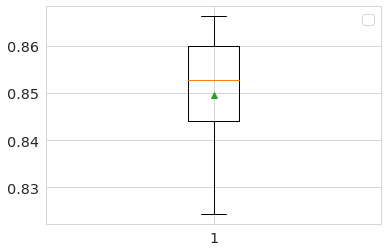

In [ ]:
# meta model : LogisticRegression
fold = 5
stk = StratifiedKFold(n_splits = fold, random_state = SEED, shuffle = False)
test_pred_log_reg = np.zeros((stack_X_test.shape[0], fold))
auc_scores = []

for counter, (train_index, valid_index)in enumerate(stk.split(stack_X_train, y)):
    X_train, y_train = stack_X_train[train_index], y[train_index]
    X_valid, y_valid = stack_X_train[valid_index], y[valid_index]

    #### to SMOTE sampling, not advised, low performance
    # sm = SMOTE(sampling_strategy='all', random_state=SEED)
    # X_train, y_train = sm.fit_resample(X_train, y_train)
    # X_valid, y_valid = sm.fit_resample(X_valid, y_valid)
    
    lr = LogisticRegression(n_jobs = -1, random_state = SEED, C = 0.05, max_iter = 3000)
    lr.fit(X_train, y_train)
    
    valid_pred_log_reg = lr.predict_proba(X_valid)[:, 1]
    test_pred_log_reg[:, counter] = lr.predict_proba(stack_X_test)[:, 1]

    auc = roc_auc_score(y_valid, valid_pred_log_reg)
    auc_scores.append(auc)

    print('Fold', counter+1 , 'AUC :', auc)
    fold += 1

test_pred_log_reg_mean = np.mean(test_pred_log_reg, axis = 1).reshape(-1, 1)

print(f'AUC score : mean ---> {np.mean(auc_scores)}, std ---> {np.std(auc_scores)}')

plt.boxplot(auc_scores, showmeans=True)

plt.show()

# AUC score : mean ---> 0.8495059939911511, std ---> 0.014576136833225574

<a id='10.5.4'></a>
### 10.5.4 Stacking Model Evaluation

In [ ]:
roc_auc_score_log_reg = roc_auc_score(y_test, test_pred_log_reg_mean)

printmd(f"AUC on the test dataset : **{roc_auc_score_log_reg}**")

# 5 fold , final 10 fold 0.8472861608411479
# 10 fold 0.8471776589423647
# 7 fold 0.8466325660699062
# all round 5 fold 0.8486346844403111

AUC on the test dataset : **0.8486346844403111**

#### ROC Curve

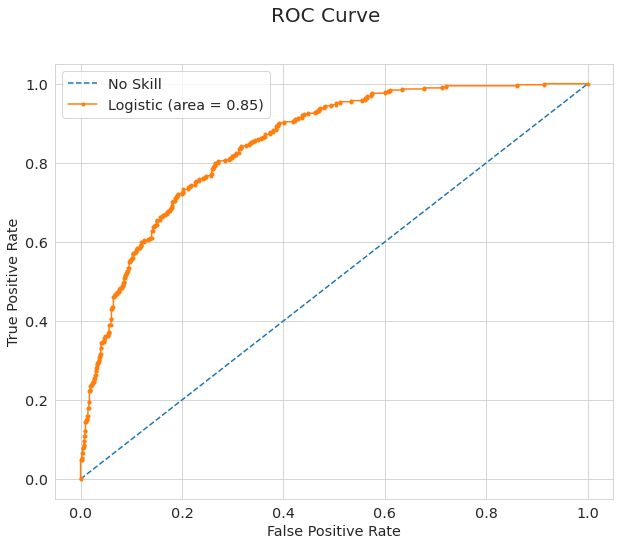

In [ ]:
plt.figure(figsize=(10,8))

# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, test_pred_log_reg_mean)

# plot model roc curve
plt.plot(fpr, tpr, marker='.', label=f'Logistic (area = {roc_auc_score_log_reg:0.2f})')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# curve title
plt.suptitle('ROC Curve', fontsize=20)
# show the legend
plt.legend()

# show the plot
plt.show()

#### PR Curve

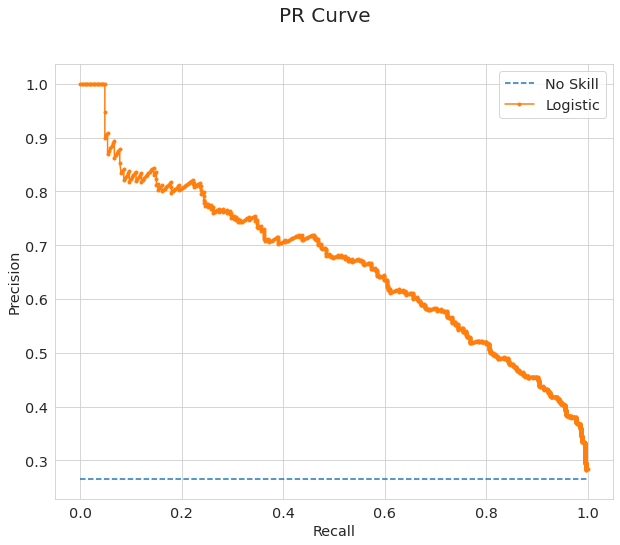

In [ ]:
plt.figure(figsize=(10,8))

# calculate the no skill line as the proportion of the positive class
no_skill = len(y[y==1]) / len(y)

# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, test_pred_log_reg_mean)

# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='Logistic')

# title PR curve
plt.suptitle('PR Curve', fontsize=20)

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# show the legend
plt.legend()

# show the plot
plt.show()

<a id='10.5.5'></a>
### 10.5.5 Stacking Ensemble Classic ML Models

**Model Evaluation :**

>logreg, cross-validation score - mean  : 0.805 std: (0.019)
>knn, cross-validation score - mean  : 0.762 std: (0.015)
>rforest, cross-validation score - mean  : 0.793 std: (0.018)
>etree, cross-validation score - mean  : 0.783 std: (0.014)
>svm, cross-validation score - mean  : 0.797 std: (0.018)
>stacking, cross-validation score - mean  : 0.805 std: (0.019)


<br>

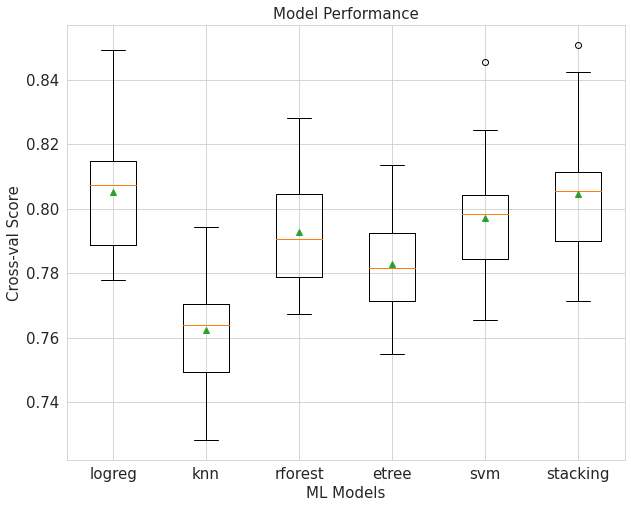

In [ ]:
# 5 fold stacking ensembling with 3 Repeated Stratified 10-Fold cross validation

# get a stacking ensemble of models
def get_stacking():
  # define the base models
  level0 = list()
  level0.append(('logreg', LogisticRegression()))
  level0.append(('knn', KNeighborsClassifier()))
  level0.append(('rforest', RandomForestClassifier()))
  level0.append(('etree', ExtraTreesClassifier()))
  level0.append(('svm', SVC()))

  # define meta learner model
  level1 = LogisticRegression()

  # define the stacking ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  return model
 
# get a list of models to evaluate
def get_models():
  models = dict()
  models['logreg'] = LogisticRegression()
  models['knn'] = KNeighborsClassifier()
  models['rforest'] = RandomForestClassifier()
  models['etree'] = ExtraTreesClassifier()
  models['svm'] = SVC()
  models['stacking'] = get_stacking()
  return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()

printmd("**Model Evaluation :**")

for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s, cross-validation score - mean  : %.3f std: (%.3f)' % (name, np.mean(scores), np.std(scores)))
 
printmd("<br>")

# plot model performance for comparison
font_size = 15
plt.figure(figsize=(10,8))
plt.boxplot(results, labels=names, showmeans=True)

plt.title("Model Performance",  fontsize=font_size)
plt.xlabel("ML Models", fontsize=font_size)
plt.ylabel("Cross-val Score",  fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

plt.show()

**Classic ML models perform poorly in comparison with Gradient Boosting models**

<a id='11'></a>
# 11 Conclusion

* Number of months the customer has stayed with the company (**tenure**) and the contract term of the customer (**contract**) are the most important features that have strong correlation with churn of the customer 
* Results from statiscial hypotheses testing reflects **similarity** with model feature importance
* With 80/20 train/test split triple boosting stacking ensemble model achieved an AUC of **~0.85**




<a id='12'></a>
# 12 Reference



1. [statstest](https://www.statstest.com/relationship)
2. [parametric nonparametric tests healthknowledge - healthknowledge.org](https://www.healthknowledge.org.uk/public-health-textbook/research-methods/1b-statistical-methods/parametric-nonparametric-tests)
3. [Feature Selection Method For Machine Learning - machinelearningmastery](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data)
4. [The Search for Categorical Correlation - towardsdatascience](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9)
5. [nonparametric statistical significance](https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/)
6. [eta-squared - ResearchGate](https://www.researchgate.net/post/Can_I_use_Pearsons_correlation_coefficient_to_know_the_relation_between_perception_and_gender_age_income)
7. [T-test examples - analyticsvidhya](https://www.analyticsvidhya.com/blog/2021/07/t-test-performing-hypothesis-testing-with-python/)
8. [Nonparametric Statistical Hypothesis Tests - machinelearningmastery](https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/)
9. [kendalls-tau](https://www.statstest.com/kendalls-tau/)
10. [Chi-Squared Test for Machine Learning](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)
11. [parametric-and-non-parametric-data](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/parametric-and-non-parametric-data/)
12. [mann-whitney-u-test for non-parametric](https://www.statisticshowto.com/mann-whitney-u-test/)
13. [Point-biserial correlation, Phi, & Cramer's V](http://web.pdx.edu/~newsomj/pa551/lectur15.htm)
14. [Theia's Uncertainity](https://en.wikipedia.org/wiki/Uncertainty_coefficient)
15. [non-parametric-correlation-for-continuous-and-dichotomous-variables](https://stats.stackexchange.com/questions/86637/non-parametric-correlation-for-continuous-and-dichotomous-variables)
16. [Effect Size Wiki](https://en.wikipedia.org/wiki/Effect_size)
17. [categorical correlation](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9)
18. [correlation_ratio dython](http://shakedzy.xyz/dython/modules/nominal/#correlation_ratio)
19. [7. Tetrachoric’s correlation](https://junye0798.com/post/everythin-you-need-to-know-about-correlation/)
20. [chi-square](http://web.pdx.edu/~newsomj/pa551/lectur11.htm)
21. [kruskal-wallis - statisticshowto](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/kruskal-wallis/)
22. [Everything You Need To Know About Correlation](https://junye0798.com/post/everythin-you-need-to-know-about-correlation)
